In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/AUD_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74258, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  0.70137  0.70112  0.70086  0.70139
2020-01-01 17:15:00  0.70112  0.70095  0.70078  0.70159
2020-01-01 17:30:00  0.70094  0.70079  0.70067  0.70099
2020-01-01 17:45:00  0.70078  0.70060  0.70048  0.70109
2020-01-01 18:00:00  0.70062  0.70182  0.70062  0.70182

In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74257, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  0.70137  0.70112  0.70086  0.70139         0.70095    17   
2020-01-01 17:15:00  0.70112  0.70095  0.70078  0.70159         0.70079    17   
2020-01-01 17:30:00  0.70094  0.70079  0.70067  0.70099         0.70060    17   
2020-01-01 17:45:00  0.70078  0.70060  0.70048  0.70109         0.70182    17   
2020-01-01 18:00:00  0.70062  0.70182  0.70062  0.70182         0.70168    18   

                     day  week  momentum  avg_price    range  ohlc_price  
timestamp                                                                 
2020-01-01 17:00:00    2     1   0.00025   0.701125  0.00053    0.701185  
2020-01-01 17:15:00    2     1   0.00017   0.701185  0.00081    0.701110  
2020-01-01 17:30:00    2     1   0.00015   0.700830  0.00032    0.700848  
2020-01-01 17:45:00    2     1   0.00018   0.700785  0.00061    0.700738  
2020-01-01 18:00:00    2     1  -0.00120   0.701220  0.00120    0.701220

In [ ]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  0.70137  0.70112  0.70086  0.70139         0.70095    17   
2020-01-01 17:15:00  0.70112  0.70095  0.70078  0.70159         0.70079    17   
2020-01-01 17:30:00  0.70094  0.70079  0.70067  0.70099         0.70060    17   
2020-01-01 17:45:00  0.70078  0.70060  0.70048  0.70109         0.70182    17   
2020-01-01 18:00:00  0.70062  0.70182  0.70062  0.70182         0.70168    18   

                     day  week  momentum  avg_price    range  ohlc_price  \
timestamp                                                                  
2020-01-01 17:00:00    2     1   0.00025   0.701125  0.00053    0.701185   
2020-01-01 17:15:00    2     1   0.00017   0.701185  0.00081    0.701110   
2020-01-01 17:30:00    2     1   0.00015   0.700830  0.00032    0.700848   
2020-01-01 17:45:00    2     1   0.00018   0.700785  0.00061    0.700738   
2020-01-01 18:00:00    2     1  -0.00120   0.701220  0.00120    0.701220   

                           pca  
timestamp                       
2020-01-01 17:00:00 -25.516273  
2020-01-01 17:15:00 -25.516584  
2020-01-01 17:30:00 -25.516586  
2020-01-01 17:45:00 -25.516502  
2020-01-01 18:00:00 -25.516903

In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  0.70137  0.70086  0.70139         0.70095    17    2   
2020-01-01 17:15:00  0.70112  0.70078  0.70159         0.70079    17    2   
2020-01-01 17:30:00  0.70094  0.70067  0.70099         0.70060    17    2   
2020-01-01 17:45:00  0.70078  0.70048  0.70109         0.70182    17    2   
2020-01-01 18:00:00  0.70062  0.70062  0.70182         0.70168    18    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1   0.00025   0.701125  0.00053    0.701185 -25.516273  
2020-01-01 17:15:00     1   0.00017   0.701185  0.00081    0.701110 -25.516584  
2020-01-01 17:30:00     1   0.00015   0.700830  0.00032    0.700848 -25.516586  
2020-01-01 17:45:00     1   0.00018   0.700785  0.00061

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_70_30(X,y)

51979
51979
11138
11138
11140
11140


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(51979, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(51954, 24, 12)
(11113, 24, 12)
(11115, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(51954, 1)
(11113, 1)
(11115, 1)


array([[0.5947361 ],
       [0.593925  ],
       [0.5944116 ],
       ...,
       [0.641577  ],
       [0.6444564 ],
       [0.64182043]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.5947361 , 0.593925  , 0.5944116 , ..., 0.641577  , 0.6444564 ,
       0.64182043], dtype=float32)

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

**GRU_BiLSTM_MODEL**

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
403/406 [============================>.] - ETA: 0s - loss: 242.4130 - mae: 2.1252 - mse: 242.4130 - root_mean_squared_error: 15.5696 - mape: 8464.8008
Epoch 1: val_mse improved from inf to 0.05012, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 45s 83ms/step - loss: 240.6871 - mae: 2.1115 - mse: 240.6871 - root_mean_squared_error: 15.5141 - mape: 8404.7461 - val_loss: 0.0501 - val_mae: 0.1818 - val_mse: 0.0501 - val_root_mean_squared_error: 0.2239 - val_mape: 47314.0352
Epoch 2/75
404/406 [============================>.] - ETA: 0s - loss: 0.0280 - mae: 0.1335 - mse: 0.0280 - root_mean_squared_error: 0.1673 - mape: 11176.7725
Epoch 2: val_mse did not improve from 0.05012
406/406 [==============================] - 7s 18ms/step - loss: 0.0280 - mae: 0.1334 - mse: 0.0280 - root_mean_squared_error: 0.1672 - mape: 11124.8291 - val_loss: 0.0585 - val_mae: 0.1991 - val_mse: 0.0585 - val_root_mean_squared_error: 0.2419 - val_mape: 52300.0234
Epoch 3/75
403/406 [============================>.] - ETA: 0s - loss: 0.0232 - mae: 0.1200 - mse: 0.0232 - root_mean_squared_error: 0.1524 - mape: 11356.9912
Epoch 3: val_mse did not improve from 0.05012
406/406 [==============================] - 7s 18ms/

406/406 [==============================] - 32s 79ms/step - loss: 0.0202 - mae: 0.1120 - mse: 0.0202 - root_mean_squared_error: 0.1421 - mape: 10539.8311 - val_loss: 0.0423 - val_mae: 0.1665 - val_mse: 0.0423 - val_root_mean_squared_error: 0.2058 - val_mape: 47119.9297
Epoch 5/75
406/406 [==============================] - ETA: 0s - loss: 0.0162 - mae: 0.0998 - mse: 0.0162 - root_mean_squared_error: 0.1271 - mape: 8901.2910
Epoch 5: val_mse improved from 0.04234 to 0.03043, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 80ms/step - loss: 0.0162 - mae: 0.0998 - mse: 0.0162 - root_mean_squared_error: 0.1271 - mape: 8901.2910 - val_loss: 0.0304 - val_mae: 0.1354 - val_mse: 0.0304 - val_root_mean_squared_error: 0.1744 - val_mape: 44214.2227
Epoch 6/75
405/406 [============================>.] - ETA: 0s - loss: 0.0107 - mae: 0.0793 - mse: 0.0107 - root_mean_squared_error: 0.1034 - mape: 9856.1221
Epoch 6: val_mse improved from 0.03043 to 0.01951, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 78ms/step - loss: 0.0107 - mae: 0.0793 - mse: 0.0107 - root_mean_squared_error: 0.1034 - mape: 9834.5234 - val_loss: 0.0195 - val_mae: 0.0970 - val_mse: 0.0195 - val_root_mean_squared_error: 0.1397 - val_mape: 40768.0625
Epoch 7/75
406/406 [==============================] - ETA: 0s - loss: 0.0069 - mae: 0.0616 - mse: 0.0069 - root_mean_squared_error: 0.0832 - mape: 9613.7383
Epoch 7: val_mse improved from 0.01951 to 0.01405, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 78ms/step - loss: 0.0069 - mae: 0.0616 - mse: 0.0069 - root_mean_squared_error: 0.0832 - mape: 9613.7383 - val_loss: 0.0140 - val_mae: 0.0767 - val_mse: 0.0140 - val_root_mean_squared_error: 0.1185 - val_mape: 37404.2852
Epoch 8/75
406/406 [==============================] - ETA: 0s - loss: 0.0049 - mae: 0.0510 - mse: 0.0049 - root_mean_squared_error: 0.0700 - mape: 8264.6318
Epoch 8: val_mse improved from 0.01405 to 0.01035, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 0.0049 - mae: 0.0510 - mse: 0.0049 - root_mean_squared_error: 0.0700 - mape: 8264.6318 - val_loss: 0.0103 - val_mae: 0.0640 - val_mse: 0.0103 - val_root_mean_squared_error: 0.1017 - val_mape: 34120.3594
Epoch 9/75
405/406 [============================>.] - ETA: 0s - loss: 0.0039 - mae: 0.0459 - mse: 0.0039 - root_mean_squared_error: 0.0626 - mape: 6920.9678
Epoch 9: val_mse improved from 0.01035 to 0.00821, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 82ms/step - loss: 0.0039 - mae: 0.0459 - mse: 0.0039 - root_mean_squared_error: 0.0626 - mape: 6905.7983 - val_loss: 0.0082 - val_mae: 0.0568 - val_mse: 0.0082 - val_root_mean_squared_error: 0.0906 - val_mape: 31705.9844
Epoch 10/75
406/406 [==============================] - ETA: 0s - loss: 0.0034 - mae: 0.0436 - mse: 0.0034 - root_mean_squared_error: 0.0587 - mape: 6753.6235
Epoch 10: val_mse improved from 0.00821 to 0.00673, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 0.0034 - mae: 0.0436 - mse: 0.0034 - root_mean_squared_error: 0.0587 - mape: 6753.6235 - val_loss: 0.0067 - val_mae: 0.0520 - val_mse: 0.0067 - val_root_mean_squared_error: 0.0821 - val_mape: 29867.3652
Epoch 11/75
404/406 [============================>.] - ETA: 0s - loss: 0.0031 - mae: 0.0415 - mse: 0.0031 - root_mean_squared_error: 0.0556 - mape: 7211.6763
Epoch 11: val_mse improved from 0.00673 to 0.00613, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 78ms/step - loss: 0.0031 - mae: 0.0414 - mse: 0.0031 - root_mean_squared_error: 0.0556 - mape: 7178.1152 - val_loss: 0.0061 - val_mae: 0.0501 - val_mse: 0.0061 - val_root_mean_squared_error: 0.0783 - val_mape: 28655.0059
Epoch 12/75
404/406 [============================>.] - ETA: 0s - loss: 0.0028 - mae: 0.0394 - mse: 0.0028 - root_mean_squared_error: 0.0525 - mape: 7240.2168
Epoch 12: val_mse improved from 0.00613 to 0.00536, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 78ms/step - loss: 0.0028 - mae: 0.0394 - mse: 0.0028 - root_mean_squared_error: 0.0525 - mape: 7206.5269 - val_loss: 0.0054 - val_mae: 0.0465 - val_mse: 0.0054 - val_root_mean_squared_error: 0.0732 - val_mape: 27495.3691
Epoch 13/75
406/406 [==============================] - ETA: 0s - loss: 0.0025 - mae: 0.0376 - mse: 0.0025 - root_mean_squared_error: 0.0498 - mape: 6203.4053
Epoch 13: val_mse improved from 0.00536 to 0.00466, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 81ms/step - loss: 0.0025 - mae: 0.0376 - mse: 0.0025 - root_mean_squared_error: 0.0498 - mape: 6203.4053 - val_loss: 0.0047 - val_mae: 0.0434 - val_mse: 0.0047 - val_root_mean_squared_error: 0.0683 - val_mape: 26222.0195
Epoch 14/75
405/406 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0360 - mse: 0.0022 - root_mean_squared_error: 0.0474 - mape: 6702.2495
Epoch 14: val_mse improved from 0.00466 to 0.00407, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 78ms/step - loss: 0.0022 - mae: 0.0360 - mse: 0.0022 - root_mean_squared_error: 0.0474 - mape: 6687.5566 - val_loss: 0.0041 - val_mae: 0.0409 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0638 - val_mape: 24920.1680
Epoch 15/75
404/406 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0335 - mse: 0.0019 - root_mean_squared_error: 0.0440 - mape: 5265.7485
Epoch 15: val_mse improved from 0.00407 to 0.00390, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 80ms/step - loss: 0.0019 - mae: 0.0335 - mse: 0.0019 - root_mean_squared_error: 0.0439 - mape: 5241.2471 - val_loss: 0.0039 - val_mae: 0.0418 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0624 - val_mape: 23574.7832
Epoch 16/75
403/406 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0323 - mse: 0.0018 - root_mean_squared_error: 0.0421 - mape: 4816.3594
Epoch 16: val_mse improved from 0.00390 to 0.00353, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 0.0018 - mae: 0.0323 - mse: 0.0018 - root_mean_squared_error: 0.0421 - mape: 4782.1055 - val_loss: 0.0035 - val_mae: 0.0408 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0594 - val_mape: 22561.7441
Epoch 17/75
405/406 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0296 - mse: 0.0015 - root_mean_squared_error: 0.0386 - mape: 5073.7583
Epoch 17: val_mse improved from 0.00353 to 0.00234, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 81ms/step - loss: 0.0015 - mae: 0.0296 - mse: 0.0015 - root_mean_squared_error: 0.0386 - mape: 5062.6372 - val_loss: 0.0023 - val_mae: 0.0316 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0484 - val_mape: 20958.2090
Epoch 18/75
403/406 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0276 - mse: 0.0013 - root_mean_squared_error: 0.0358 - mape: 4563.8960
Epoch 18: val_mse improved from 0.00234 to 0.00208, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 0.0013 - mae: 0.0275 - mse: 0.0013 - root_mean_squared_error: 0.0357 - mape: 4531.4263 - val_loss: 0.0021 - val_mae: 0.0299 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0457 - val_mape: 19786.3750
Epoch 19/75
403/406 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0258 - mse: 0.0011 - root_mean_squared_error: 0.0333 - mape: 4267.8340
Epoch 19: val_mse did not improve from 0.00208
406/406 [==============================] - 7s 18ms/step - loss: 0.0011 - mae: 0.0258 - mse: 0.0011 - root_mean_squared_error: 0.0334 - mape: 4237.4785 - val_loss: 0.0026 - val_mae: 0.0396 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0512 - val_mape: 18976.2070
Epoch 20/75
405/406 [============================>.] - ETA: 0s - loss: 9.6065e-04 - mae: 0.0240 - mse: 9.6065e-04 - root_mean_squared_error: 0.0310 - mape: 3579.3784
Epoch 20: val_mse improved from 0.00208 to 0.00200, saving model to /content/drive/MyDrive/mod

406/406 [==============================] - 32s 79ms/step - loss: 9.6007e-04 - mae: 0.0240 - mse: 9.6007e-04 - root_mean_squared_error: 0.0310 - mape: 3571.5317 - val_loss: 0.0020 - val_mae: 0.0302 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0447 - val_mape: 18113.2910
Epoch 21/75
404/406 [============================>.] - ETA: 0s - loss: 8.8193e-04 - mae: 0.0231 - mse: 8.8193e-04 - root_mean_squared_error: 0.0297 - mape: 3680.7134
Epoch 21: val_mse improved from 0.00200 to 0.00136, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 78ms/step - loss: 8.8135e-04 - mae: 0.0231 - mse: 8.8135e-04 - root_mean_squared_error: 0.0297 - mape: 3663.5879 - val_loss: 0.0014 - val_mae: 0.0251 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0369 - val_mape: 16848.3535
Epoch 22/75
406/406 [==============================] - ETA: 0s - loss: 7.7653e-04 - mae: 0.0217 - mse: 7.7653e-04 - root_mean_squared_error: 0.0279 - mape: 3218.4915
Epoch 22: val_mse improved from 0.00136 to 0.00106, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 81ms/step - loss: 7.7653e-04 - mae: 0.0217 - mse: 7.7653e-04 - root_mean_squared_error: 0.0279 - mape: 3218.4915 - val_loss: 0.0011 - val_mae: 0.0220 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 15998.7412
Epoch 23/75
406/406 [==============================] - ETA: 0s - loss: 6.5840e-04 - mae: 0.0200 - mse: 6.5840e-04 - root_mean_squared_error: 0.0257 - mape: 3453.6997
Epoch 23: val_mse did not improve from 0.00106
406/406 [==============================] - 7s 18ms/step - loss: 6.5840e-04 - mae: 0.0200 - mse: 6.5840e-04 - root_mean_squared_error: 0.0257 - mape: 3453.6997 - val_loss: 0.0013 - val_mae: 0.0242 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0354 - val_mape: 15655.7471
Epoch 24/75
405/406 [============================>.] - ETA: 0s - loss: 6.4195e-04 - mae: 0.0197 - mse: 6.4195e-04 - root_mean_squared_error: 0.0253 - mape: 2868.7043
Epoch 24: val_mse did not improve from 0.00106
406/406 [==============

406/406 [==============================] - 32s 79ms/step - loss: 5.2469e-04 - mae: 0.0179 - mse: 5.2469e-04 - root_mean_squared_error: 0.0229 - mape: 3263.2295 - val_loss: 8.8735e-04 - val_mae: 0.0220 - val_mse: 8.8735e-04 - val_root_mean_squared_error: 0.0298 - val_mape: 14253.0400
Epoch 26/75
405/406 [============================>.] - ETA: 0s - loss: 5.1852e-04 - mae: 0.0175 - mse: 5.1852e-04 - root_mean_squared_error: 0.0228 - mape: 3042.5962
Epoch 26: val_mse improved from 0.00089 to 0.00088, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 5.1796e-04 - mae: 0.0174 - mse: 5.1796e-04 - root_mean_squared_error: 0.0228 - mape: 3035.9243 - val_loss: 8.7914e-04 - val_mae: 0.0213 - val_mse: 8.7914e-04 - val_root_mean_squared_error: 0.0297 - val_mape: 14005.6699
Epoch 27/75
404/406 [============================>.] - ETA: 0s - loss: 4.1760e-04 - mae: 0.0160 - mse: 4.1760e-04 - root_mean_squared_error: 0.0204 - mape: 2747.6667
Epoch 27: val_mse improved from 0.00088 to 0.00076, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 82ms/step - loss: 4.1765e-04 - mae: 0.0160 - mse: 4.1765e-04 - root_mean_squared_error: 0.0204 - mape: 2734.8806 - val_loss: 7.6484e-04 - val_mae: 0.0192 - val_mse: 7.6484e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 13584.9023
Epoch 28/75
403/406 [============================>.] - ETA: 0s - loss: 4.3053e-04 - mae: 0.0162 - mse: 4.3053e-04 - root_mean_squared_error: 0.0207 - mape: 2762.4683
Epoch 28: val_mse did not improve from 0.00076
406/406 [==============================] - 7s 18ms/step - loss: 4.3028e-04 - mae: 0.0162 - mse: 4.3028e-04 - root_mean_squared_error: 0.0207 - mape: 2742.8511 - val_loss: 8.8791e-04 - val_mae: 0.0201 - val_mse: 8.8791e-04 - val_root_mean_squared_error: 0.0298 - val_mape: 13850.4600
Epoch 29/75
406/406 [==============================] - ETA: 0s - loss: 3.7639e-04 - mae: 0.0152 - mse: 3.7639e-04 - root_mean_squared_error: 0.0194 - mape: 2654.6538
Epoch 29: val_mse did not improve from 0.00076
406/406

406/406 [==============================] - 32s 78ms/step - loss: 3.4486e-04 - mae: 0.0144 - mse: 3.4486e-04 - root_mean_squared_error: 0.0186 - mape: 2912.9036 - val_loss: 6.1695e-04 - val_mae: 0.0173 - val_mse: 6.1695e-04 - val_root_mean_squared_error: 0.0248 - val_mape: 12813.5410
Epoch 31/75
404/406 [============================>.] - ETA: 0s - loss: 3.1824e-04 - mae: 0.0140 - mse: 3.1824e-04 - root_mean_squared_error: 0.0178 - mape: 2831.7368
Epoch 31: val_mse did not improve from 0.00062
406/406 [==============================] - 7s 18ms/step - loss: 3.1779e-04 - mae: 0.0140 - mse: 3.1779e-04 - root_mean_squared_error: 0.0178 - mape: 2818.5562 - val_loss: 8.2254e-04 - val_mae: 0.0227 - val_mse: 8.2254e-04 - val_root_mean_squared_error: 0.0287 - val_mape: 12461.2676
Epoch 32/75
405/406 [============================>.] - ETA: 0s - loss: 2.7937e-04 - mae: 0.0131 - mse: 2.7937e-04 - root_mean_squared_error: 0.0167 - mape: 2608.5618
Epoch 32: val_mse did not improve from 0.00062
406/406

406/406 [==============================] - 32s 78ms/step - loss: 2.7743e-04 - mae: 0.0130 - mse: 2.7743e-04 - root_mean_squared_error: 0.0167 - mape: 2415.4268 - val_loss: 5.6511e-04 - val_mae: 0.0163 - val_mse: 5.6511e-04 - val_root_mean_squared_error: 0.0238 - val_mape: 12013.8408
Epoch 34/75
404/406 [============================>.] - ETA: 0s - loss: 2.6418e-04 - mae: 0.0128 - mse: 2.6418e-04 - root_mean_squared_error: 0.0163 - mape: 2184.7793
Epoch 34: val_mse did not improve from 0.00057
406/406 [==============================] - 7s 17ms/step - loss: 2.6433e-04 - mae: 0.0128 - mse: 2.6433e-04 - root_mean_squared_error: 0.0163 - mape: 2174.6133 - val_loss: 0.0011 - val_mae: 0.0262 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0328 - val_mape: 12853.3574
Epoch 35/75
404/406 [============================>.] - ETA: 0s - loss: 2.5748e-04 - mae: 0.0126 - mse: 2.5748e-04 - root_mean_squared_error: 0.0160 - mape: 2214.9099
Epoch 35: val_mse did not improve from 0.00057
406/406 [======

406/406 [==============================] - 32s 79ms/step - loss: 2.2867e-04 - mae: 0.0119 - mse: 2.2867e-04 - root_mean_squared_error: 0.0151 - mape: 2010.2081 - val_loss: 4.8061e-04 - val_mae: 0.0138 - val_mse: 4.8061e-04 - val_root_mean_squared_error: 0.0219 - val_mape: 11057.8271
Epoch 42/75
405/406 [============================>.] - ETA: 0s - loss: 1.7898e-04 - mae: 0.0105 - mse: 1.7898e-04 - root_mean_squared_error: 0.0134 - mape: 1948.7346
Epoch 42: val_mse did not improve from 0.00048
406/406 [==============================] - 7s 18ms/step - loss: 1.7949e-04 - mae: 0.0105 - mse: 1.7949e-04 - root_mean_squared_error: 0.0134 - mape: 1944.4648 - val_loss: 6.0659e-04 - val_mae: 0.0190 - val_mse: 6.0659e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 10606.5020
Epoch 43/75
405/406 [============================>.] - ETA: 0s - loss: 2.1414e-04 - mae: 0.0112 - mse: 2.1414e-04 - root_mean_squared_error: 0.0146 - mape: 1811.5012
Epoch 43: val_mse did not improve from 0.00048
406/406

406/406 [==============================] - 32s 78ms/step - loss: 6.9452e-05 - mae: 0.0064 - mse: 6.9452e-05 - root_mean_squared_error: 0.0083 - mape: 1308.2920 - val_loss: 4.4966e-04 - val_mae: 0.0132 - val_mse: 4.4966e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 10339.2646
Epoch 65/75
404/406 [============================>.] - ETA: 0s - loss: 8.6670e-05 - mae: 0.0073 - mse: 8.6670e-05 - root_mean_squared_error: 0.0093 - mape: 1150.3345
Epoch 65: val_mse did not improve from 0.00045
406/406 [==============================] - 8s 20ms/step - loss: 8.6438e-05 - mae: 0.0073 - mse: 8.6438e-05 - root_mean_squared_error: 0.0093 - mape: 1144.9799 - val_loss: 7.7991e-04 - val_mae: 0.0225 - val_mse: 7.7991e-04 - val_root_mean_squared_error: 0.0279 - val_mape: 10817.1201
Epoch 66/75
405/406 [============================>.] - ETA: 0s - loss: 7.5907e-05 - mae: 0.0065 - mse: 7.5907e-05 - root_mean_squared_error: 0.0087 - mape: 1079.2216
Epoch 66: val_mse did not improve from 0.00045
406/406

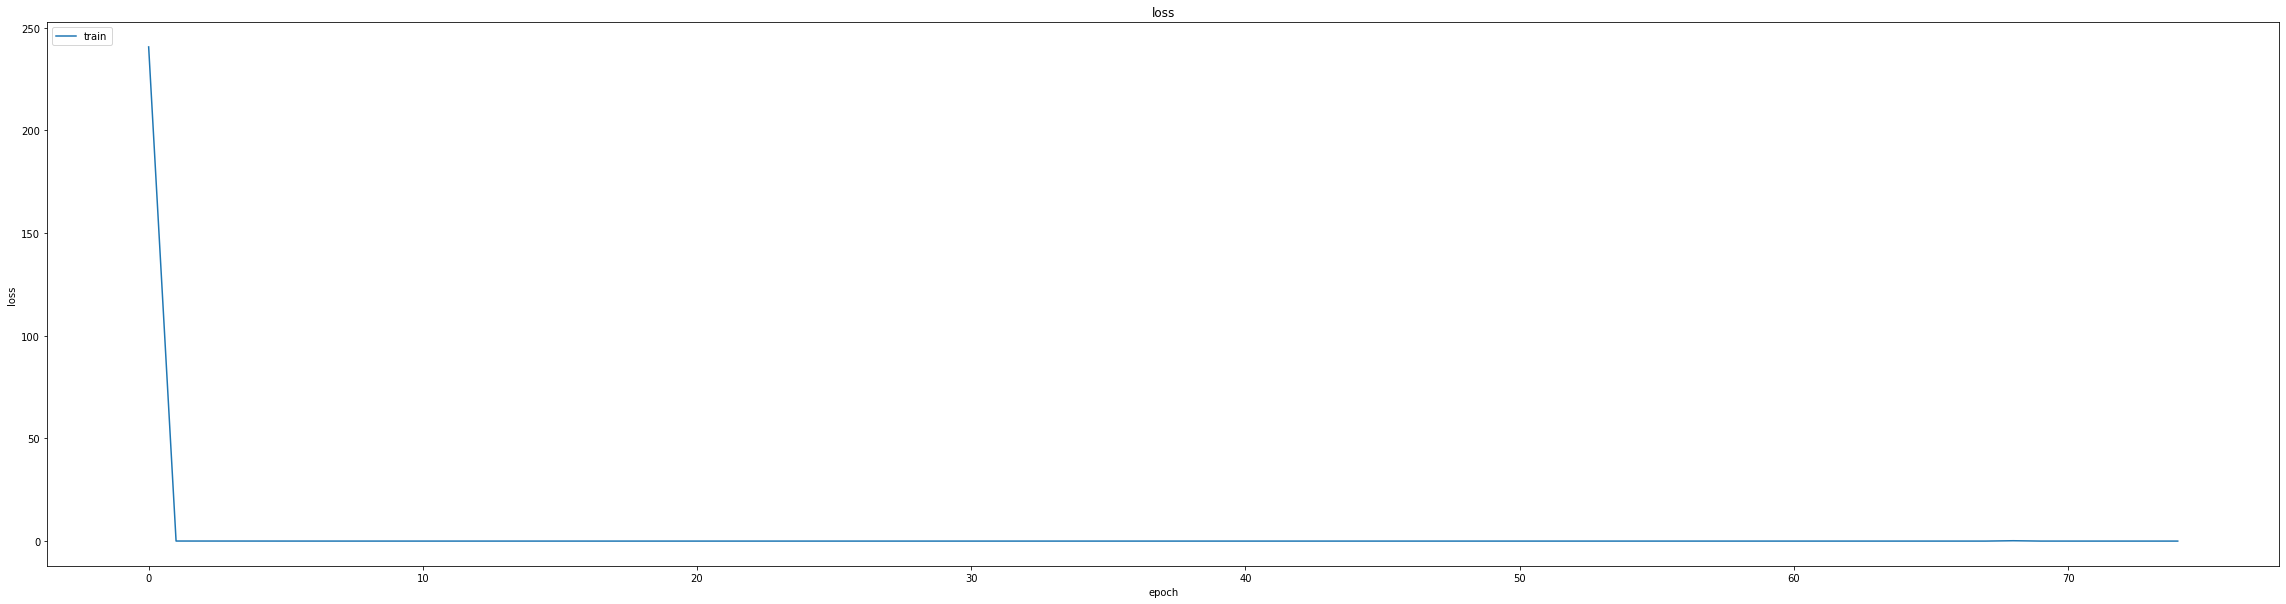

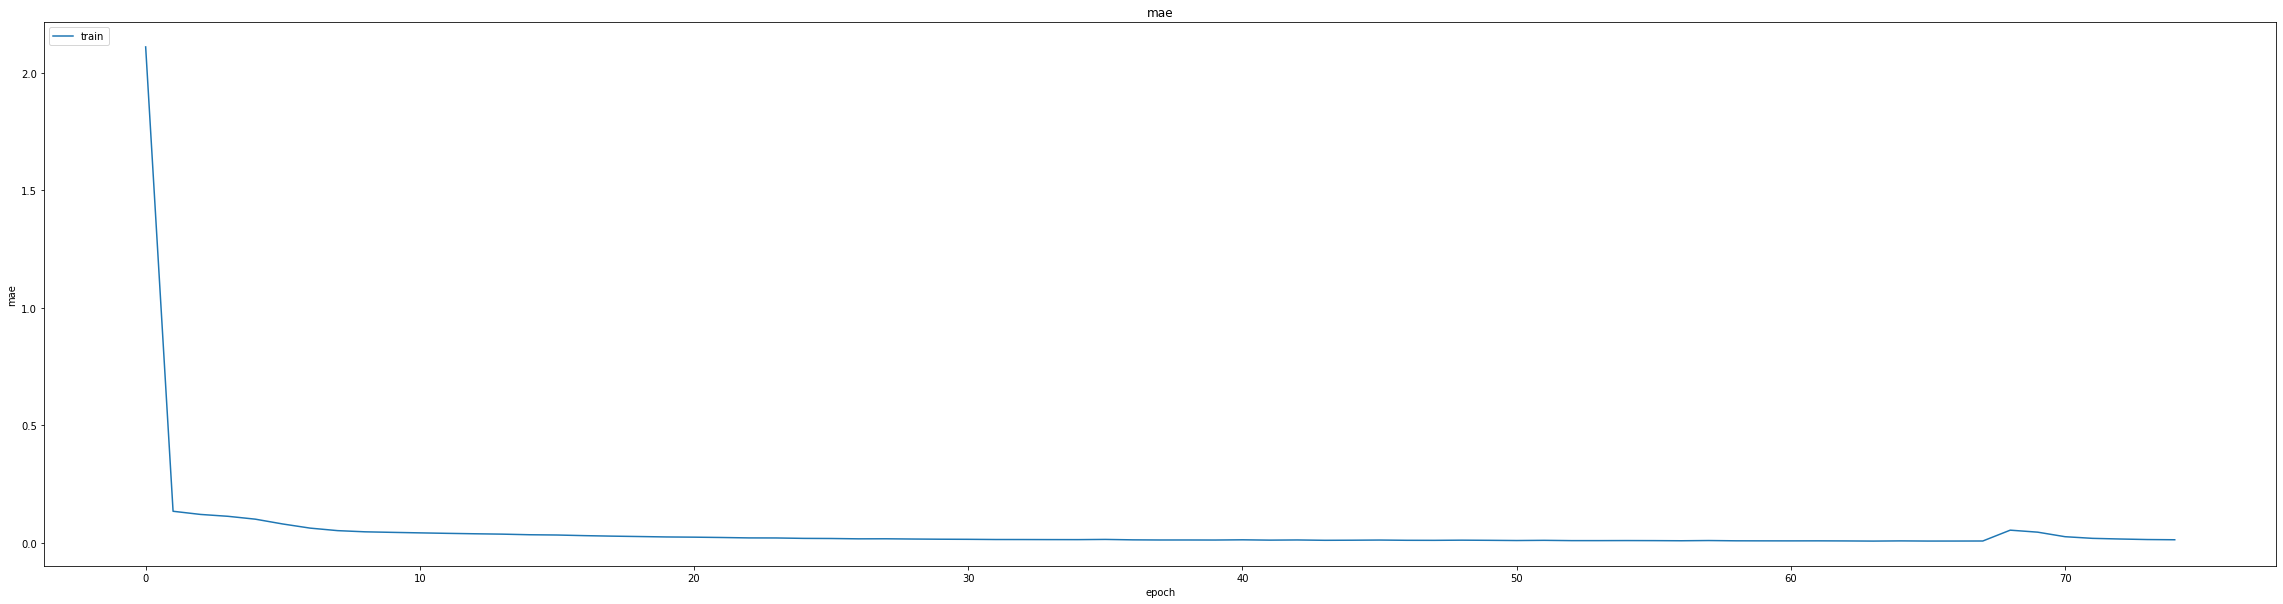

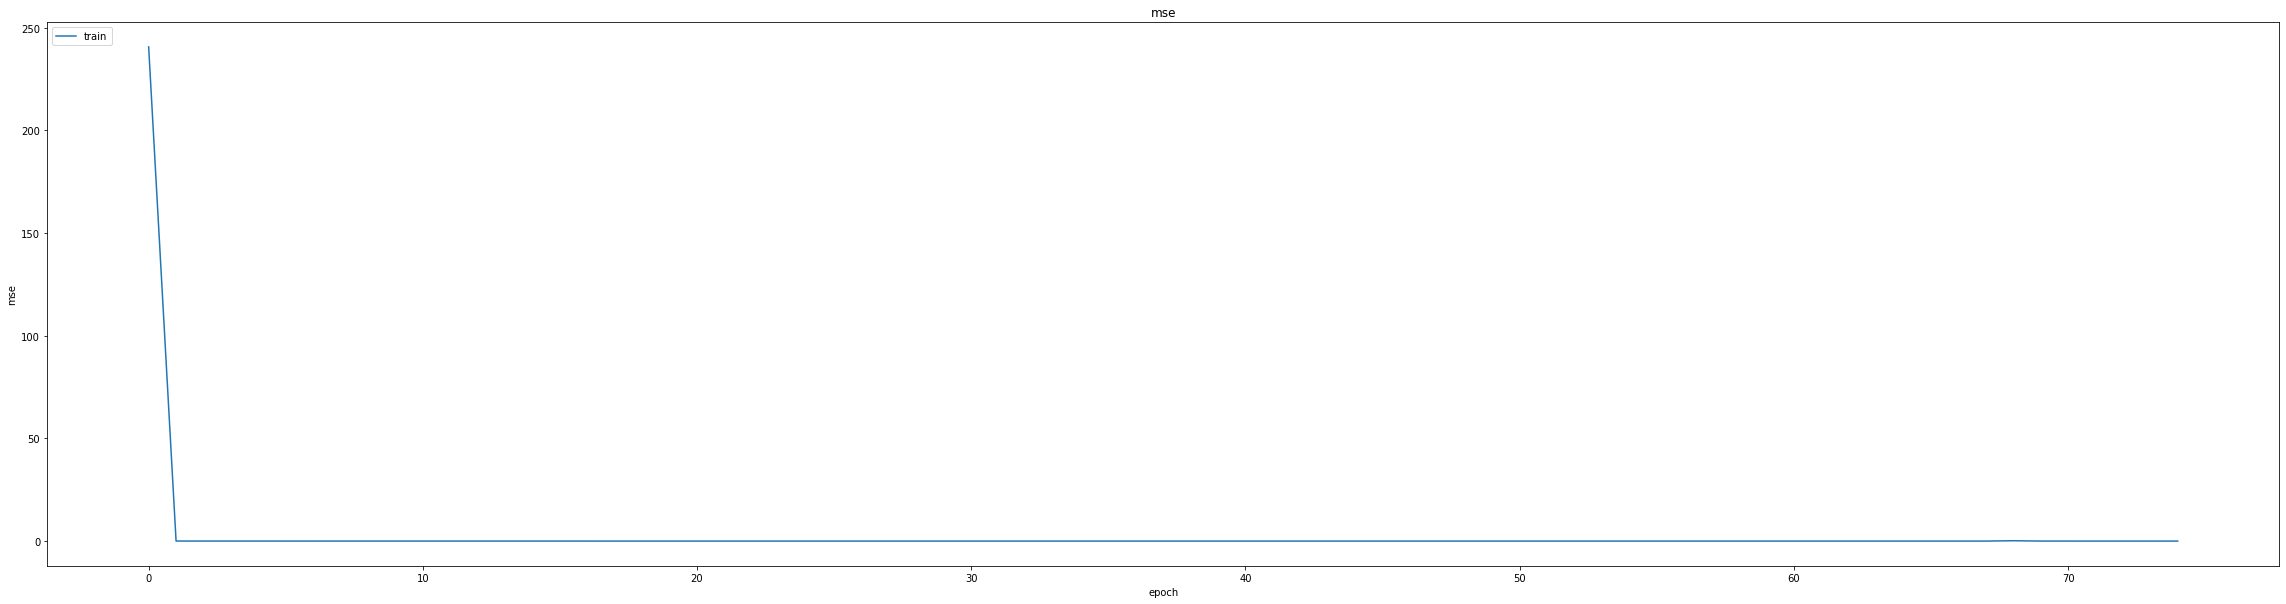

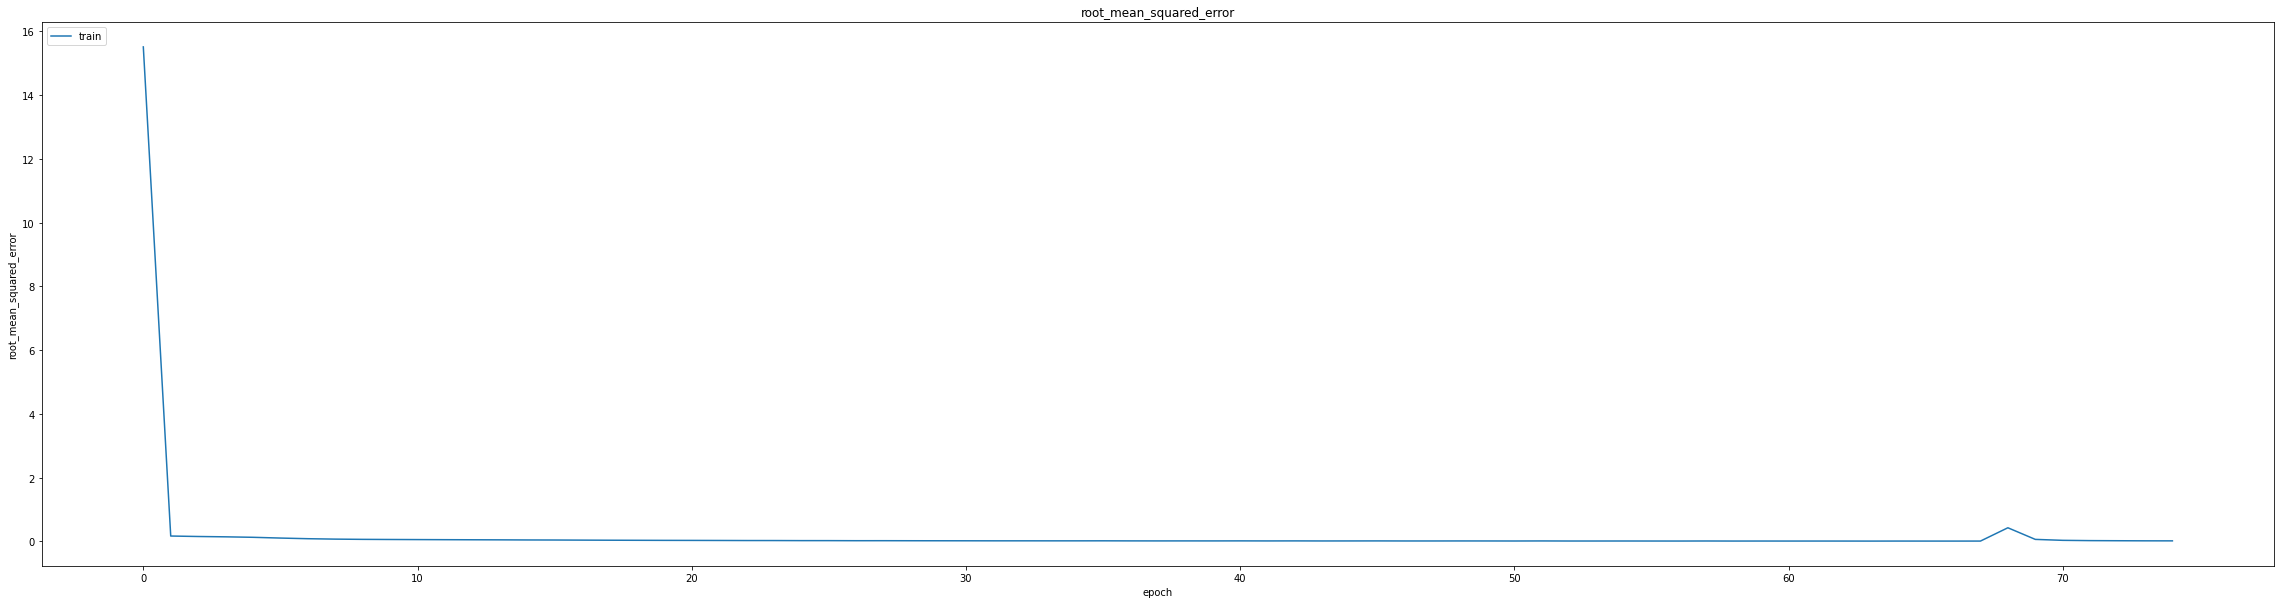

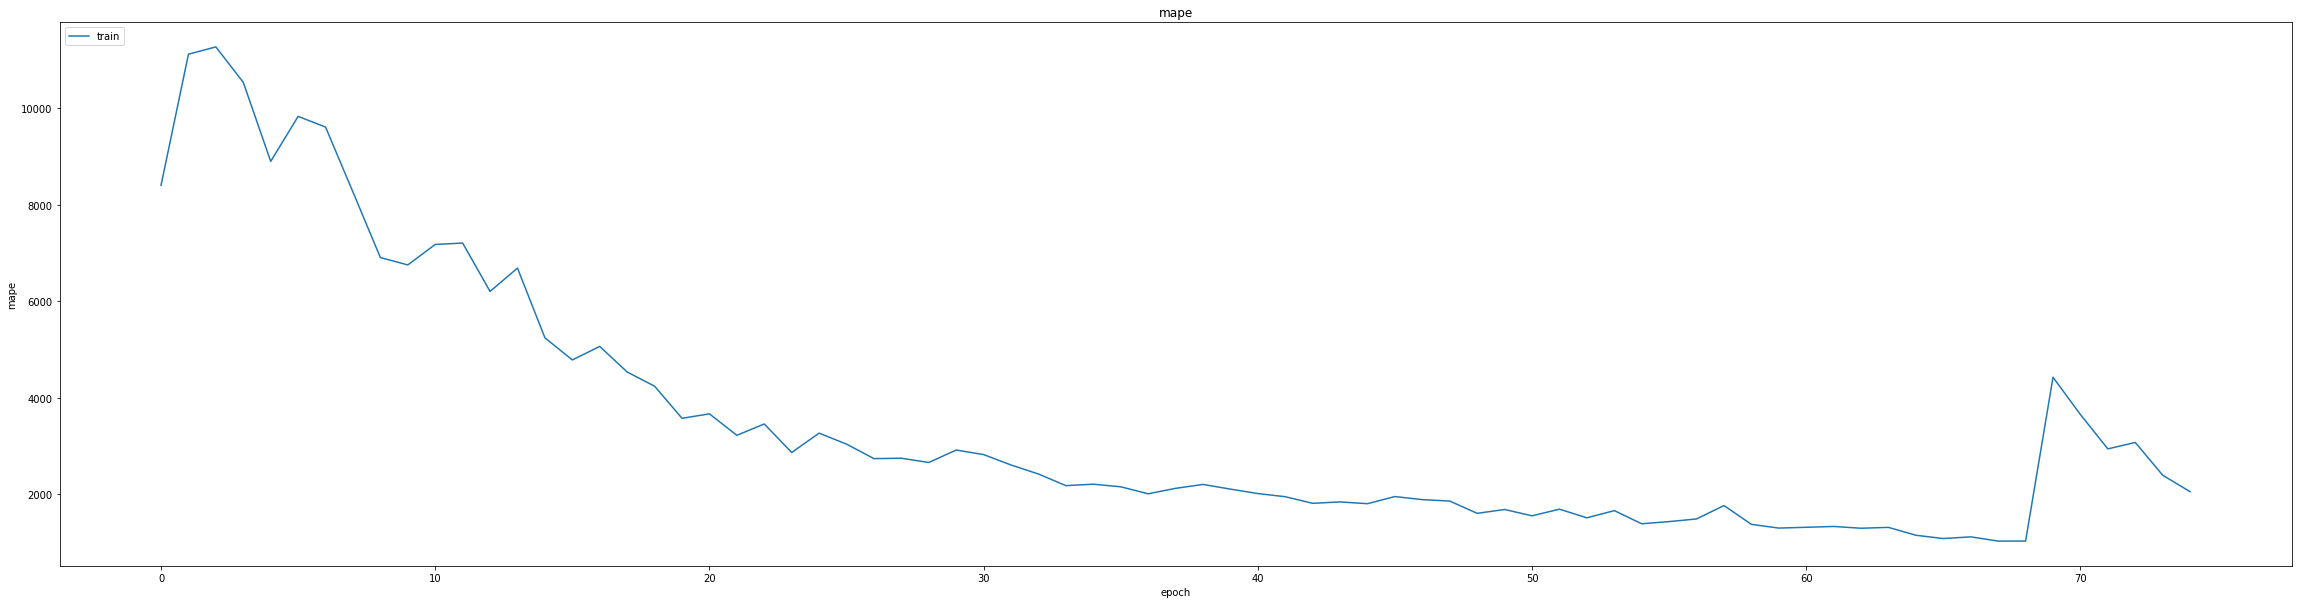

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01318228431046009
0.021205086261034012
348/348 [==============================] - 4s 6ms/step
0.9876469503366364


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
404/406 [============================>.] - ETA: 0s - loss: 0.0029 - mae: 0.0189 - mse: 0.0029 - root_mean_squared_error: 0.0535 - mape: 142839.4531
Epoch 1: val_mse did not improve from 0.00045
406/406 [==============================] - 16s 23ms/step - loss: 0.0028 - mae: 0.0189 - mse: 0.0028 - root_mean_squared_error: 0.0533 - mape: 142174.1094 - val_loss: 8.8407e-04 - val_mae: 0.0208 - val_mse: 8.8407e-04 - val_root_mean_squared_error: 0.0297 - val_mape: 12658.0127 - lr: 0.0010
Epoch 2/25
405/406 [============================>.] - ETA: 0s - loss: 6.3917e-05 - mae: 0.0059 - mse: 6.3917e-05 - root_mean_squared_error: 0.0080 - mape: 2169.7493
Epoch 2: val_mse did not improve from 0.00045
406/406 [==============================] - 7s 17ms/step - loss: 6.3865e-05 - mae: 0.0059 - mse: 6.3865e-05 - root_mean_squared_error: 0.0080 - mape: 2164.9905 - val_loss: 7.8723e-04 - val_mae: 0.0207 - val_mse: 7.8723e-04 - val_root_mean_squared_error: 0.0281 - val_mape: 11655.1885 - lr: 0.00

406/406 [==============================] - 32s 78ms/step - loss: 3.1224e-05 - mae: 0.0043 - mse: 3.1224e-05 - root_mean_squared_error: 0.0056 - mape: 1117.8688 - val_loss: 4.4842e-04 - val_mae: 0.0127 - val_mse: 4.4842e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 9525.5342 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/25
403/406 [============================>.] - ETA: 0s - loss: 2.5951e-05 - mae: 0.0040 - mse: 2.5951e-05 - root_mean_squared_error: 0.0051 - mape: 1097.5220
Epoch 17: val_mse did not improve from 0.00045
406/406 [==============================] - 9s 21ms/step - loss: 2.5942e-05 - mae: 0.0040 - mse: 2.5942e-05 - root_mean_squared_error: 0.0051 - mape: 1089.7107 - val_loss: 5.3053e-04 - val_mae: 0.0147 - val_mse: 5.3053e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 10501.1035 - lr: 4.3047e-04
Epoch 18/25
406/406 [==============================] - ETA: 0s - loss: 2.5646e-05 - mae: 0.0039 - mse: 2.5646e-05 - root_mean_squared_error: 0.0051 - m

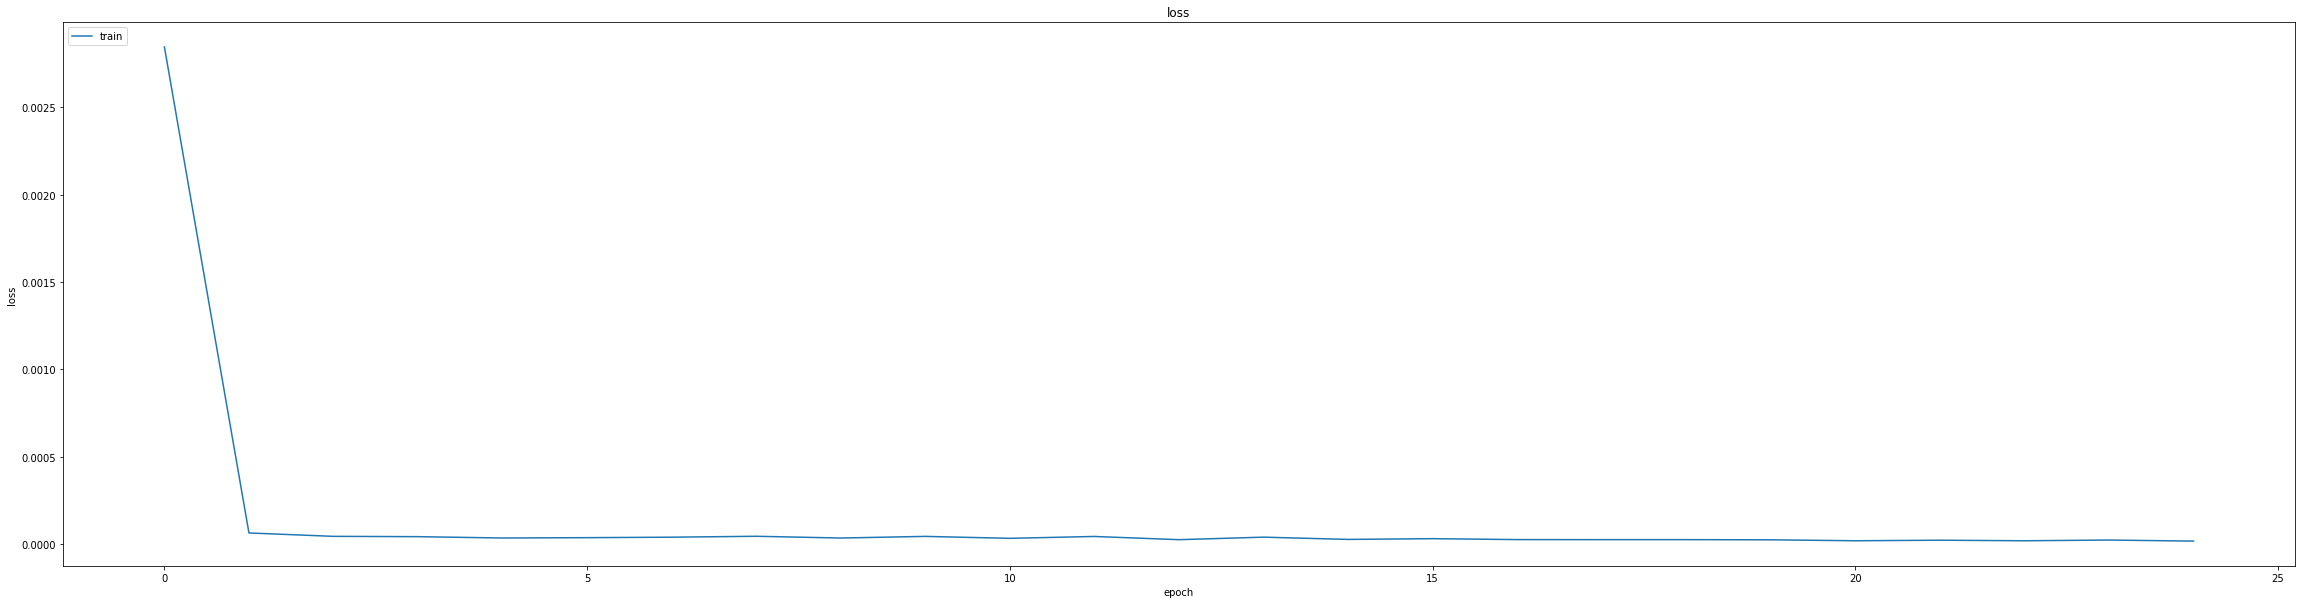

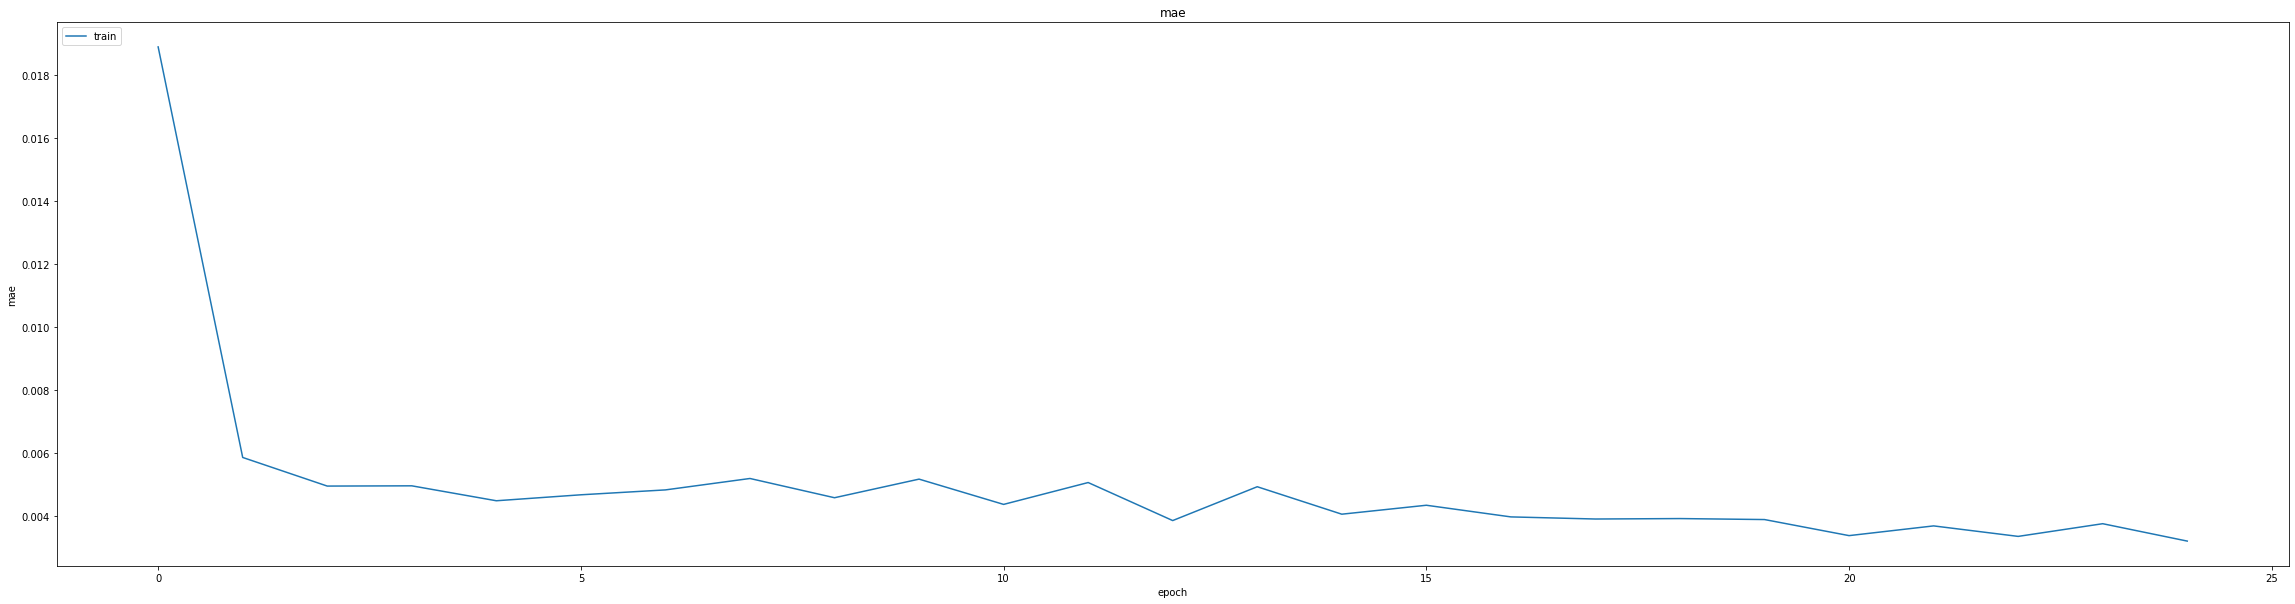

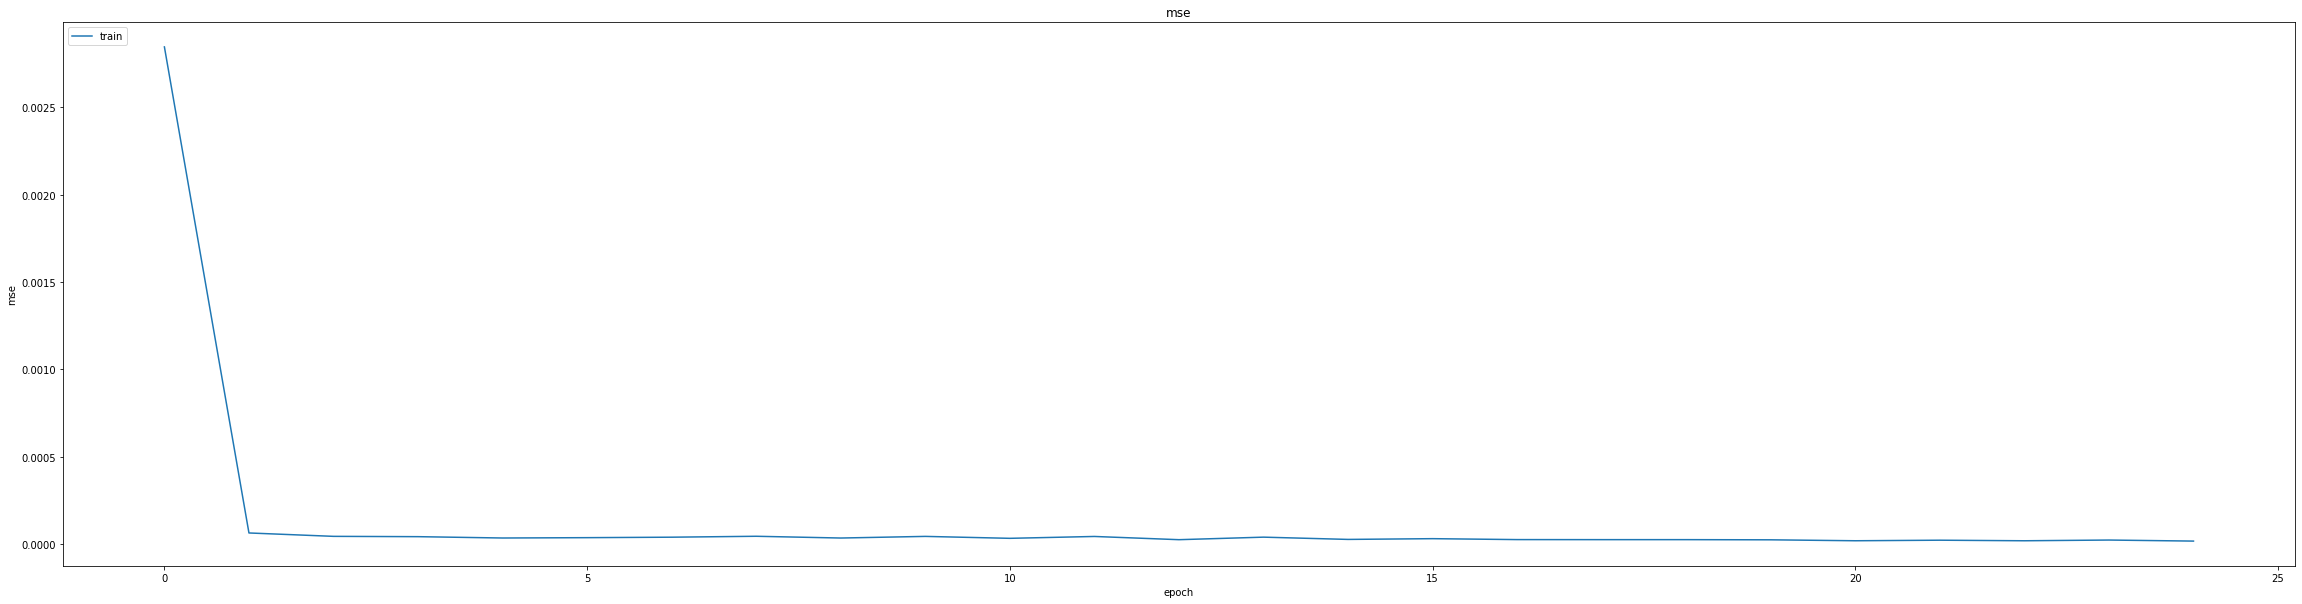

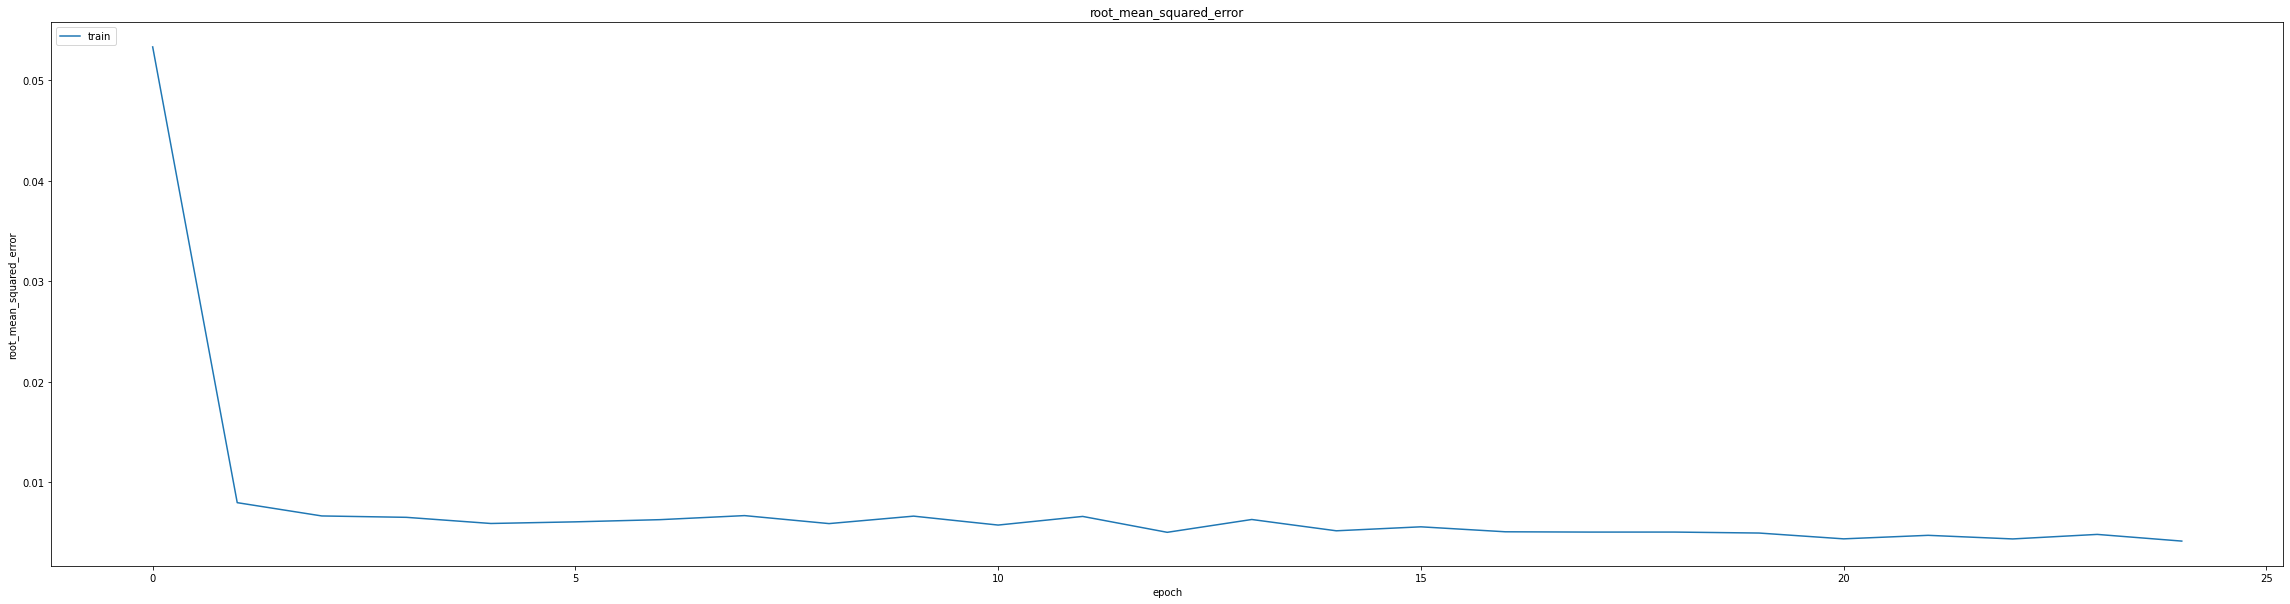

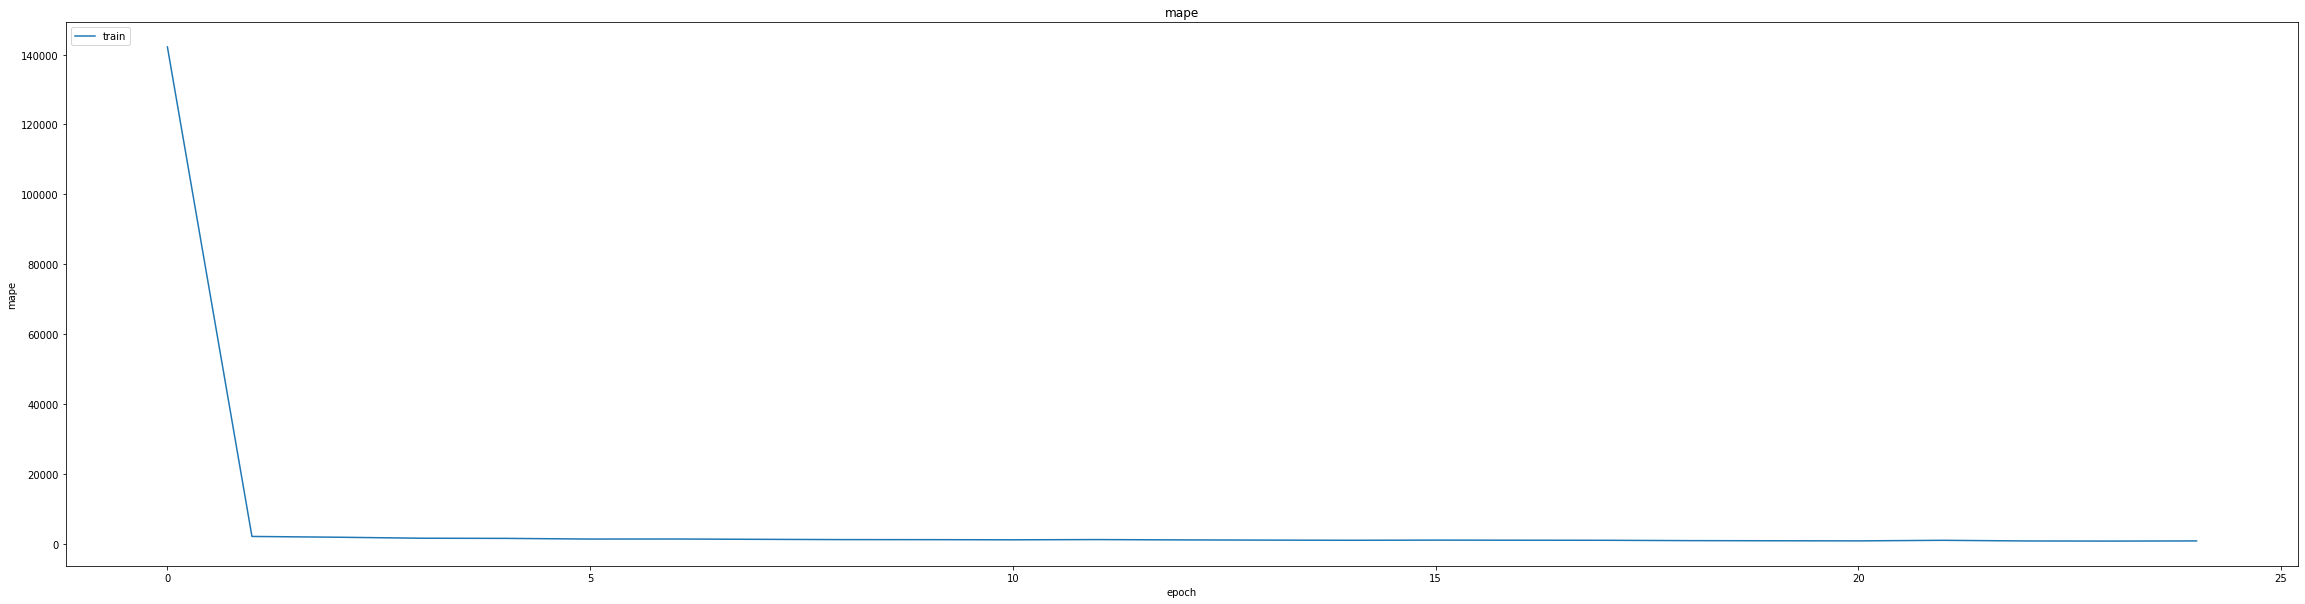

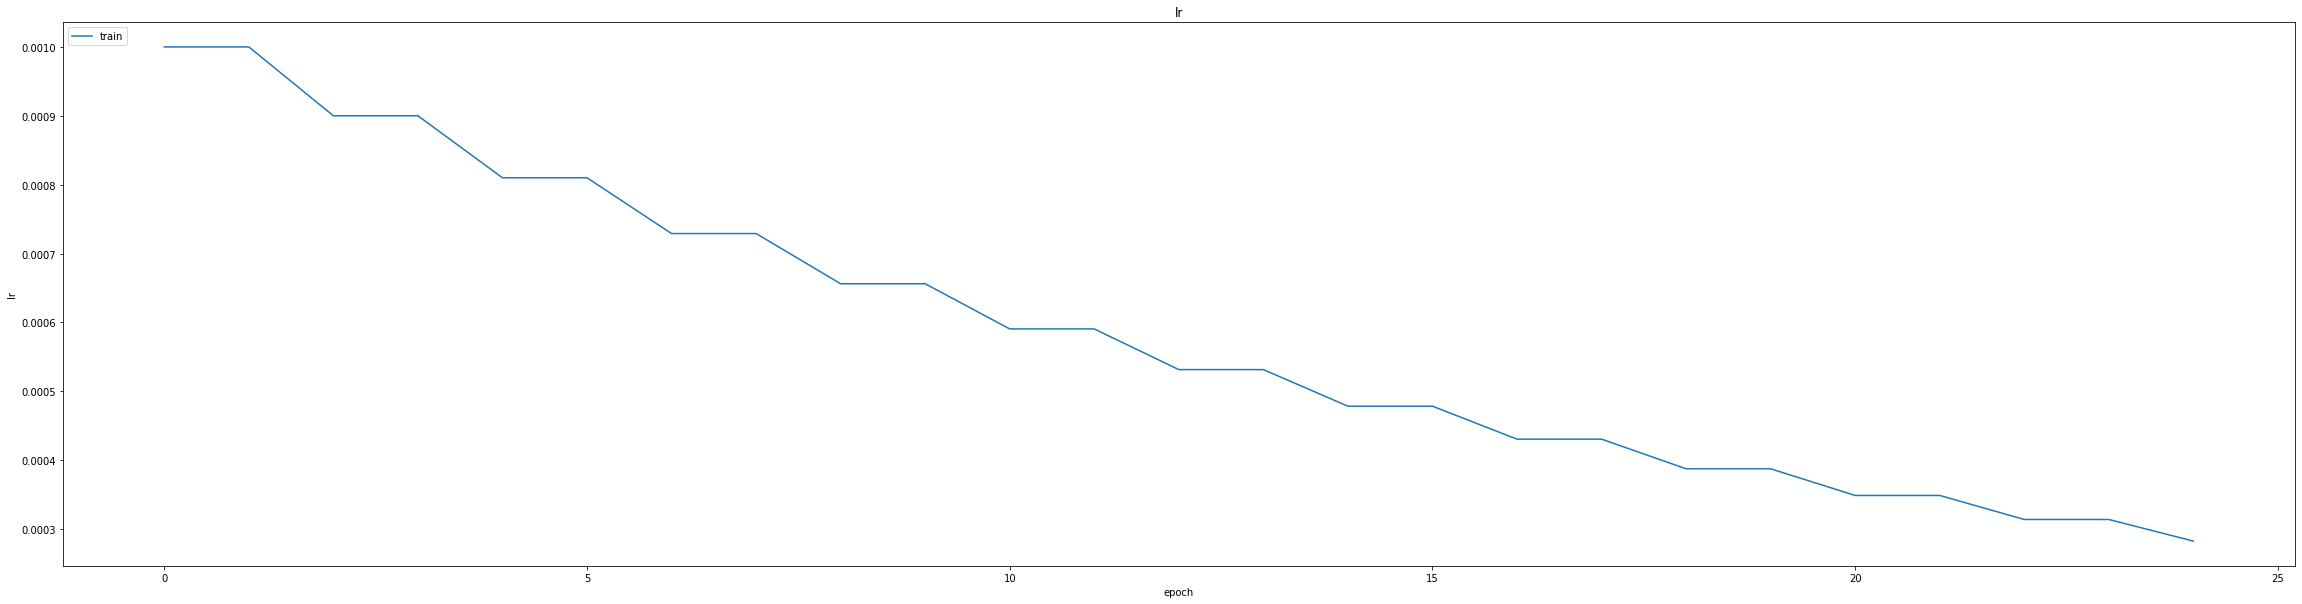

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.012737881392240524
0.021175995469093323
348/348 [==============================] - 4s 6ms/step
0.9890748442453019


348/348 [==============================] - 2s 6ms/step


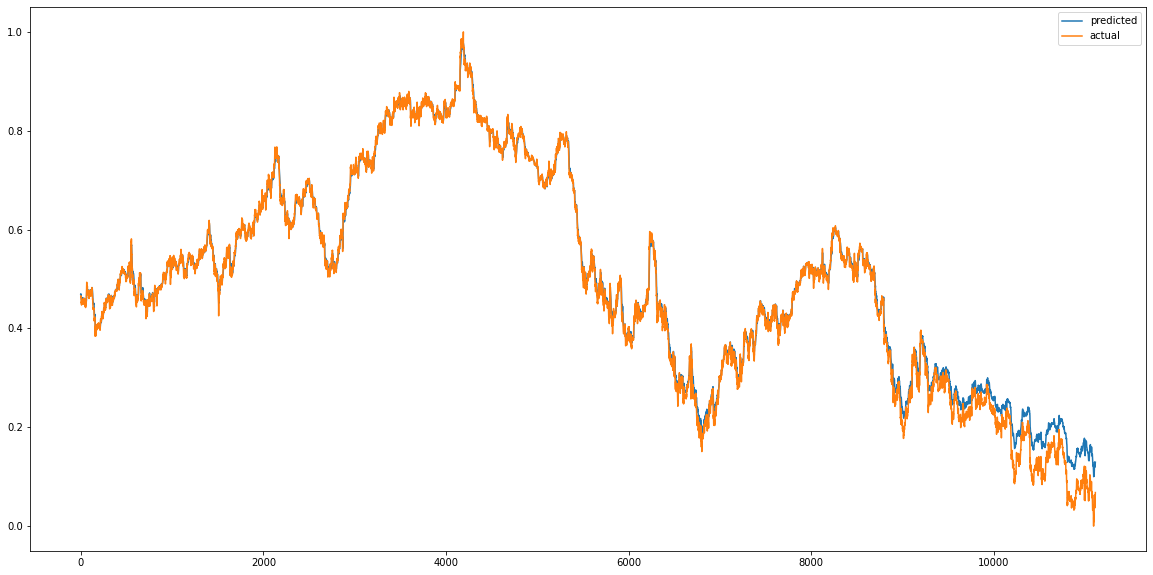

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


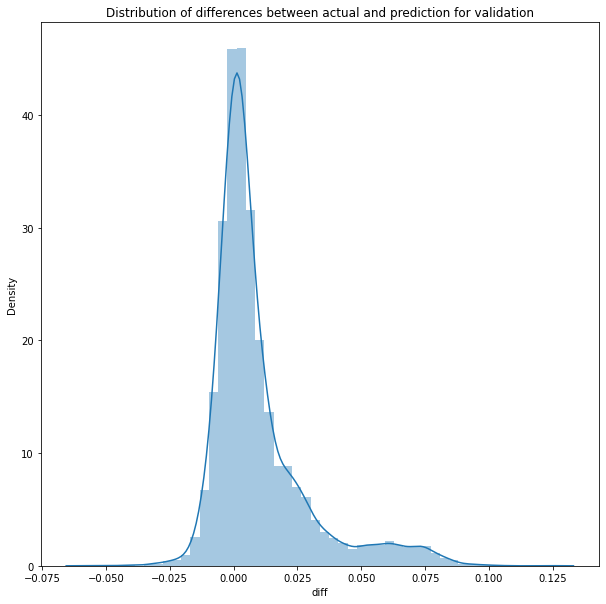

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 2s 6ms/step


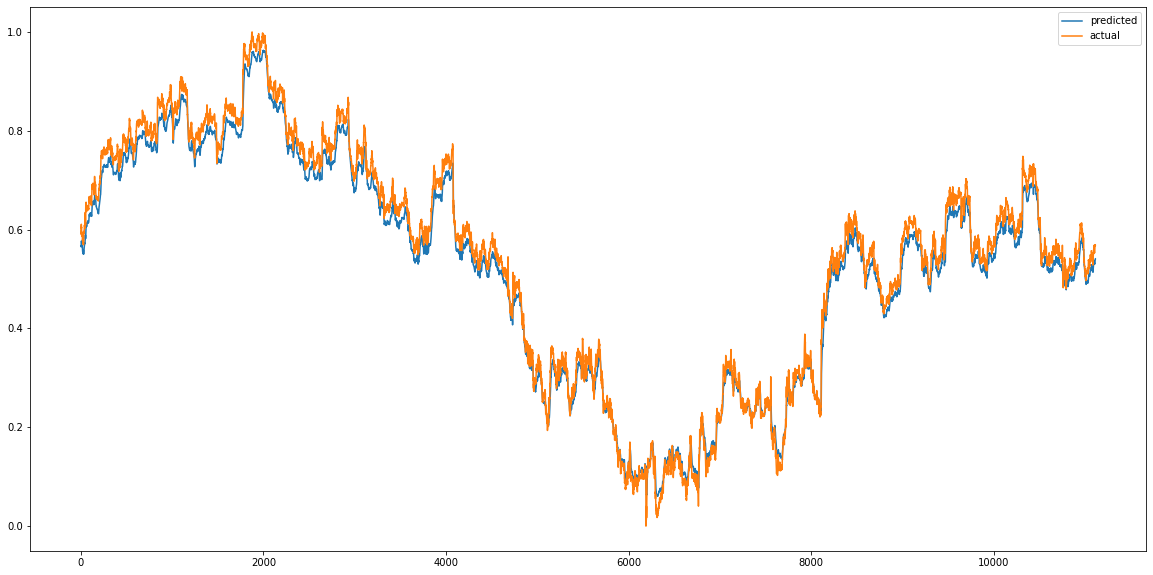

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


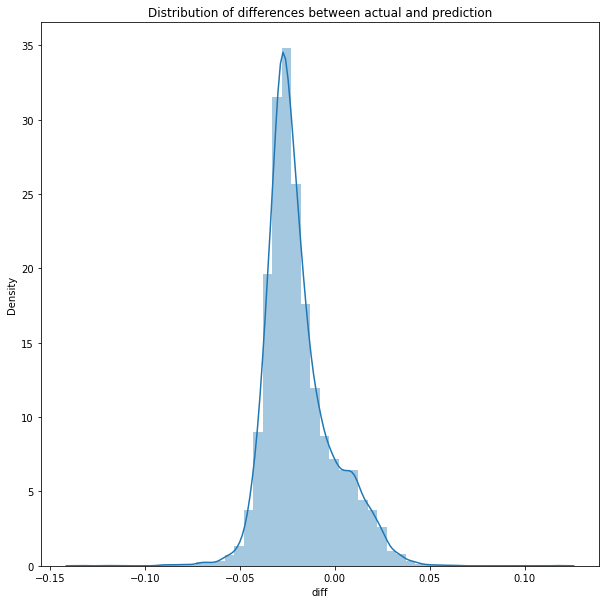

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.000674579758349716
RMSE :  0.025972673300022776
MAE :  0.02314658732670039
348/348 [==============================] - 2s 6ms/step
R2_Score  : 0.9881135971464624


count    11115.000000
mean        -0.019282
std          0.017401
min         -0.133299
25%         -0.030284
50%         -0.023232
75%         -0.011236
max          0.117715
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 24, 32)            4416      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           295936    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
406/406 [==============================] - ETA: 0s - loss: 377.3094 - mae: 3.1790 - mse: 377.3094 - root_mean_squared_error: 19.4245 - mape: 19886.3594
Epoch 1: val_mse improved from inf to 0.14085, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 29s 62ms/step - loss: 377.3094 - mae: 3.1790 - mse: 377.3094 - root_mean_squared_error: 19.4245 - mape: 19886.3594 - val_loss: 0.1408 - val_mae: 0.3160 - val_mse: 0.1408 - val_root_mean_squared_error: 0.3753 - val_mape: 72422.8828
Epoch 2/75
402/406 [============================>.] - ETA: 0s - loss: 0.0384 - mae: 0.1471 - mse: 0.0384 - root_mean_squared_error: 0.1959 - mape: 14746.2861
Epoch 2: val_mse improved from 0.14085 to 0.08386, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 19s 46ms/step - loss: 0.0383 - mae: 0.1471 - mse: 0.0383 - root_mean_squared_error: 0.1958 - mape: 14605.2686 - val_loss: 0.0839 - val_mae: 0.2410 - val_mse: 0.0839 - val_root_mean_squared_error: 0.2896 - val_mape: 62020.4062
Epoch 3/75
405/406 [============================>.] - ETA: 0s - loss: 0.0322 - mae: 0.1376 - mse: 0.0322 - root_mean_squared_error: 0.1794 - mape: 12791.5801
Epoch 3: val_mse improved from 0.08386 to 0.07582, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0322 - mae: 0.1375 - mse: 0.0322 - root_mean_squared_error: 0.1794 - mape: 12763.5801 - val_loss: 0.0758 - val_mae: 0.2293 - val_mse: 0.0758 - val_root_mean_squared_error: 0.2754 - val_mape: 59986.3320
Epoch 4/75
404/406 [============================>.] - ETA: 0s - loss: 0.0320 - mae: 0.1382 - mse: 0.0320 - root_mean_squared_error: 0.1789 - mape: 13211.2129
Epoch 4: val_mse improved from 0.07582 to 0.07532, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0320 - mae: 0.1382 - mse: 0.0320 - root_mean_squared_error: 0.1789 - mape: 13149.8467 - val_loss: 0.0753 - val_mae: 0.2286 - val_mse: 0.0753 - val_root_mean_squared_error: 0.2745 - val_mape: 59849.0195
Epoch 5/75
402/406 [============================>.] - ETA: 0s - loss: 0.0320 - mae: 0.1384 - mse: 0.0320 - root_mean_squared_error: 0.1790 - mape: 13013.7285
Epoch 5: val_mse did not improve from 0.07532
406/406 [==============================] - 5s 12ms/step - loss: 0.0320 - mae: 0.1383 - mse: 0.0320 - root_mean_squared_error: 0.1790 - mape: 12889.2480 - val_loss: 0.0761 - val_mae: 0.2297 - val_mse: 0.0761 - val_root_mean_squared_error: 0.2758 - val_mape: 60045.5156
Epoch 6/75
402/406 [============================>.] - ETA: 0s - loss: 0.0319 - mae: 0.1381 - mse: 0.0319 - root_mean_squared_error: 0.1787 - mape: 12888.2471
Epoch 6: val_mse improved from 0.07532 to 0.07532, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 15s 38ms/step - loss: 0.0320 - mae: 0.1382 - mse: 0.0320 - root_mean_squared_error: 0.1788 - mape: 12765.0254 - val_loss: 0.0753 - val_mae: 0.2286 - val_mse: 0.0753 - val_root_mean_squared_error: 0.2744 - val_mape: 59843.5469
Epoch 7/75
404/406 [============================>.] - ETA: 0s - loss: 0.0320 - mae: 0.1383 - mse: 0.0320 - root_mean_squared_error: 0.1789 - mape: 13143.1299
Epoch 7: val_mse improved from 0.07532 to 0.07502, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0320 - mae: 0.1383 - mse: 0.0320 - root_mean_squared_error: 0.1789 - mape: 13082.0439 - val_loss: 0.0750 - val_mae: 0.2281 - val_mse: 0.0750 - val_root_mean_squared_error: 0.2739 - val_mape: 59759.4102
Epoch 8/75
404/406 [============================>.] - ETA: 0s - loss: 0.0320 - mae: 0.1383 - mse: 0.0320 - root_mean_squared_error: 0.1788 - mape: 13877.4355
Epoch 8: val_mse did not improve from 0.07502
406/406 [==============================] - 5s 11ms/step - loss: 0.0320 - mae: 0.1382 - mse: 0.0320 - root_mean_squared_error: 0.1788 - mape: 13812.9277 - val_loss: 0.0756 - val_mae: 0.2291 - val_mse: 0.0756 - val_root_mean_squared_error: 0.2750 - val_mape: 59926.4609
Epoch 9/75
404/406 [============================>.] - ETA: 0s - loss: 0.0319 - mae: 0.1381 - mse: 0.0319 - root_mean_squared_error: 0.1787 - mape: 13082.4805
Epoch 9: val_mse improved from 0.07502 to 0.07440, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 15s 38ms/step - loss: 0.0319 - mae: 0.1381 - mse: 0.0319 - root_mean_squared_error: 0.1787 - mape: 13021.6973 - val_loss: 0.0744 - val_mae: 0.2272 - val_mse: 0.0744 - val_root_mean_squared_error: 0.2728 - val_mape: 59582.9453
Epoch 10/75
406/406 [==============================] - ETA: 0s - loss: 0.0319 - mae: 0.1381 - mse: 0.0319 - root_mean_squared_error: 0.1786 - mape: 13445.4609
Epoch 10: val_mse did not improve from 0.07440
406/406 [==============================] - 8s 19ms/step - loss: 0.0319 - mae: 0.1381 - mse: 0.0319 - root_mean_squared_error: 0.1786 - mape: 13445.4609 - val_loss: 0.0752 - val_mae: 0.2284 - val_mse: 0.0752 - val_root_mean_squared_error: 0.2742 - val_mape: 59790.8945
Epoch 11/75
406/406 [==============================] - ETA: 0s - loss: 0.0319 - mae: 0.1381 - mse: 0.0319 - root_mean_squared_error: 0.1787 - mape: 13121.9551
Epoch 11: val_mse did not improve from 0.07440
406/406 [==============================] - 5s 12ms/

406/406 [==============================] - 15s 37ms/step - loss: 0.0176 - mae: 0.0985 - mse: 0.0176 - root_mean_squared_error: 0.1326 - mape: 6711.0469 - val_loss: 0.0090 - val_mae: 0.0712 - val_mse: 0.0090 - val_root_mean_squared_error: 0.0951 - val_mape: 31100.3750
Epoch 20/75
402/406 [============================>.] - ETA: 0s - loss: 0.0034 - mae: 0.0443 - mse: 0.0034 - root_mean_squared_error: 0.0580 - mape: 6110.7227
Epoch 20: val_mse improved from 0.00905 to 0.00400, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 17s 41ms/step - loss: 0.0034 - mae: 0.0442 - mse: 0.0034 - root_mean_squared_error: 0.0579 - mape: 6052.2266 - val_loss: 0.0040 - val_mae: 0.0448 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0632 - val_mape: 24494.2598
Epoch 21/75
403/406 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0347 - mse: 0.0020 - root_mean_squared_error: 0.0452 - mape: 5668.6440
Epoch 21: val_mse improved from 0.00400 to 0.00276, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0020 - mae: 0.0347 - mse: 0.0020 - root_mean_squared_error: 0.0452 - mape: 5628.3193 - val_loss: 0.0028 - val_mae: 0.0379 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0525 - val_mape: 21309.6699
Epoch 22/75
403/406 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0317 - mse: 0.0017 - root_mean_squared_error: 0.0407 - mape: 4927.4238
Epoch 22: val_mse improved from 0.00276 to 0.00224, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0017 - mae: 0.0317 - mse: 0.0017 - root_mean_squared_error: 0.0407 - mape: 4892.3770 - val_loss: 0.0022 - val_mae: 0.0331 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0473 - val_mape: 19976.5605
Epoch 23/75
405/406 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0276 - mse: 0.0013 - root_mean_squared_error: 0.0355 - mape: 4556.8135
Epoch 23: val_mse improved from 0.00224 to 0.00143, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0013 - mae: 0.0276 - mse: 0.0013 - root_mean_squared_error: 0.0355 - mape: 4546.8271 - val_loss: 0.0014 - val_mae: 0.0263 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0378 - val_mape: 17717.8145
Epoch 24/75
403/406 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0252 - mse: 0.0010 - root_mean_squared_error: 0.0323 - mape: 3943.0955
Epoch 24: val_mse improved from 0.00143 to 0.00141, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 17s 42ms/step - loss: 0.0010 - mae: 0.0251 - mse: 0.0010 - root_mean_squared_error: 0.0323 - mape: 3915.0427 - val_loss: 0.0014 - val_mae: 0.0281 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0376 - val_mape: 16837.2129
Epoch 25/75
405/406 [============================>.] - ETA: 0s - loss: 9.0154e-04 - mae: 0.0234 - mse: 9.0154e-04 - root_mean_squared_error: 0.0300 - mape: 3399.8318
Epoch 25: val_mse improved from 0.00141 to 0.00117, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 9.0210e-04 - mae: 0.0234 - mse: 9.0210e-04 - root_mean_squared_error: 0.0300 - mape: 3392.3826 - val_loss: 0.0012 - val_mae: 0.0237 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0342 - val_mape: 16195.2686
Epoch 26/75
403/406 [============================>.] - ETA: 0s - loss: 8.1769e-04 - mae: 0.0222 - mse: 8.1769e-04 - root_mean_squared_error: 0.0286 - mape: 3819.3850
Epoch 26: val_mse improved from 0.00117 to 0.00094, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 8.1604e-04 - mae: 0.0222 - mse: 8.1604e-04 - root_mean_squared_error: 0.0286 - mape: 3792.2087 - val_loss: 9.3901e-04 - val_mae: 0.0213 - val_mse: 9.3901e-04 - val_root_mean_squared_error: 0.0306 - val_mape: 15322.4238
Epoch 27/75
404/406 [============================>.] - ETA: 0s - loss: 7.1073e-04 - mae: 0.0208 - mse: 7.1073e-04 - root_mean_squared_error: 0.0267 - mape: 3894.8113
Epoch 27: val_mse did not improve from 0.00094
406/406 [==============================] - 5s 12ms/step - loss: 7.1094e-04 - mae: 0.0208 - mse: 7.1094e-04 - root_mean_squared_error: 0.0267 - mape: 3876.6877 - val_loss: 9.4666e-04 - val_mae: 0.0215 - val_mse: 9.4666e-04 - val_root_mean_squared_error: 0.0308 - val_mape: 14800.0205
Epoch 28/75
403/406 [============================>.] - ETA: 0s - loss: 6.0759e-04 - mae: 0.0192 - mse: 6.0759e-04 - root_mean_squared_error: 0.0246 - mape: 3231.7500
Epoch 28: val_mse improved from 0.00094 to 0.00092, sa

406/406 [==============================] - 16s 39ms/step - loss: 6.0612e-04 - mae: 0.0192 - mse: 6.0612e-04 - root_mean_squared_error: 0.0246 - mape: 3208.7554 - val_loss: 9.1892e-04 - val_mae: 0.0217 - val_mse: 9.1892e-04 - val_root_mean_squared_error: 0.0303 - val_mape: 14453.7793
Epoch 29/75
404/406 [============================>.] - ETA: 0s - loss: 5.8624e-04 - mae: 0.0188 - mse: 5.8624e-04 - root_mean_squared_error: 0.0242 - mape: 3067.4238
Epoch 29: val_mse improved from 0.00092 to 0.00083, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 5.8546e-04 - mae: 0.0188 - mse: 5.8546e-04 - root_mean_squared_error: 0.0242 - mape: 3053.1523 - val_loss: 8.3377e-04 - val_mae: 0.0200 - val_mse: 8.3377e-04 - val_root_mean_squared_error: 0.0289 - val_mape: 14420.1260
Epoch 30/75
403/406 [============================>.] - ETA: 0s - loss: 4.9310e-04 - mae: 0.0172 - mse: 4.9310e-04 - root_mean_squared_error: 0.0222 - mape: 3050.9392
Epoch 30: val_mse did not improve from 0.00083
406/406 [==============================] - 5s 12ms/step - loss: 4.9290e-04 - mae: 0.0172 - mse: 4.9290e-04 - root_mean_squared_error: 0.0222 - mape: 3029.2341 - val_loss: 8.7852e-04 - val_mae: 0.0213 - val_mse: 8.7852e-04 - val_root_mean_squared_error: 0.0296 - val_mape: 14144.8887
Epoch 31/75
403/406 [============================>.] - ETA: 0s - loss: 4.6328e-04 - mae: 0.0167 - mse: 4.6328e-04 - root_mean_squared_error: 0.0215 - mape: 3204.4185
Epoch 31: val_mse did not improve from 0.00083
406/406

406/406 [==============================] - 15s 37ms/step - loss: 3.9271e-04 - mae: 0.0154 - mse: 3.9271e-04 - root_mean_squared_error: 0.0198 - mape: 2760.4846 - val_loss: 7.7398e-04 - val_mae: 0.0198 - val_mse: 7.7398e-04 - val_root_mean_squared_error: 0.0278 - val_mape: 13312.2979
Epoch 34/75
405/406 [============================>.] - ETA: 0s - loss: 3.3756e-04 - mae: 0.0142 - mse: 3.3756e-04 - root_mean_squared_error: 0.0184 - mape: 2994.1589
Epoch 34: val_mse did not improve from 0.00077
406/406 [==============================] - 4s 11ms/step - loss: 3.3747e-04 - mae: 0.0142 - mse: 3.3747e-04 - root_mean_squared_error: 0.0184 - mape: 2987.5942 - val_loss: 8.3494e-04 - val_mae: 0.0213 - val_mse: 8.3494e-04 - val_root_mean_squared_error: 0.0289 - val_mape: 12931.1621
Epoch 35/75
404/406 [============================>.] - ETA: 0s - loss: 3.6142e-04 - mae: 0.0148 - mse: 3.6142e-04 - root_mean_squared_error: 0.0190 - mape: 2853.3052
Epoch 35: val_mse improved from 0.00077 to 0.00069, sa

406/406 [==============================] - 15s 36ms/step - loss: 3.6159e-04 - mae: 0.0148 - mse: 3.6159e-04 - root_mean_squared_error: 0.0190 - mape: 2840.0281 - val_loss: 6.8972e-04 - val_mae: 0.0187 - val_mse: 6.8972e-04 - val_root_mean_squared_error: 0.0263 - val_mape: 12725.6221
Epoch 36/75
406/406 [==============================] - ETA: 0s - loss: 3.3136e-04 - mae: 0.0142 - mse: 3.3136e-04 - root_mean_squared_error: 0.0182 - mape: 2592.8315
Epoch 36: val_mse did not improve from 0.00069
406/406 [==============================] - 6s 14ms/step - loss: 3.3136e-04 - mae: 0.0142 - mse: 3.3136e-04 - root_mean_squared_error: 0.0182 - mape: 2592.8315 - val_loss: 7.2757e-04 - val_mae: 0.0200 - val_mse: 7.2757e-04 - val_root_mean_squared_error: 0.0270 - val_mape: 12297.9688
Epoch 37/75
404/406 [============================>.] - ETA: 0s - loss: 2.8503e-04 - mae: 0.0132 - mse: 2.8503e-04 - root_mean_squared_error: 0.0169 - mape: 2634.1370
Epoch 37: val_mse improved from 0.00069 to 0.00068, sa

406/406 [==============================] - 16s 38ms/step - loss: 2.8464e-04 - mae: 0.0131 - mse: 2.8464e-04 - root_mean_squared_error: 0.0169 - mape: 2621.8760 - val_loss: 6.7745e-04 - val_mae: 0.0198 - val_mse: 6.7745e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 11809.1289
Epoch 38/75
405/406 [============================>.] - ETA: 0s - loss: 2.5186e-04 - mae: 0.0123 - mse: 2.5186e-04 - root_mean_squared_error: 0.0159 - mape: 2606.9321
Epoch 38: val_mse improved from 0.00068 to 0.00061, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 2.5164e-04 - mae: 0.0123 - mse: 2.5164e-04 - root_mean_squared_error: 0.0159 - mape: 2601.2156 - val_loss: 6.0789e-04 - val_mae: 0.0184 - val_mse: 6.0789e-04 - val_root_mean_squared_error: 0.0247 - val_mape: 11631.8662
Epoch 39/75
405/406 [============================>.] - ETA: 0s - loss: 2.4442e-04 - mae: 0.0121 - mse: 2.4442e-04 - root_mean_squared_error: 0.0156 - mape: 2414.4080
Epoch 39: val_mse improved from 0.00061 to 0.00059, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 2.4419e-04 - mae: 0.0121 - mse: 2.4419e-04 - root_mean_squared_error: 0.0156 - mape: 2409.1140 - val_loss: 5.9456e-04 - val_mae: 0.0180 - val_mse: 5.9456e-04 - val_root_mean_squared_error: 0.0244 - val_mape: 11469.4082
Epoch 40/75
405/406 [============================>.] - ETA: 0s - loss: 2.4917e-04 - mae: 0.0123 - mse: 2.4917e-04 - root_mean_squared_error: 0.0158 - mape: 2306.4509
Epoch 40: val_mse improved from 0.00059 to 0.00053, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 2.4903e-04 - mae: 0.0123 - mse: 2.4903e-04 - root_mean_squared_error: 0.0158 - mape: 2301.3943 - val_loss: 5.3402e-04 - val_mae: 0.0174 - val_mse: 5.3402e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 11068.8574
Epoch 41/75
402/406 [============================>.] - ETA: 0s - loss: 2.4904e-04 - mae: 0.0123 - mse: 2.4904e-04 - root_mean_squared_error: 0.0158 - mape: 2366.3088
Epoch 41: val_mse did not improve from 0.00053
406/406 [==============================] - 5s 12ms/step - loss: 2.4966e-04 - mae: 0.0123 - mse: 2.4966e-04 - root_mean_squared_error: 0.0158 - mape: 2343.6497 - val_loss: 9.0026e-04 - val_mae: 0.0231 - val_mse: 9.0026e-04 - val_root_mean_squared_error: 0.0300 - val_mape: 12755.6826
Epoch 42/75
406/406 [==============================] - ETA: 0s - loss: 2.1906e-04 - mae: 0.0116 - mse: 2.1906e-04 - root_mean_squared_error: 0.0148 - mape: 2369.4358
Epoch 42: val_mse did not improve from 0.00053
406/406

406/406 [==============================] - 14s 35ms/step - loss: 2.1750e-04 - mae: 0.0116 - mse: 2.1750e-04 - root_mean_squared_error: 0.0147 - mape: 2177.1812 - val_loss: 5.0547e-04 - val_mae: 0.0163 - val_mse: 5.0547e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 10671.4033
Epoch 47/75
403/406 [============================>.] - ETA: 0s - loss: 1.9208e-04 - mae: 0.0108 - mse: 1.9208e-04 - root_mean_squared_error: 0.0139 - mape: 2175.9080
Epoch 47: val_mse did not improve from 0.00051
406/406 [==============================] - 4s 11ms/step - loss: 1.9344e-04 - mae: 0.0108 - mse: 1.9344e-04 - root_mean_squared_error: 0.0139 - mape: 2160.4309 - val_loss: 6.8304e-04 - val_mae: 0.0200 - val_mse: 6.8304e-04 - val_root_mean_squared_error: 0.0261 - val_mape: 9937.5674
Epoch 48/75
403/406 [============================>.] - ETA: 0s - loss: 1.8161e-04 - mae: 0.0105 - mse: 1.8161e-04 - root_mean_squared_error: 0.0135 - mape: 2268.0942
Epoch 48: val_mse did not improve from 0.00051
406/406 

406/406 [==============================] - 16s 40ms/step - loss: 1.5795e-04 - mae: 0.0097 - mse: 1.5795e-04 - root_mean_squared_error: 0.0126 - mape: 2397.6213 - val_loss: 5.0332e-04 - val_mae: 0.0158 - val_mse: 5.0332e-04 - val_root_mean_squared_error: 0.0224 - val_mape: 11351.6484
Epoch 52/75
405/406 [============================>.] - ETA: 0s - loss: 1.8171e-04 - mae: 0.0105 - mse: 1.8171e-04 - root_mean_squared_error: 0.0135 - mape: 2388.4080
Epoch 52: val_mse improved from 0.00050 to 0.00047, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 1.8181e-04 - mae: 0.0105 - mse: 1.8181e-04 - root_mean_squared_error: 0.0135 - mape: 2383.1721 - val_loss: 4.7405e-04 - val_mae: 0.0159 - val_mse: 4.7405e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 10098.5498
Epoch 53/75
404/406 [============================>.] - ETA: 0s - loss: 1.8509e-04 - mae: 0.0107 - mse: 1.8509e-04 - root_mean_squared_error: 0.0136 - mape: 1971.7386
Epoch 53: val_mse did not improve from 0.00047
406/406 [==============================] - 5s 11ms/step - loss: 1.8567e-04 - mae: 0.0107 - mse: 1.8567e-04 - root_mean_squared_error: 0.0136 - mape: 1962.5664 - val_loss: 5.5536e-04 - val_mae: 0.0170 - val_mse: 5.5536e-04 - val_root_mean_squared_error: 0.0236 - val_mape: 9196.9531
Epoch 54/75
405/406 [============================>.] - ETA: 0s - loss: 1.1830e-04 - mae: 0.0084 - mse: 1.1830e-04 - root_mean_squared_error: 0.0109 - mape: 1888.7939
Epoch 54: val_mse did not improve from 0.00047
406/406 

406/406 [==============================] - 15s 37ms/step - loss: 1.4671e-04 - mae: 0.0095 - mse: 1.4671e-04 - root_mean_squared_error: 0.0121 - mape: 1766.5671 - val_loss: 4.3413e-04 - val_mae: 0.0147 - val_mse: 4.3413e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 10937.9482
Epoch 56/75
406/406 [==============================] - ETA: 0s - loss: 1.6338e-04 - mae: 0.0097 - mse: 1.6338e-04 - root_mean_squared_error: 0.0128 - mape: 1843.9464
Epoch 56: val_mse improved from 0.00043 to 0.00043, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 1.6338e-04 - mae: 0.0097 - mse: 1.6338e-04 - root_mean_squared_error: 0.0128 - mape: 1843.9464 - val_loss: 4.3226e-04 - val_mae: 0.0148 - val_mse: 4.3226e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 8693.9951
Epoch 57/75
406/406 [==============================] - ETA: 0s - loss: 1.1164e-04 - mae: 0.0082 - mse: 1.1164e-04 - root_mean_squared_error: 0.0106 - mape: 1924.5326
Epoch 57: val_mse improved from 0.00043 to 0.00043, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 1.1164e-04 - mae: 0.0082 - mse: 1.1164e-04 - root_mean_squared_error: 0.0106 - mape: 1924.5326 - val_loss: 4.2623e-04 - val_mae: 0.0150 - val_mse: 4.2623e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 9833.5381
Epoch 58/75
405/406 [============================>.] - ETA: 0s - loss: 1.1828e-04 - mae: 0.0085 - mse: 1.1828e-04 - root_mean_squared_error: 0.0109 - mape: 1781.1262
Epoch 58: val_mse improved from 0.00043 to 0.00035, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 14s 36ms/step - loss: 1.1814e-04 - mae: 0.0085 - mse: 1.1814e-04 - root_mean_squared_error: 0.0109 - mape: 1777.2203 - val_loss: 3.5060e-04 - val_mae: 0.0132 - val_mse: 3.5060e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 8162.3828
Epoch 59/75
405/406 [============================>.] - ETA: 0s - loss: 1.0218e-04 - mae: 0.0078 - mse: 1.0218e-04 - root_mean_squared_error: 0.0101 - mape: 1859.4365
Epoch 59: val_mse did not improve from 0.00035
406/406 [==============================] - 5s 11ms/step - loss: 1.0208e-04 - mae: 0.0078 - mse: 1.0208e-04 - root_mean_squared_error: 0.0101 - mape: 1855.3591 - val_loss: 4.4825e-04 - val_mae: 0.0145 - val_mse: 4.4825e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 9257.3623
Epoch 60/75
405/406 [============================>.] - ETA: 0s - loss: 1.2423e-04 - mae: 0.0087 - mse: 1.2423e-04 - root_mean_squared_error: 0.0111 - mape: 1853.7808
Epoch 60: val_mse did not improve from 0.00035
406/406 [

406/406 [==============================] - 15s 38ms/step - loss: 1.1155e-04 - mae: 0.0082 - mse: 1.1155e-04 - root_mean_squared_error: 0.0106 - mape: 1819.0327 - val_loss: 3.2405e-04 - val_mae: 0.0132 - val_mse: 3.2405e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 9232.1807
Epoch 62/75
405/406 [============================>.] - ETA: 0s - loss: 1.0479e-04 - mae: 0.0078 - mse: 1.0479e-04 - root_mean_squared_error: 0.0102 - mape: 1684.4131
Epoch 62: val_mse did not improve from 0.00032
406/406 [==============================] - 5s 12ms/step - loss: 1.0468e-04 - mae: 0.0078 - mse: 1.0468e-04 - root_mean_squared_error: 0.0102 - mape: 1680.7192 - val_loss: 3.2503e-04 - val_mae: 0.0140 - val_mse: 3.2503e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 7909.5093
Epoch 63/75
406/406 [==============================] - ETA: 0s - loss: 8.7278e-05 - mae: 0.0072 - mse: 8.7278e-05 - root_mean_squared_error: 0.0093 - mape: 1711.6577
Epoch 63: val_mse improved from 0.00032 to 0.00025, savi

406/406 [==============================] - 16s 40ms/step - loss: 8.7278e-05 - mae: 0.0072 - mse: 8.7278e-05 - root_mean_squared_error: 0.0093 - mape: 1711.6577 - val_loss: 2.4908e-04 - val_mae: 0.0118 - val_mse: 2.4908e-04 - val_root_mean_squared_error: 0.0158 - val_mape: 7849.6025
Epoch 64/75
403/406 [============================>.] - ETA: 0s - loss: 1.0635e-04 - mae: 0.0081 - mse: 1.0635e-04 - root_mean_squared_error: 0.0103 - mape: 1718.0958
Epoch 64: val_mse did not improve from 0.00025
406/406 [==============================] - 5s 11ms/step - loss: 1.0593e-04 - mae: 0.0080 - mse: 1.0593e-04 - root_mean_squared_error: 0.0103 - mape: 1705.8662 - val_loss: 3.0581e-04 - val_mae: 0.0139 - val_mse: 3.0581e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 7048.9497
Epoch 65/75
404/406 [============================>.] - ETA: 0s - loss: 9.0195e-05 - mae: 0.0075 - mse: 9.0195e-05 - root_mean_squared_error: 0.0095 - mape: 1387.2568
Epoch 65: val_mse did not improve from 0.00025
406/406 [

406/406 [==============================] - 15s 37ms/step - loss: 8.6274e-05 - mae: 0.0074 - mse: 8.6274e-05 - root_mean_squared_error: 0.0093 - mape: 1347.6405 - val_loss: 2.1725e-04 - val_mae: 0.0112 - val_mse: 2.1725e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 6608.4155
Epoch 67/75
404/406 [============================>.] - ETA: 0s - loss: 7.4471e-05 - mae: 0.0068 - mse: 7.4471e-05 - root_mean_squared_error: 0.0086 - mape: 1139.5643
Epoch 67: val_mse improved from 0.00022 to 0.00017, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 7.4318e-05 - mae: 0.0068 - mse: 7.4318e-05 - root_mean_squared_error: 0.0086 - mape: 1134.2599 - val_loss: 1.7026e-04 - val_mae: 0.0096 - val_mse: 1.7026e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 6365.0269
Epoch 68/75
402/406 [============================>.] - ETA: 0s - loss: 9.1919e-05 - mae: 0.0075 - mse: 9.1919e-05 - root_mean_squared_error: 0.0096 - mape: 1244.2527
Epoch 68: val_mse did not improve from 0.00017
406/406 [==============================] - 5s 12ms/step - loss: 9.1464e-05 - mae: 0.0075 - mse: 9.1464e-05 - root_mean_squared_error: 0.0096 - mape: 1232.3350 - val_loss: 3.2426e-04 - val_mae: 0.0148 - val_mse: 3.2426e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 5623.2554
Epoch 69/75
402/406 [============================>.] - ETA: 0s - loss: 9.0807e-04 - mae: 0.0150 - mse: 9.0807e-04 - root_mean_squared_error: 0.0301 - mape: 3205.2205
Epoch 69: val_mse did not improve from 0.00017
406/406 [

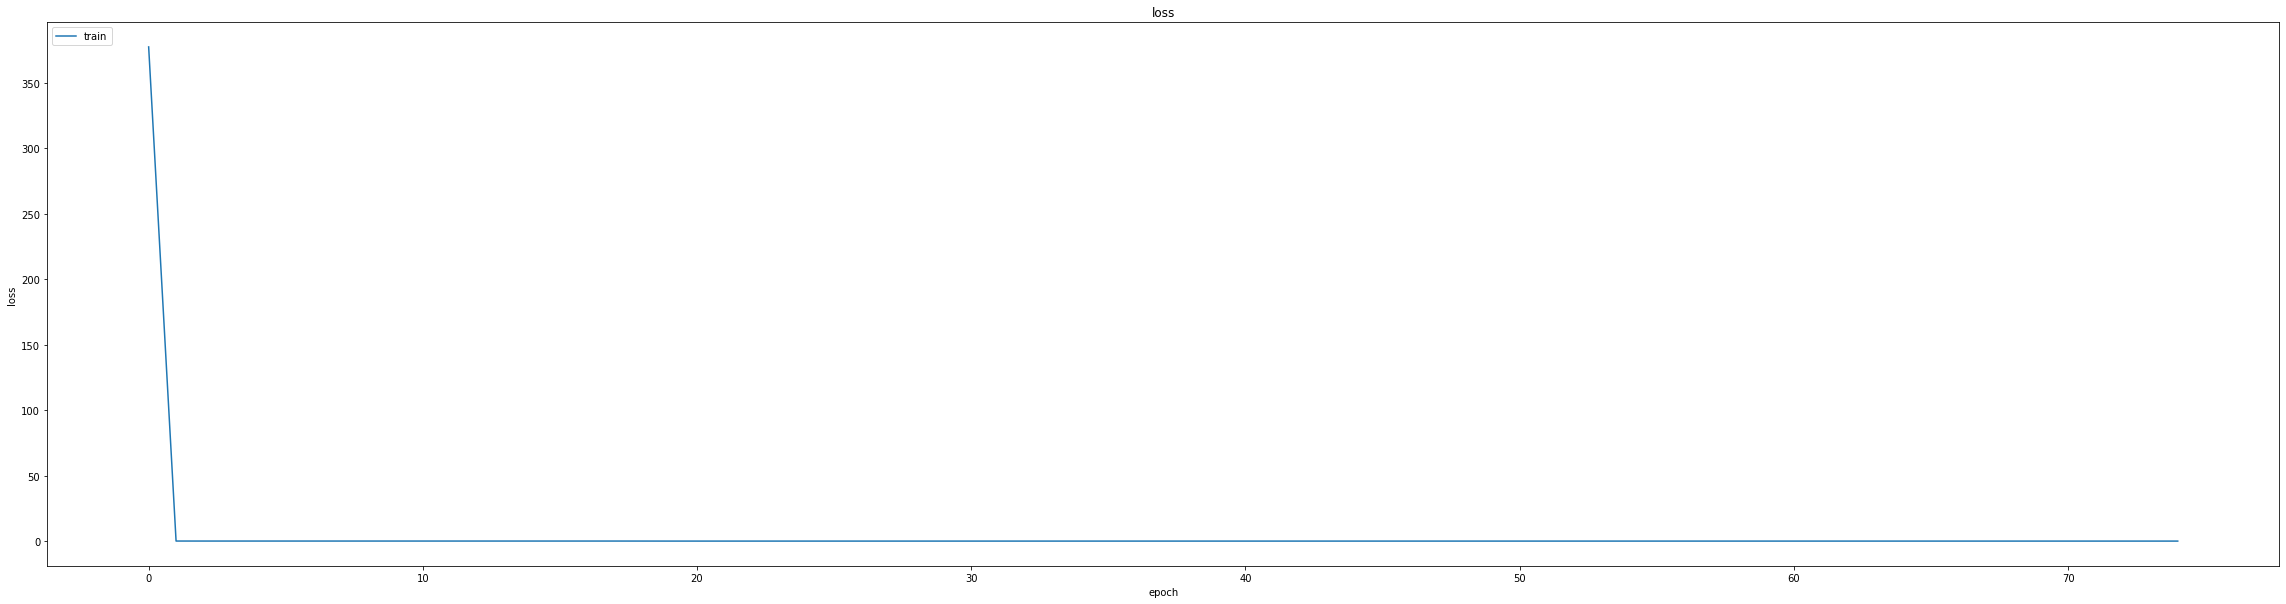

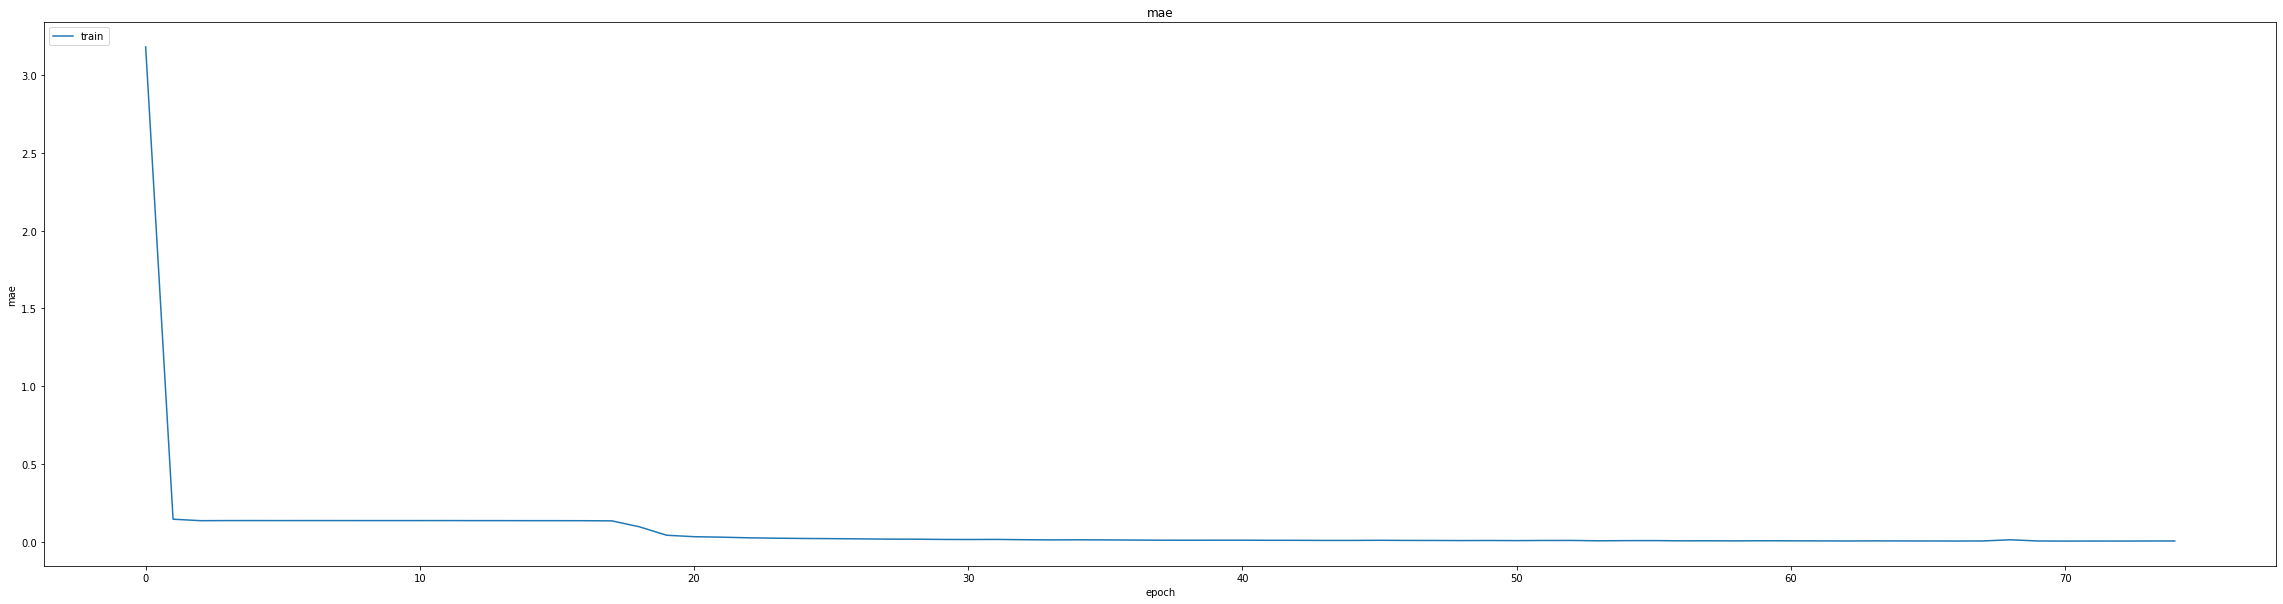

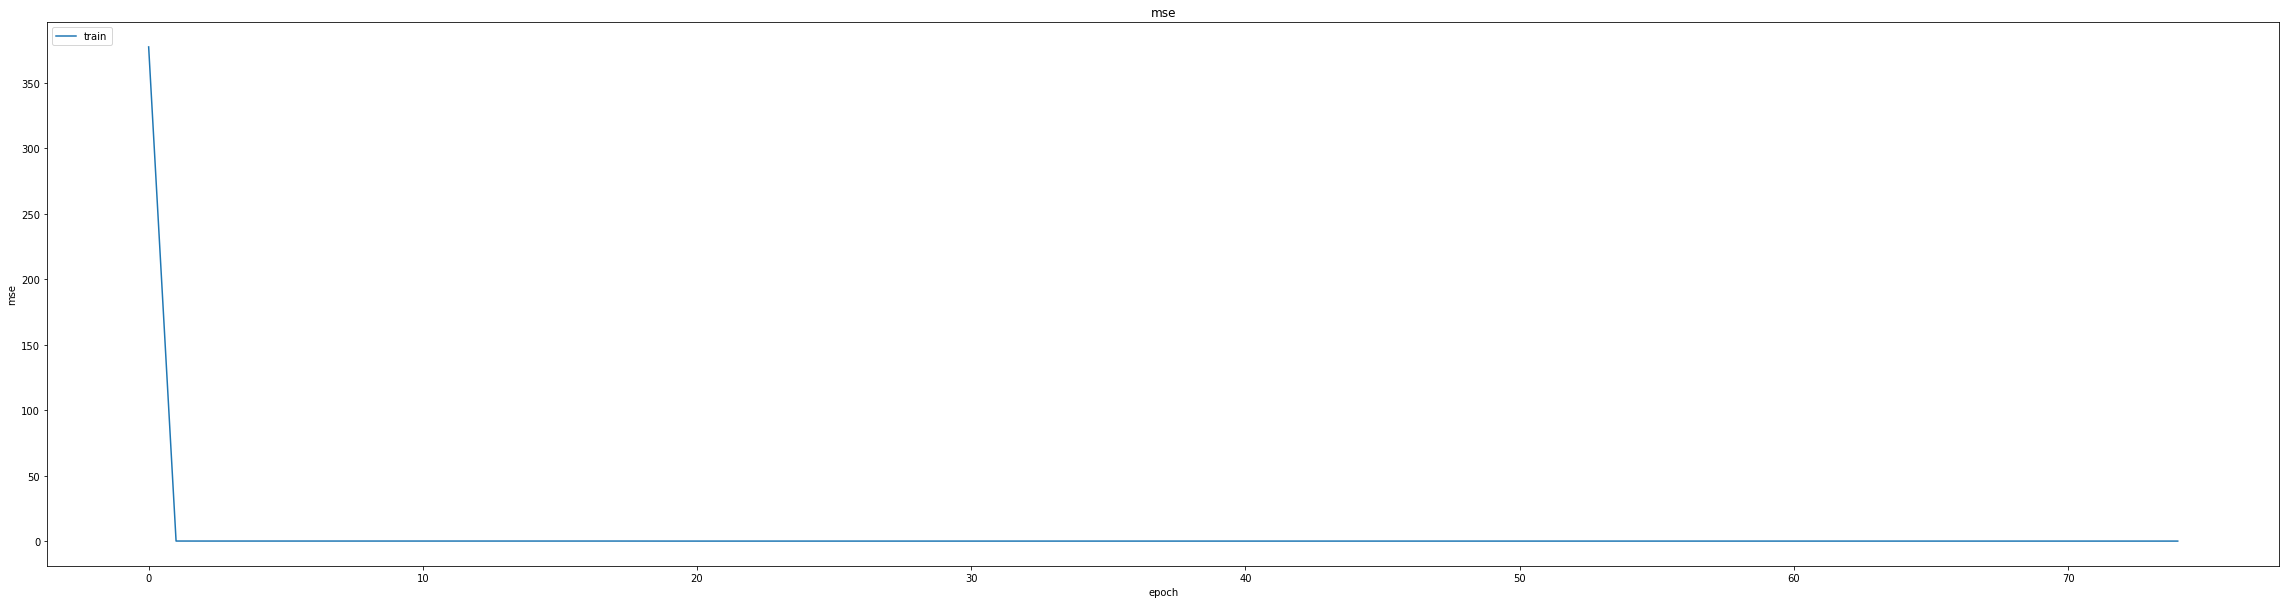

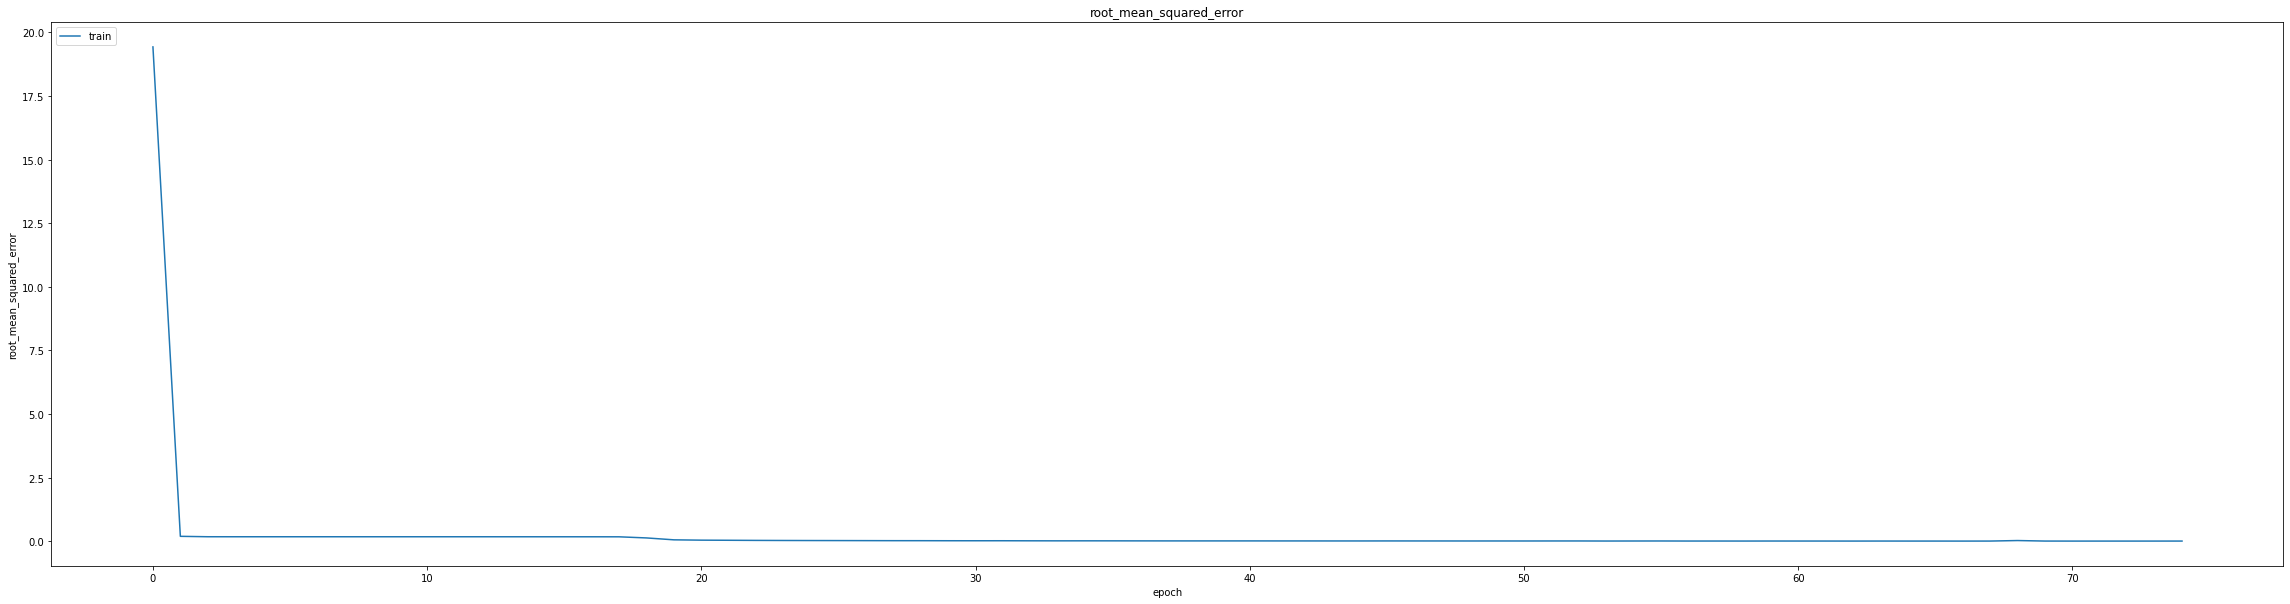

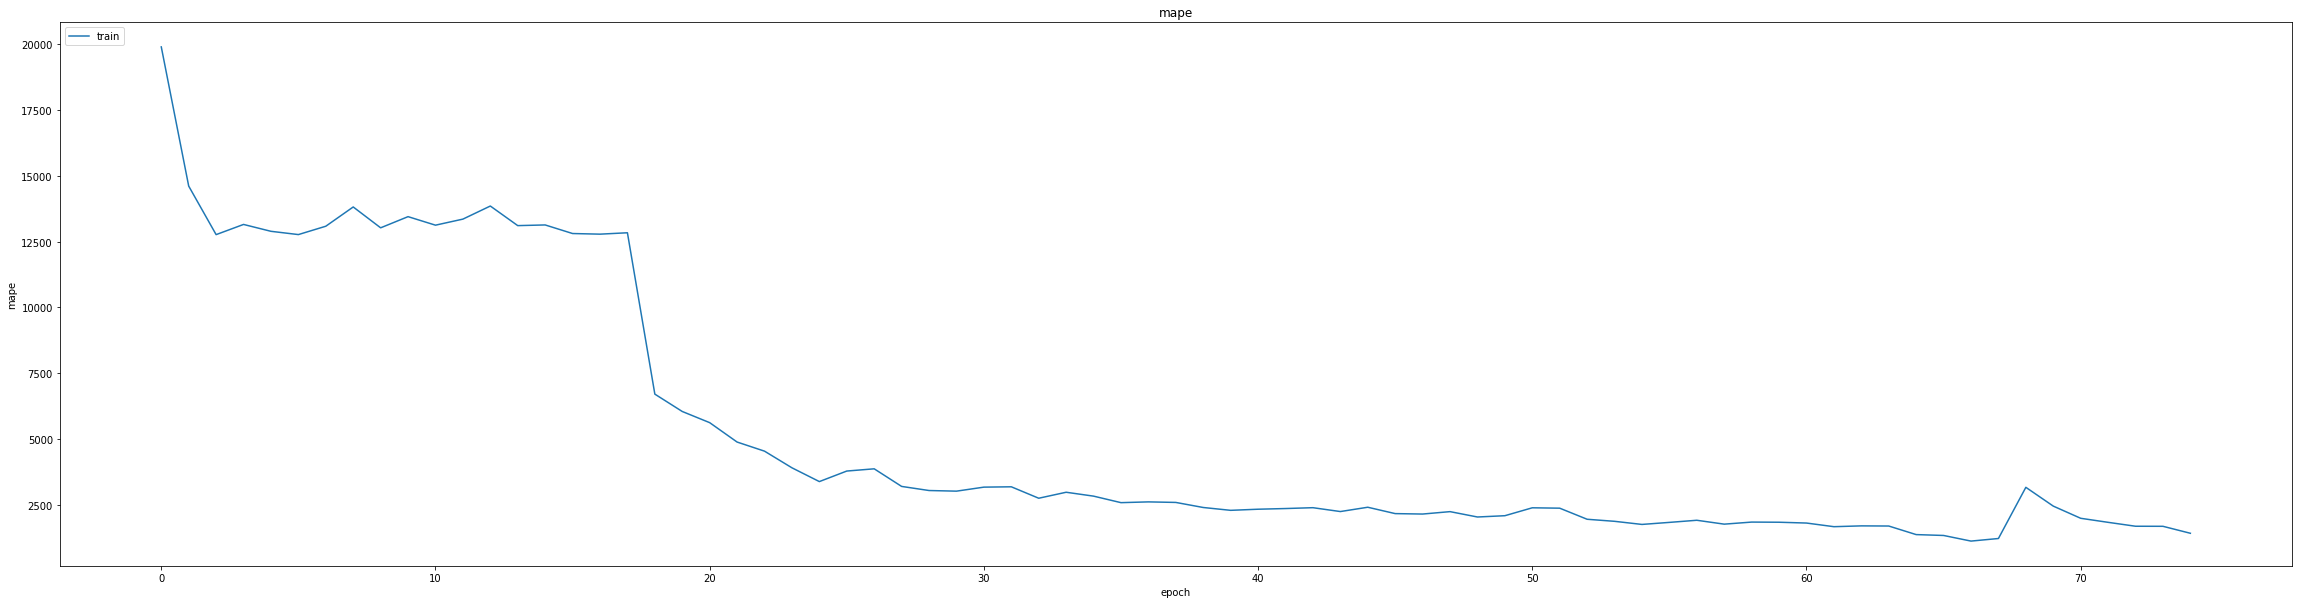

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009575040079653263
0.01304839551448822
348/348 [==============================] - 2s 4ms/step
0.9944792362168321


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
404/406 [============================>.] - ETA: 0s - loss: 9.4231e-04 - mae: 0.0127 - mse: 9.4231e-04 - root_mean_squared_error: 0.0307 - mape: 1293.7620
Epoch 1: val_mse did not improve from 0.00017
406/406 [==============================] - 9s 14ms/step - loss: 9.3815e-04 - mae: 0.0126 - mse: 9.3815e-04 - root_mean_squared_error: 0.0306 - mape: 1287.7406 - val_loss: 2.5395e-04 - val_mae: 0.0126 - val_mse: 2.5395e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 6631.6362 - lr: 0.0010
Epoch 2/25
405/406 [============================>.] - ETA: 0s - loss: 4.2880e-05 - mae: 0.0050 - mse: 4.2880e-05 - root_mean_squared_error: 0.0065 - mape: 1334.7145
Epoch 2: val_mse did not improve from 0.00017
406/406 [==============================] - 5s 11ms/step - loss: 4.2879e-05 - mae: 0.0050 - mse: 4.2879e-05 - root_mean_squared_error: 0.0065 - mape: 1331.7876 - val_loss: 1.9005e-04 - val_mae: 0.0105 - val_mse: 1.9005e-04 - val_root_mean_squared_error: 0.0138 - val_mape: 5790.8042 -

406/406 [==============================] - 17s 42ms/step - loss: 4.0104e-05 - mae: 0.0049 - mse: 4.0104e-05 - root_mean_squared_error: 0.0063 - mape: 1077.6182 - val_loss: 1.6771e-04 - val_mae: 0.0097 - val_mse: 1.6771e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 5183.1230 - lr: 8.1000e-04
Epoch 6/25
405/406 [============================>.] - ETA: 0s - loss: 4.9551e-05 - mae: 0.0053 - mse: 4.9551e-05 - root_mean_squared_error: 0.0070 - mape: 1160.7310
Epoch 6: val_mse did not improve from 0.00017
406/406 [==============================] - 5s 12ms/step - loss: 4.9547e-05 - mae: 0.0053 - mse: 4.9547e-05 - root_mean_squared_error: 0.0070 - mape: 1158.1862 - val_loss: 1.9458e-04 - val_mae: 0.0108 - val_mse: 1.9458e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 5397.1924 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/25
403/406 [============================>.] - ETA: 0s - loss: 3.9297e-05 - mae: 0.0049 - mse: 3.9297e-05 - root_mean_squared_error: 0.0063 - mape:

406/406 [==============================] - 15s 37ms/step - loss: 4.4034e-05 - mae: 0.0052 - mse: 4.4034e-05 - root_mean_squared_error: 0.0066 - mape: 874.5584 - val_loss: 1.4299e-04 - val_mae: 0.0091 - val_mse: 1.4299e-04 - val_root_mean_squared_error: 0.0120 - val_mape: 4400.4321 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
406/406 [==============================] - ETA: 0s - loss: 3.7060e-05 - mae: 0.0047 - mse: 3.7060e-05 - root_mean_squared_error: 0.0061 - mape: 950.1604
Epoch 11: val_mse did not improve from 0.00014
406/406 [==============================] - 5s 12ms/step - loss: 3.7060e-05 - mae: 0.0047 - mse: 3.7060e-05 - root_mean_squared_error: 0.0061 - mape: 950.1604 - val_loss: 2.3232e-04 - val_mae: 0.0124 - val_mse: 2.3232e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 4856.1689 - lr: 5.9049e-04
Epoch 12/25
406/406 [==============================] - ETA: 0s - loss: 3.7647e-05 - mae: 0.0048 - mse: 3.7647e-05 - root_mean_squared_error: 0.0061 - mape:

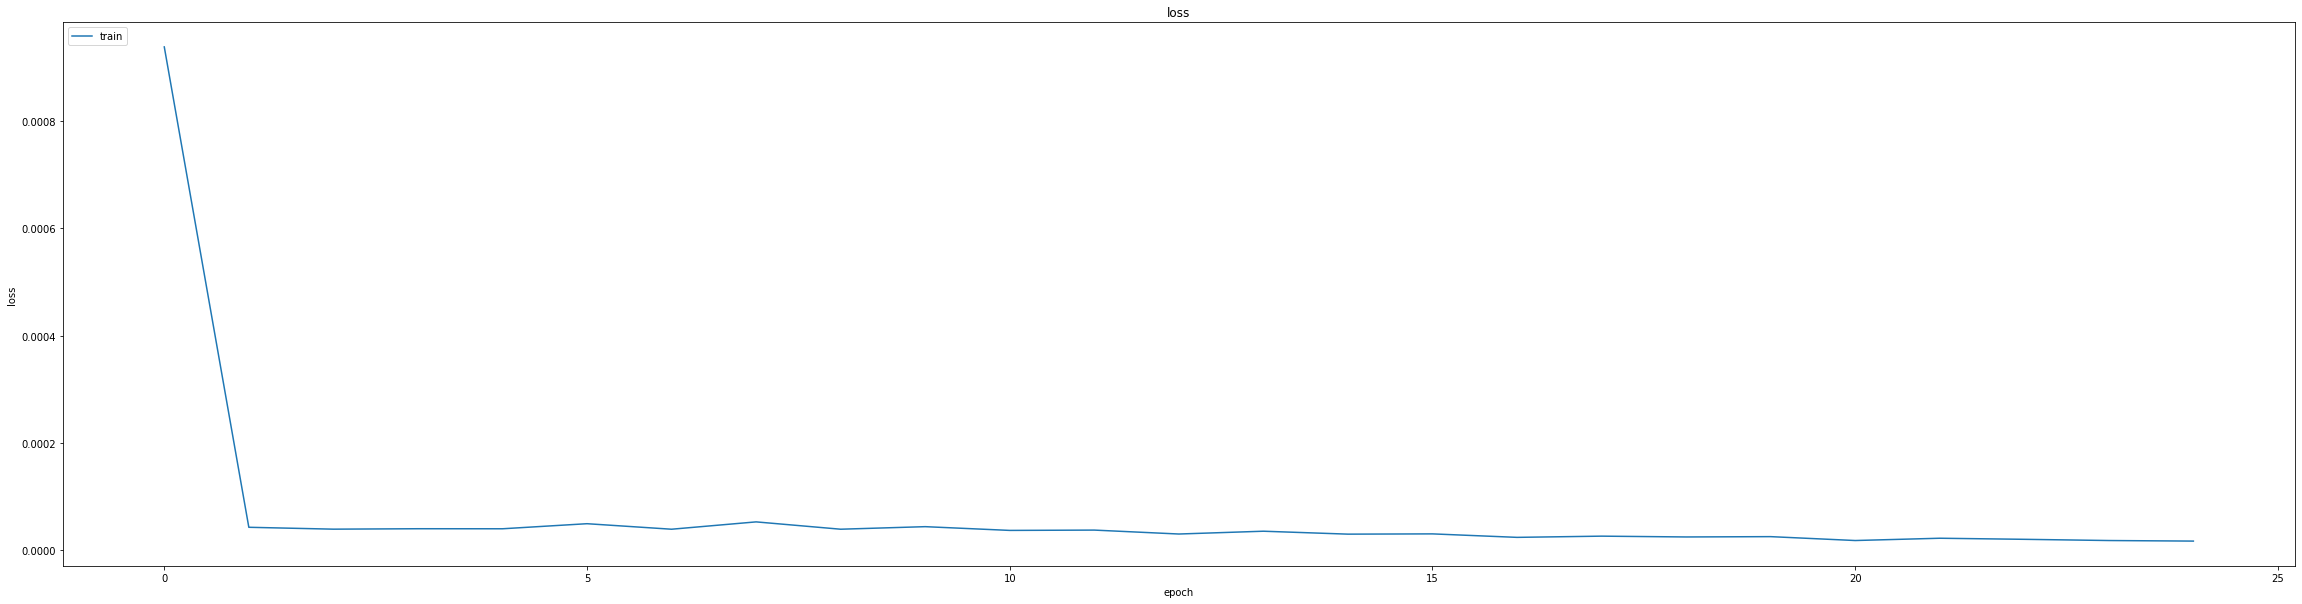

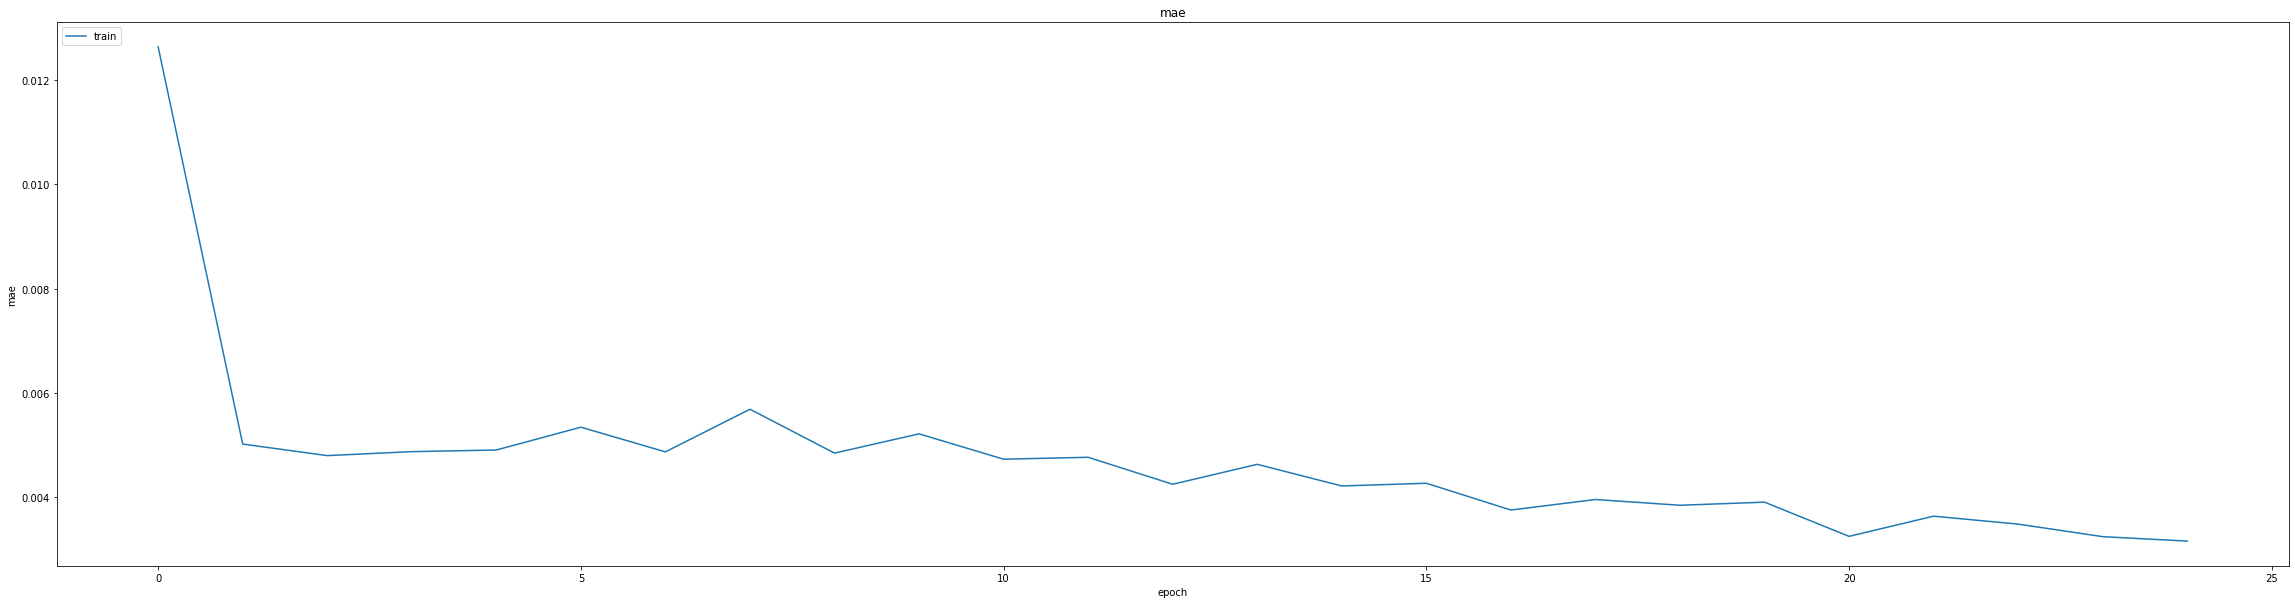

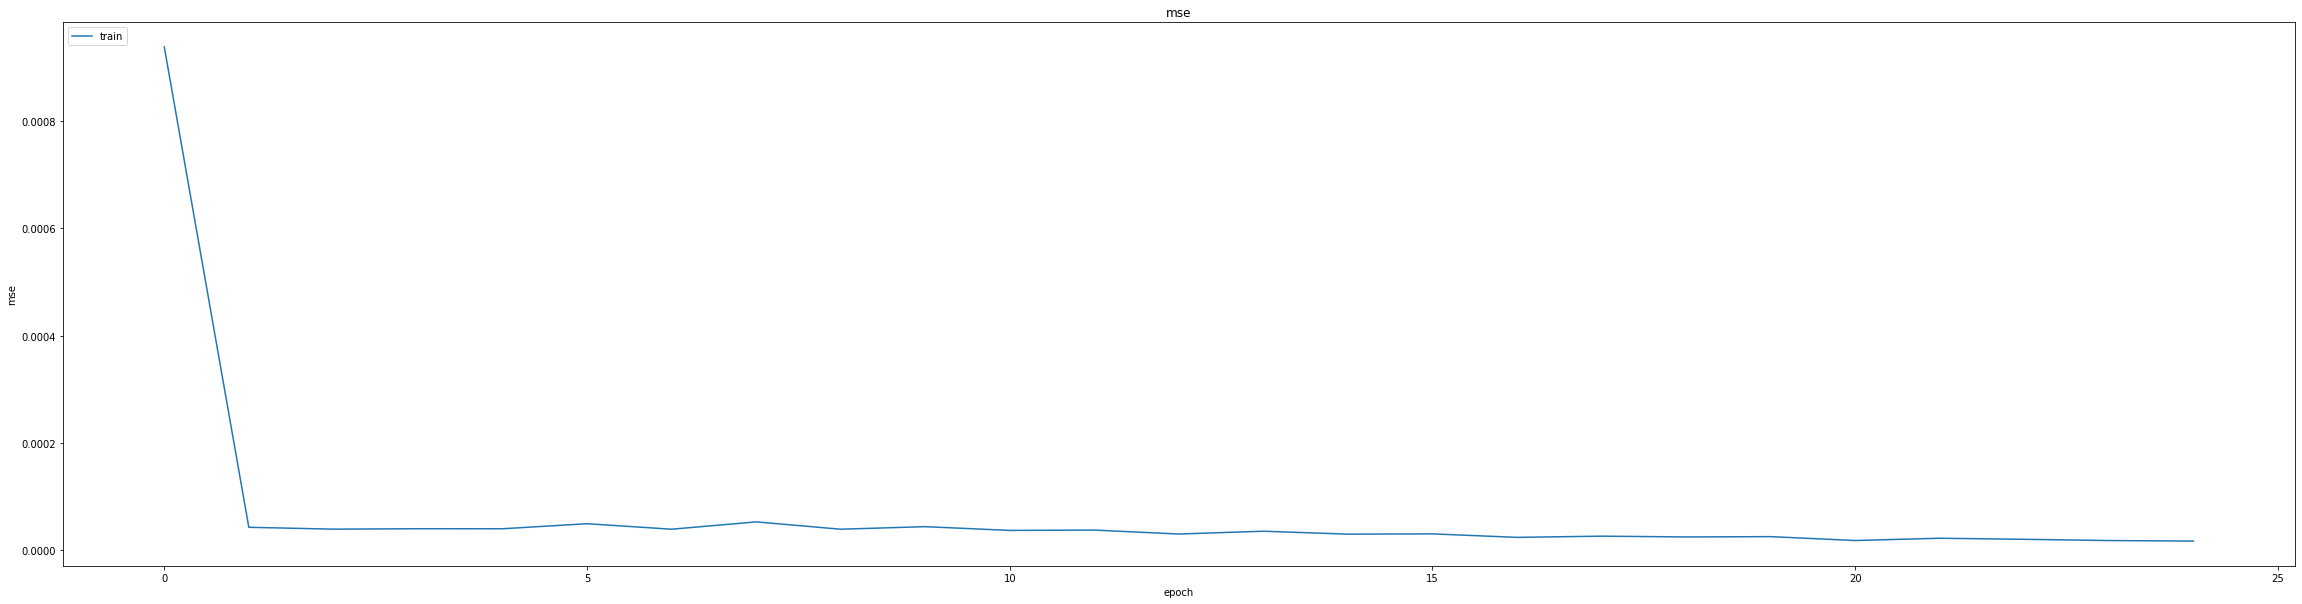

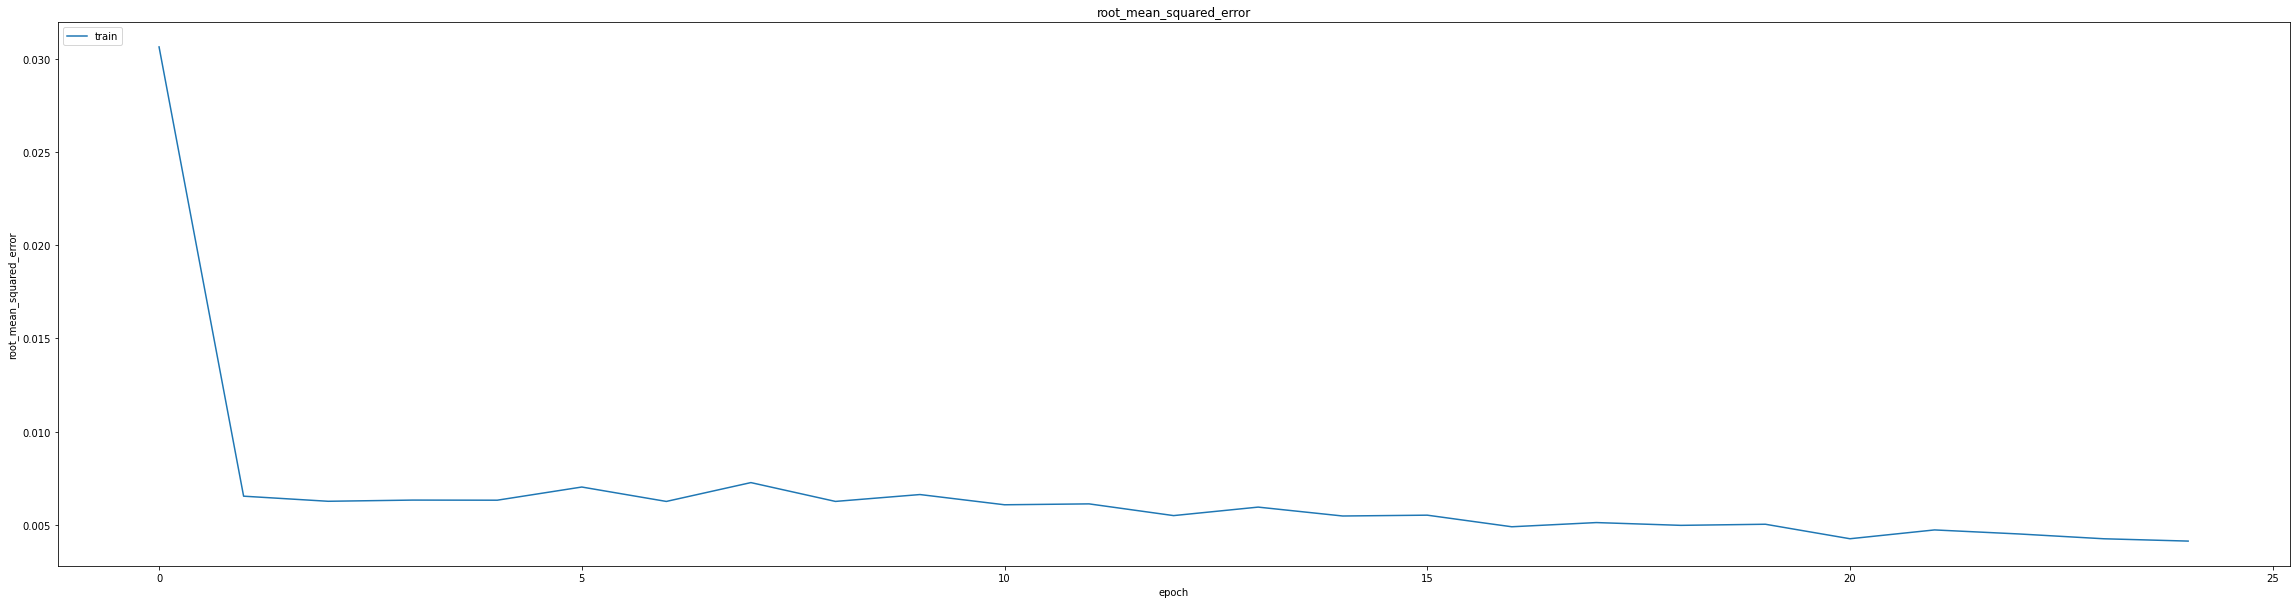

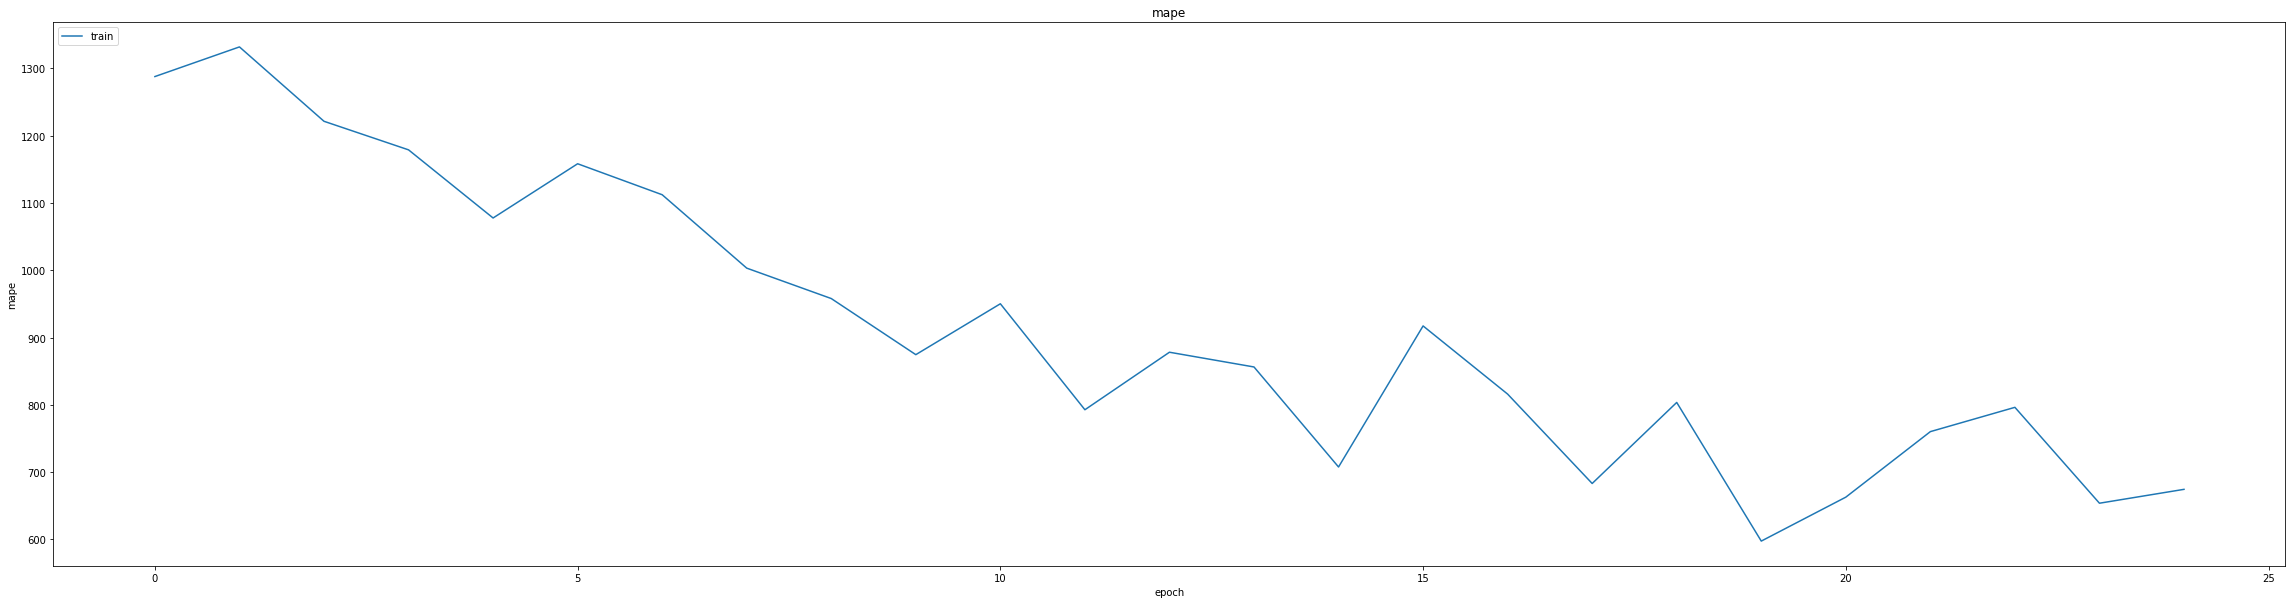

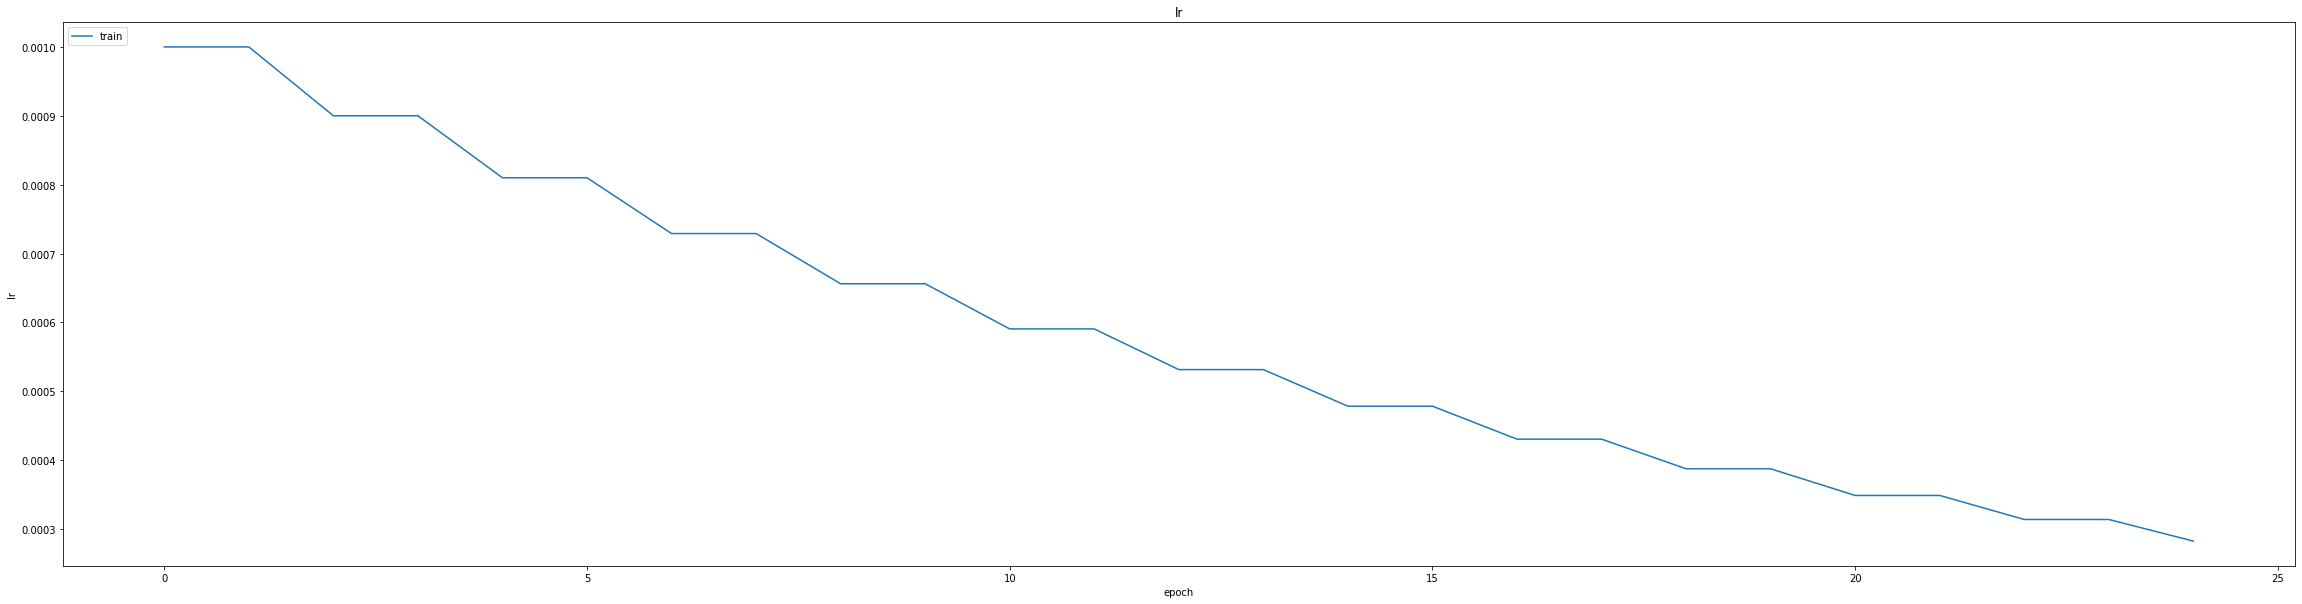

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00906599685549736
0.011957665905356407
348/348 [==============================] - 2s 4ms/step
0.9967082738315998


348/348 [==============================] - 1s 4ms/step


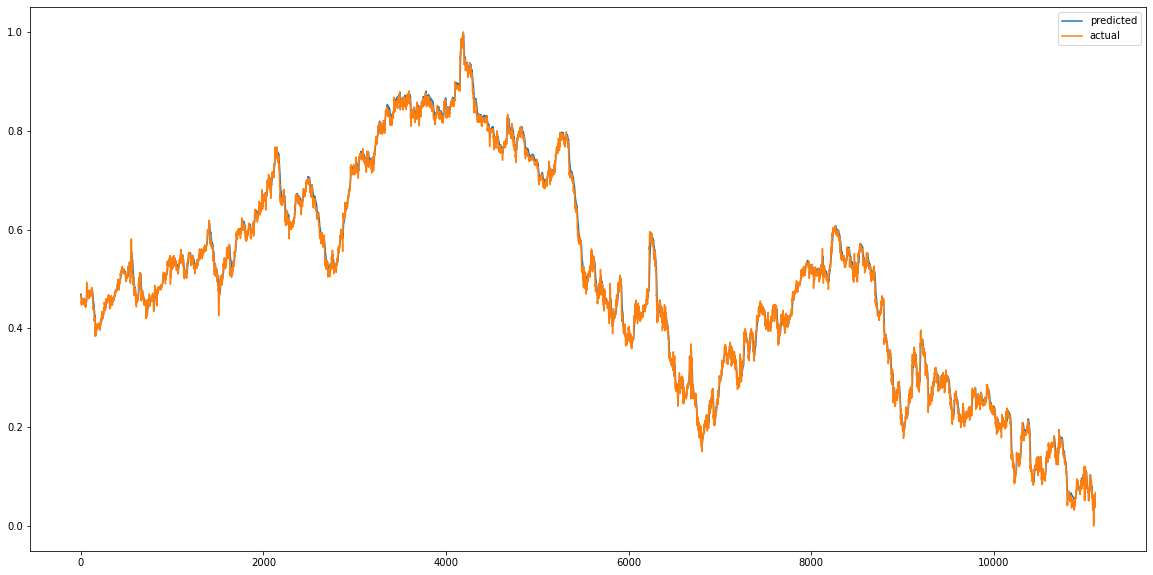

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


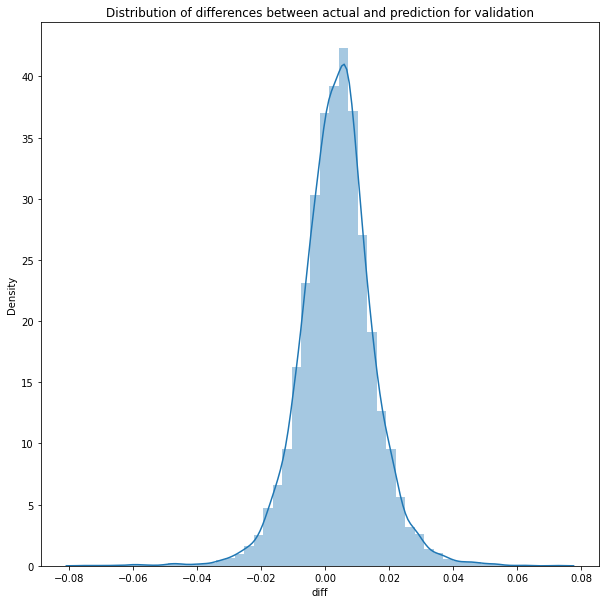

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 4ms/step


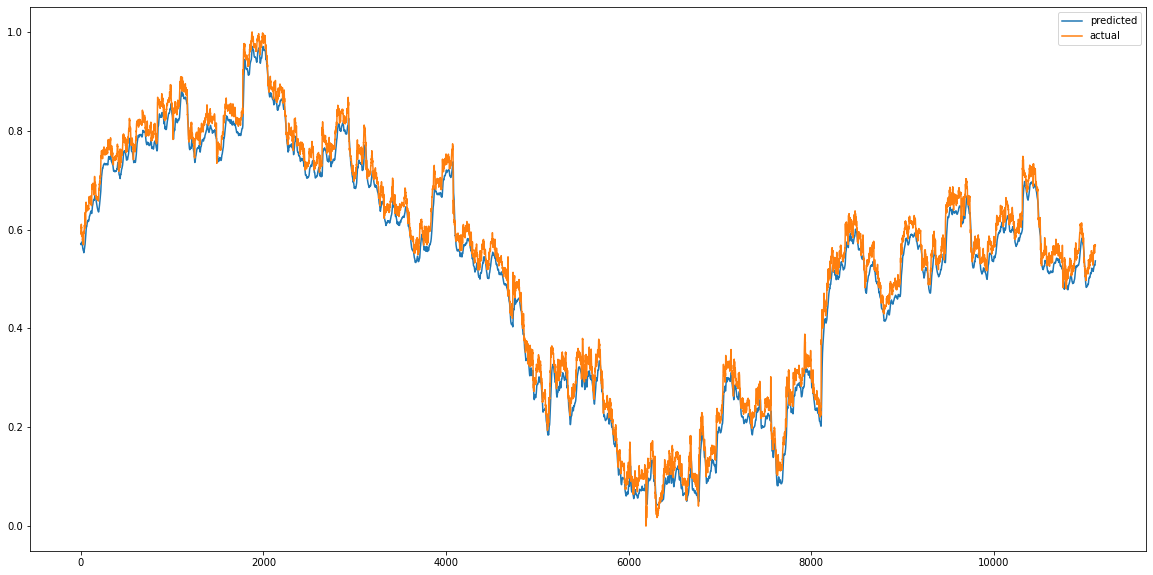

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


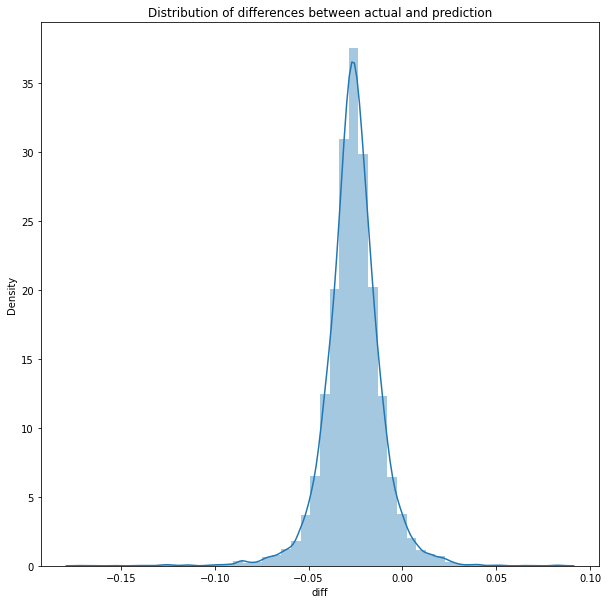

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.0009120007811831683
RMSE :  0.03019935067486002
MAE :  0.02699015927687455
348/348 [==============================] - 1s 4ms/step
R2_Score  : 0.9839301304909068


count    11115.000000
mean        -0.026228
std          0.014970
min         -0.172083
25%         -0.033636
50%         -0.026200
75%         -0.018439
max          0.084201
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional_2 (Bidirectio  (None, 24, 256)          197632    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 256)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 16)               

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
406/406 [==============================] - ETA: 0s - loss: 178.0319 - mae: 1.8036 - mse: 178.0319 - root_mean_squared_error: 13.3429 - mape: 2458.8301
Epoch 1: val_mse improved from inf to 0.02113, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 44s 83ms/step - loss: 178.0319 - mae: 1.8036 - mse: 178.0319 - root_mean_squared_error: 13.3429 - mape: 2458.8301 - val_loss: 0.0211 - val_mae: 0.1204 - val_mse: 0.0211 - val_root_mean_squared_error: 0.1454 - val_mape: 30878.5723
Epoch 2/75
406/406 [==============================] - ETA: 0s - loss: 0.0046 - mae: 0.0520 - mse: 0.0046 - root_mean_squared_error: 0.0679 - mape: 3557.7302
Epoch 2: val_mse improved from 0.02113 to 0.00149, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 68ms/step - loss: 0.0046 - mae: 0.0520 - mse: 0.0046 - root_mean_squared_error: 0.0679 - mape: 3557.7302 - val_loss: 0.0015 - val_mae: 0.0311 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0386 - val_mape: 16003.7998
Epoch 3/75
403/406 [============================>.] - ETA: 0s - loss: 0.0028 - mae: 0.0412 - mse: 0.0028 - root_mean_squared_error: 0.0533 - mape: 3307.9553
Epoch 3: val_mse improved from 0.00149 to 0.00120, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 70ms/step - loss: 0.0028 - mae: 0.0412 - mse: 0.0028 - root_mean_squared_error: 0.0533 - mape: 3284.4431 - val_loss: 0.0012 - val_mae: 0.0274 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0347 - val_mape: 15218.5684
Epoch 4/75
405/406 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0383 - mse: 0.0024 - root_mean_squared_error: 0.0493 - mape: 3959.6462
Epoch 4: val_mse improved from 0.00120 to 0.00113, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 72ms/step - loss: 0.0024 - mae: 0.0383 - mse: 0.0024 - root_mean_squared_error: 0.0493 - mape: 3950.9714 - val_loss: 0.0011 - val_mae: 0.0267 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0337 - val_mape: 14840.0107
Epoch 5/75
404/406 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0356 - mse: 0.0021 - root_mean_squared_error: 0.0459 - mape: 3159.1621
Epoch 5: val_mse did not improve from 0.00113
406/406 [==============================] - 7s 18ms/step - loss: 0.0021 - mae: 0.0356 - mse: 0.0021 - root_mean_squared_error: 0.0459 - mape: 3144.4797 - val_loss: 0.0013 - val_mae: 0.0296 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0359 - val_mape: 14682.8857
Epoch 6/75
403/406 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0340 - mse: 0.0019 - root_mean_squared_error: 0.0439 - mape: 3187.7786
Epoch 6: val_mse improved from 0.00113 to 0.00107, saving model to /content/drive/MyDrive/modelweights/AU

406/406 [==============================] - 28s 70ms/step - loss: 0.0019 - mae: 0.0340 - mse: 0.0019 - root_mean_squared_error: 0.0438 - mape: 3165.1128 - val_loss: 0.0011 - val_mae: 0.0256 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0327 - val_mape: 14725.4902
Epoch 7/75
403/406 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0325 - mse: 0.0018 - root_mean_squared_error: 0.0419 - mape: 2991.1077
Epoch 7: val_mse improved from 0.00107 to 0.00105, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 70ms/step - loss: 0.0018 - mae: 0.0325 - mse: 0.0018 - root_mean_squared_error: 0.0419 - mape: 2969.8447 - val_loss: 0.0011 - val_mae: 0.0254 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0325 - val_mape: 14662.6729
Epoch 8/75
405/406 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0311 - mse: 0.0016 - root_mean_squared_error: 0.0400 - mape: 3212.6157
Epoch 8: val_mse did not improve from 0.00105
406/406 [==============================] - 6s 16ms/step - loss: 0.0016 - mae: 0.0311 - mse: 0.0016 - root_mean_squared_error: 0.0400 - mape: 3205.5781 - val_loss: 0.0013 - val_mae: 0.0291 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0354 - val_mape: 14603.9600
Epoch 9/75
403/406 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0296 - mse: 0.0014 - root_mean_squared_error: 0.0381 - mape: 2961.7290
Epoch 9: val_mse improved from 0.00105 to 0.00093, saving model to /content/drive/MyDrive/modelweights/AU

406/406 [==============================] - 28s 70ms/step - loss: 0.0014 - mae: 0.0296 - mse: 0.0014 - root_mean_squared_error: 0.0381 - mape: 2940.6689 - val_loss: 9.2550e-04 - val_mae: 0.0232 - val_mse: 9.2550e-04 - val_root_mean_squared_error: 0.0304 - val_mape: 14444.5186
Epoch 10/75
403/406 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0283 - mse: 0.0013 - root_mean_squared_error: 0.0364 - mape: 3093.4873
Epoch 10: val_mse improved from 0.00093 to 0.00076, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 69ms/step - loss: 0.0013 - mae: 0.0283 - mse: 0.0013 - root_mean_squared_error: 0.0364 - mape: 3071.5044 - val_loss: 7.6283e-04 - val_mae: 0.0204 - val_mse: 7.6283e-04 - val_root_mean_squared_error: 0.0276 - val_mape: 13950.8701
Epoch 11/75
405/406 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0269 - mse: 0.0012 - root_mean_squared_error: 0.0346 - mape: 2662.1423
Epoch 11: val_mse improved from 0.00076 to 0.00069, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 72ms/step - loss: 0.0012 - mae: 0.0269 - mse: 0.0012 - root_mean_squared_error: 0.0346 - mape: 2656.3118 - val_loss: 6.9436e-04 - val_mae: 0.0199 - val_mse: 6.9436e-04 - val_root_mean_squared_error: 0.0264 - val_mape: 13201.3662
Epoch 12/75
404/406 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0255 - mse: 0.0011 - root_mean_squared_error: 0.0328 - mape: 2808.7881
Epoch 12: val_mse improved from 0.00069 to 0.00062, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 70ms/step - loss: 0.0011 - mae: 0.0255 - mse: 0.0011 - root_mean_squared_error: 0.0328 - mape: 2795.7222 - val_loss: 6.2410e-04 - val_mae: 0.0186 - val_mse: 6.2410e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 12559.9180
Epoch 13/75
403/406 [============================>.] - ETA: 0s - loss: 9.6702e-04 - mae: 0.0243 - mse: 9.6702e-04 - root_mean_squared_error: 0.0311 - mape: 2723.3704
Epoch 13: val_mse did not improve from 0.00062
406/406 [==============================] - 7s 17ms/step - loss: 9.6590e-04 - mae: 0.0243 - mse: 9.6590e-04 - root_mean_squared_error: 0.0311 - mape: 2703.9985 - val_loss: 0.0011 - val_mae: 0.0262 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0325 - val_mape: 11921.0449
Epoch 14/75
406/406 [==============================] - ETA: 0s - loss: 8.5150e-04 - mae: 0.0227 - mse: 8.5150e-04 - root_mean_squared_error: 0.0292 - mape: 2502.9824
Epoch 14: val_mse did not improve from 0.00062
406/406 [==============

406/406 [==============================] - 28s 69ms/step - loss: 8.3955e-05 - mae: 0.0072 - mse: 8.3955e-05 - root_mean_squared_error: 0.0092 - mape: 1482.6736 - val_loss: 5.6583e-04 - val_mae: 0.0160 - val_mse: 5.6583e-04 - val_root_mean_squared_error: 0.0238 - val_mape: 6378.4844
Epoch 40/75
405/406 [============================>.] - ETA: 0s - loss: 7.3862e-05 - mae: 0.0067 - mse: 7.3862e-05 - root_mean_squared_error: 0.0086 - mape: 1531.3717
Epoch 40: val_mse improved from 0.00057 to 0.00051, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 71ms/step - loss: 7.3902e-05 - mae: 0.0067 - mse: 7.3902e-05 - root_mean_squared_error: 0.0086 - mape: 1528.0271 - val_loss: 5.0803e-04 - val_mae: 0.0165 - val_mse: 5.0803e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 6392.6006
Epoch 41/75
403/406 [============================>.] - ETA: 0s - loss: 8.0834e-05 - mae: 0.0070 - mse: 8.0834e-05 - root_mean_squared_error: 0.0090 - mape: 1662.5505
Epoch 41: val_mse improved from 0.00051 to 0.00046, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 69ms/step - loss: 8.0640e-05 - mae: 0.0070 - mse: 8.0640e-05 - root_mean_squared_error: 0.0090 - mape: 1650.7178 - val_loss: 4.6423e-04 - val_mae: 0.0152 - val_mse: 4.6423e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 6206.2319
Epoch 42/75
404/406 [============================>.] - ETA: 0s - loss: 8.9235e-05 - mae: 0.0074 - mse: 8.9235e-05 - root_mean_squared_error: 0.0094 - mape: 1367.0201
Epoch 42: val_mse improved from 0.00046 to 0.00046, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 69ms/step - loss: 8.9227e-05 - mae: 0.0074 - mse: 8.9227e-05 - root_mean_squared_error: 0.0094 - mape: 1360.6583 - val_loss: 4.6100e-04 - val_mae: 0.0167 - val_mse: 4.6100e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 6315.7842
Epoch 43/75
405/406 [============================>.] - ETA: 0s - loss: 1.0976e-04 - mae: 0.0082 - mse: 1.0976e-04 - root_mean_squared_error: 0.0105 - mape: 1360.0425
Epoch 43: val_mse improved from 0.00046 to 0.00034, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 69ms/step - loss: 1.0959e-04 - mae: 0.0082 - mse: 1.0959e-04 - root_mean_squared_error: 0.0105 - mape: 1357.0601 - val_loss: 3.3836e-04 - val_mae: 0.0131 - val_mse: 3.3836e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 6252.1582
Epoch 44/75
403/406 [============================>.] - ETA: 0s - loss: 9.7331e-05 - mae: 0.0076 - mse: 9.7331e-05 - root_mean_squared_error: 0.0099 - mape: 1803.3293
Epoch 44: val_mse did not improve from 0.00034
406/406 [==============================] - 6s 16ms/step - loss: 9.7410e-05 - mae: 0.0076 - mse: 9.7410e-05 - root_mean_squared_error: 0.0099 - mape: 1790.4967 - val_loss: 4.0228e-04 - val_mae: 0.0143 - val_mse: 4.0228e-04 - val_root_mean_squared_error: 0.0201 - val_mape: 6003.0708
Epoch 45/75
406/406 [==============================] - ETA: 0s - loss: 1.0238e-04 - mae: 0.0079 - mse: 1.0238e-04 - root_mean_squared_error: 0.0101 - mape: 1721.3347
Epoch 45: val_mse improved from 0.00034 to 0.00030, savi

406/406 [==============================] - 29s 71ms/step - loss: 1.0238e-04 - mae: 0.0079 - mse: 1.0238e-04 - root_mean_squared_error: 0.0101 - mape: 1721.3347 - val_loss: 2.9797e-04 - val_mae: 0.0127 - val_mse: 2.9797e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 6151.2363
Epoch 46/75
404/406 [============================>.] - ETA: 0s - loss: 1.1675e-04 - mae: 0.0085 - mse: 1.1675e-04 - root_mean_squared_error: 0.0108 - mape: 1426.5083
Epoch 46: val_mse did not improve from 0.00030
406/406 [==============================] - 6s 16ms/step - loss: 1.1649e-04 - mae: 0.0085 - mse: 1.1649e-04 - root_mean_squared_error: 0.0108 - mape: 1419.8691 - val_loss: 3.3331e-04 - val_mae: 0.0137 - val_mse: 3.3331e-04 - val_root_mean_squared_error: 0.0183 - val_mape: 6277.5903
Epoch 47/75
406/406 [==============================] - ETA: 0s - loss: 1.2622e-04 - mae: 0.0089 - mse: 1.2622e-04 - root_mean_squared_error: 0.0112 - mape: 1536.9808
Epoch 47: val_mse did not improve from 0.00030
406/406 [

406/406 [==============================] - 28s 70ms/step - loss: 9.3000e-05 - mae: 0.0074 - mse: 9.3000e-05 - root_mean_squared_error: 0.0096 - mape: 1354.2437 - val_loss: 2.7363e-04 - val_mae: 0.0123 - val_mse: 2.7363e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 6238.0801
Epoch 49/75
403/406 [============================>.] - ETA: 0s - loss: 1.3880e-04 - mae: 0.0090 - mse: 1.3880e-04 - root_mean_squared_error: 0.0118 - mape: 1300.9552
Epoch 49: val_mse improved from 0.00027 to 0.00026, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 69ms/step - loss: 1.3808e-04 - mae: 0.0090 - mse: 1.3808e-04 - root_mean_squared_error: 0.0118 - mape: 1291.6964 - val_loss: 2.5935e-04 - val_mae: 0.0114 - val_mse: 2.5935e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 6135.6582
Epoch 50/75
404/406 [============================>.] - ETA: 0s - loss: 1.2520e-04 - mae: 0.0084 - mse: 1.2520e-04 - root_mean_squared_error: 0.0112 - mape: 1390.2117
Epoch 50: val_mse did not improve from 0.00026
406/406 [==============================] - 6s 15ms/step - loss: 1.2518e-04 - mae: 0.0084 - mse: 1.2518e-04 - root_mean_squared_error: 0.0112 - mape: 1383.7432 - val_loss: 4.3332e-04 - val_mae: 0.0169 - val_mse: 4.3332e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 5823.3979
Epoch 51/75
404/406 [============================>.] - ETA: 0s - loss: 1.0617e-04 - mae: 0.0082 - mse: 1.0617e-04 - root_mean_squared_error: 0.0103 - mape: 1316.3398
Epoch 51: val_mse did not improve from 0.00026
406/406 [

406/406 [==============================] - 29s 72ms/step - loss: 9.8121e-05 - mae: 0.0076 - mse: 9.8121e-05 - root_mean_squared_error: 0.0099 - mape: 1121.7322 - val_loss: 2.4073e-04 - val_mae: 0.0114 - val_mse: 2.4073e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 5056.0718
Epoch 59/75
403/406 [============================>.] - ETA: 0s - loss: 1.1188e-04 - mae: 0.0080 - mse: 1.1188e-04 - root_mean_squared_error: 0.0106 - mape: 1276.5363
Epoch 59: val_mse did not improve from 0.00024
406/406 [==============================] - 7s 16ms/step - loss: 1.1125e-04 - mae: 0.0080 - mse: 1.1125e-04 - root_mean_squared_error: 0.0105 - mape: 1267.4500 - val_loss: 2.7981e-04 - val_mae: 0.0117 - val_mse: 2.7981e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 4836.9800
Epoch 60/75
403/406 [============================>.] - ETA: 0s - loss: 7.6396e-05 - mae: 0.0069 - mse: 7.6396e-05 - root_mean_squared_error: 0.0087 - mape: 1098.7218
Epoch 60: val_mse did not improve from 0.00024
406/406 [

406/406 [==============================] - 28s 69ms/step - loss: 7.3541e-05 - mae: 0.0064 - mse: 7.3541e-05 - root_mean_squared_error: 0.0086 - mape: 812.3526 - val_loss: 2.1750e-04 - val_mae: 0.0115 - val_mse: 2.1750e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 4618.1436
Epoch 65/75
404/406 [============================>.] - ETA: 0s - loss: 7.4668e-05 - mae: 0.0067 - mse: 7.4668e-05 - root_mean_squared_error: 0.0086 - mape: 908.0582
Epoch 65: val_mse improved from 0.00022 to 0.00019, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 70ms/step - loss: 7.4504e-05 - mae: 0.0067 - mse: 7.4504e-05 - root_mean_squared_error: 0.0086 - mape: 903.8325 - val_loss: 1.8769e-04 - val_mae: 0.0111 - val_mse: 1.8769e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 5103.9268
Epoch 66/75
406/406 [==============================] - ETA: 0s - loss: 7.4908e-05 - mae: 0.0068 - mse: 7.4908e-05 - root_mean_squared_error: 0.0087 - mape: 944.8395
Epoch 66: val_mse improved from 0.00019 to 0.00016, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 71ms/step - loss: 7.4908e-05 - mae: 0.0068 - mse: 7.4908e-05 - root_mean_squared_error: 0.0087 - mape: 944.8395 - val_loss: 1.5814e-04 - val_mae: 0.0096 - val_mse: 1.5814e-04 - val_root_mean_squared_error: 0.0126 - val_mape: 4385.7861
Epoch 67/75
403/406 [============================>.] - ETA: 0s - loss: 7.8993e-05 - mae: 0.0067 - mse: 7.8993e-05 - root_mean_squared_error: 0.0089 - mape: 930.0928
Epoch 67: val_mse improved from 0.00016 to 0.00014, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 70ms/step - loss: 7.9033e-05 - mae: 0.0067 - mse: 7.9033e-05 - root_mean_squared_error: 0.0089 - mape: 923.4788 - val_loss: 1.4237e-04 - val_mae: 0.0095 - val_mse: 1.4237e-04 - val_root_mean_squared_error: 0.0119 - val_mape: 4836.7061
Epoch 68/75
406/406 [==============================] - ETA: 0s - loss: 6.3751e-05 - mae: 0.0063 - mse: 6.3751e-05 - root_mean_squared_error: 0.0080 - mape: 795.4632
Epoch 68: val_mse improved from 0.00014 to 0.00013, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 69ms/step - loss: 6.3751e-05 - mae: 0.0063 - mse: 6.3751e-05 - root_mean_squared_error: 0.0080 - mape: 795.4632 - val_loss: 1.3134e-04 - val_mae: 0.0087 - val_mse: 1.3134e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 4640.5225
Epoch 69/75
406/406 [==============================] - ETA: 0s - loss: 8.1783e-05 - mae: 0.0069 - mse: 8.1783e-05 - root_mean_squared_error: 0.0090 - mape: 724.8731
Epoch 69: val_mse did not improve from 0.00013
406/406 [==============================] - 6s 16ms/step - loss: 8.1783e-05 - mae: 0.0069 - mse: 8.1783e-05 - root_mean_squared_error: 0.0090 - mape: 724.8731 - val_loss: 1.4338e-04 - val_mae: 0.0088 - val_mse: 1.4338e-04 - val_root_mean_squared_error: 0.0120 - val_mape: 4241.1406
Epoch 70/75
403/406 [============================>.] - ETA: 0s - loss: 7.5258e-05 - mae: 0.0068 - mse: 7.5258e-05 - root_mean_squared_error: 0.0087 - mape: 808.4245
Epoch 70: val_mse did not improve from 0.00013
406/406 [====

406/406 [==============================] - 28s 70ms/step - loss: 6.1478e-05 - mae: 0.0059 - mse: 6.1478e-05 - root_mean_squared_error: 0.0078 - mape: 683.4707 - val_loss: 1.1970e-04 - val_mae: 0.0082 - val_mse: 1.1970e-04 - val_root_mean_squared_error: 0.0109 - val_mape: 3704.8081
Epoch 72/75
403/406 [============================>.] - ETA: 0s - loss: 6.4339e-05 - mae: 0.0062 - mse: 6.4339e-05 - root_mean_squared_error: 0.0080 - mape: 900.0762
Epoch 72: val_mse did not improve from 0.00012
406/406 [==============================] - 7s 16ms/step - loss: 6.4207e-05 - mae: 0.0062 - mse: 6.4207e-05 - root_mean_squared_error: 0.0080 - mape: 893.6730 - val_loss: 2.3173e-04 - val_mae: 0.0130 - val_mse: 2.3173e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 3485.3293
Epoch 73/75
406/406 [==============================] - ETA: 0s - loss: 6.4582e-05 - mae: 0.0062 - mse: 6.4582e-05 - root_mean_squared_error: 0.0080 - mape: 563.4237
Epoch 73: val_mse improved from 0.00012 to 0.00010, saving m

406/406 [==============================] - 30s 74ms/step - loss: 6.4582e-05 - mae: 0.0062 - mse: 6.4582e-05 - root_mean_squared_error: 0.0080 - mape: 563.4237 - val_loss: 1.0344e-04 - val_mae: 0.0076 - val_mse: 1.0344e-04 - val_root_mean_squared_error: 0.0102 - val_mape: 4050.7124
Epoch 74/75
404/406 [============================>.] - ETA: 0s - loss: 7.0646e-05 - mae: 0.0066 - mse: 7.0646e-05 - root_mean_squared_error: 0.0084 - mape: 637.2670
Epoch 74: val_mse did not improve from 0.00010
406/406 [==============================] - 6s 15ms/step - loss: 7.0445e-05 - mae: 0.0066 - mse: 7.0445e-05 - root_mean_squared_error: 0.0084 - mape: 634.3026 - val_loss: 1.3727e-04 - val_mae: 0.0096 - val_mse: 1.3727e-04 - val_root_mean_squared_error: 0.0117 - val_mape: 3605.1550
Epoch 75/75
403/406 [============================>.] - ETA: 0s - loss: 5.2228e-05 - mae: 0.0057 - mse: 5.2228e-05 - root_mean_squared_error: 0.0072 - mape: 542.2302
Epoch 75: val_mse did not improve from 0.00010
406/406 [====

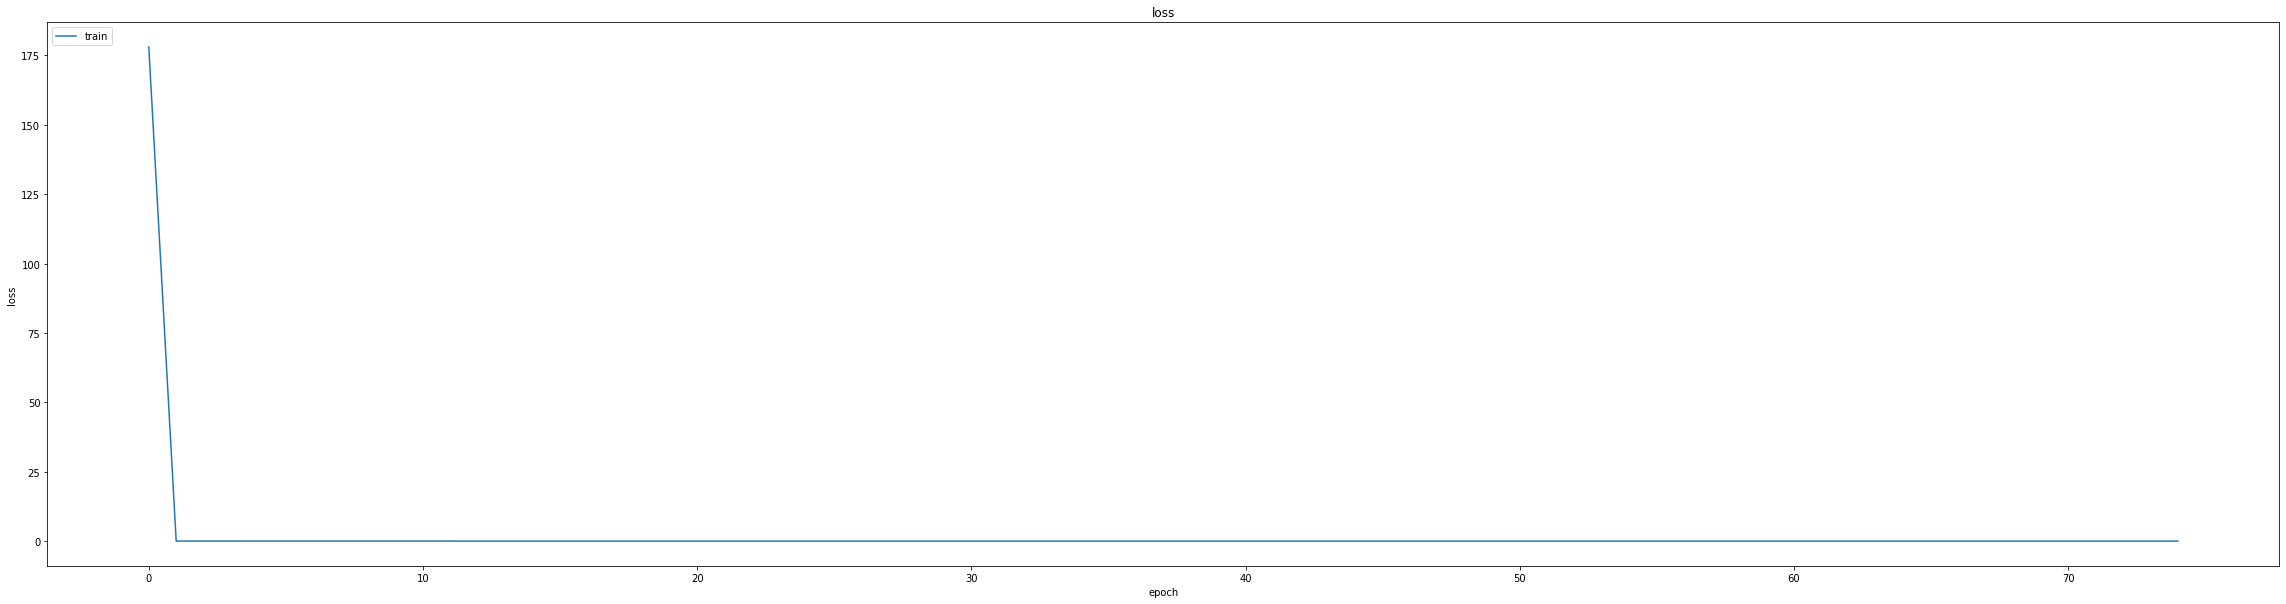

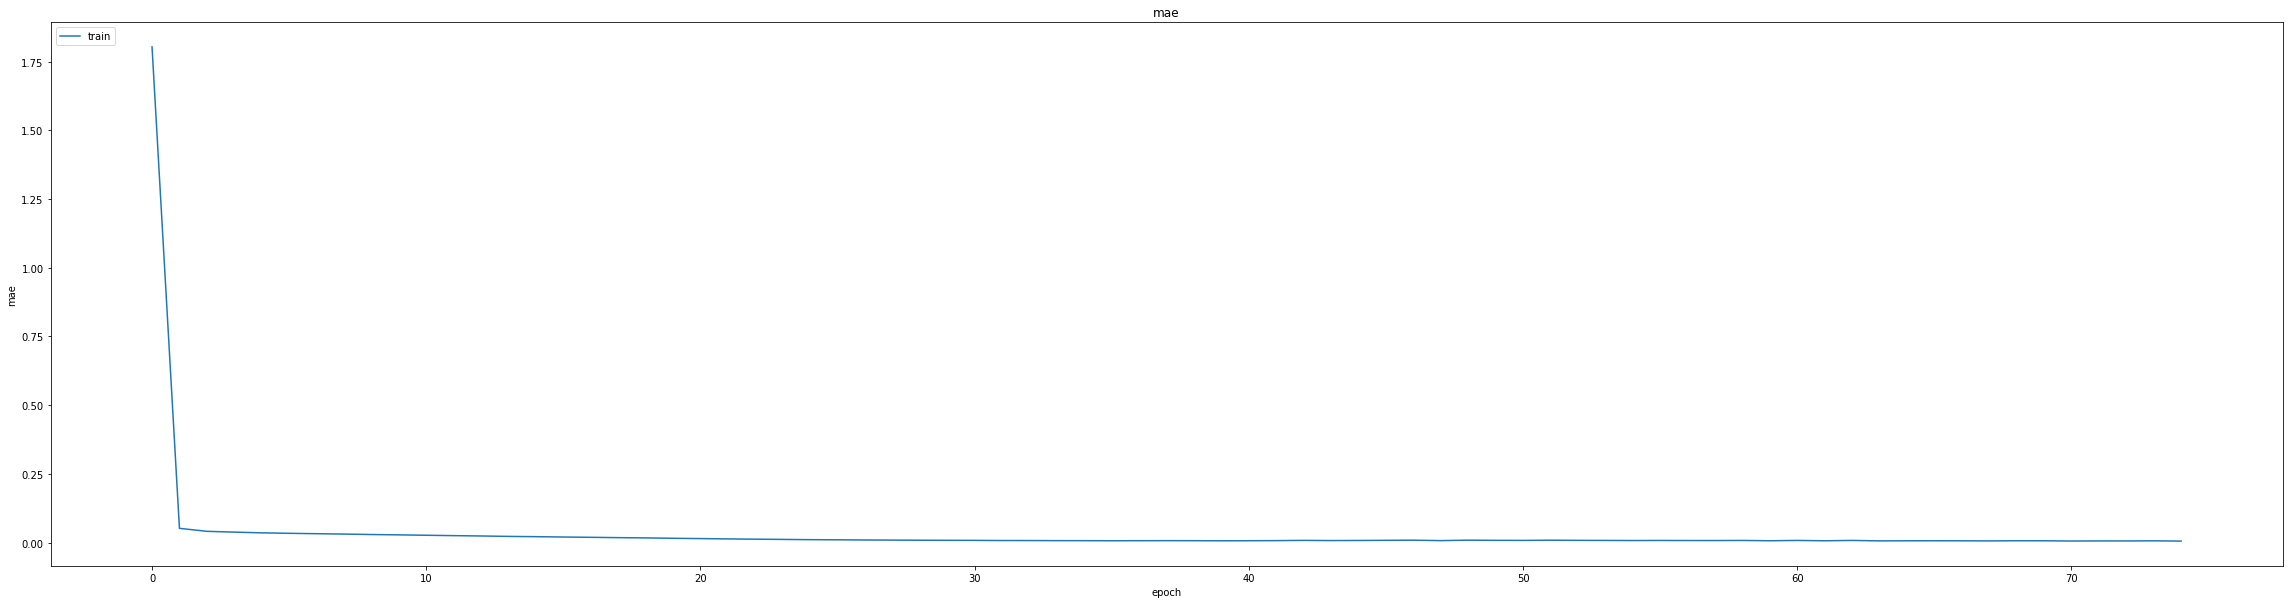

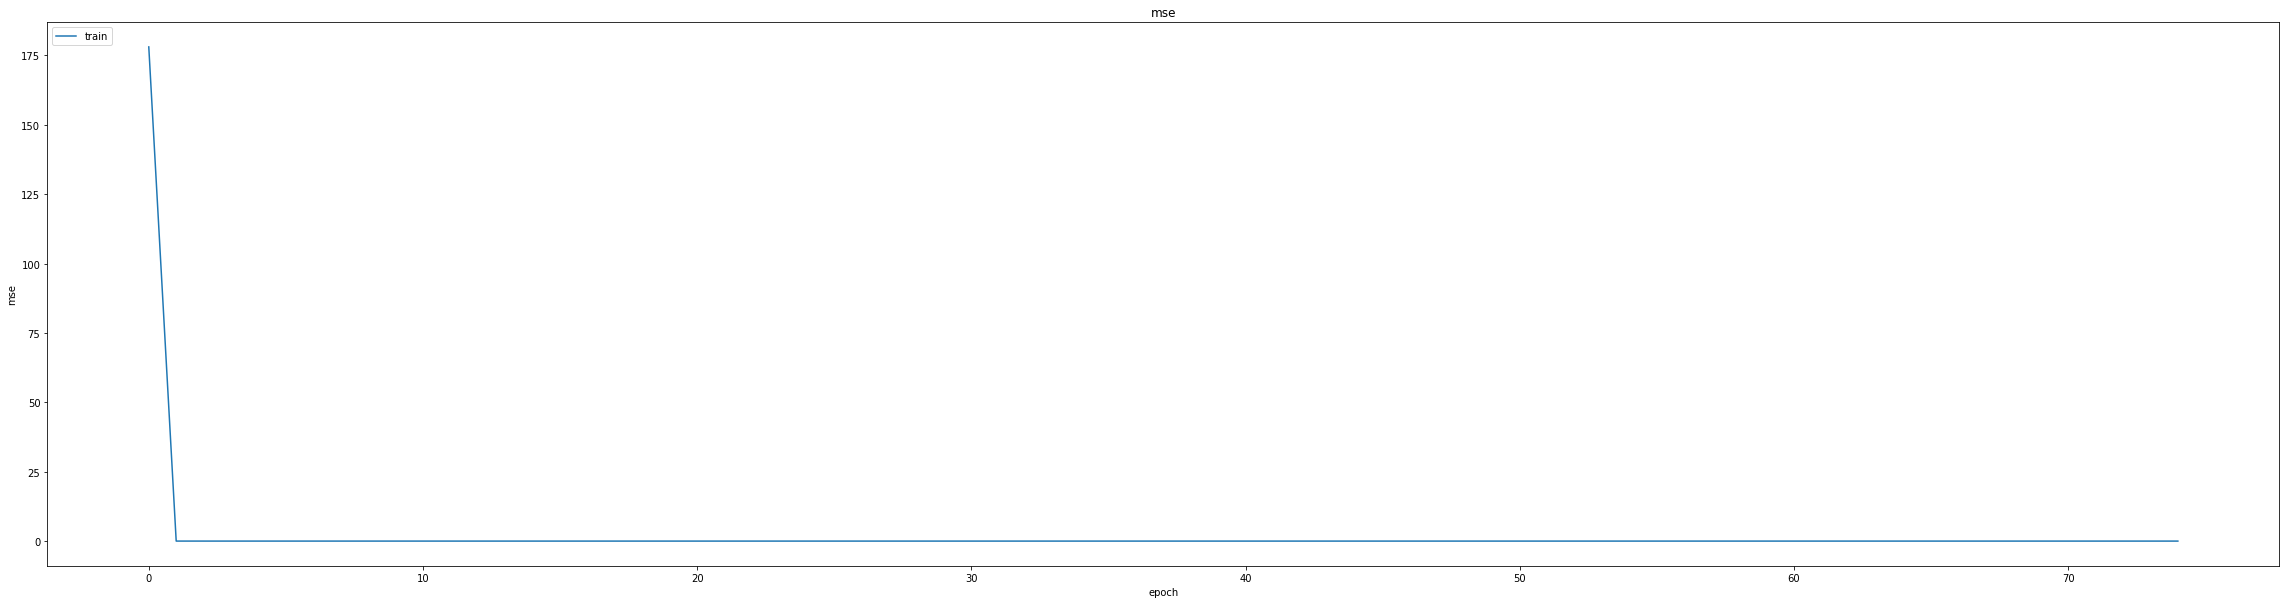

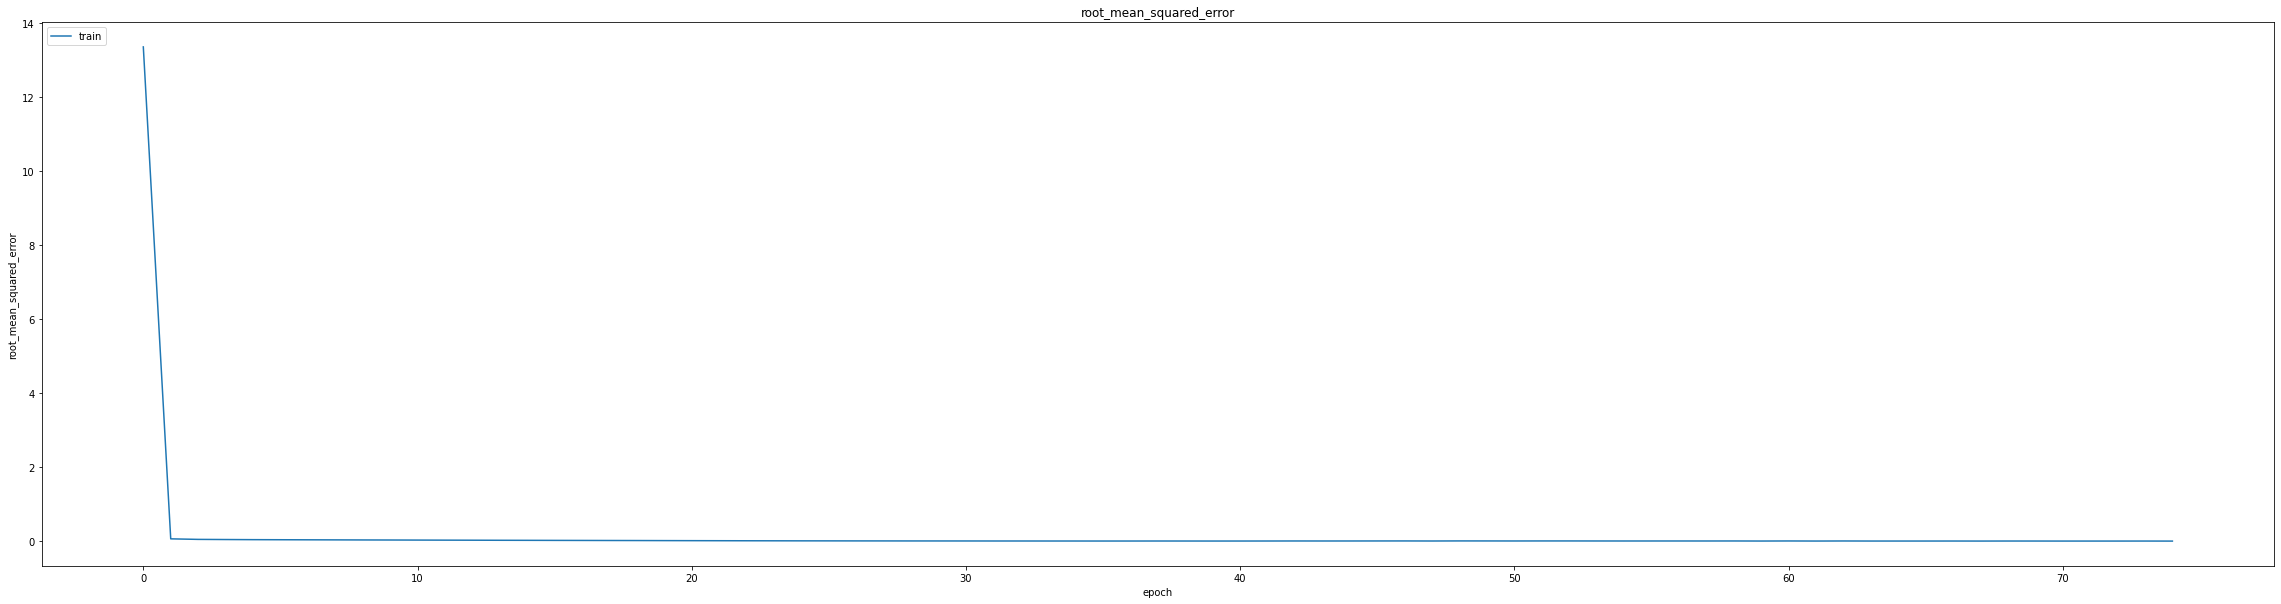

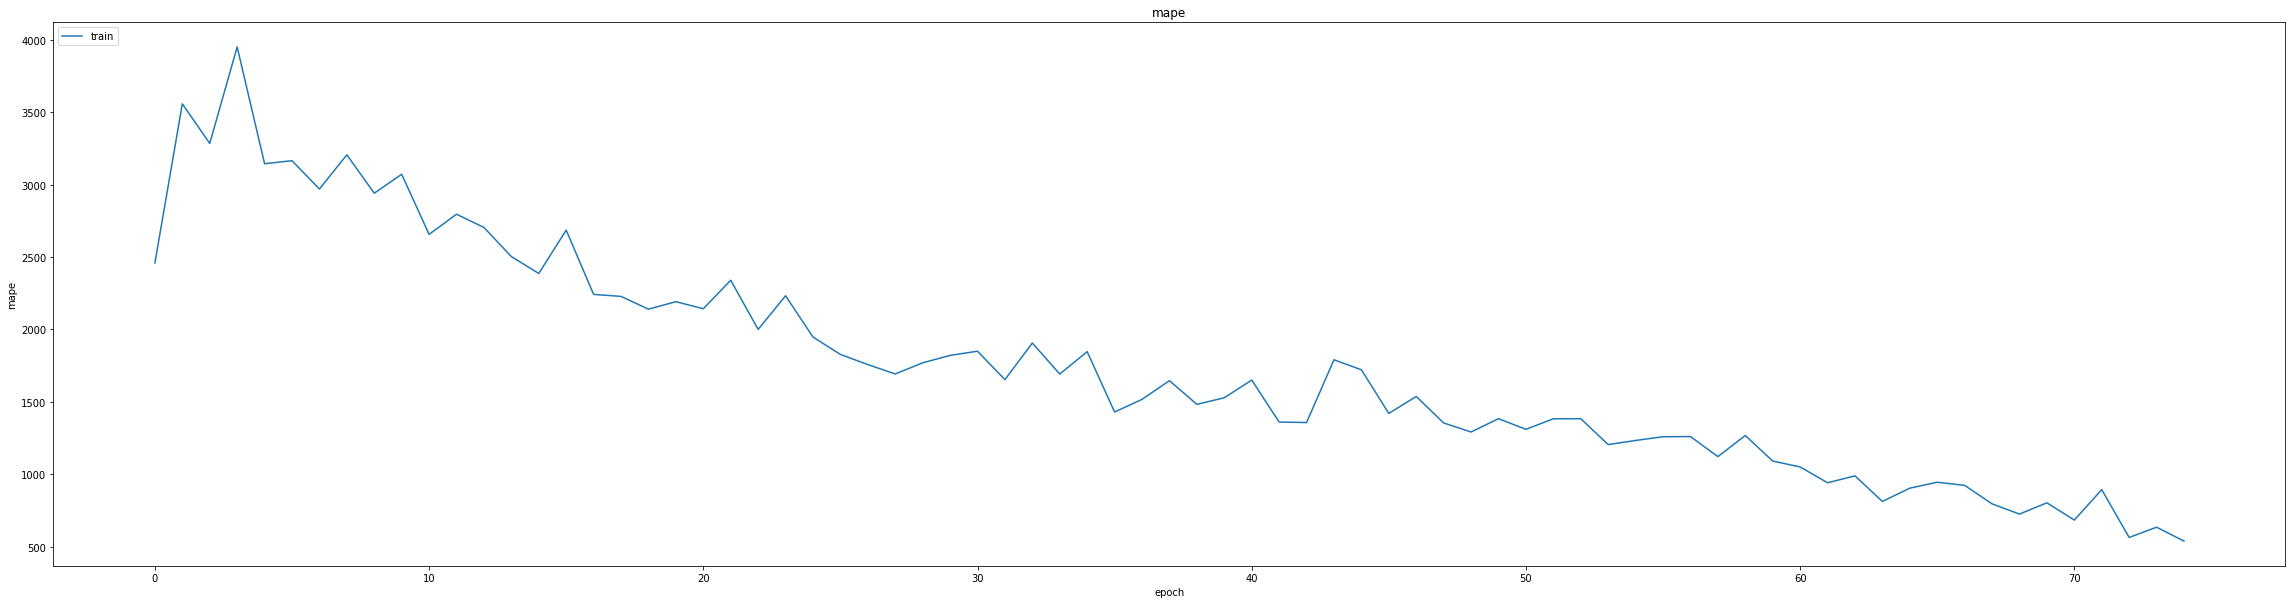

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00762441148981452
0.010170400142669678
348/348 [==============================] - 3s 5ms/step
0.9971572569012951


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
406/406 [==============================] - ETA: 0s - loss: 7.8622e-04 - mae: 0.0093 - mse: 7.8622e-04 - root_mean_squared_error: 0.0280 - mape: 719.3630
Epoch 1: val_mse did not improve from 0.00010
406/406 [==============================] - 12s 18ms/step - loss: 7.8622e-04 - mae: 0.0093 - mse: 7.8622e-04 - root_mean_squared_error: 0.0280 - mape: 719.3630 - val_loss: 1.4508e-04 - val_mae: 0.0094 - val_mse: 1.4508e-04 - val_root_mean_squared_error: 0.0120 - val_mape: 3263.2273 - lr: 0.0010
Epoch 2/25
405/406 [============================>.] - ETA: 0s - loss: 2.0214e-05 - mae: 0.0034 - mse: 2.0214e-05 - root_mean_squared_error: 0.0045 - mape: 819.5152
Epoch 2: val_mse did not improve from 0.00010
406/406 [==============================] - 6s 15ms/step - loss: 2.0202e-05 - mae: 0.0034 - mse: 2.0202e-05 - root_mean_squared_error: 0.0045 - mape: 817.7181 - val_loss: 1.1077e-04 - val_mae: 0.0081 - val_mse: 1.1077e-04 - val_root_mean_squared_error: 0.0105 - val_mape: 3469.2053 - lr

406/406 [==============================] - 29s 72ms/step - loss: 4.7907e-05 - mae: 0.0053 - mse: 4.7907e-05 - root_mean_squared_error: 0.0069 - mape: 458.2726 - val_loss: 1.0059e-04 - val_mae: 0.0078 - val_mse: 1.0059e-04 - val_root_mean_squared_error: 0.0100 - val_mape: 3201.4321 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/25
405/406 [============================>.] - ETA: 0s - loss: 2.2036e-05 - mae: 0.0037 - mse: 2.2036e-05 - root_mean_squared_error: 0.0047 - mape: 566.9736
Epoch 9: val_mse did not improve from 0.00010
406/406 [==============================] - 6s 16ms/step - loss: 2.2036e-05 - mae: 0.0037 - mse: 2.2036e-05 - root_mean_squared_error: 0.0047 - mape: 565.7308 - val_loss: 1.4554e-04 - val_mae: 0.0100 - val_mse: 1.4554e-04 - val_root_mean_squared_error: 0.0121 - val_mape: 2947.9465 - lr: 6.5610e-04
Epoch 10/25
405/406 [============================>.] - ETA: 0s - loss: 3.4033e-05 - mae: 0.0043 - mse: 3.4033e-05 - root_mean_squared_error: 0.0058 - mape: 6

406/406 [==============================] - 28s 70ms/step - loss: 3.4034e-05 - mae: 0.0043 - mse: 3.4034e-05 - root_mean_squared_error: 0.0058 - mape: 694.1431 - val_loss: 9.1750e-05 - val_mae: 0.0073 - val_mse: 9.1750e-05 - val_root_mean_squared_error: 0.0096 - val_mape: 2413.1724 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
405/406 [============================>.] - ETA: 0s - loss: 2.2204e-05 - mae: 0.0036 - mse: 2.2204e-05 - root_mean_squared_error: 0.0047 - mape: 526.2312
Epoch 11: val_mse did not improve from 0.00009
406/406 [==============================] - 6s 15ms/step - loss: 2.2180e-05 - mae: 0.0036 - mse: 2.2180e-05 - root_mean_squared_error: 0.0047 - mape: 525.0776 - val_loss: 9.7130e-05 - val_mae: 0.0076 - val_mse: 9.7130e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 2762.9739 - lr: 5.9049e-04
Epoch 12/25
406/406 [==============================] - ETA: 0s - loss: 2.6587e-05 - mae: 0.0040 - mse: 2.6587e-05 - root_mean_squared_error: 0.0052 - mape:

406/406 [==============================] - 28s 69ms/step - loss: 2.4430e-05 - mae: 0.0037 - mse: 2.4430e-05 - root_mean_squared_error: 0.0049 - mape: 296.7638 - val_loss: 8.3641e-05 - val_mae: 0.0069 - val_mse: 8.3641e-05 - val_root_mean_squared_error: 0.0091 - val_mape: 2364.0415 - lr: 5.3144e-04
Epoch 14/25
406/406 [==============================] - ETA: 0s - loss: 2.2376e-05 - mae: 0.0037 - mse: 2.2376e-05 - root_mean_squared_error: 0.0047 - mape: 413.3855
Epoch 14: val_mse did not improve from 0.00008
406/406 [==============================] - 6s 16ms/step - loss: 2.2376e-05 - mae: 0.0037 - mse: 2.2376e-05 - root_mean_squared_error: 0.0047 - mape: 413.3855 - val_loss: 1.2209e-04 - val_mae: 0.0090 - val_mse: 1.2209e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 2378.2051 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
404/406 [============================>.] - ETA: 0s - loss: 1.7275e-05 - mae: 0.0032 - mse: 1.7275e-05 - root_mean_squared_error: 0.0042 - mape

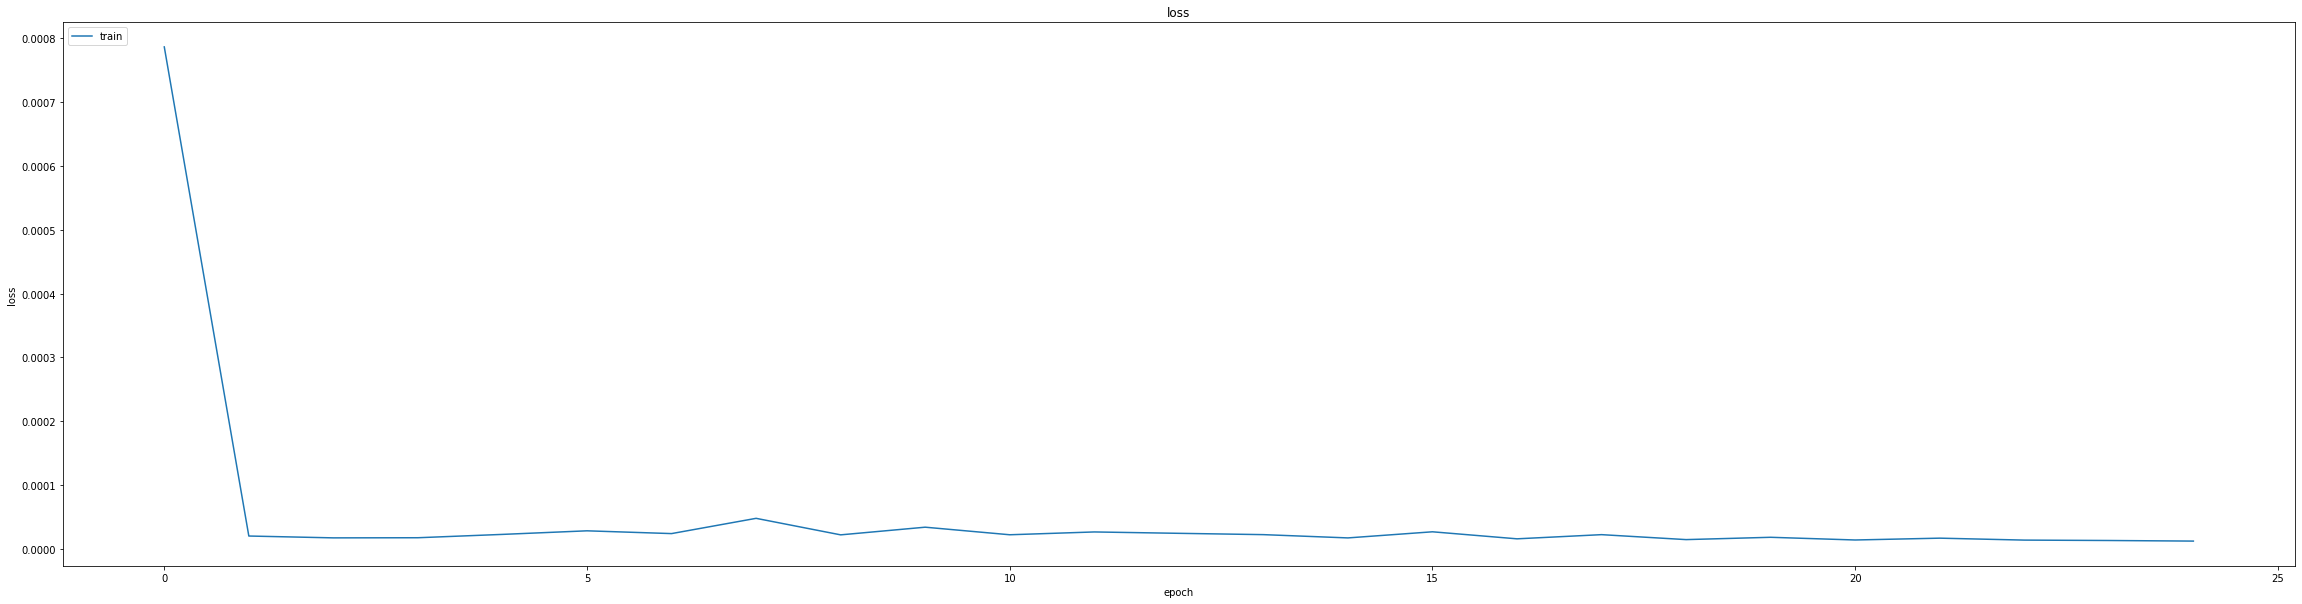

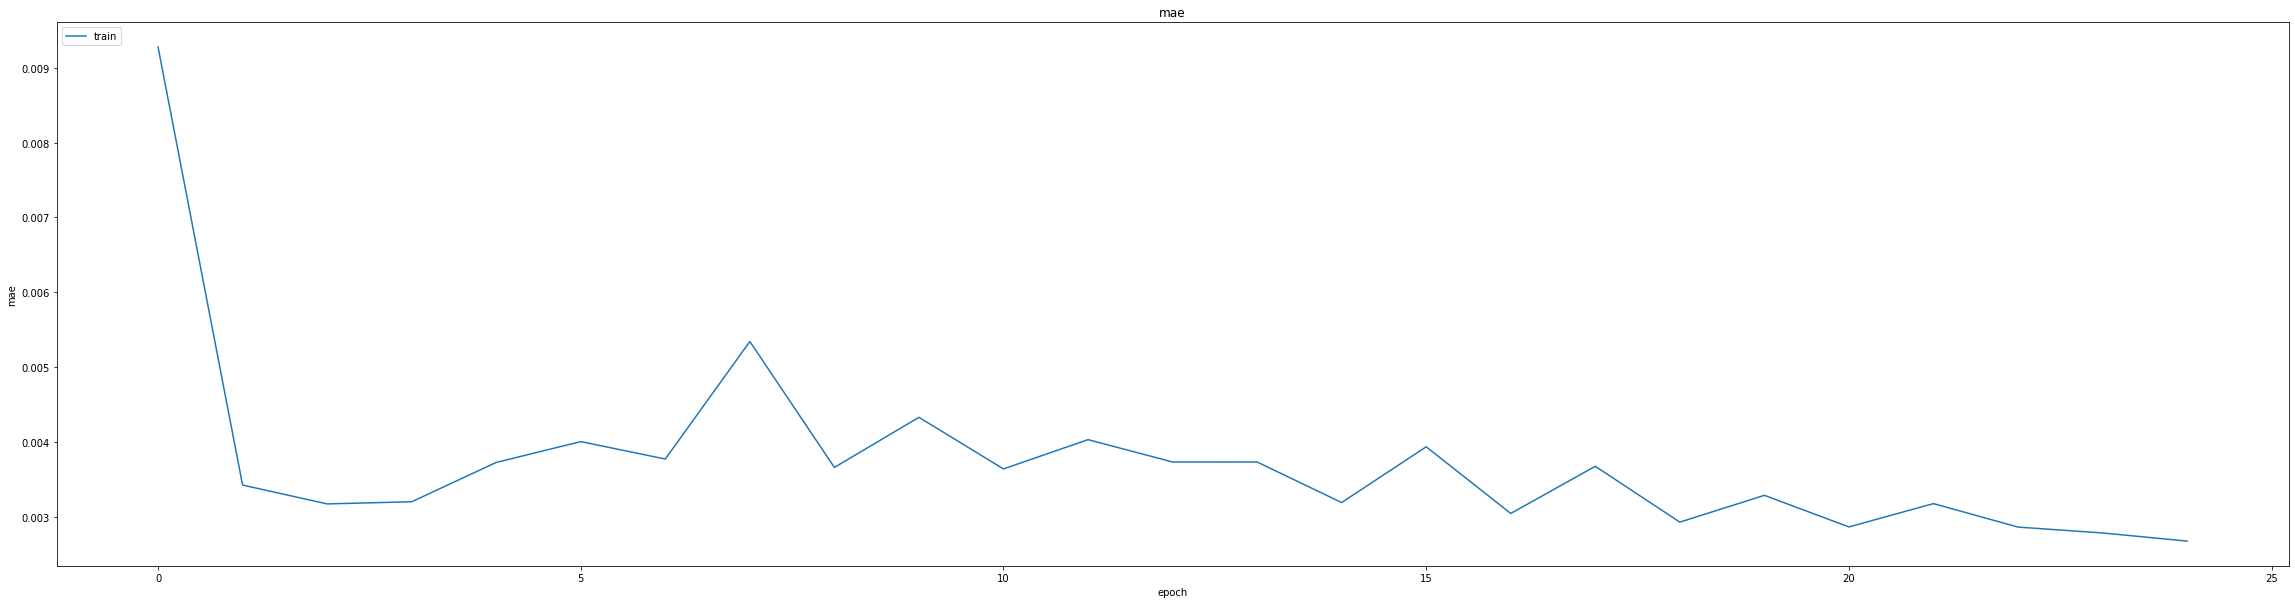

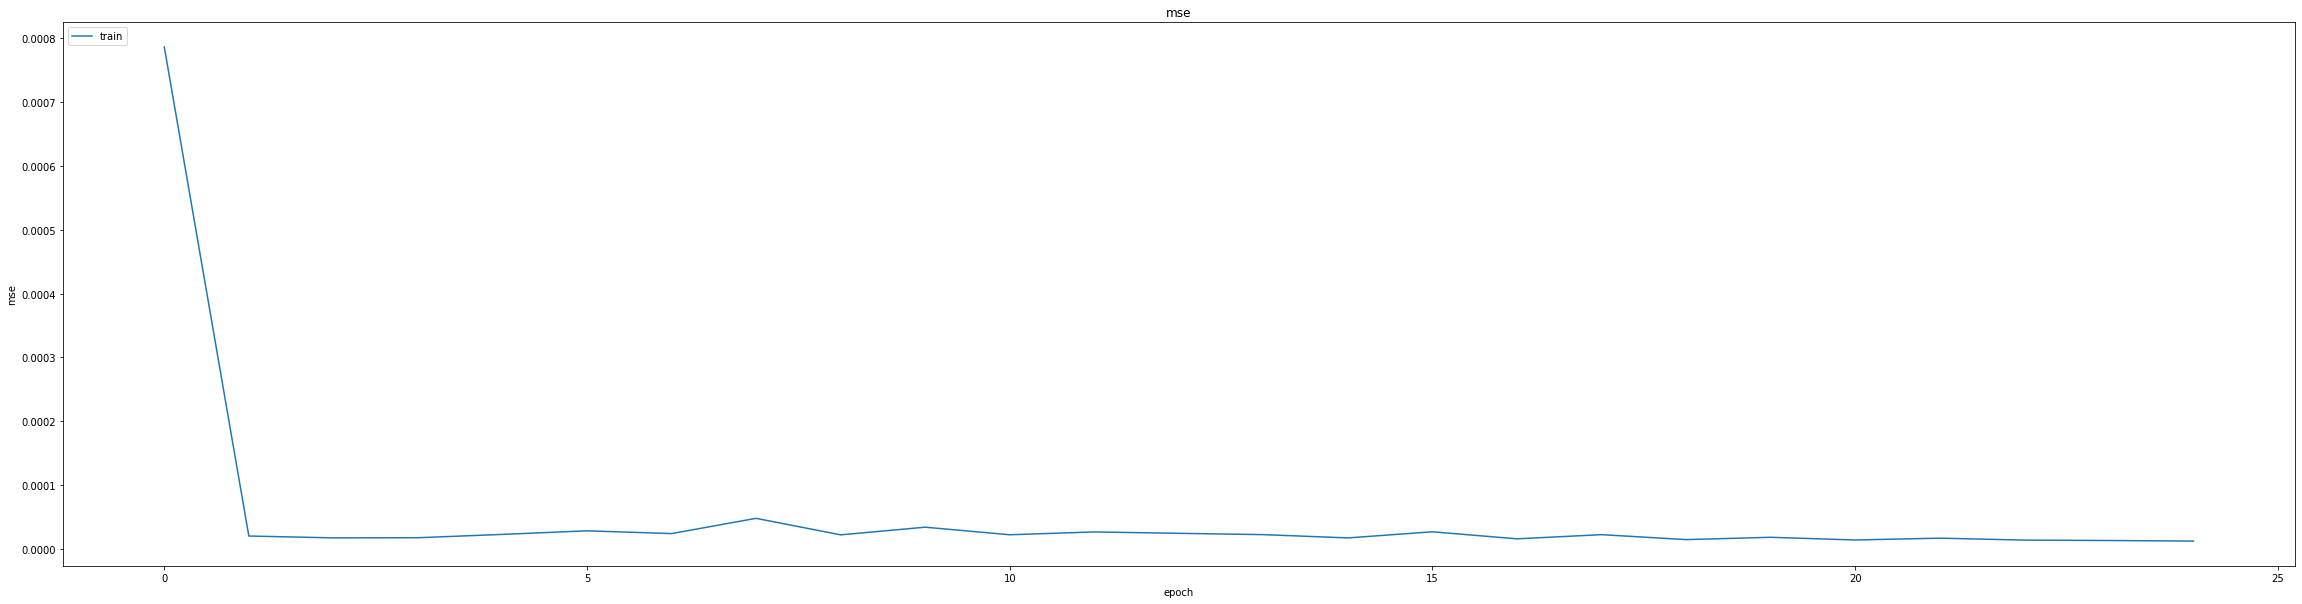

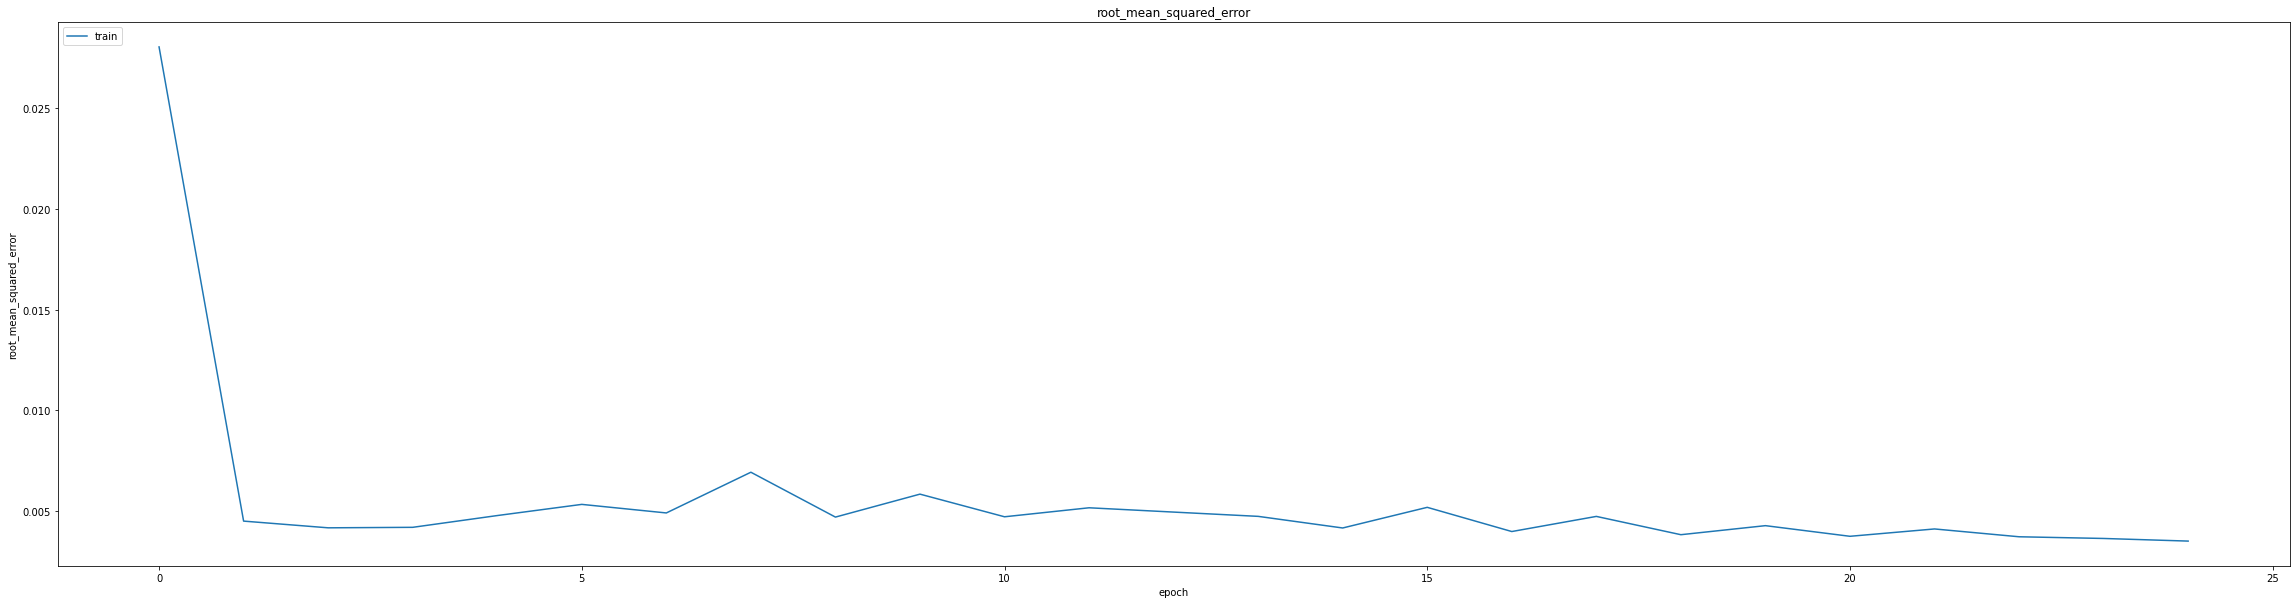

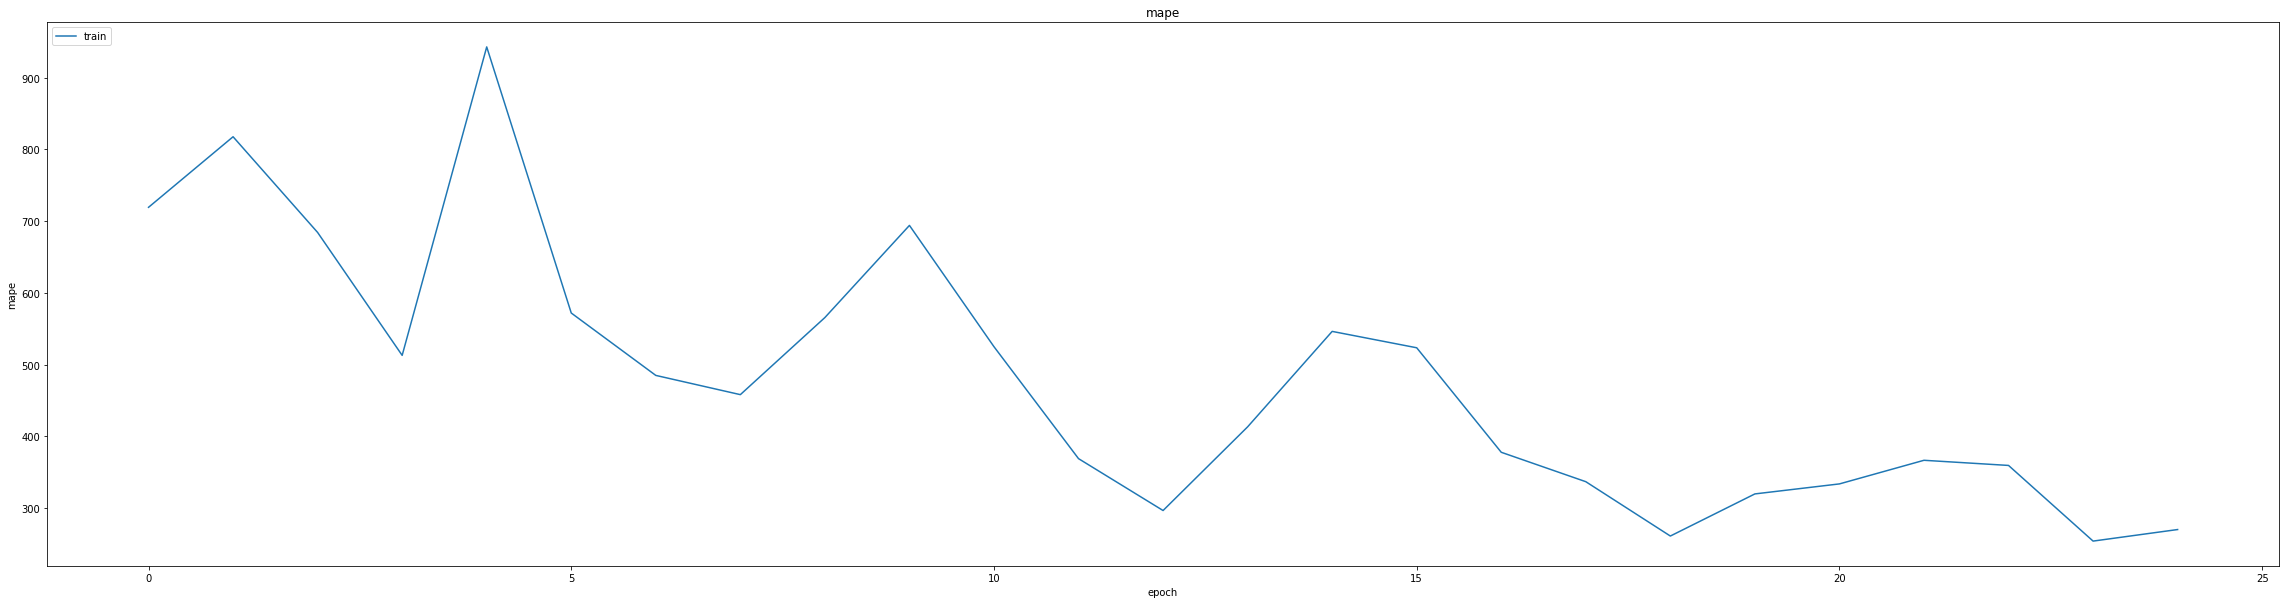

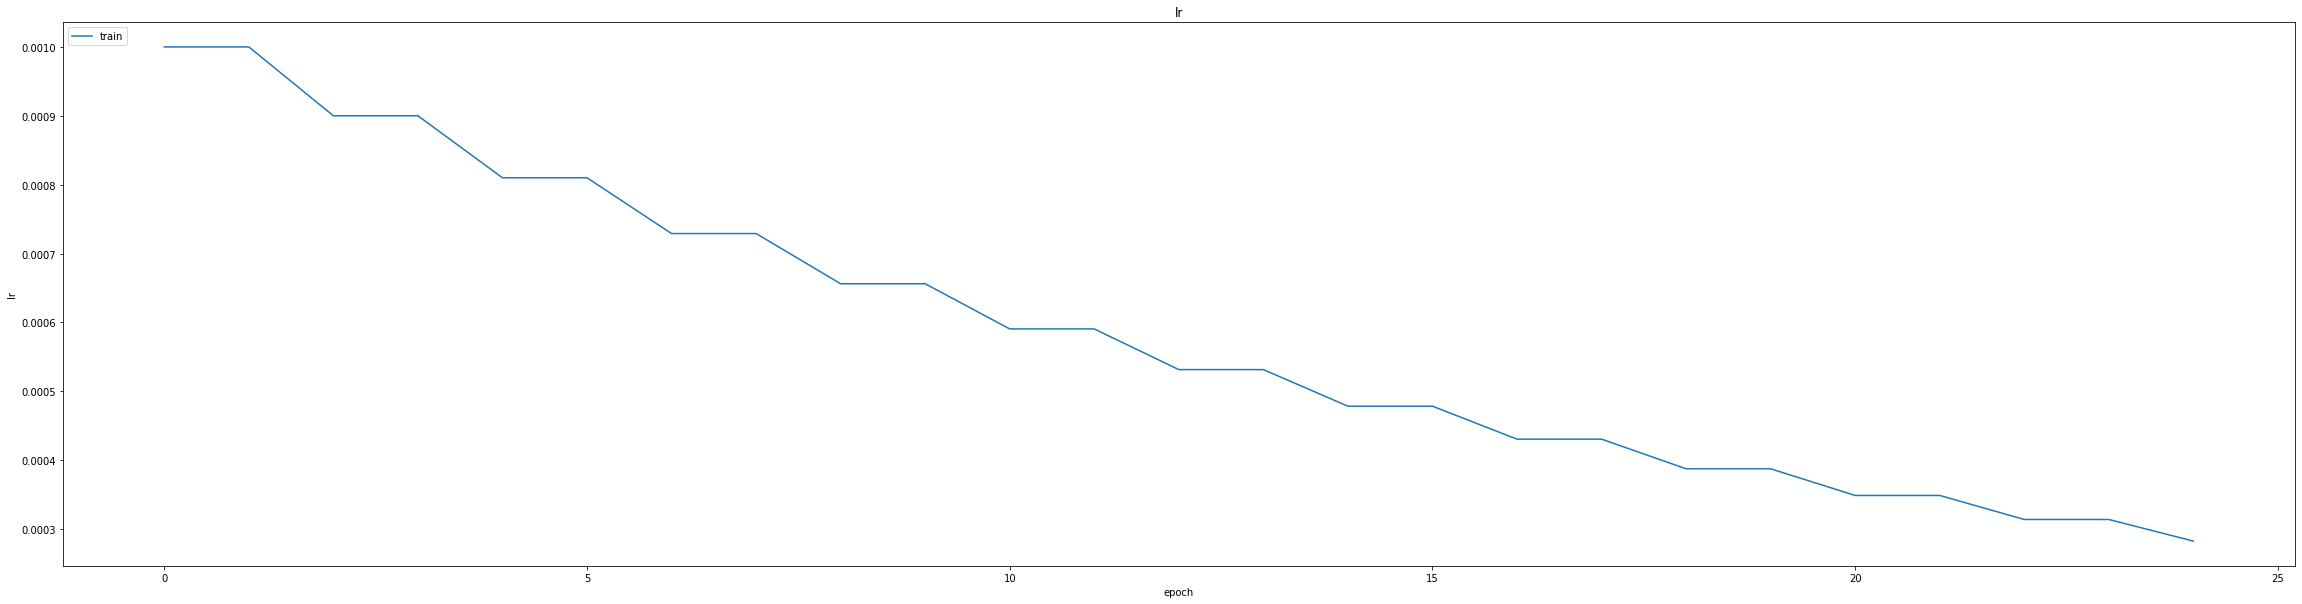

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0068822563625872135
0.00914557185024023
348/348 [==============================] - 3s 5ms/step
0.9965273410640528


348/348 [==============================] - 2s 5ms/step


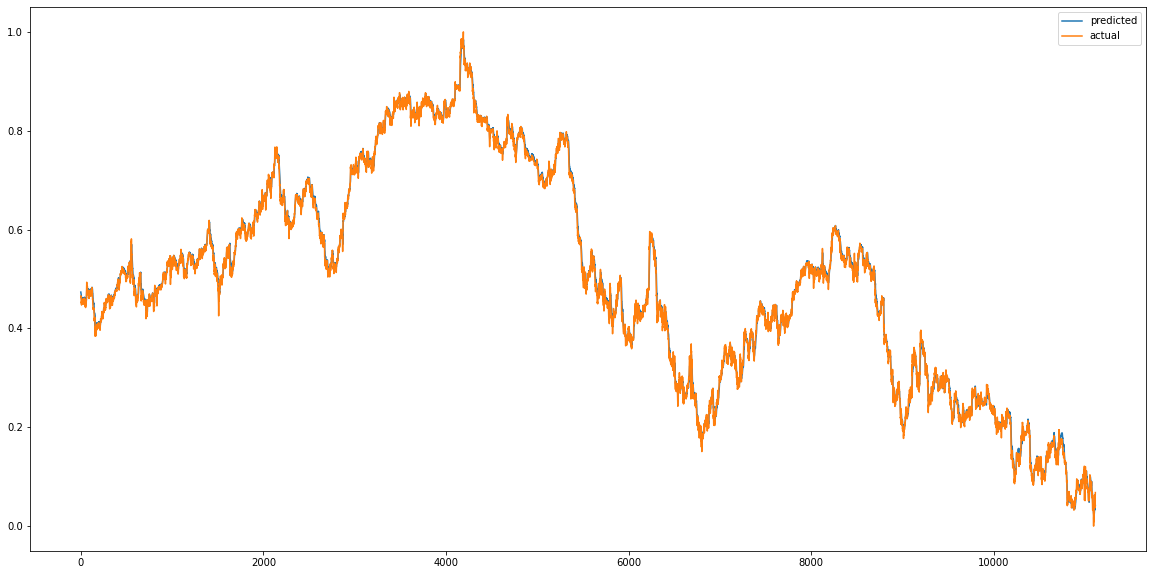

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


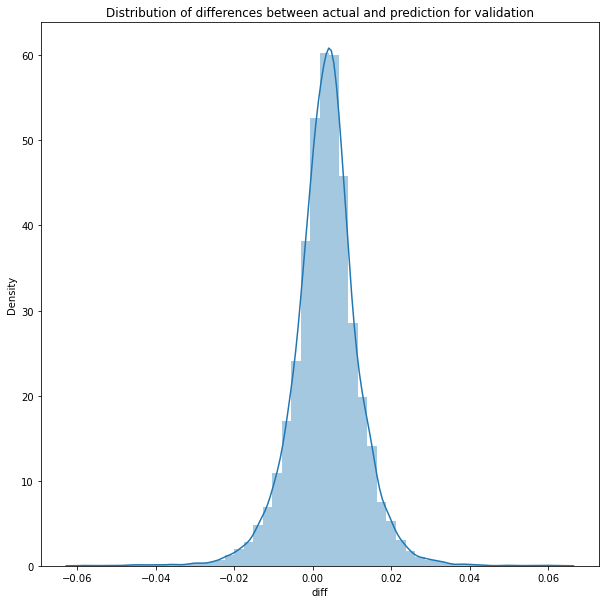

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 2s 5ms/step


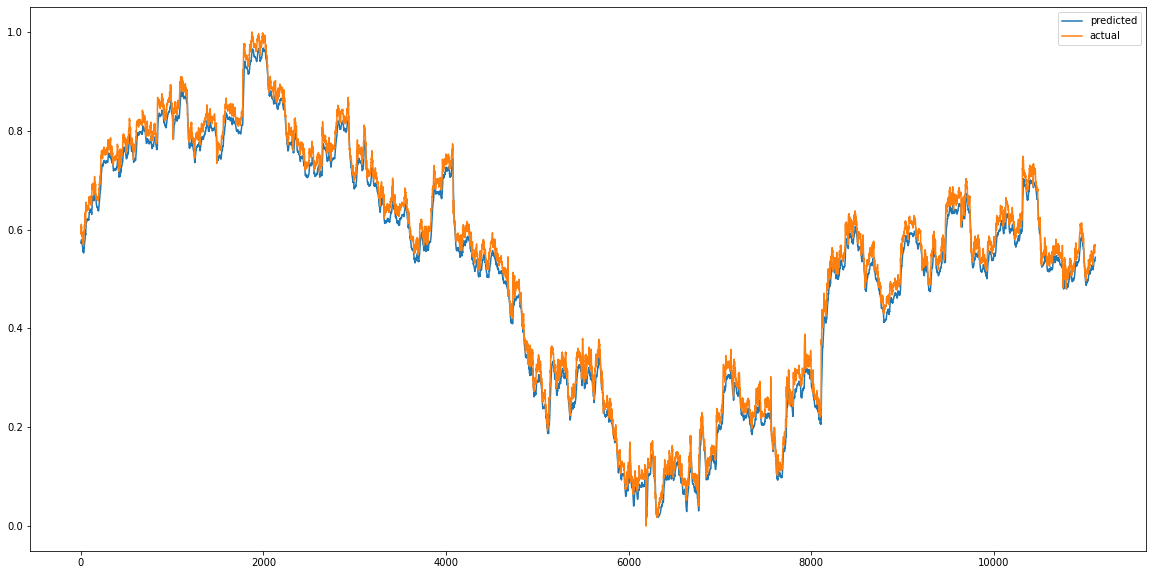

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


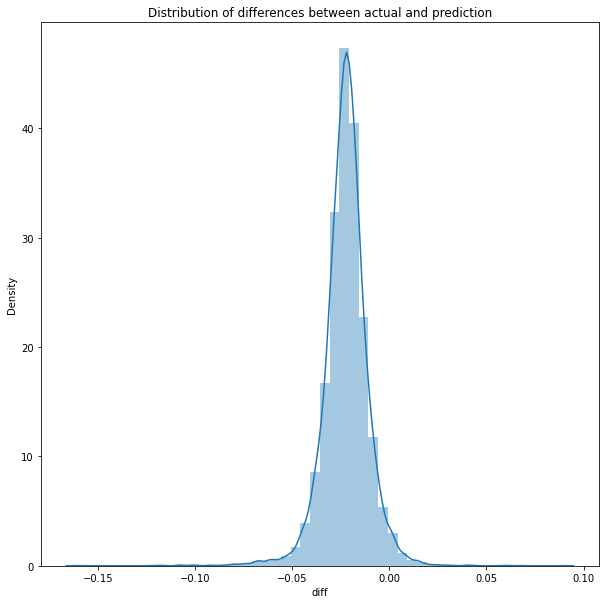

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.0006401726243781341
RMSE :  0.02530163284015745
MAE :  0.022872345274028563
348/348 [==============================] - 2s 5ms/step
R2_Score  : 0.9887198665203063


count    11115.000000
mean        -0.022497
std          0.011579
min         -0.161168
25%         -0.028163
50%         -0.022225
75%         -0.016508
max          0.089432
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_6 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_3 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                82176     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
404/406 [============================>.] - ETA: 0s - loss: 287.6321 - mae: 2.3421 - mse: 287.6321 - root_mean_squared_error: 16.9597 - mape: 10849.2090
Epoch 1: val_mse improved from inf to 0.05357, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 15s 30ms/step - loss: 286.2925 - mae: 2.3319 - mse: 286.2925 - root_mean_squared_error: 16.9202 - mape: 10798.7949 - val_loss: 0.0536 - val_mae: 0.1919 - val_mse: 0.0536 - val_root_mean_squared_error: 0.2315 - val_mape: 51745.6602
Epoch 2/75
402/406 [============================>.] - ETA: 0s - loss: 0.0296 - mae: 0.1406 - mse: 0.0296 - root_mean_squared_error: 0.1722 - mape: 9088.1172
Epoch 2: val_mse improved from 0.05357 to 0.03803, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 0.0296 - mae: 0.1404 - mse: 0.0296 - root_mean_squared_error: 0.1720 - mape: 9001.2188 - val_loss: 0.0380 - val_mae: 0.1625 - val_mse: 0.0380 - val_root_mean_squared_error: 0.1950 - val_mape: 42300.6758
Epoch 3/75
405/406 [============================>.] - ETA: 0s - loss: 0.0164 - mae: 0.1021 - mse: 0.0164 - root_mean_squared_error: 0.1279 - mape: 8401.3682
Epoch 3: val_mse improved from 0.03803 to 0.02194, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 0.0164 - mae: 0.1020 - mse: 0.0164 - root_mean_squared_error: 0.1279 - mape: 8382.9697 - val_loss: 0.0219 - val_mae: 0.1133 - val_mse: 0.0219 - val_root_mean_squared_error: 0.1481 - val_mape: 39747.6680
Epoch 4/75
403/406 [============================>.] - ETA: 0s - loss: 0.0080 - mae: 0.0649 - mse: 0.0080 - root_mean_squared_error: 0.0895 - mape: 8249.0635
Epoch 4: val_mse improved from 0.02194 to 0.01768, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 0.0080 - mae: 0.0649 - mse: 0.0080 - root_mean_squared_error: 0.0895 - mape: 8190.6021 - val_loss: 0.0177 - val_mae: 0.0883 - val_mse: 0.0177 - val_root_mean_squared_error: 0.1329 - val_mape: 39611.4727
Epoch 5/75
402/406 [============================>.] - ETA: 0s - loss: 0.0055 - mae: 0.0502 - mse: 0.0055 - root_mean_squared_error: 0.0739 - mape: 8486.7744
Epoch 5: val_mse improved from 0.01768 to 0.01469, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 0.0055 - mae: 0.0501 - mse: 0.0055 - root_mean_squared_error: 0.0739 - mape: 8405.6006 - val_loss: 0.0147 - val_mae: 0.0756 - val_mse: 0.0147 - val_root_mean_squared_error: 0.1212 - val_mape: 38166.8008
Epoch 6/75
405/406 [============================>.] - ETA: 0s - loss: 0.0045 - mae: 0.0451 - mse: 0.0045 - root_mean_squared_error: 0.0668 - mape: 8309.2031
Epoch 6: val_mse improved from 0.01469 to 0.01185, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 0.0045 - mae: 0.0451 - mse: 0.0045 - root_mean_squared_error: 0.0668 - mape: 8290.9951 - val_loss: 0.0119 - val_mae: 0.0667 - val_mse: 0.0119 - val_root_mean_squared_error: 0.1089 - val_mape: 36098.5000
Epoch 7/75
403/406 [============================>.] - ETA: 0s - loss: 0.0036 - mae: 0.0409 - mse: 0.0036 - root_mean_squared_error: 0.0602 - mape: 7735.6968
Epoch 7: val_mse improved from 0.01185 to 0.00840, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 31ms/step - loss: 0.0036 - mae: 0.0408 - mse: 0.0036 - root_mean_squared_error: 0.0601 - mape: 7680.6582 - val_loss: 0.0084 - val_mae: 0.0534 - val_mse: 0.0084 - val_root_mean_squared_error: 0.0916 - val_mape: 32900.9375
Epoch 8/75
401/406 [============================>.] - ETA: 0s - loss: 0.0028 - mae: 0.0368 - mse: 0.0028 - root_mean_squared_error: 0.0528 - mape: 6722.9780
Epoch 8: val_mse improved from 0.00840 to 0.00560, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 0.0028 - mae: 0.0368 - mse: 0.0028 - root_mean_squared_error: 0.0527 - mape: 6642.0566 - val_loss: 0.0056 - val_mae: 0.0435 - val_mse: 0.0056 - val_root_mean_squared_error: 0.0748 - val_mape: 29408.7715
Epoch 9/75
402/406 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0335 - mse: 0.0022 - root_mean_squared_error: 0.0465 - mape: 6609.2998
Epoch 9: val_mse improved from 0.00560 to 0.00387, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 0.0022 - mae: 0.0334 - mse: 0.0022 - root_mean_squared_error: 0.0465 - mape: 6546.0176 - val_loss: 0.0039 - val_mae: 0.0384 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0622 - val_mape: 26209.2578
Epoch 10/75
403/406 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0310 - mse: 0.0018 - root_mean_squared_error: 0.0422 - mape: 5247.1084
Epoch 10: val_mse improved from 0.00387 to 0.00292, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 0.0018 - mae: 0.0310 - mse: 0.0018 - root_mean_squared_error: 0.0422 - mape: 5209.7847 - val_loss: 0.0029 - val_mae: 0.0342 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0540 - val_mape: 23946.4258
Epoch 11/75
402/406 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0296 - mse: 0.0016 - root_mean_squared_error: 0.0396 - mape: 4892.5459
Epoch 11: val_mse improved from 0.00292 to 0.00239, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 0.0016 - mae: 0.0295 - mse: 0.0016 - root_mean_squared_error: 0.0396 - mape: 4845.6963 - val_loss: 0.0024 - val_mae: 0.0308 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0489 - val_mape: 22315.8945
Epoch 12/75
406/406 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0282 - mse: 0.0014 - root_mean_squared_error: 0.0373 - mape: 4648.7988
Epoch 12: val_mse improved from 0.00239 to 0.00191, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 0.0014 - mae: 0.0282 - mse: 0.0014 - root_mean_squared_error: 0.0373 - mape: 4648.7988 - val_loss: 0.0019 - val_mae: 0.0267 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0437 - val_mape: 21107.7324
Epoch 13/75
401/406 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0266 - mse: 0.0012 - root_mean_squared_error: 0.0351 - mape: 4719.5376
Epoch 13: val_mse did not improve from 0.00191
406/406 [==============================] - 4s 10ms/step - loss: 0.0012 - mae: 0.0265 - mse: 0.0012 - root_mean_squared_error: 0.0350 - mape: 4662.7222 - val_loss: 0.0021 - val_mae: 0.0318 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0455 - val_mape: 20073.2539
Epoch 14/75
402/406 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0252 - mse: 0.0011 - root_mean_squared_error: 0.0329 - mape: 4167.6855
Epoch 14: val_mse improved from 0.00191 to 0.00163, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 12s 30ms/step - loss: 0.0011 - mae: 0.0252 - mse: 0.0011 - root_mean_squared_error: 0.0328 - mape: 4127.7847 - val_loss: 0.0016 - val_mae: 0.0289 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0403 - val_mape: 18879.2852
Epoch 15/75
401/406 [============================>.] - ETA: 0s - loss: 9.4406e-04 - mae: 0.0237 - mse: 9.4406e-04 - root_mean_squared_error: 0.0307 - mape: 4222.4805
Epoch 15: val_mse did not improve from 0.00163
406/406 [==============================] - 4s 10ms/step - loss: 9.4351e-04 - mae: 0.0236 - mse: 9.4351e-04 - root_mean_squared_error: 0.0307 - mape: 4171.6646 - val_loss: 0.0017 - val_mae: 0.0292 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0408 - val_mape: 17693.9277
Epoch 16/75
405/406 [============================>.] - ETA: 0s - loss: 8.3879e-04 - mae: 0.0223 - mse: 8.3879e-04 - root_mean_squared_error: 0.0290 - mape: 3729.1580
Epoch 16: val_mse improved from 0.00163 to 0.00128, saving model to /content/d

406/406 [==============================] - 11s 28ms/step - loss: 8.3938e-04 - mae: 0.0223 - mse: 8.3938e-04 - root_mean_squared_error: 0.0290 - mape: 3721.0256 - val_loss: 0.0013 - val_mae: 0.0251 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0358 - val_mape: 16940.3320
Epoch 17/75
404/406 [============================>.] - ETA: 0s - loss: 7.3415e-04 - mae: 0.0209 - mse: 7.3415e-04 - root_mean_squared_error: 0.0271 - mape: 3601.6040
Epoch 17: val_mse did not improve from 0.00128
406/406 [==============================] - 4s 10ms/step - loss: 7.3342e-04 - mae: 0.0209 - mse: 7.3342e-04 - root_mean_squared_error: 0.0271 - mape: 3584.8420 - val_loss: 0.0015 - val_mae: 0.0314 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0390 - val_mape: 16362.4521
Epoch 18/75
403/406 [============================>.] - ETA: 0s - loss: 6.5806e-04 - mae: 0.0198 - mse: 6.5806e-04 - root_mean_squared_error: 0.0257 - mape: 3453.3833
Epoch 18: val_mse did not improve from 0.00128
406/406 [==============

406/406 [==============================] - 12s 29ms/step - loss: 4.8072e-04 - mae: 0.0169 - mse: 4.8072e-04 - root_mean_squared_error: 0.0219 - mape: 3031.3110 - val_loss: 0.0013 - val_mae: 0.0289 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0356 - val_mape: 15283.4326
Epoch 21/75
406/406 [==============================] - ETA: 0s - loss: 3.9352e-04 - mae: 0.0153 - mse: 3.9352e-04 - root_mean_squared_error: 0.0198 - mape: 3094.1077
Epoch 21: val_mse improved from 0.00127 to 0.00101, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 32ms/step - loss: 3.9352e-04 - mae: 0.0153 - mse: 3.9352e-04 - root_mean_squared_error: 0.0198 - mape: 3094.1077 - val_loss: 0.0010 - val_mae: 0.0245 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0318 - val_mape: 14777.7920
Epoch 22/75
406/406 [==============================] - ETA: 0s - loss: 3.3372e-04 - mae: 0.0141 - mse: 3.3372e-04 - root_mean_squared_error: 0.0183 - mape: 2781.0256
Epoch 22: val_mse did not improve from 0.00101
406/406 [==============================] - 4s 10ms/step - loss: 3.3372e-04 - mae: 0.0141 - mse: 3.3372e-04 - root_mean_squared_error: 0.0183 - mape: 2781.0256 - val_loss: 0.0012 - val_mae: 0.0284 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0352 - val_mape: 15013.8428
Epoch 23/75
405/406 [============================>.] - ETA: 0s - loss: 2.7079e-04 - mae: 0.0126 - mse: 2.7079e-04 - root_mean_squared_error: 0.0165 - mape: 2964.9836
Epoch 23: val_mse improved from 0.00101 to 0.00092, saving model to /c

406/406 [==============================] - 12s 30ms/step - loss: 2.7061e-04 - mae: 0.0126 - mse: 2.7061e-04 - root_mean_squared_error: 0.0165 - mape: 2958.4817 - val_loss: 9.2025e-04 - val_mae: 0.0208 - val_mse: 9.2025e-04 - val_root_mean_squared_error: 0.0303 - val_mape: 14592.2217
Epoch 24/75
404/406 [============================>.] - ETA: 0s - loss: 2.2298e-04 - mae: 0.0114 - mse: 2.2298e-04 - root_mean_squared_error: 0.0149 - mape: 2974.9456
Epoch 24: val_mse did not improve from 0.00092
406/406 [==============================] - 4s 10ms/step - loss: 2.2295e-04 - mae: 0.0114 - mse: 2.2295e-04 - root_mean_squared_error: 0.0149 - mape: 2961.0981 - val_loss: 0.0012 - val_mae: 0.0244 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0341 - val_mape: 14982.1992
Epoch 25/75
406/406 [==============================] - ETA: 0s - loss: 1.9335e-04 - mae: 0.0106 - mse: 1.9335e-04 - root_mean_squared_error: 0.0139 - mape: 2594.0698
Epoch 25: val_mse did not improve from 0.00092
406/406 [======

406/406 [==============================] - 11s 28ms/step - loss: 6.1497e-05 - mae: 0.0060 - mse: 6.1497e-05 - root_mean_squared_error: 0.0078 - mape: 1925.3855 - val_loss: 9.1700e-04 - val_mae: 0.0235 - val_mse: 9.1700e-04 - val_root_mean_squared_error: 0.0303 - val_mape: 11561.9209
Epoch 44/75
402/406 [============================>.] - ETA: 0s - loss: 6.3938e-05 - mae: 0.0062 - mse: 6.3938e-05 - root_mean_squared_error: 0.0080 - mape: 1653.1512
Epoch 44: val_mse improved from 0.00092 to 0.00088, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 6.4194e-05 - mae: 0.0062 - mse: 6.4194e-05 - root_mean_squared_error: 0.0080 - mape: 1637.3186 - val_loss: 8.8284e-04 - val_mae: 0.0208 - val_mse: 8.8284e-04 - val_root_mean_squared_error: 0.0297 - val_mape: 11351.4893
Epoch 45/75
402/406 [============================>.] - ETA: 0s - loss: 5.5443e-05 - mae: 0.0057 - mse: 5.5443e-05 - root_mean_squared_error: 0.0074 - mape: 1748.2239
Epoch 45: val_mse did not improve from 0.00088
406/406 [==============================] - 4s 10ms/step - loss: 5.5253e-05 - mae: 0.0057 - mse: 5.5253e-05 - root_mean_squared_error: 0.0074 - mape: 1731.4745 - val_loss: 9.7225e-04 - val_mae: 0.0242 - val_mse: 9.7225e-04 - val_root_mean_squared_error: 0.0312 - val_mape: 12201.0117
Epoch 46/75
401/406 [============================>.] - ETA: 0s - loss: 6.2758e-05 - mae: 0.0061 - mse: 6.2758e-05 - root_mean_squared_error: 0.0079 - mape: 1737.5695
Epoch 46: val_mse did not improve from 0.00088
406/406

406/406 [==============================] - 12s 30ms/step - loss: 8.7401e-05 - mae: 0.0072 - mse: 8.7401e-05 - root_mean_squared_error: 0.0093 - mape: 1565.1893 - val_loss: 6.1809e-04 - val_mae: 0.0176 - val_mse: 6.1809e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 9560.7656
Epoch 49/75
405/406 [============================>.] - ETA: 0s - loss: 5.8305e-05 - mae: 0.0060 - mse: 5.8305e-05 - root_mean_squared_error: 0.0076 - mape: 1644.0380
Epoch 49: val_mse did not improve from 0.00062
406/406 [==============================] - 4s 10ms/step - loss: 5.8241e-05 - mae: 0.0060 - mse: 5.8241e-05 - root_mean_squared_error: 0.0076 - mape: 1640.4323 - val_loss: 8.1417e-04 - val_mae: 0.0232 - val_mse: 8.1417e-04 - val_root_mean_squared_error: 0.0285 - val_mape: 9481.0898
Epoch 50/75
406/406 [==============================] - ETA: 0s - loss: 6.7898e-05 - mae: 0.0063 - mse: 6.7898e-05 - root_mean_squared_error: 0.0082 - mape: 1534.3268
Epoch 50: val_mse improved from 0.00062 to 0.00048, savi

406/406 [==============================] - 11s 28ms/step - loss: 6.7898e-05 - mae: 0.0063 - mse: 6.7898e-05 - root_mean_squared_error: 0.0082 - mape: 1534.3268 - val_loss: 4.7707e-04 - val_mae: 0.0148 - val_mse: 4.7707e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 9611.9160
Epoch 51/75
402/406 [============================>.] - ETA: 0s - loss: 6.7690e-05 - mae: 0.0064 - mse: 6.7690e-05 - root_mean_squared_error: 0.0082 - mape: 1656.7462
Epoch 51: val_mse did not improve from 0.00048
406/406 [==============================] - 4s 10ms/step - loss: 6.7495e-05 - mae: 0.0064 - mse: 6.7495e-05 - root_mean_squared_error: 0.0082 - mape: 1640.8746 - val_loss: 6.7769e-04 - val_mae: 0.0220 - val_mse: 6.7769e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 9317.4570
Epoch 52/75
406/406 [==============================] - ETA: 0s - loss: 7.5380e-05 - mae: 0.0067 - mse: 7.5380e-05 - root_mean_squared_error: 0.0087 - mape: 1553.3347
Epoch 52: val_mse did not improve from 0.00048
406/406 [

406/406 [==============================] - 13s 32ms/step - loss: 7.6285e-05 - mae: 0.0069 - mse: 7.6285e-05 - root_mean_squared_error: 0.0087 - mape: 1523.3772 - val_loss: 4.6220e-04 - val_mae: 0.0168 - val_mse: 4.6220e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 8090.9199
Epoch 54/75
402/406 [============================>.] - ETA: 0s - loss: 5.0563e-05 - mae: 0.0056 - mse: 5.0563e-05 - root_mean_squared_error: 0.0071 - mape: 1534.0715
Epoch 54: val_mse did not improve from 0.00046
406/406 [==============================] - 4s 11ms/step - loss: 5.0403e-05 - mae: 0.0056 - mse: 5.0403e-05 - root_mean_squared_error: 0.0071 - mape: 1519.3796 - val_loss: 8.4893e-04 - val_mae: 0.0262 - val_mse: 8.4893e-04 - val_root_mean_squared_error: 0.0291 - val_mape: 7902.6372
Epoch 55/75
402/406 [============================>.] - ETA: 0s - loss: 7.2145e-05 - mae: 0.0065 - mse: 7.2145e-05 - root_mean_squared_error: 0.0085 - mape: 1535.4467
Epoch 55: val_mse did not improve from 0.00046
406/406 [

406/406 [==============================] - 12s 30ms/step - loss: 6.3578e-05 - mae: 0.0063 - mse: 6.3578e-05 - root_mean_squared_error: 0.0080 - mape: 1500.3457 - val_loss: 4.3086e-04 - val_mae: 0.0161 - val_mse: 4.3086e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 7602.1250
Epoch 57/75
406/406 [==============================] - ETA: 0s - loss: 6.5308e-05 - mae: 0.0064 - mse: 6.5308e-05 - root_mean_squared_error: 0.0081 - mape: 1532.8016
Epoch 57: val_mse did not improve from 0.00043
406/406 [==============================] - 5s 11ms/step - loss: 6.5308e-05 - mae: 0.0064 - mse: 6.5308e-05 - root_mean_squared_error: 0.0081 - mape: 1532.8016 - val_loss: 0.0013 - val_mae: 0.0328 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0363 - val_mape: 10147.4746
Epoch 58/75
401/406 [============================>.] - ETA: 0s - loss: 6.0928e-05 - mae: 0.0061 - mse: 6.0928e-05 - root_mean_squared_error: 0.0078 - mape: 1440.5834
Epoch 58: val_mse did not improve from 0.00043
406/406 [=======

406/406 [==============================] - 13s 33ms/step - loss: 5.0828e-05 - mae: 0.0056 - mse: 5.0828e-05 - root_mean_squared_error: 0.0071 - mape: 1405.4208 - val_loss: 3.5260e-04 - val_mae: 0.0160 - val_mse: 3.5260e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 5358.0991
Epoch 71/75
403/406 [============================>.] - ETA: 0s - loss: 4.2383e-05 - mae: 0.0050 - mse: 4.2383e-05 - root_mean_squared_error: 0.0065 - mape: 1146.7968
Epoch 71: val_mse did not improve from 0.00035
406/406 [==============================] - 4s 10ms/step - loss: 4.2308e-05 - mae: 0.0050 - mse: 4.2308e-05 - root_mean_squared_error: 0.0065 - mape: 1138.6359 - val_loss: 4.4478e-04 - val_mae: 0.0182 - val_mse: 4.4478e-04 - val_root_mean_squared_error: 0.0211 - val_mape: 5930.3833
Epoch 72/75
405/406 [============================>.] - ETA: 0s - loss: 4.1188e-05 - mae: 0.0050 - mse: 4.1188e-05 - root_mean_squared_error: 0.0064 - mape: 1096.7183
Epoch 72: val_mse did not improve from 0.00035
406/406 [

406/406 [==============================] - 12s 30ms/step - loss: 5.1244e-05 - mae: 0.0055 - mse: 5.1244e-05 - root_mean_squared_error: 0.0072 - mape: 781.6483 - val_loss: 2.5303e-04 - val_mae: 0.0128 - val_mse: 2.5303e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 4521.5093
Epoch 74/75
405/406 [============================>.] - ETA: 0s - loss: 3.9108e-05 - mae: 0.0049 - mse: 3.9108e-05 - root_mean_squared_error: 0.0063 - mape: 731.9459
Epoch 74: val_mse did not improve from 0.00025
406/406 [==============================] - 4s 10ms/step - loss: 3.9115e-05 - mae: 0.0049 - mse: 3.9115e-05 - root_mean_squared_error: 0.0063 - mape: 730.3417 - val_loss: 4.6022e-04 - val_mae: 0.0193 - val_mse: 4.6022e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 5575.5879
Epoch 75/75
404/406 [============================>.] - ETA: 0s - loss: 7.7412e-05 - mae: 0.0059 - mse: 7.7412e-05 - root_mean_squared_error: 0.0088 - mape: 794.7917
Epoch 75: val_mse did not improve from 0.00025
406/406 [====

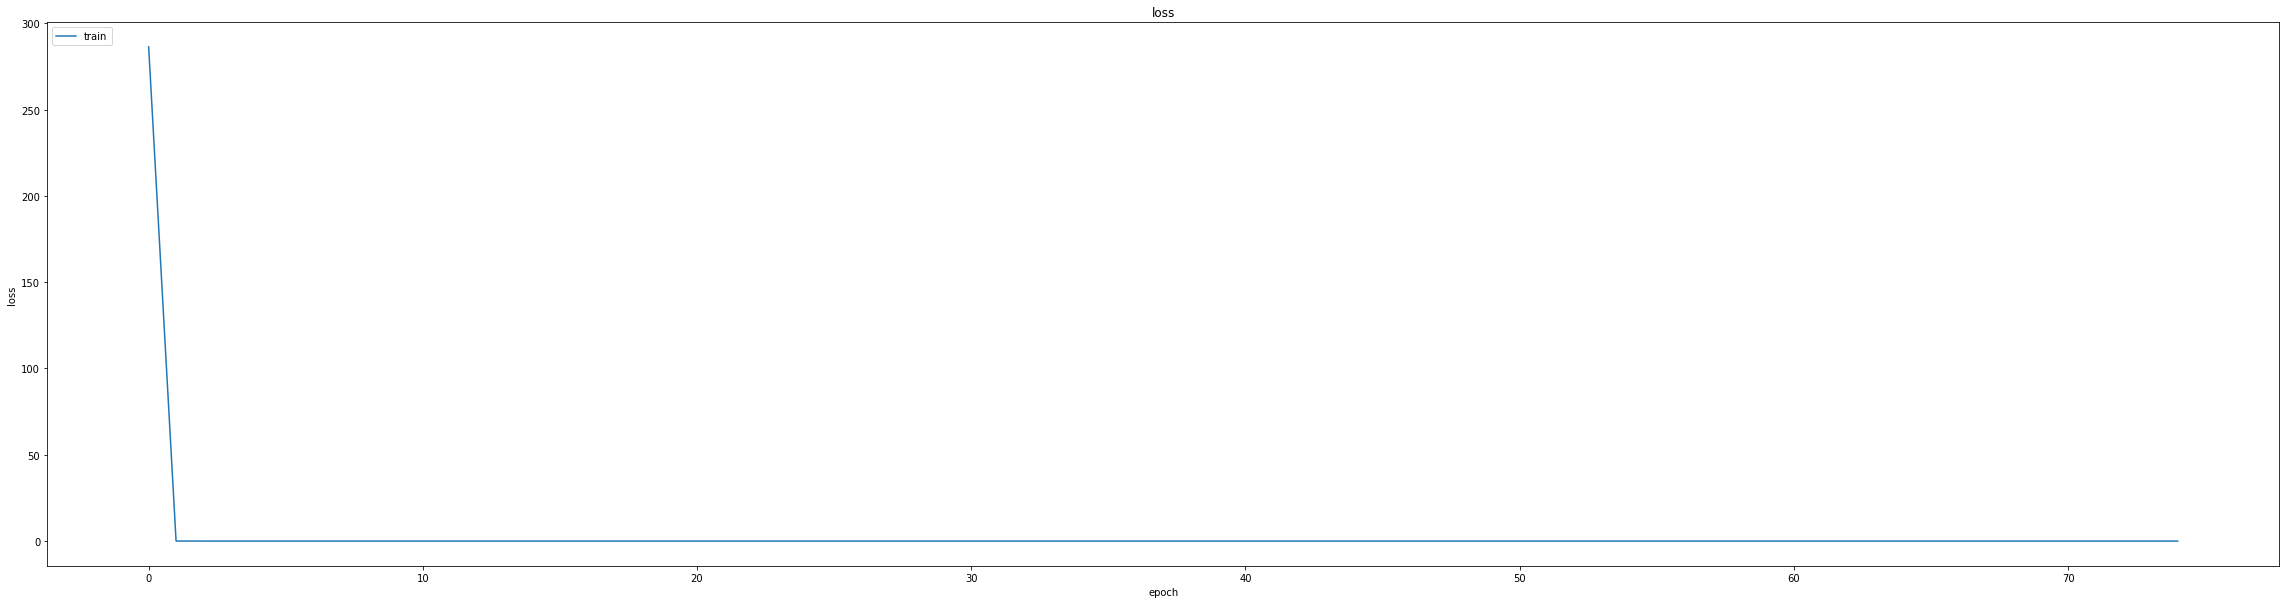

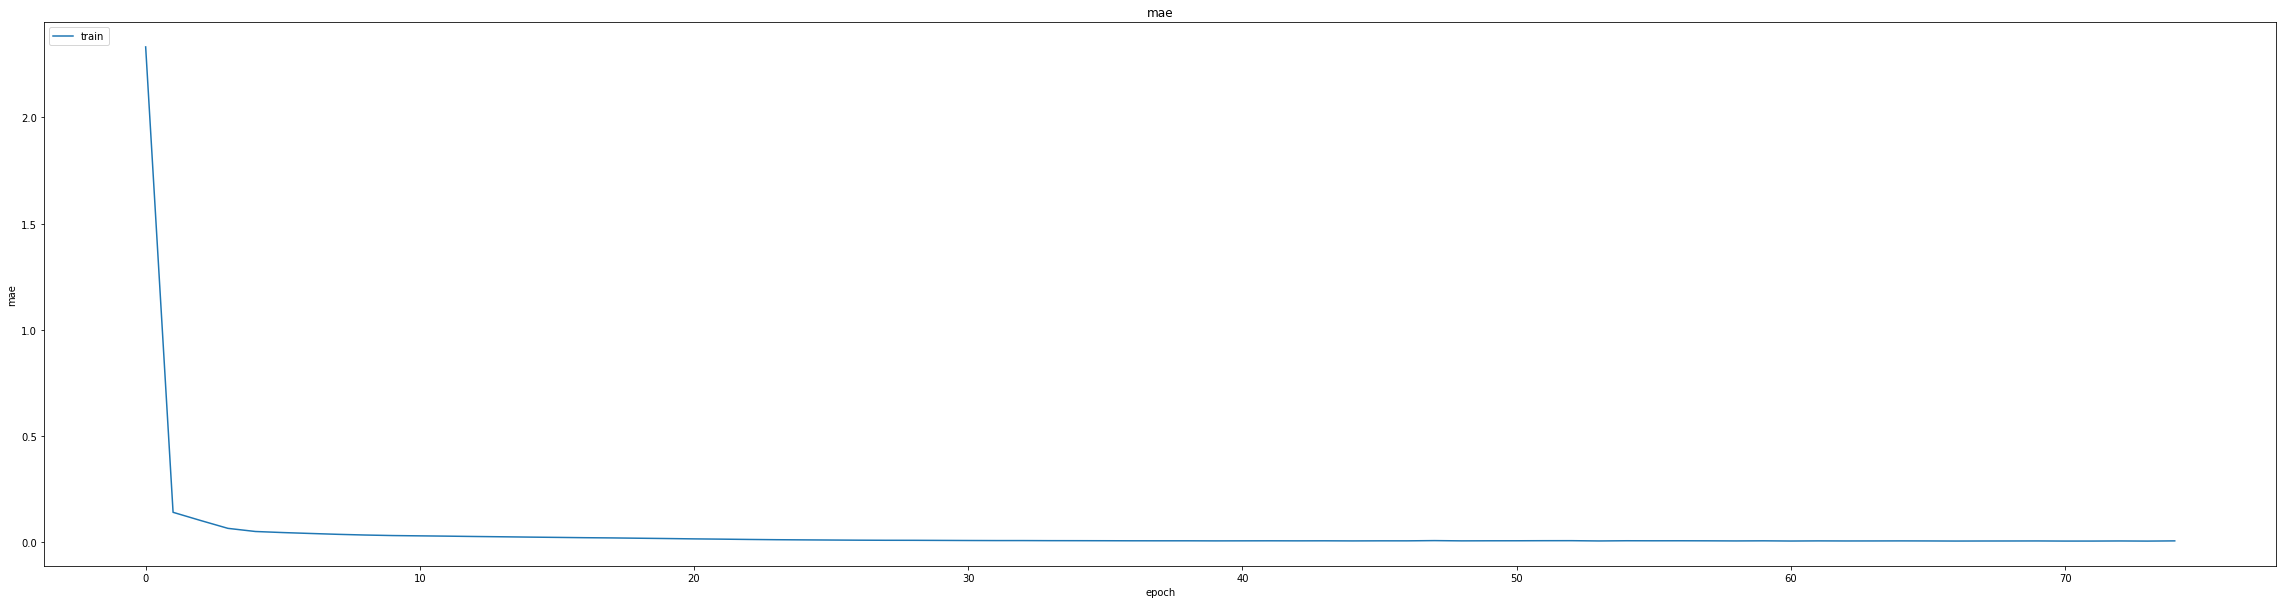

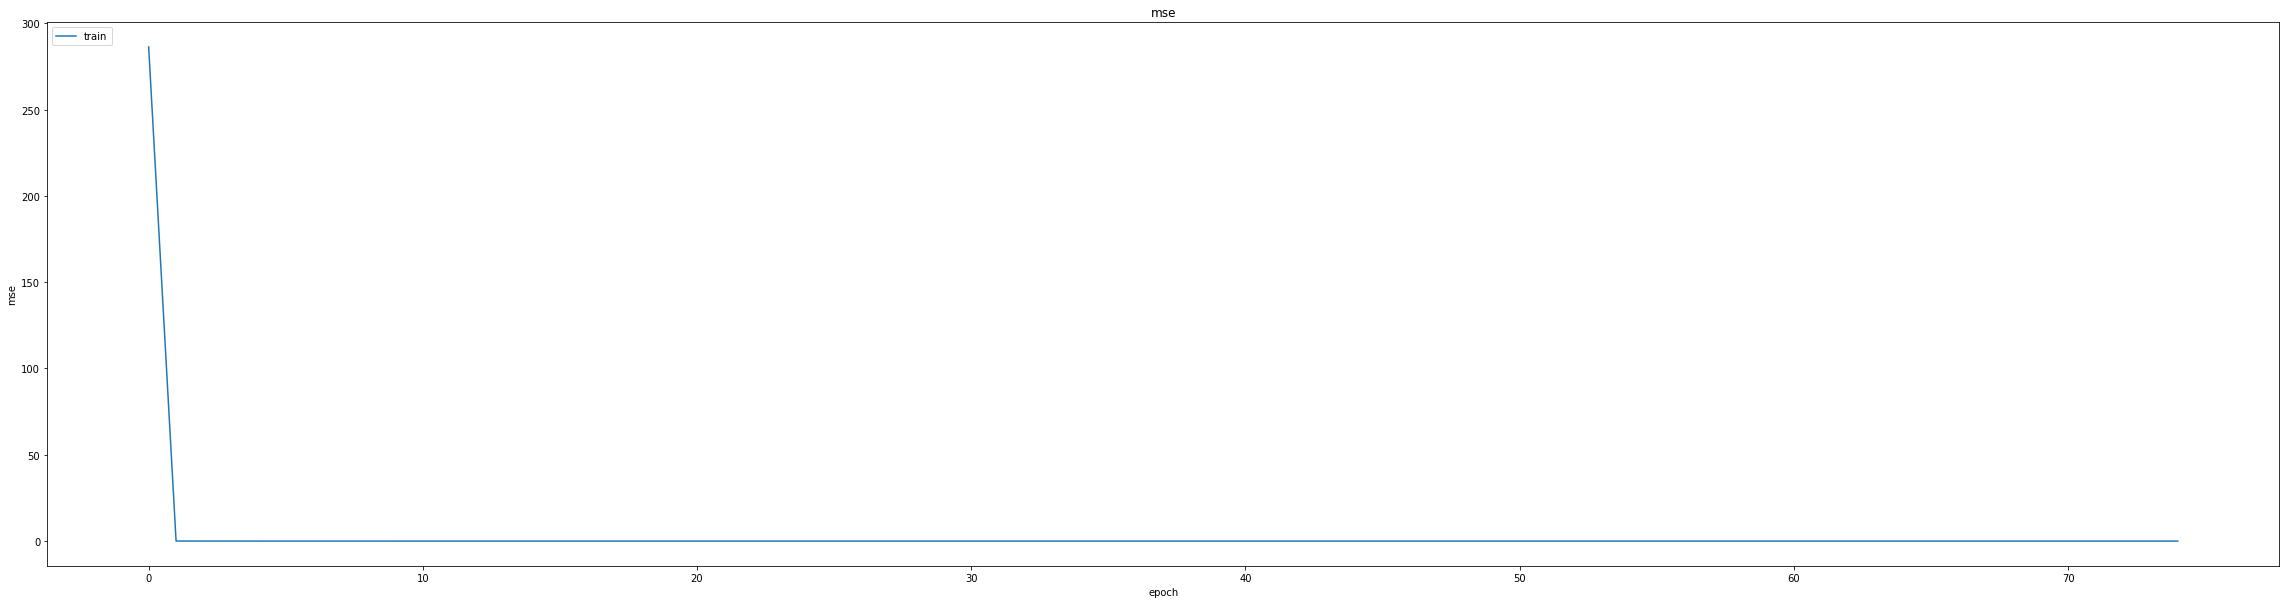

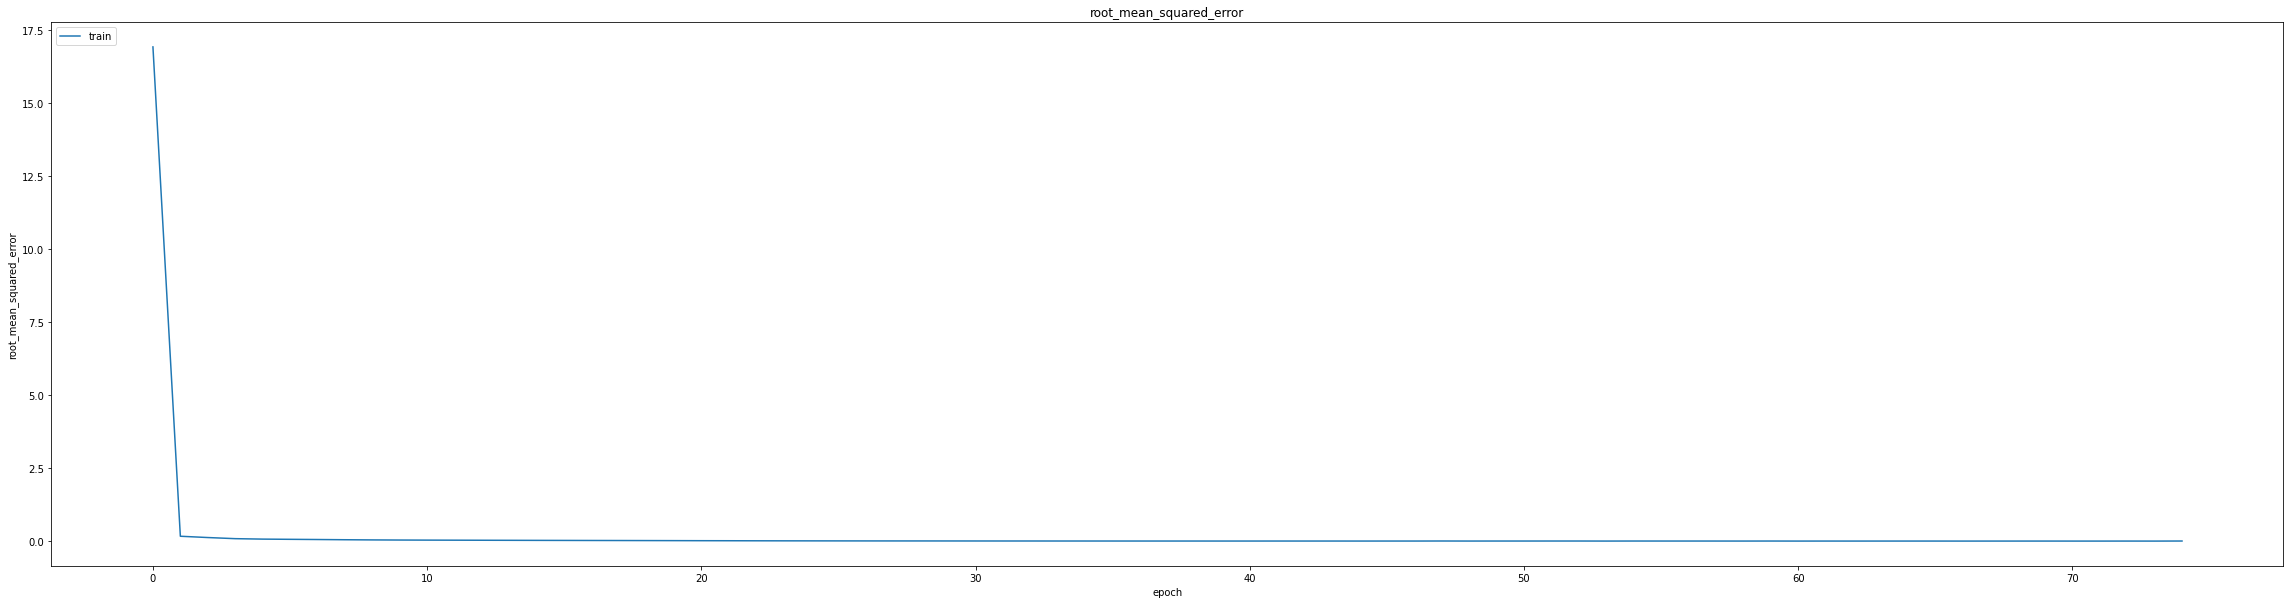

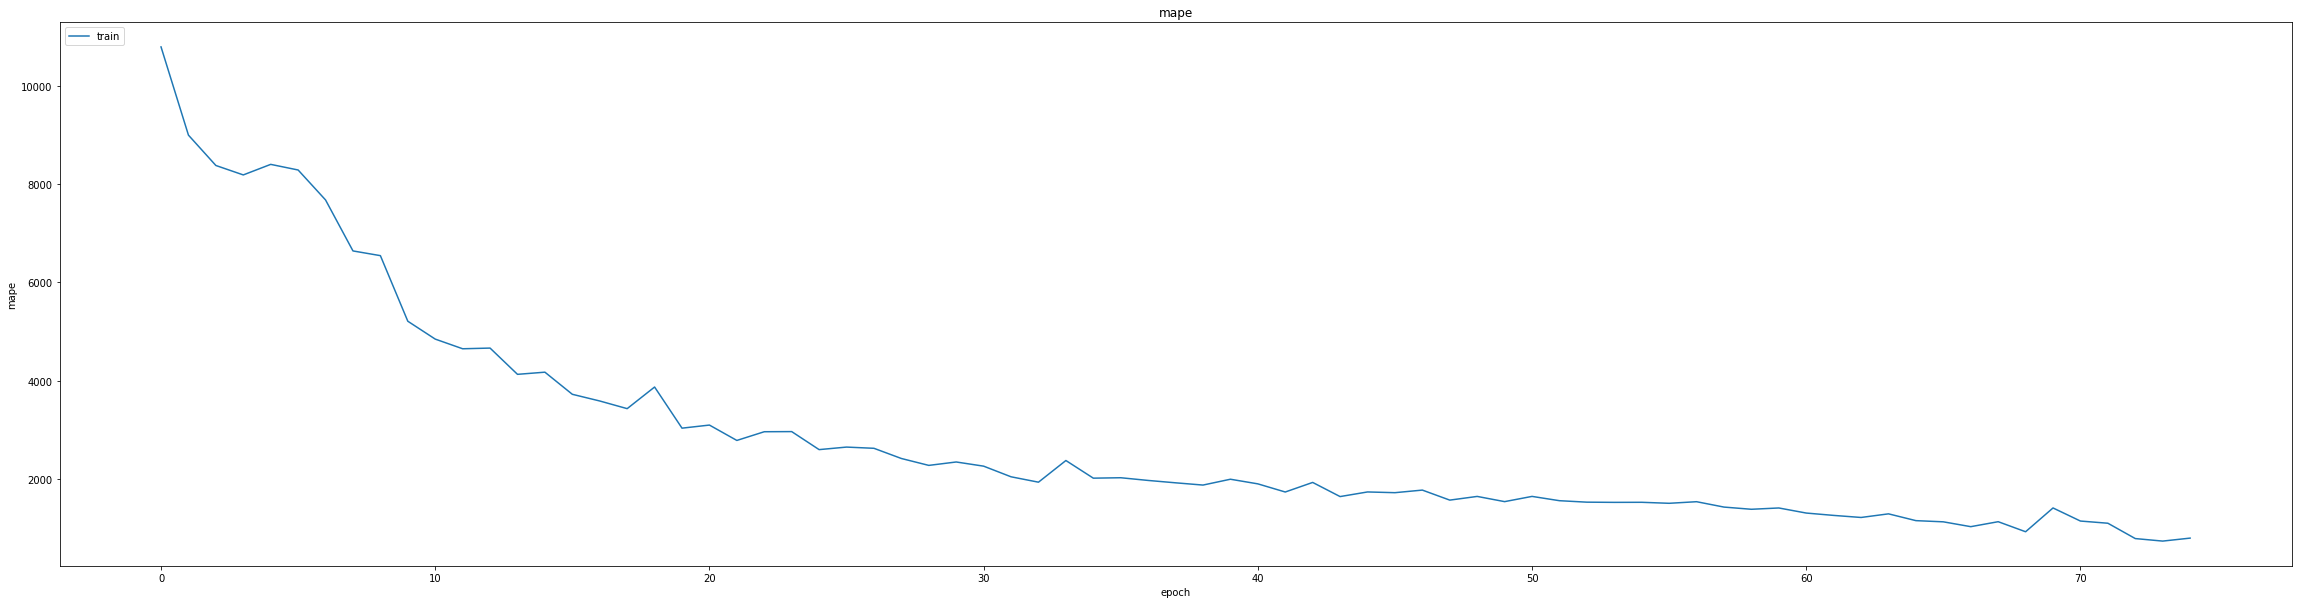

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.012754199095070362
0.015906991437077522
348/348 [==============================] - 2s 3ms/step
0.9913618599329386


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
406/406 [==============================] - ETA: 0s - loss: 0.0067 - mae: 0.0230 - mse: 0.0067 - root_mean_squared_error: 0.0820 - mape: 826.5731
Epoch 1: val_mse did not improve from 0.00025
406/406 [==============================] - 9s 12ms/step - loss: 0.0067 - mae: 0.0230 - mse: 0.0067 - root_mean_squared_error: 0.0820 - mape: 826.5731 - val_loss: 7.6105e-04 - val_mae: 0.0240 - val_mse: 7.6105e-04 - val_root_mean_squared_error: 0.0276 - val_mape: 5467.5054 - lr: 0.0010
Epoch 2/25
406/406 [==============================] - ETA: 0s - loss: 3.7668e-05 - mae: 0.0046 - mse: 3.7668e-05 - root_mean_squared_error: 0.0061 - mape: 761.4348
Epoch 2: val_mse did not improve from 0.00025
406/406 [==============================] - 4s 10ms/step - loss: 3.7668e-05 - mae: 0.0046 - mse: 3.7668e-05 - root_mean_squared_error: 0.0061 - mape: 761.4348 - val_loss: 7.1548e-04 - val_mae: 0.0233 - val_mse: 7.1548e-04 - val_root_mean_squared_error: 0.0267 - val_mape: 5387.0010 - lr: 0.0010
lr chang

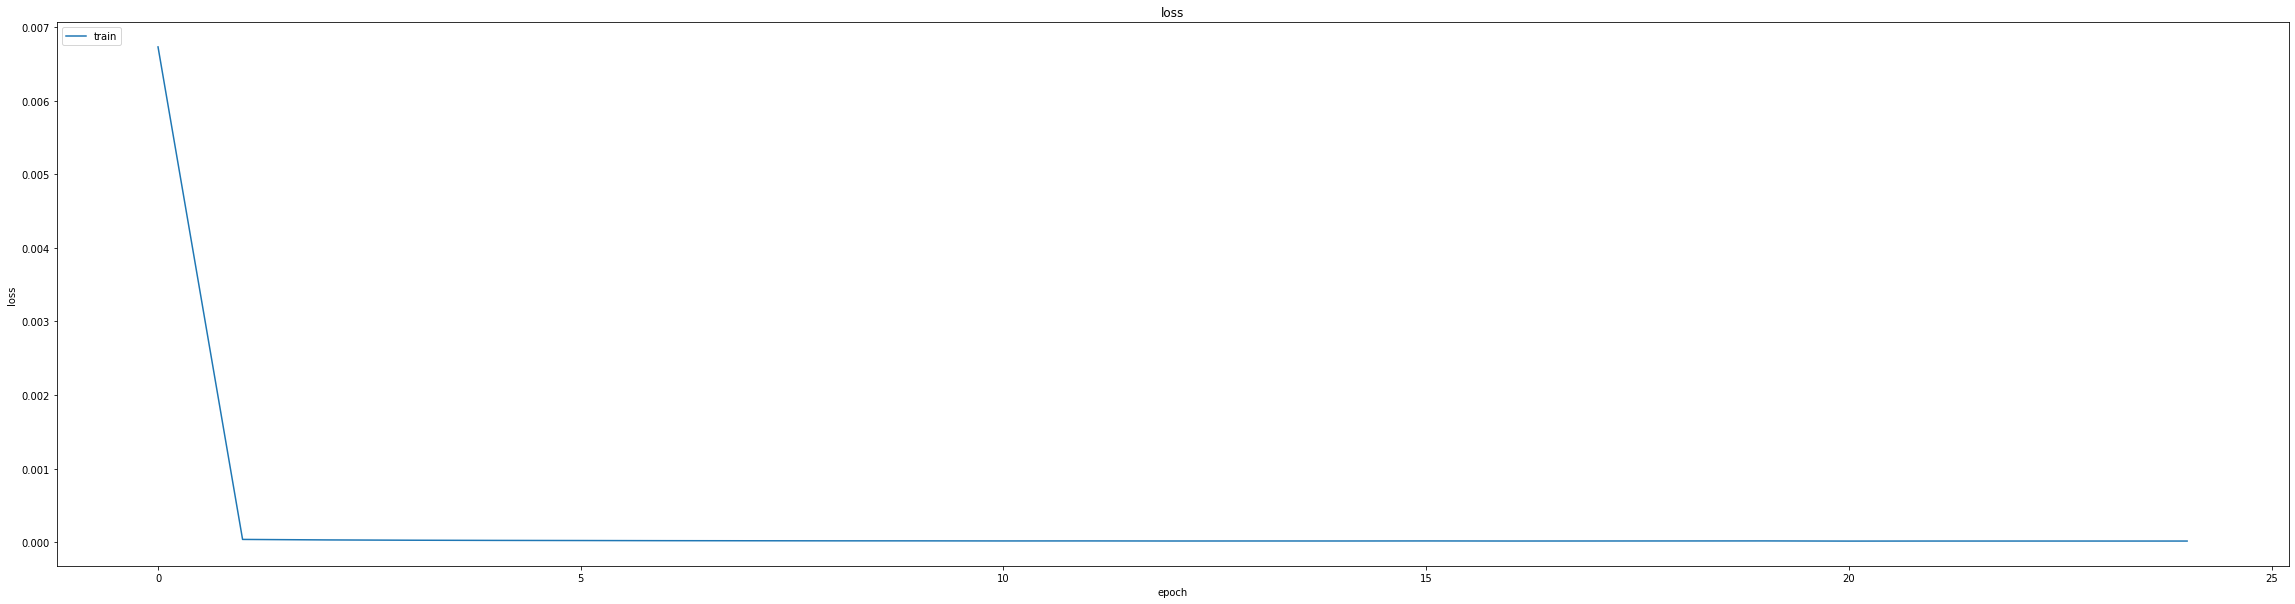

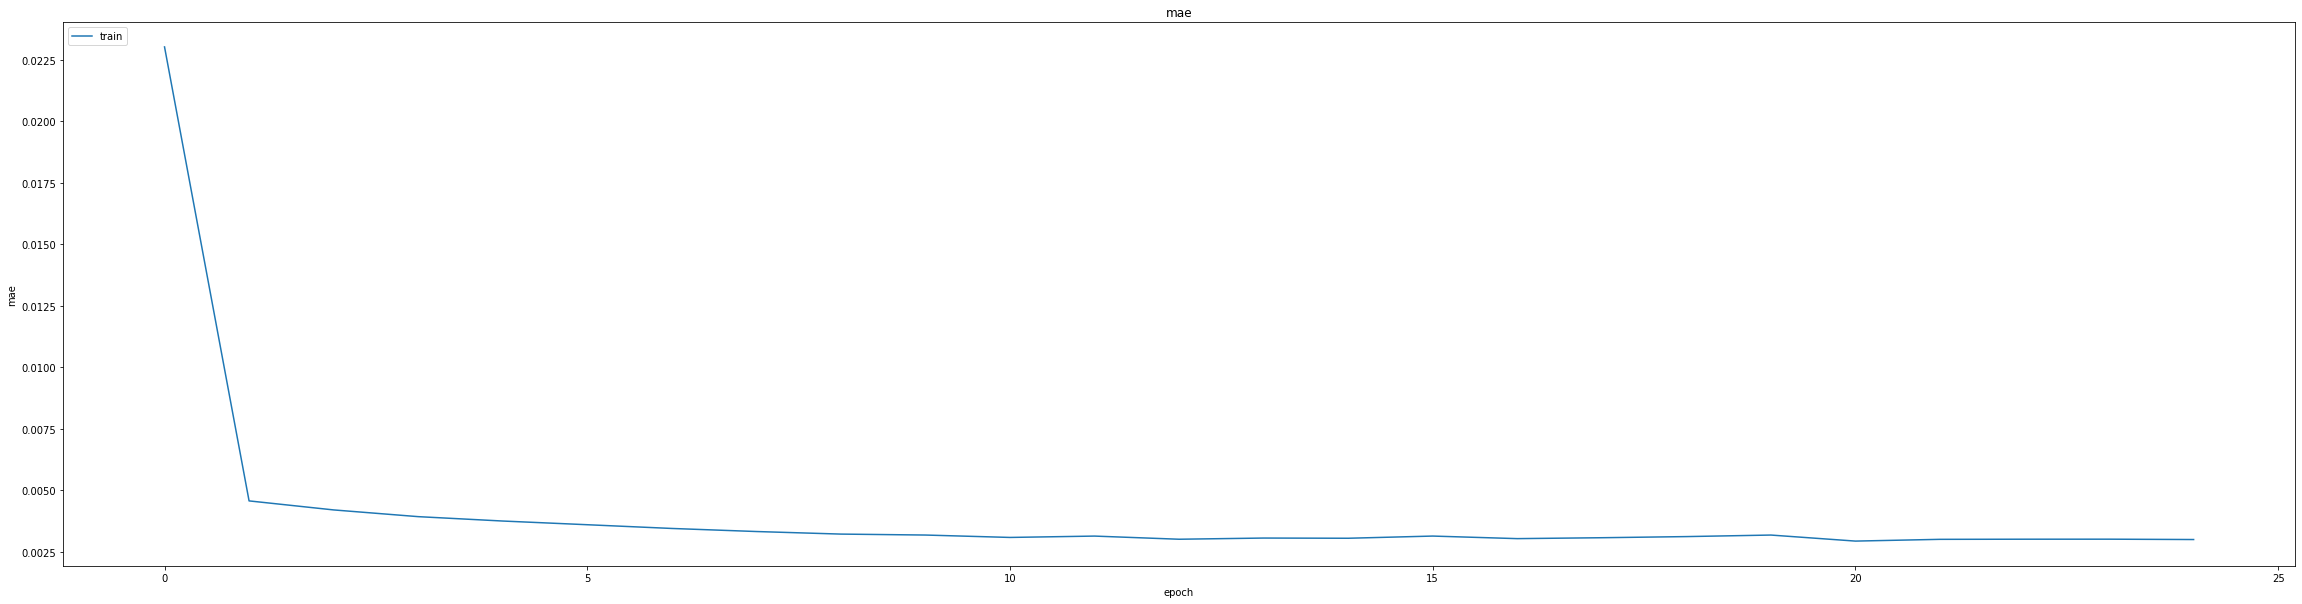

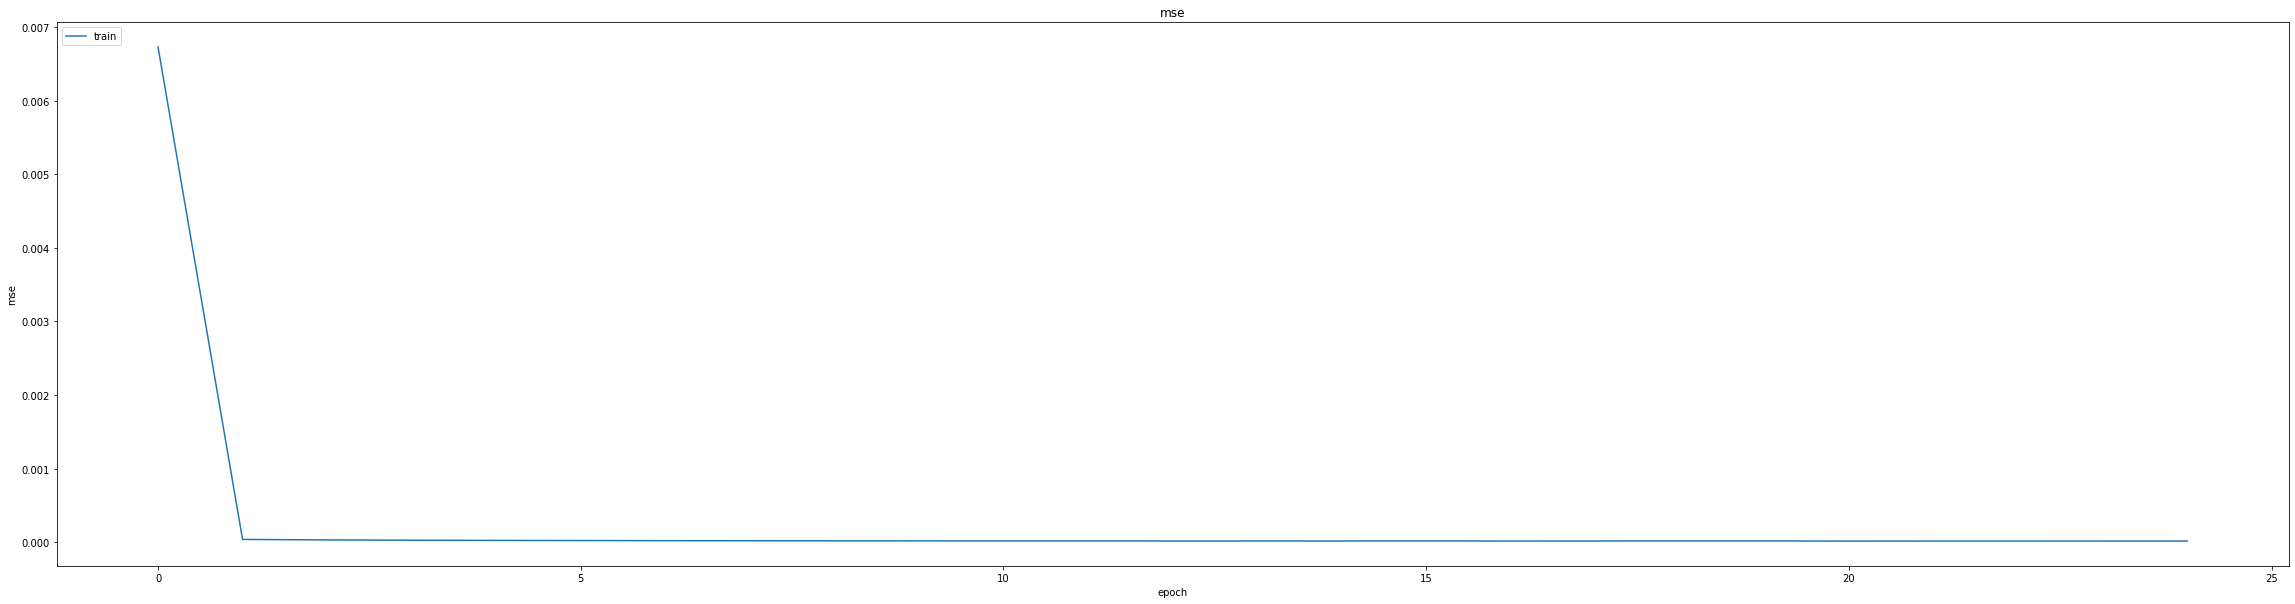

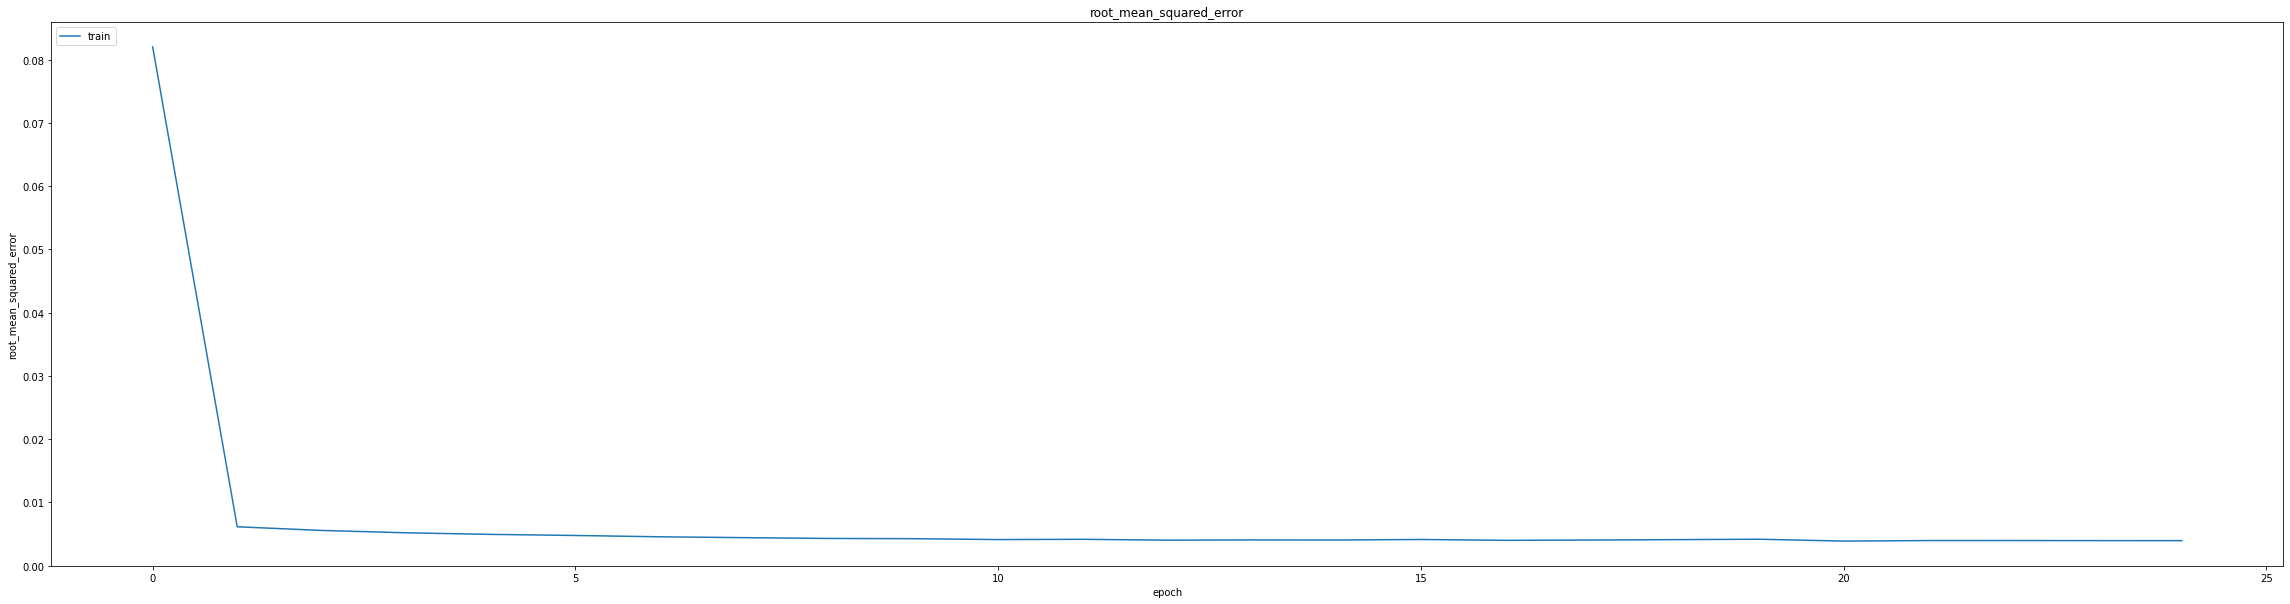

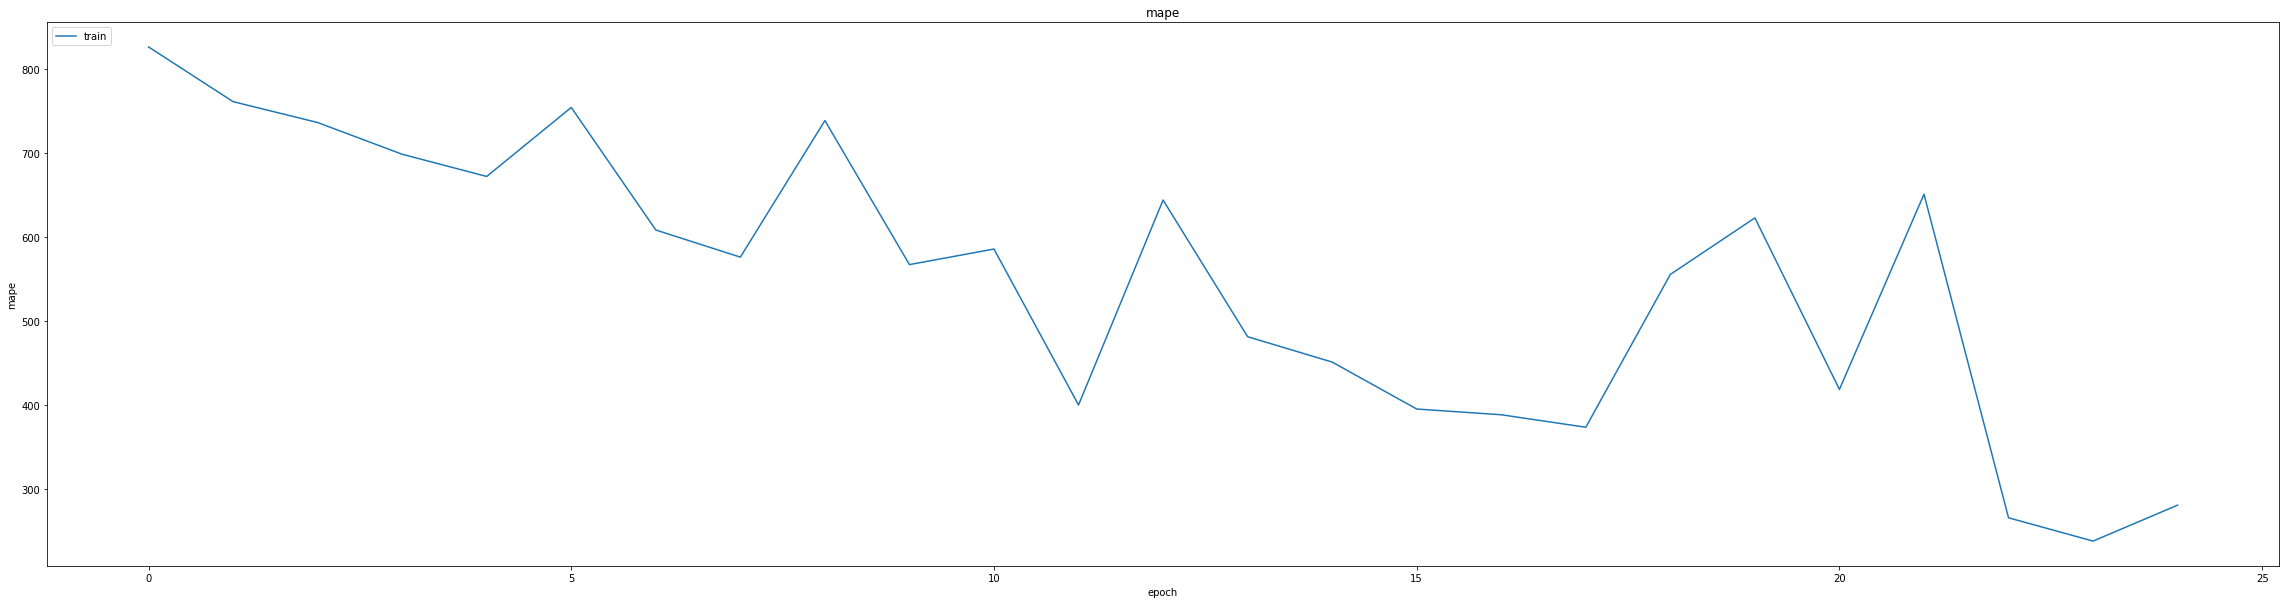

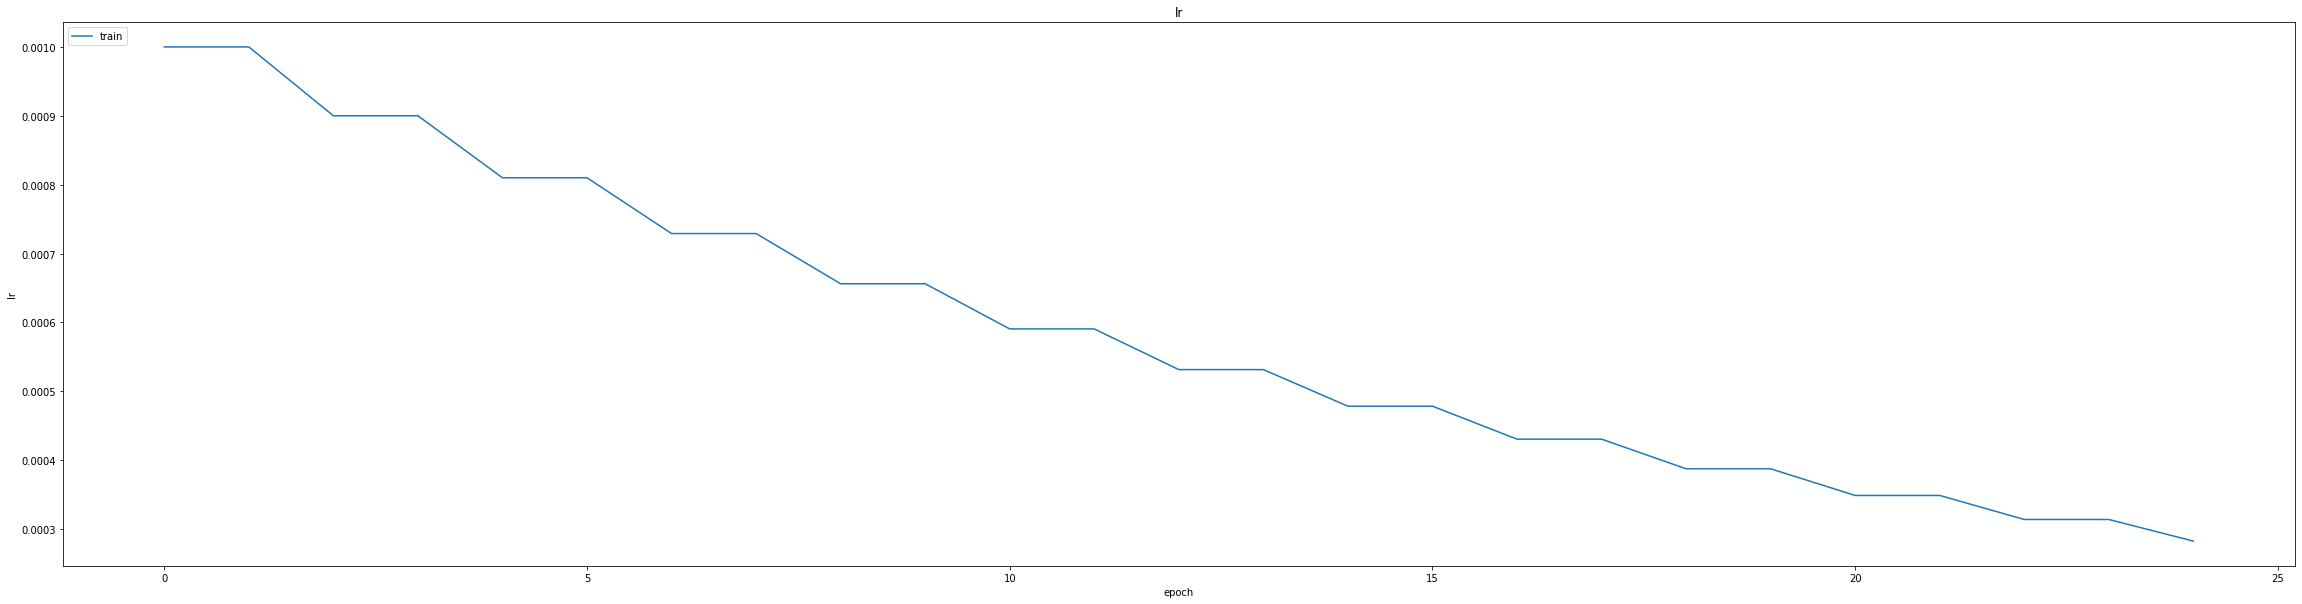

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.021351436153054237
0.023557275533676147
348/348 [==============================] - 3s 5ms/step
0.9883101049139775


348/348 [==============================] - 2s 5ms/step


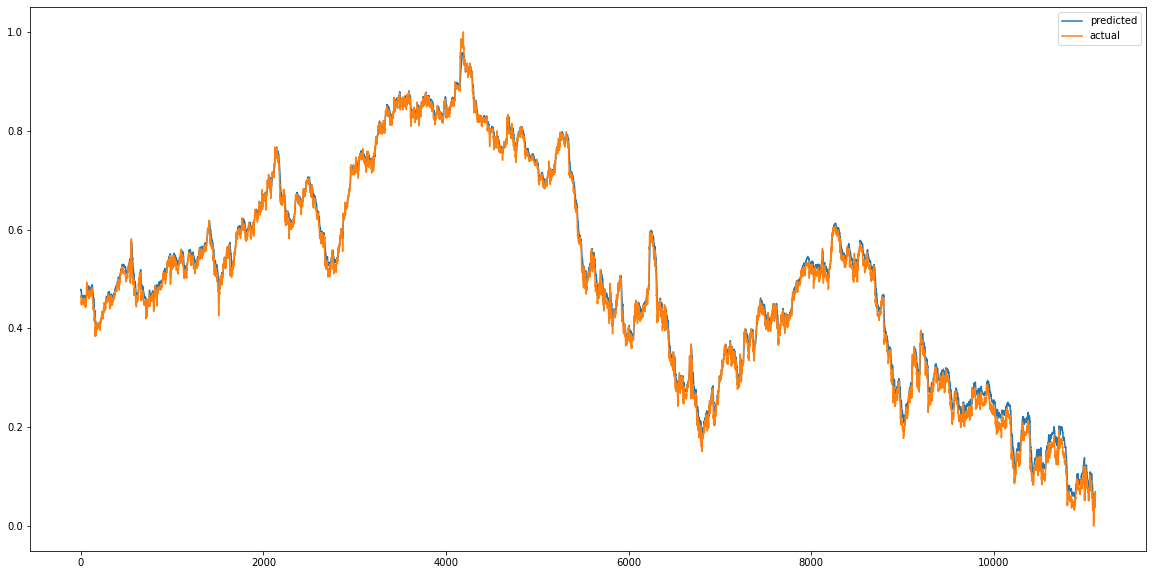

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


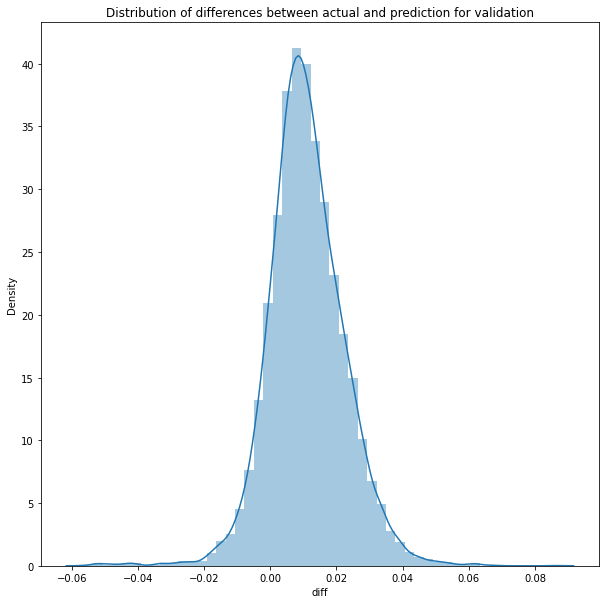

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 3ms/step


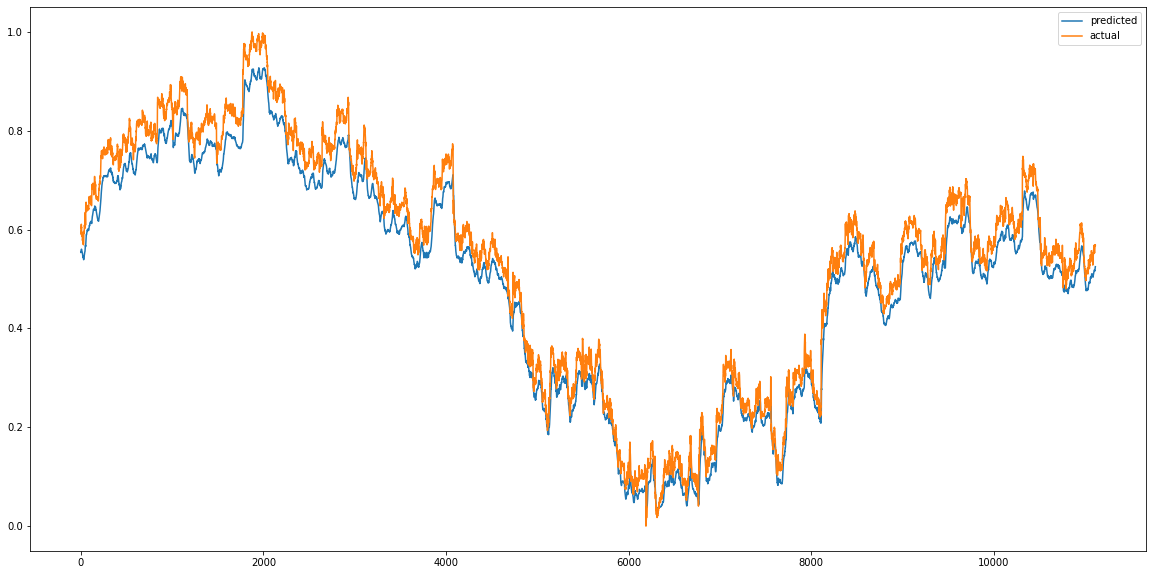

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


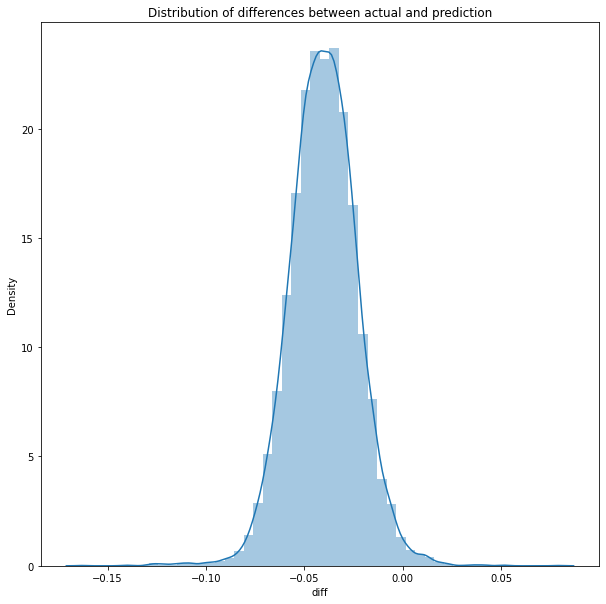

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.001912670474855951
RMSE :  0.04373408824768102
MAE :  0.04045817552756952
348/348 [==============================] - 1s 4ms/step
R2_Score  : 0.9662978743167402


count    11115.000000
mean        -0.040214
std          0.017191
min         -0.163020
25%         -0.051127
50%         -0.040229
75%         -0.029226
max          0.078824
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru_2 (GRU)                 (None, 24, 256)           247296    
                                                                 
 dropout_4 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_3 (GRU)                 (None, 64)                61824     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
401/406 [============================>.] - ETA: 0s - loss: 554.4263 - mae: 4.7829 - mse: 554.4263 - root_mean_squared_error: 23.5463 - mape: 20114.0020
Epoch 1: val_mse improved from inf to 0.15707, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 16s 30ms/step - loss: 547.7466 - mae: 4.7275 - mse: 547.7466 - root_mean_squared_error: 23.4040 - mape: 19872.2012 - val_loss: 0.1571 - val_mae: 0.3359 - val_mse: 0.1571 - val_root_mean_squared_error: 0.3963 - val_mape: 75049.2734
Epoch 2/75
403/406 [============================>.] - ETA: 0s - loss: 0.0292 - mae: 0.1202 - mse: 0.0292 - root_mean_squared_error: 0.1709 - mape: 12752.0811
Epoch 2: val_mse improved from 0.15707 to 0.04671, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 0.0291 - mae: 0.1198 - mse: 0.0291 - root_mean_squared_error: 0.1705 - mape: 12661.3789 - val_loss: 0.0467 - val_mae: 0.1624 - val_mse: 0.0467 - val_root_mean_squared_error: 0.2161 - val_mape: 53921.1836
Epoch 3/75
404/406 [============================>.] - ETA: 0s - loss: 0.0077 - mae: 0.0497 - mse: 0.0077 - root_mean_squared_error: 0.0878 - mape: 11240.4111
Epoch 3: val_mse improved from 0.04671 to 0.02186, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 10s 25ms/step - loss: 0.0077 - mae: 0.0496 - mse: 0.0077 - root_mean_squared_error: 0.0877 - mape: 11188.1123 - val_loss: 0.0219 - val_mae: 0.1001 - val_mse: 0.0219 - val_root_mean_squared_error: 0.1478 - val_mape: 43777.5078
Epoch 4/75
404/406 [============================>.] - ETA: 0s - loss: 0.0036 - mae: 0.0320 - mse: 0.0036 - root_mean_squared_error: 0.0596 - mape: 8451.9756
Epoch 4: val_mse improved from 0.02186 to 0.01308, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 0.0035 - mae: 0.0320 - mse: 0.0035 - root_mean_squared_error: 0.0595 - mape: 8412.6396 - val_loss: 0.0131 - val_mae: 0.0731 - val_mse: 0.0131 - val_root_mean_squared_error: 0.1144 - val_mape: 37953.0039
Epoch 5/75
406/406 [==============================] - ETA: 0s - loss: 0.0021 - mae: 0.0247 - mse: 0.0021 - root_mean_squared_error: 0.0461 - mape: 7504.5215
Epoch 5: val_mse improved from 0.01308 to 0.00911, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 12s 31ms/step - loss: 0.0021 - mae: 0.0247 - mse: 0.0021 - root_mean_squared_error: 0.0461 - mape: 7504.5215 - val_loss: 0.0091 - val_mae: 0.0620 - val_mse: 0.0091 - val_root_mean_squared_error: 0.0955 - val_mape: 33993.1602
Epoch 6/75
406/406 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0208 - mse: 0.0015 - root_mean_squared_error: 0.0383 - mape: 7344.0127
Epoch 6: val_mse improved from 0.00911 to 0.00667, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 10s 25ms/step - loss: 0.0015 - mae: 0.0208 - mse: 0.0015 - root_mean_squared_error: 0.0383 - mape: 7344.0127 - val_loss: 0.0067 - val_mae: 0.0531 - val_mse: 0.0067 - val_root_mean_squared_error: 0.0816 - val_mape: 30982.0996
Epoch 7/75
400/406 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0187 - mse: 0.0011 - root_mean_squared_error: 0.0331 - mape: 6462.3267
Epoch 7: val_mse improved from 0.00667 to 0.00496, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 0.0011 - mae: 0.0187 - mse: 0.0011 - root_mean_squared_error: 0.0331 - mape: 6368.6216 - val_loss: 0.0050 - val_mae: 0.0442 - val_mse: 0.0050 - val_root_mean_squared_error: 0.0704 - val_mape: 28600.0039
Epoch 8/75
404/406 [============================>.] - ETA: 0s - loss: 8.6237e-04 - mae: 0.0172 - mse: 8.6237e-04 - root_mean_squared_error: 0.0294 - mape: 5912.7578
Epoch 8: val_mse improved from 0.00496 to 0.00392, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 26ms/step - loss: 8.6132e-04 - mae: 0.0172 - mse: 8.6132e-04 - root_mean_squared_error: 0.0293 - mape: 5885.2334 - val_loss: 0.0039 - val_mae: 0.0401 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0626 - val_mape: 26565.6172
Epoch 9/75
404/406 [============================>.] - ETA: 0s - loss: 6.9198e-04 - mae: 0.0160 - mse: 6.9198e-04 - root_mean_squared_error: 0.0263 - mape: 5666.6953
Epoch 9: val_mse improved from 0.00392 to 0.00315, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 10s 26ms/step - loss: 6.9063e-04 - mae: 0.0160 - mse: 6.9063e-04 - root_mean_squared_error: 0.0263 - mape: 5640.3130 - val_loss: 0.0031 - val_mae: 0.0357 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0561 - val_mape: 24835.3320
Epoch 10/75
403/406 [============================>.] - ETA: 0s - loss: 5.6812e-04 - mae: 0.0149 - mse: 5.6812e-04 - root_mean_squared_error: 0.0238 - mape: 5209.2710
Epoch 10: val_mse improved from 0.00315 to 0.00255, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 5.6834e-04 - mae: 0.0149 - mse: 5.6834e-04 - root_mean_squared_error: 0.0238 - mape: 5172.2026 - val_loss: 0.0025 - val_mae: 0.0318 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0505 - val_mape: 23320.5625
Epoch 11/75
403/406 [============================>.] - ETA: 0s - loss: 4.8194e-04 - mae: 0.0142 - mse: 4.8194e-04 - root_mean_squared_error: 0.0220 - mape: 4864.0015
Epoch 11: val_mse improved from 0.00255 to 0.00214, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 4.8099e-04 - mae: 0.0142 - mse: 4.8099e-04 - root_mean_squared_error: 0.0219 - mape: 4829.3809 - val_loss: 0.0021 - val_mae: 0.0294 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0463 - val_mape: 22000.3398
Epoch 12/75
403/406 [============================>.] - ETA: 0s - loss: 4.0877e-04 - mae: 0.0133 - mse: 4.0877e-04 - root_mean_squared_error: 0.0202 - mape: 4642.9629
Epoch 12: val_mse improved from 0.00214 to 0.00186, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 4.0871e-04 - mae: 0.0133 - mse: 4.0871e-04 - root_mean_squared_error: 0.0202 - mape: 4609.9194 - val_loss: 0.0019 - val_mae: 0.0280 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0431 - val_mape: 20825.1387
Epoch 13/75
404/406 [============================>.] - ETA: 0s - loss: 3.5457e-04 - mae: 0.0127 - mse: 3.5457e-04 - root_mean_squared_error: 0.0188 - mape: 4425.7290
Epoch 13: val_mse improved from 0.00186 to 0.00159, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 10s 26ms/step - loss: 3.5421e-04 - mae: 0.0126 - mse: 3.5421e-04 - root_mean_squared_error: 0.0188 - mape: 4405.1250 - val_loss: 0.0016 - val_mae: 0.0261 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0399 - val_mape: 19770.6016
Epoch 14/75
402/406 [============================>.] - ETA: 0s - loss: 3.0842e-04 - mae: 0.0119 - mse: 3.0842e-04 - root_mean_squared_error: 0.0176 - mape: 4283.5508
Epoch 14: val_mse improved from 0.00159 to 0.00149, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 3.0870e-04 - mae: 0.0119 - mse: 3.0870e-04 - root_mean_squared_error: 0.0176 - mape: 4242.5215 - val_loss: 0.0015 - val_mae: 0.0265 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0386 - val_mape: 18831.0703
Epoch 15/75
403/406 [============================>.] - ETA: 0s - loss: 2.6877e-04 - mae: 0.0113 - mse: 2.6877e-04 - root_mean_squared_error: 0.0164 - mape: 4109.0874
Epoch 15: val_mse improved from 0.00149 to 0.00130, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 26ms/step - loss: 2.6876e-04 - mae: 0.0113 - mse: 2.6876e-04 - root_mean_squared_error: 0.0164 - mape: 4079.8435 - val_loss: 0.0013 - val_mae: 0.0247 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0360 - val_mape: 17990.7734
Epoch 16/75
401/406 [============================>.] - ETA: 0s - loss: 2.4292e-04 - mae: 0.0108 - mse: 2.4292e-04 - root_mean_squared_error: 0.0156 - mape: 3783.6472
Epoch 16: val_mse improved from 0.00130 to 0.00114, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 10s 25ms/step - loss: 2.4312e-04 - mae: 0.0108 - mse: 2.4312e-04 - root_mean_squared_error: 0.0156 - mape: 3738.0911 - val_loss: 0.0011 - val_mae: 0.0230 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0337 - val_mape: 17285.1406
Epoch 17/75
404/406 [============================>.] - ETA: 0s - loss: 2.2010e-04 - mae: 0.0104 - mse: 2.2010e-04 - root_mean_squared_error: 0.0148 - mape: 3724.0232
Epoch 17: val_mse improved from 0.00114 to 0.00104, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 2.2039e-04 - mae: 0.0104 - mse: 2.2039e-04 - root_mean_squared_error: 0.0148 - mape: 3706.6904 - val_loss: 0.0010 - val_mae: 0.0221 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0322 - val_mape: 16645.8086
Epoch 18/75
403/406 [============================>.] - ETA: 0s - loss: 2.0394e-04 - mae: 0.0101 - mse: 2.0394e-04 - root_mean_squared_error: 0.0143 - mape: 3543.9509
Epoch 18: val_mse improved from 0.00104 to 0.00099, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 26ms/step - loss: 2.0374e-04 - mae: 0.0101 - mse: 2.0374e-04 - root_mean_squared_error: 0.0143 - mape: 3518.7251 - val_loss: 9.9239e-04 - val_mae: 0.0222 - val_mse: 9.9239e-04 - val_root_mean_squared_error: 0.0315 - val_mape: 16057.9902
Epoch 19/75
400/406 [============================>.] - ETA: 0s - loss: 1.8807e-04 - mae: 0.0098 - mse: 1.8807e-04 - root_mean_squared_error: 0.0137 - mape: 3461.5403
Epoch 19: val_mse improved from 0.00099 to 0.00086, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 26ms/step - loss: 1.8784e-04 - mae: 0.0098 - mse: 1.8784e-04 - root_mean_squared_error: 0.0137 - mape: 3411.3301 - val_loss: 8.6322e-04 - val_mae: 0.0204 - val_mse: 8.6322e-04 - val_root_mean_squared_error: 0.0294 - val_mape: 15543.8975
Epoch 20/75
403/406 [============================>.] - ETA: 0s - loss: 1.7445e-04 - mae: 0.0095 - mse: 1.7445e-04 - root_mean_squared_error: 0.0132 - mape: 3361.1936
Epoch 20: val_mse improved from 0.00086 to 0.00077, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 1.7434e-04 - mae: 0.0095 - mse: 1.7434e-04 - root_mean_squared_error: 0.0132 - mape: 3337.2708 - val_loss: 7.7453e-04 - val_mae: 0.0192 - val_mse: 7.7453e-04 - val_root_mean_squared_error: 0.0278 - val_mape: 15074.3047
Epoch 21/75
402/406 [============================>.] - ETA: 0s - loss: 1.6126e-04 - mae: 0.0092 - mse: 1.6126e-04 - root_mean_squared_error: 0.0127 - mape: 3190.8281
Epoch 21: val_mse improved from 0.00077 to 0.00070, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 1.6121e-04 - mae: 0.0092 - mse: 1.6121e-04 - root_mean_squared_error: 0.0127 - mape: 3160.2612 - val_loss: 7.0160e-04 - val_mae: 0.0180 - val_mse: 7.0160e-04 - val_root_mean_squared_error: 0.0265 - val_mape: 14665.5654
Epoch 22/75
401/406 [============================>.] - ETA: 0s - loss: 1.4562e-04 - mae: 0.0088 - mse: 1.4562e-04 - root_mean_squared_error: 0.0121 - mape: 3066.1882
Epoch 22: val_mse improved from 0.00070 to 0.00070, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 10s 26ms/step - loss: 1.4612e-04 - mae: 0.0088 - mse: 1.4612e-04 - root_mean_squared_error: 0.0121 - mape: 3029.2773 - val_loss: 6.9980e-04 - val_mae: 0.0190 - val_mse: 6.9980e-04 - val_root_mean_squared_error: 0.0265 - val_mape: 14104.4023
Epoch 23/75
400/406 [============================>.] - ETA: 0s - loss: 1.3588e-04 - mae: 0.0085 - mse: 1.3588e-04 - root_mean_squared_error: 0.0117 - mape: 2979.5046
Epoch 23: val_mse improved from 0.00070 to 0.00065, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 1.3568e-04 - mae: 0.0085 - mse: 1.3568e-04 - root_mean_squared_error: 0.0116 - mape: 2936.2864 - val_loss: 6.4919e-04 - val_mae: 0.0185 - val_mse: 6.4919e-04 - val_root_mean_squared_error: 0.0255 - val_mape: 13495.4756
Epoch 24/75
406/406 [==============================] - ETA: 0s - loss: 1.2528e-04 - mae: 0.0083 - mse: 1.2528e-04 - root_mean_squared_error: 0.0112 - mape: 2844.5723
Epoch 24: val_mse improved from 0.00065 to 0.00056, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 1.2528e-04 - mae: 0.0083 - mse: 1.2528e-04 - root_mean_squared_error: 0.0112 - mape: 2844.5723 - val_loss: 5.6209e-04 - val_mae: 0.0171 - val_mse: 5.6209e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 12992.6650
Epoch 25/75
403/406 [============================>.] - ETA: 0s - loss: 1.1713e-04 - mae: 0.0080 - mse: 1.1713e-04 - root_mean_squared_error: 0.0108 - mape: 2836.6138
Epoch 25: val_mse improved from 0.00056 to 0.00050, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 10s 26ms/step - loss: 1.1710e-04 - mae: 0.0080 - mse: 1.1710e-04 - root_mean_squared_error: 0.0108 - mape: 2816.4221 - val_loss: 5.0243e-04 - val_mae: 0.0159 - val_mse: 5.0243e-04 - val_root_mean_squared_error: 0.0224 - val_mape: 12461.4160
Epoch 26/75
401/406 [============================>.] - ETA: 0s - loss: 1.1142e-04 - mae: 0.0079 - mse: 1.1142e-04 - root_mean_squared_error: 0.0106 - mape: 2731.2656
Epoch 26: val_mse did not improve from 0.00050
406/406 [==============================] - 4s 9ms/step - loss: 1.1135e-04 - mae: 0.0079 - mse: 1.1135e-04 - root_mean_squared_error: 0.0106 - mape: 2698.3728 - val_loss: 5.5938e-04 - val_mae: 0.0177 - val_mse: 5.5938e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 12119.7500
Epoch 27/75
405/406 [============================>.] - ETA: 0s - loss: 9.8812e-05 - mae: 0.0074 - mse: 9.8812e-05 - root_mean_squared_error: 0.0099 - mape: 2660.5012
Epoch 27: val_mse improved from 0.00050 to 0.00047, sav

406/406 [==============================] - 11s 26ms/step - loss: 9.8744e-05 - mae: 0.0074 - mse: 9.8744e-05 - root_mean_squared_error: 0.0099 - mape: 2654.6660 - val_loss: 4.6714e-04 - val_mae: 0.0158 - val_mse: 4.6714e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 11738.1123
Epoch 28/75
405/406 [============================>.] - ETA: 0s - loss: 9.5338e-05 - mae: 0.0073 - mse: 9.5338e-05 - root_mean_squared_error: 0.0098 - mape: 2524.0349
Epoch 28: val_mse improved from 0.00047 to 0.00044, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 26ms/step - loss: 9.5339e-05 - mae: 0.0073 - mse: 9.5339e-05 - root_mean_squared_error: 0.0098 - mape: 2518.5005 - val_loss: 4.3839e-04 - val_mae: 0.0152 - val_mse: 4.3839e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 11497.2656
Epoch 29/75
401/406 [============================>.] - ETA: 0s - loss: 8.7395e-05 - mae: 0.0070 - mse: 8.7395e-05 - root_mean_squared_error: 0.0093 - mape: 2493.7363
Epoch 29: val_mse did not improve from 0.00044
406/406 [==============================] - 4s 9ms/step - loss: 8.7379e-05 - mae: 0.0070 - mse: 8.7379e-05 - root_mean_squared_error: 0.0093 - mape: 2463.7034 - val_loss: 4.9206e-04 - val_mae: 0.0171 - val_mse: 4.9206e-04 - val_root_mean_squared_error: 0.0222 - val_mape: 11086.9922
Epoch 30/75
404/406 [============================>.] - ETA: 0s - loss: 8.3793e-05 - mae: 0.0069 - mse: 8.3793e-05 - root_mean_squared_error: 0.0092 - mape: 2413.9243
Epoch 30: val_mse improved from 0.00044 to 0.00039, sav

406/406 [==============================] - 11s 26ms/step - loss: 8.3671e-05 - mae: 0.0069 - mse: 8.3671e-05 - root_mean_squared_error: 0.0091 - mape: 2402.6851 - val_loss: 3.8967e-04 - val_mae: 0.0144 - val_mse: 3.8967e-04 - val_root_mean_squared_error: 0.0197 - val_mape: 10863.1924
Epoch 31/75
406/406 [==============================] - ETA: 0s - loss: 7.7271e-05 - mae: 0.0066 - mse: 7.7271e-05 - root_mean_squared_error: 0.0088 - mape: 2342.8848
Epoch 31: val_mse improved from 0.00039 to 0.00037, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 10s 26ms/step - loss: 7.7271e-05 - mae: 0.0066 - mse: 7.7271e-05 - root_mean_squared_error: 0.0088 - mape: 2342.8848 - val_loss: 3.6521e-04 - val_mae: 0.0138 - val_mse: 3.6521e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 10569.4443
Epoch 32/75
403/406 [============================>.] - ETA: 0s - loss: 7.4741e-05 - mae: 0.0065 - mse: 7.4741e-05 - root_mean_squared_error: 0.0086 - mape: 2229.5662
Epoch 32: val_mse did not improve from 0.00037
406/406 [==============================] - 4s 10ms/step - loss: 7.4717e-05 - mae: 0.0065 - mse: 7.4717e-05 - root_mean_squared_error: 0.0086 - mape: 2213.6970 - val_loss: 3.7678e-04 - val_mae: 0.0145 - val_mse: 3.7678e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 10270.5371
Epoch 33/75
405/406 [============================>.] - ETA: 0s - loss: 7.0316e-05 - mae: 0.0063 - mse: 7.0316e-05 - root_mean_squared_error: 0.0084 - mape: 2249.3674
Epoch 33: val_mse improved from 0.00037 to 0.00036, sa

406/406 [==============================] - 11s 26ms/step - loss: 7.0316e-05 - mae: 0.0063 - mse: 7.0316e-05 - root_mean_squared_error: 0.0084 - mape: 2244.4348 - val_loss: 3.5544e-04 - val_mae: 0.0138 - val_mse: 3.5544e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 10131.5244
Epoch 34/75
405/406 [============================>.] - ETA: 0s - loss: 6.5516e-05 - mae: 0.0061 - mse: 6.5516e-05 - root_mean_squared_error: 0.0081 - mape: 2128.2222
Epoch 34: val_mse improved from 0.00036 to 0.00033, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 6.5510e-05 - mae: 0.0061 - mse: 6.5510e-05 - root_mean_squared_error: 0.0081 - mape: 2123.5554 - val_loss: 3.3017e-04 - val_mae: 0.0135 - val_mse: 3.3017e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 9820.6592
Epoch 35/75
403/406 [============================>.] - ETA: 0s - loss: 6.2278e-05 - mae: 0.0060 - mse: 6.2278e-05 - root_mean_squared_error: 0.0079 - mape: 2128.2800
Epoch 35: val_mse improved from 0.00033 to 0.00031, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 26ms/step - loss: 6.2156e-05 - mae: 0.0060 - mse: 6.2156e-05 - root_mean_squared_error: 0.0079 - mape: 2113.1299 - val_loss: 3.1253e-04 - val_mae: 0.0129 - val_mse: 3.1253e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 9645.0264
Epoch 36/75
404/406 [============================>.] - ETA: 0s - loss: 5.8639e-05 - mae: 0.0058 - mse: 5.8639e-05 - root_mean_squared_error: 0.0077 - mape: 2048.2029
Epoch 36: val_mse improved from 0.00031 to 0.00028, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 5.8575e-05 - mae: 0.0058 - mse: 5.8575e-05 - root_mean_squared_error: 0.0077 - mape: 2038.6669 - val_loss: 2.8117e-04 - val_mae: 0.0122 - val_mse: 2.8117e-04 - val_root_mean_squared_error: 0.0168 - val_mape: 9340.2852
Epoch 37/75
400/406 [============================>.] - ETA: 0s - loss: 5.6586e-05 - mae: 0.0057 - mse: 5.6586e-05 - root_mean_squared_error: 0.0075 - mape: 2039.3773
Epoch 37: val_mse improved from 0.00028 to 0.00026, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 26ms/step - loss: 5.6504e-05 - mae: 0.0057 - mse: 5.6504e-05 - root_mean_squared_error: 0.0075 - mape: 2009.7959 - val_loss: 2.6460e-04 - val_mae: 0.0118 - val_mse: 2.6460e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 9156.9561
Epoch 38/75
404/406 [============================>.] - ETA: 0s - loss: 5.5051e-05 - mae: 0.0056 - mse: 5.5051e-05 - root_mean_squared_error: 0.0074 - mape: 2043.4399
Epoch 38: val_mse improved from 0.00026 to 0.00026, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 5.5017e-05 - mae: 0.0056 - mse: 5.5017e-05 - root_mean_squared_error: 0.0074 - mape: 2033.9261 - val_loss: 2.5574e-04 - val_mae: 0.0117 - val_mse: 2.5574e-04 - val_root_mean_squared_error: 0.0160 - val_mape: 9033.4258
Epoch 39/75
404/406 [============================>.] - ETA: 0s - loss: 4.9373e-05 - mae: 0.0053 - mse: 4.9373e-05 - root_mean_squared_error: 0.0070 - mape: 1938.8042
Epoch 39: val_mse improved from 0.00026 to 0.00024, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 10s 26ms/step - loss: 4.9413e-05 - mae: 0.0053 - mse: 4.9413e-05 - root_mean_squared_error: 0.0070 - mape: 1929.7782 - val_loss: 2.3652e-04 - val_mae: 0.0111 - val_mse: 2.3652e-04 - val_root_mean_squared_error: 0.0154 - val_mape: 8825.6582
Epoch 40/75
406/406 [==============================] - ETA: 0s - loss: 5.1670e-05 - mae: 0.0054 - mse: 5.1670e-05 - root_mean_squared_error: 0.0072 - mape: 1909.4756
Epoch 40: val_mse did not improve from 0.00024
406/406 [==============================] - 4s 10ms/step - loss: 5.1670e-05 - mae: 0.0054 - mse: 5.1670e-05 - root_mean_squared_error: 0.0072 - mape: 1909.4756 - val_loss: 2.3664e-04 - val_mae: 0.0112 - val_mse: 2.3664e-04 - val_root_mean_squared_error: 0.0154 - val_mape: 8633.0918
Epoch 41/75
404/406 [============================>.] - ETA: 0s - loss: 4.8600e-05 - mae: 0.0053 - mse: 4.8600e-05 - root_mean_squared_error: 0.0070 - mape: 1849.3849
Epoch 41: val_mse did not improve from 0.00024
406/406 [

406/406 [==============================] - 11s 27ms/step - loss: 5.0340e-05 - mae: 0.0054 - mse: 5.0340e-05 - root_mean_squared_error: 0.0071 - mape: 1798.6276 - val_loss: 2.2917e-04 - val_mae: 0.0111 - val_mse: 2.2917e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 8308.5234
Epoch 43/75
405/406 [============================>.] - ETA: 0s - loss: 4.6341e-05 - mae: 0.0052 - mse: 4.6341e-05 - root_mean_squared_error: 0.0068 - mape: 1783.4701
Epoch 43: val_mse improved from 0.00023 to 0.00023, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 4.6321e-05 - mae: 0.0052 - mse: 4.6321e-05 - root_mean_squared_error: 0.0068 - mape: 1779.5587 - val_loss: 2.2534e-04 - val_mae: 0.0110 - val_mse: 2.2534e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 8127.4062
Epoch 44/75
404/406 [============================>.] - ETA: 0s - loss: 4.8435e-05 - mae: 0.0053 - mse: 4.8435e-05 - root_mean_squared_error: 0.0070 - mape: 1778.1584
Epoch 44: val_mse did not improve from 0.00023
406/406 [==============================] - 4s 10ms/step - loss: 4.8436e-05 - mae: 0.0053 - mse: 4.8436e-05 - root_mean_squared_error: 0.0070 - mape: 1769.8805 - val_loss: 2.8368e-04 - val_mae: 0.0131 - val_mse: 2.8368e-04 - val_root_mean_squared_error: 0.0168 - val_mape: 7983.2109
Epoch 45/75
403/406 [============================>.] - ETA: 0s - loss: 4.4559e-05 - mae: 0.0051 - mse: 4.4559e-05 - root_mean_squared_error: 0.0067 - mape: 1730.2300
Epoch 45: val_mse did not improve from 0.00023
406/406 [

406/406 [==============================] - 10s 25ms/step - loss: 4.9825e-05 - mae: 0.0054 - mse: 4.9825e-05 - root_mean_squared_error: 0.0071 - mape: 1385.6132 - val_loss: 2.1291e-04 - val_mae: 0.0110 - val_mse: 2.1291e-04 - val_root_mean_squared_error: 0.0146 - val_mape: 6358.6270
Epoch 53/75
405/406 [============================>.] - ETA: 0s - loss: 5.6330e-05 - mae: 0.0058 - mse: 5.6330e-05 - root_mean_squared_error: 0.0075 - mape: 1383.3878
Epoch 53: val_mse did not improve from 0.00021
406/406 [==============================] - 4s 9ms/step - loss: 5.6359e-05 - mae: 0.0058 - mse: 5.6359e-05 - root_mean_squared_error: 0.0075 - mape: 1380.3550 - val_loss: 3.7566e-04 - val_mae: 0.0164 - val_mse: 3.7566e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 6564.0186
Epoch 54/75
405/406 [============================>.] - ETA: 0s - loss: 4.4857e-05 - mae: 0.0052 - mse: 4.4857e-05 - root_mean_squared_error: 0.0067 - mape: 1361.5364
Epoch 54: val_mse did not improve from 0.00021
406/406 [=

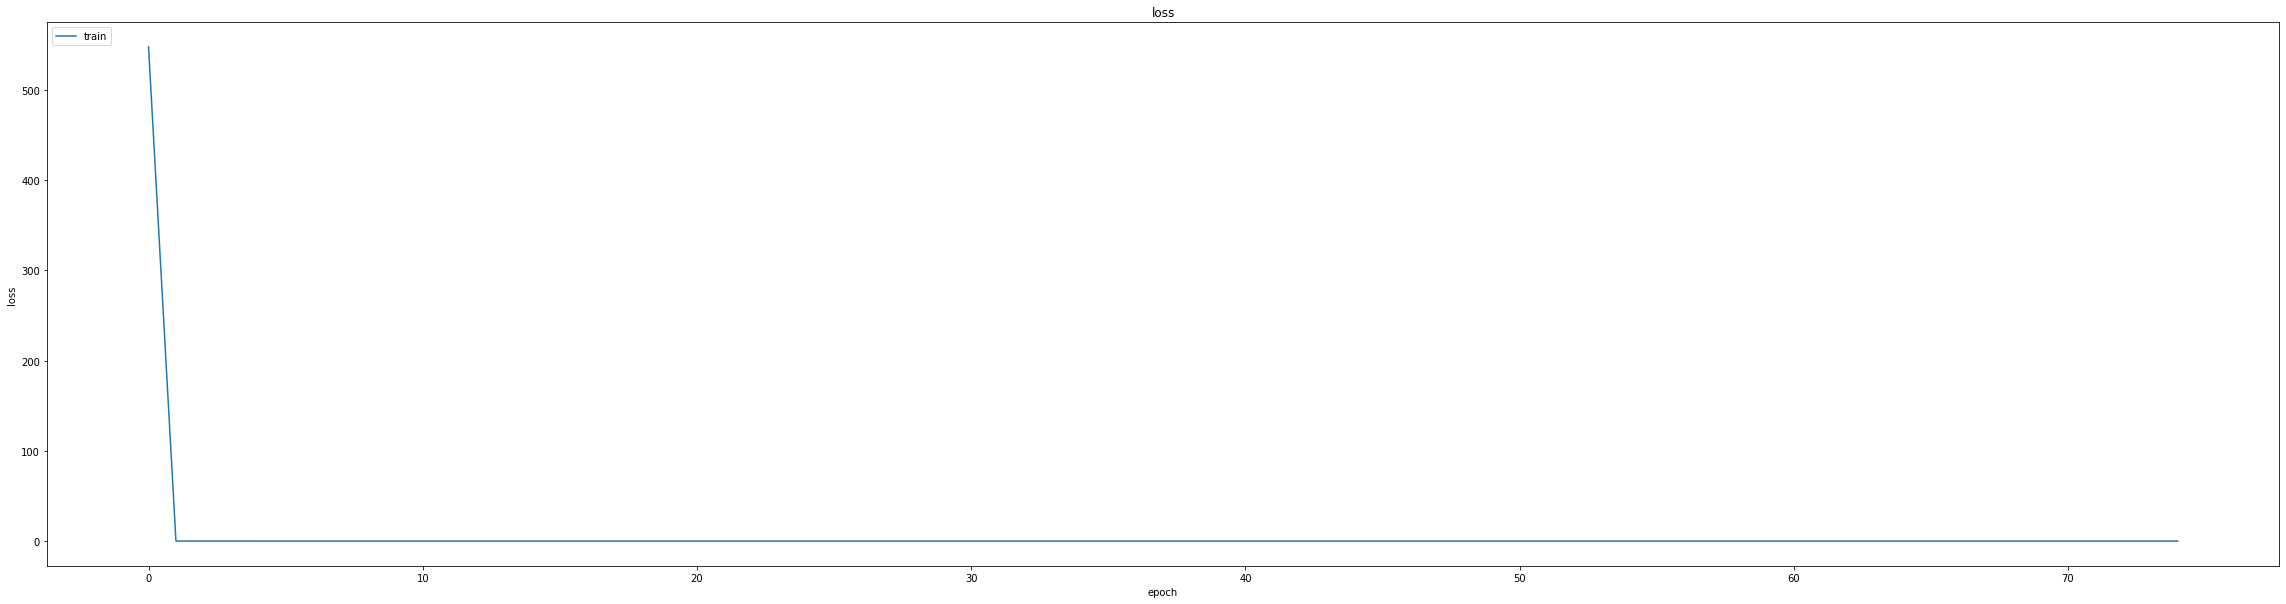

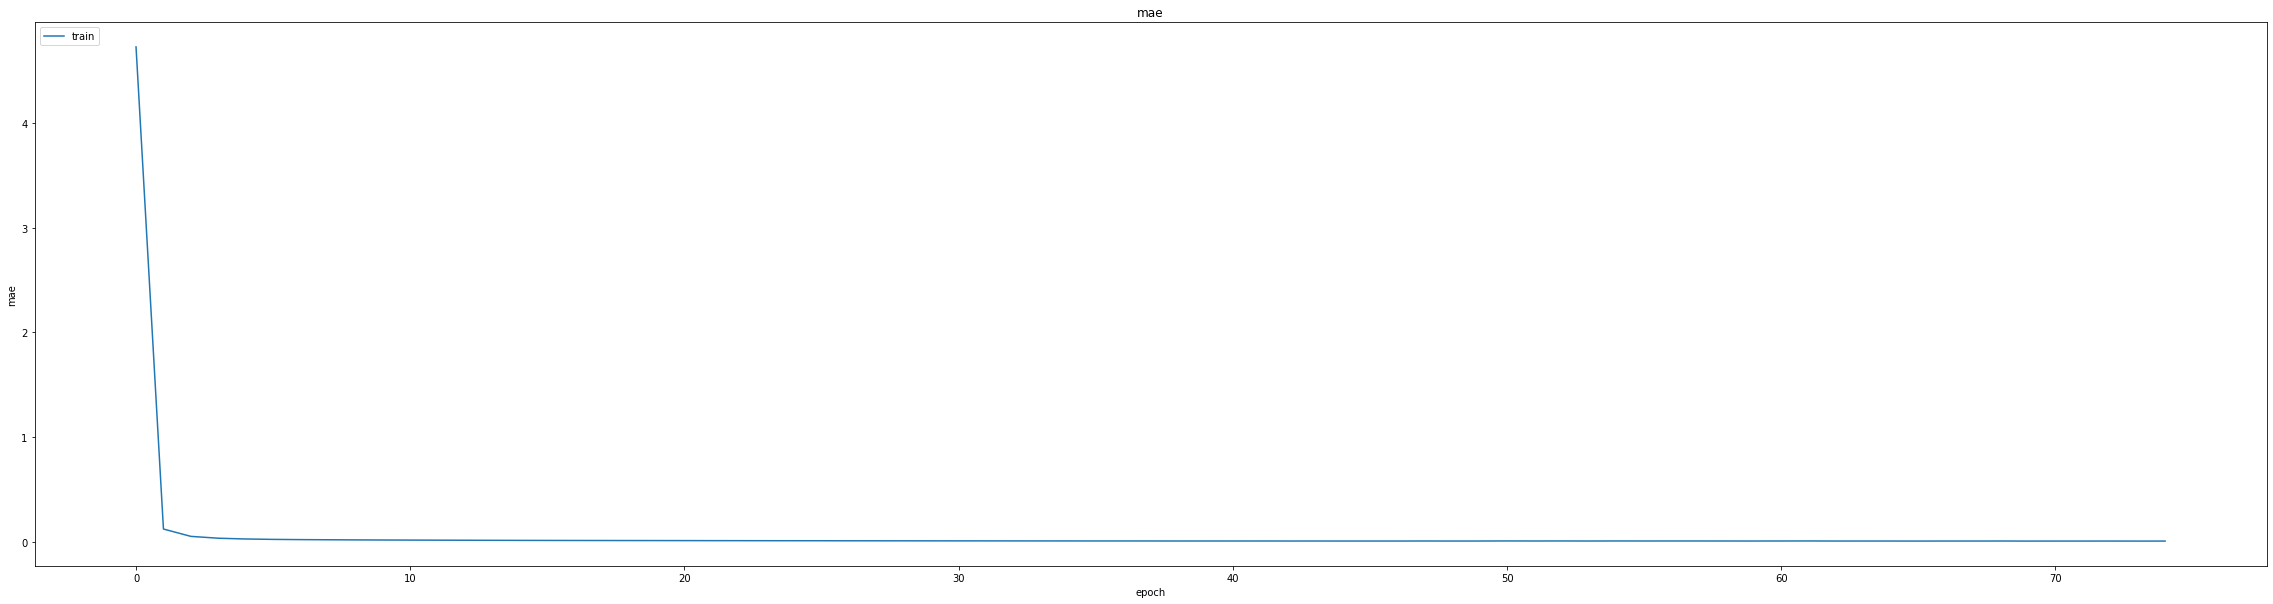

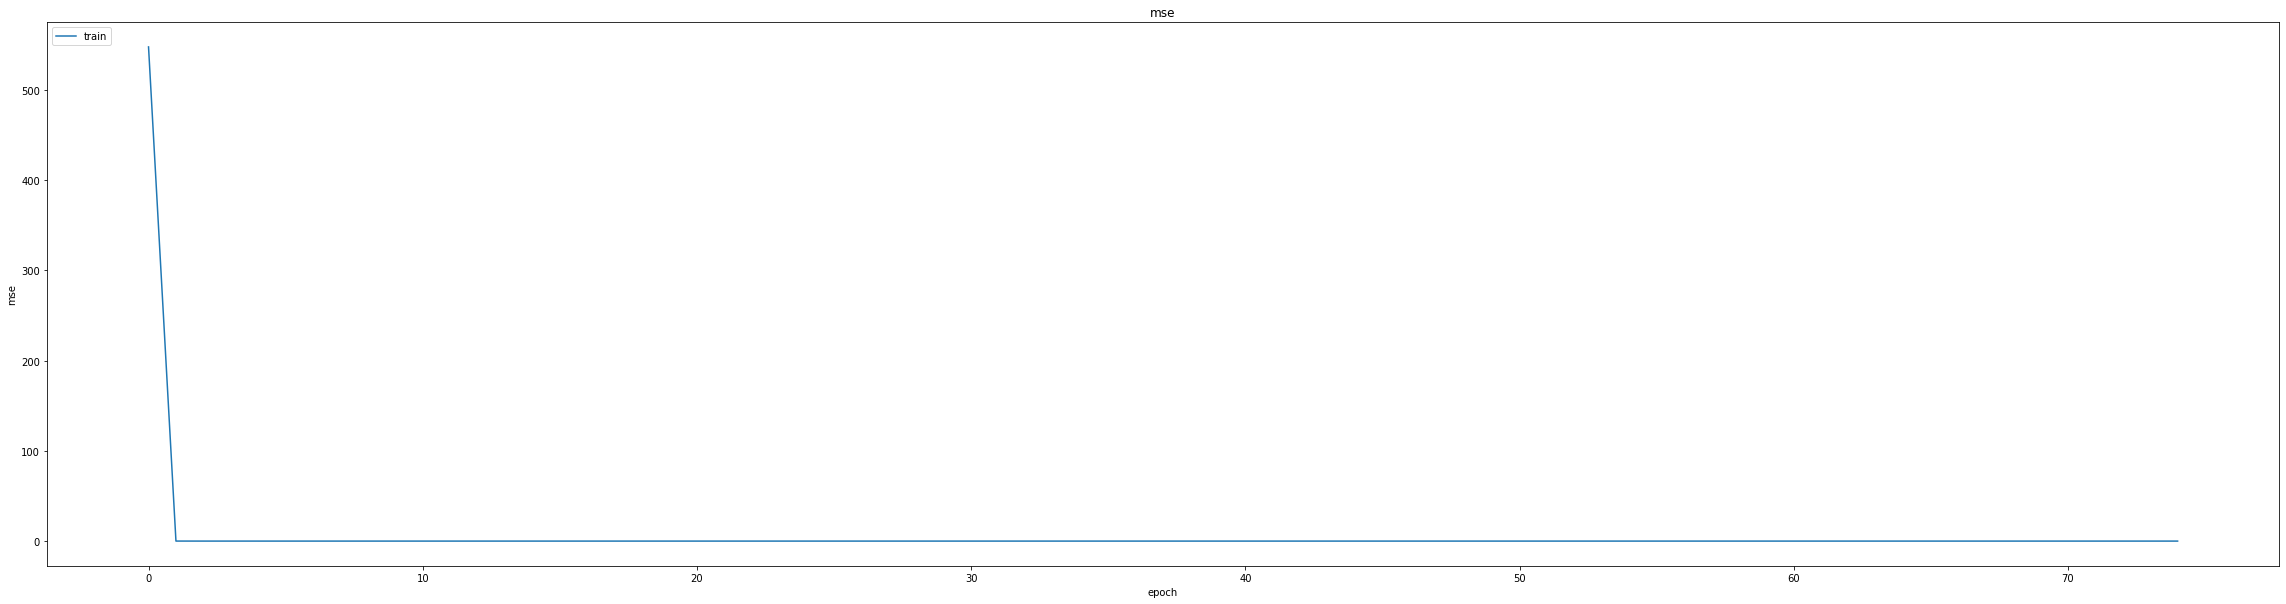

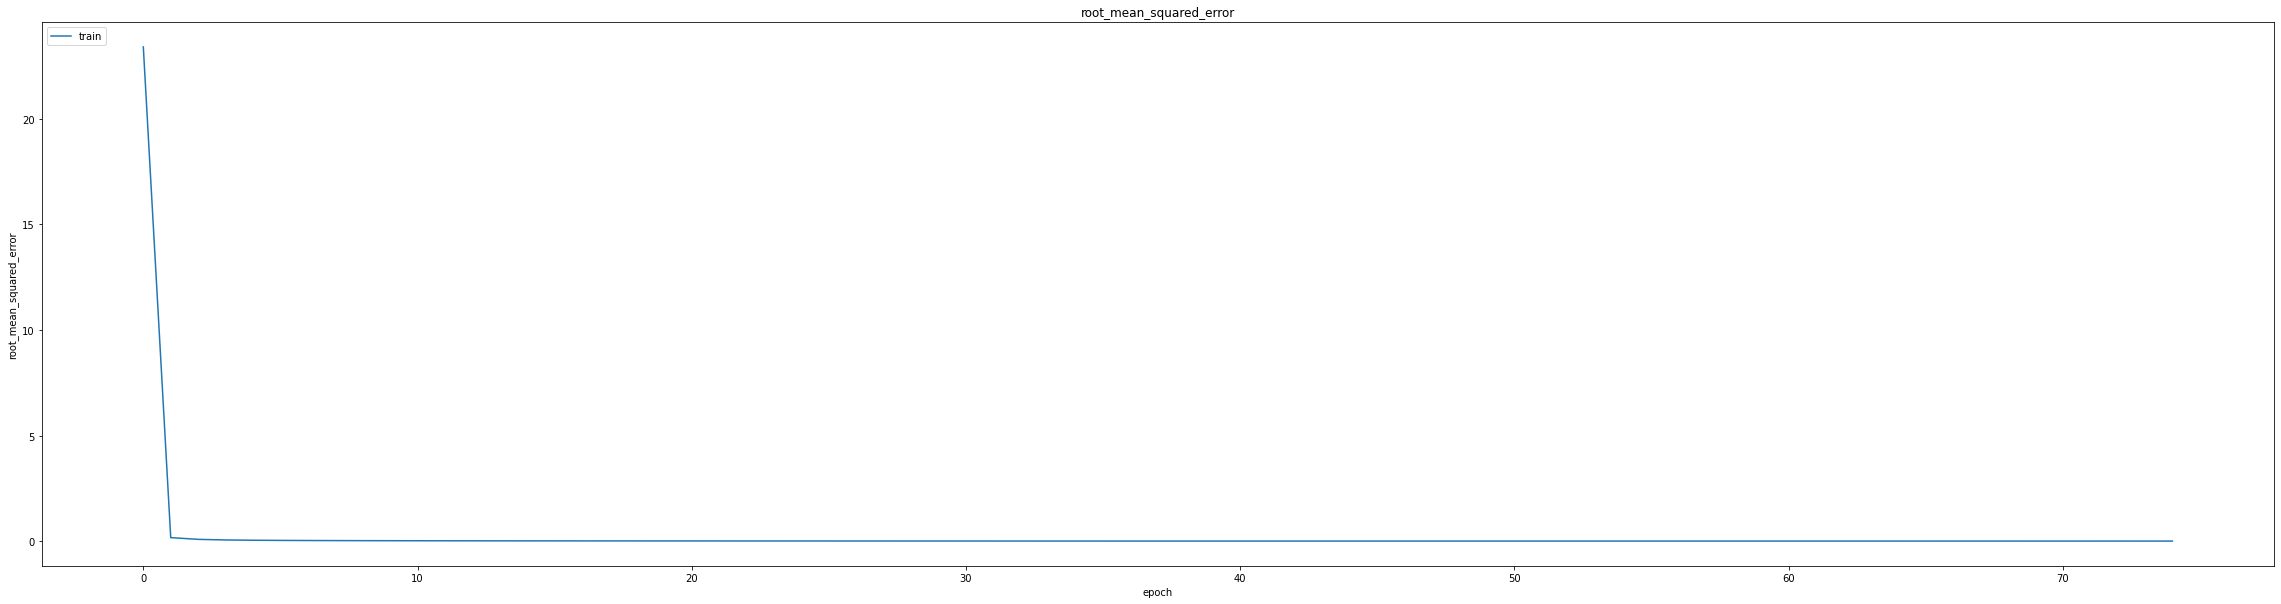

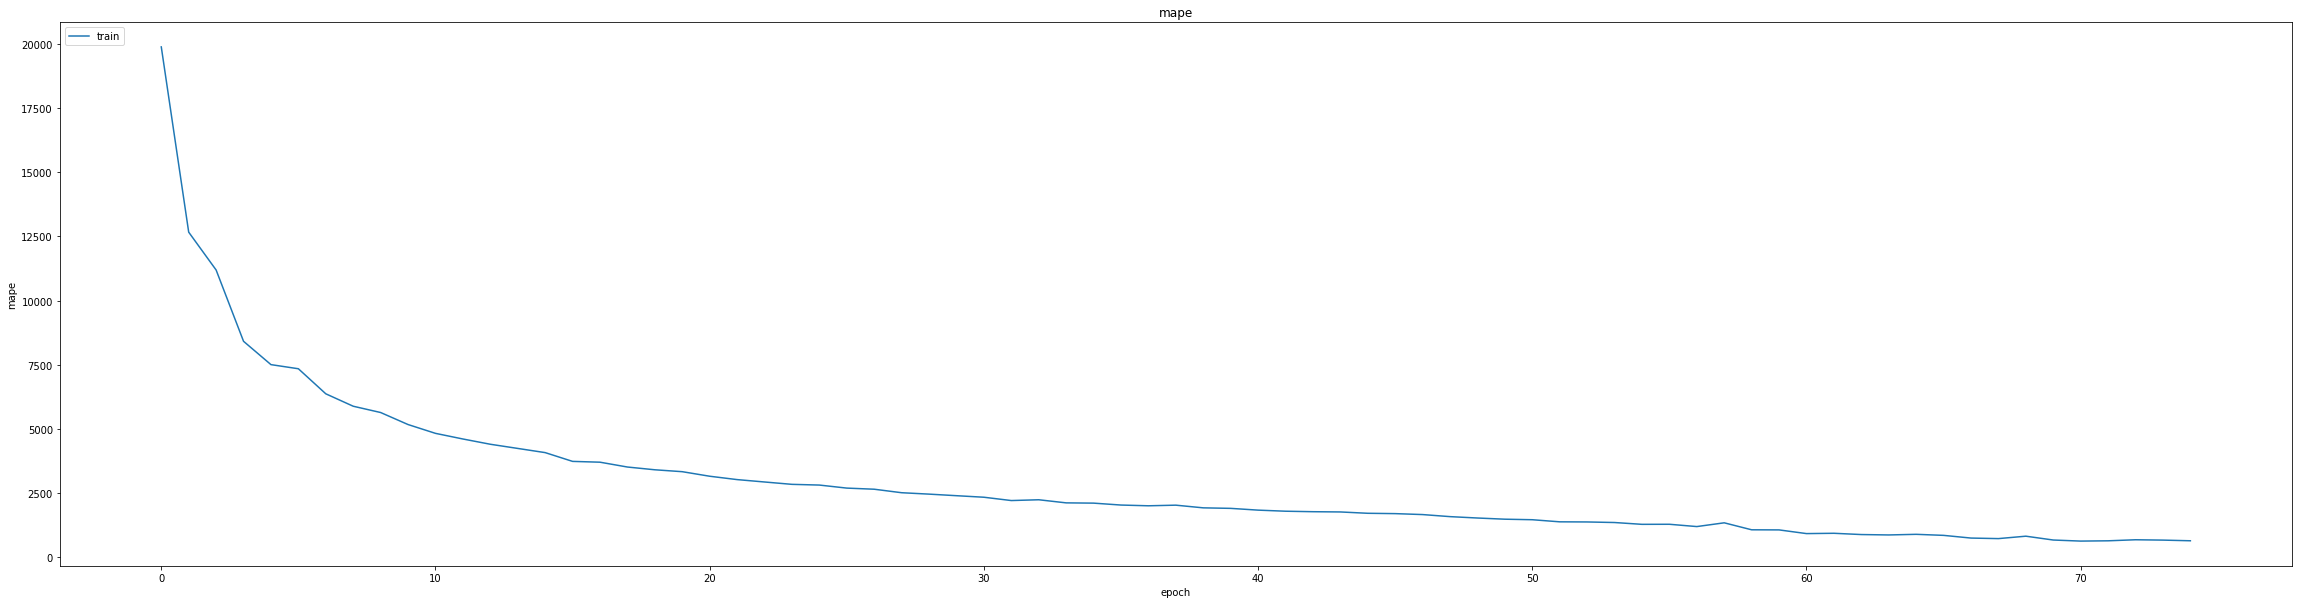

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.010951537638902664
0.014591367915272713
348/348 [==============================] - 2s 3ms/step
0.9920195327489074


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25


400/406 [============================>.] - ETA: 0s - loss: 8.7726e-04 - mae: 0.0110 - mse: 8.7726e-04 - root_mean_squared_error: 0.0296 - mape: 1494.6112
Epoch 1: val_mse did not improve from 0.00021
406/406 [==============================] - 8s 11ms/step - loss: 8.6503e-04 - mae: 0.0109 - mse: 8.6503e-04 - root_mean_squared_error: 0.0294 - mape: 1472.9323 - val_loss: 4.8161e-04 - val_mae: 0.0184 - val_mse: 4.8161e-04 - val_root_mean_squared_error: 0.0219 - val_mape: 6960.4048 - lr: 0.0010
Epoch 2/25
406/406 [==============================] - ETA: 0s - loss: 2.9324e-05 - mae: 0.0041 - mse: 2.9324e-05 - root_mean_squared_error: 0.0054 - mape: 1319.4623
Epoch 2: val_mse did not improve from 0.00021
406/406 [==============================] - 4s 9ms/step - loss: 2.9324e-05 - mae: 0.0041 - mse: 2.9324e-05 - root_mean_squared_error: 0.0054 - mape: 1319.4623 - val_loss: 3.8051e-04 - val_mae: 0.0164 - val_mse: 3.8051e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 6074.0591 - lr: 0.0010


406/406 [==============================] - 11s 27ms/step - loss: 2.6999e-05 - mae: 0.0040 - mse: 2.6999e-05 - root_mean_squared_error: 0.0052 - mape: 820.0245 - val_loss: 1.9036e-04 - val_mae: 0.0104 - val_mse: 1.9036e-04 - val_root_mean_squared_error: 0.0138 - val_mape: 4006.8862 - lr: 6.5610e-04
Epoch 10/25
404/406 [============================>.] - ETA: 0s - loss: 3.1505e-05 - mae: 0.0044 - mse: 3.1505e-05 - root_mean_squared_error: 0.0056 - mape: 825.0394
Epoch 10: val_mse did not improve from 0.00019
406/406 [==============================] - 4s 9ms/step - loss: 3.1476e-05 - mae: 0.0044 - mse: 3.1476e-05 - root_mean_squared_error: 0.0056 - mape: 821.1995 - val_loss: 4.6345e-04 - val_mae: 0.0193 - val_mse: 4.6345e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 3866.5042 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
404/406 [============================>.] - ETA: 0s - loss: 2.4047e-05 - mae: 0.0038 - mse: 2.4047e-05 - root_mean_squared_error: 0.0049 - mape: 

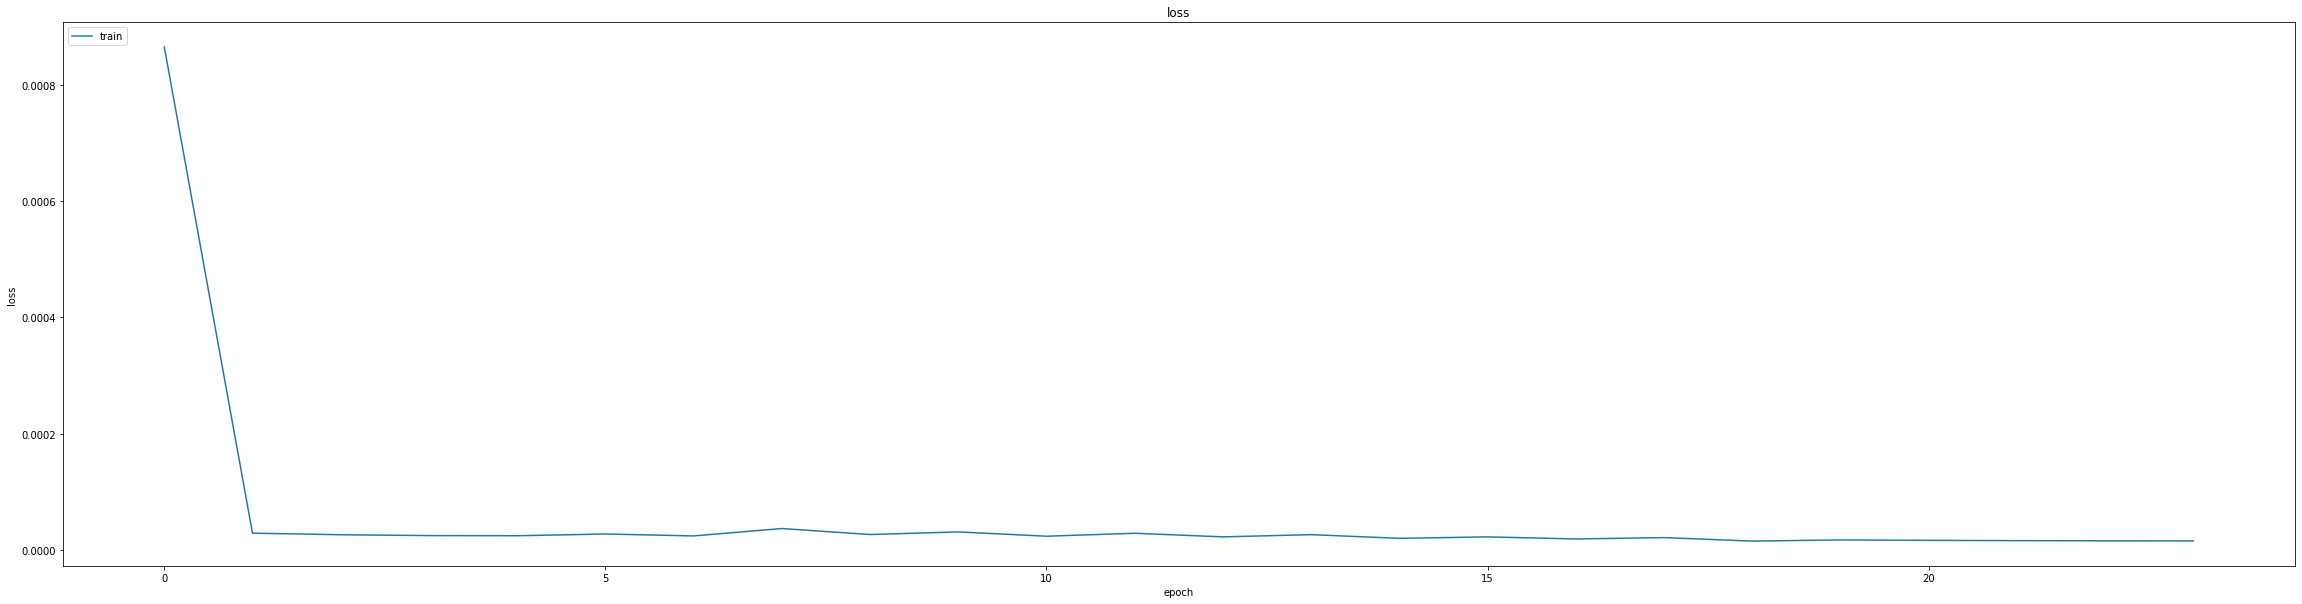

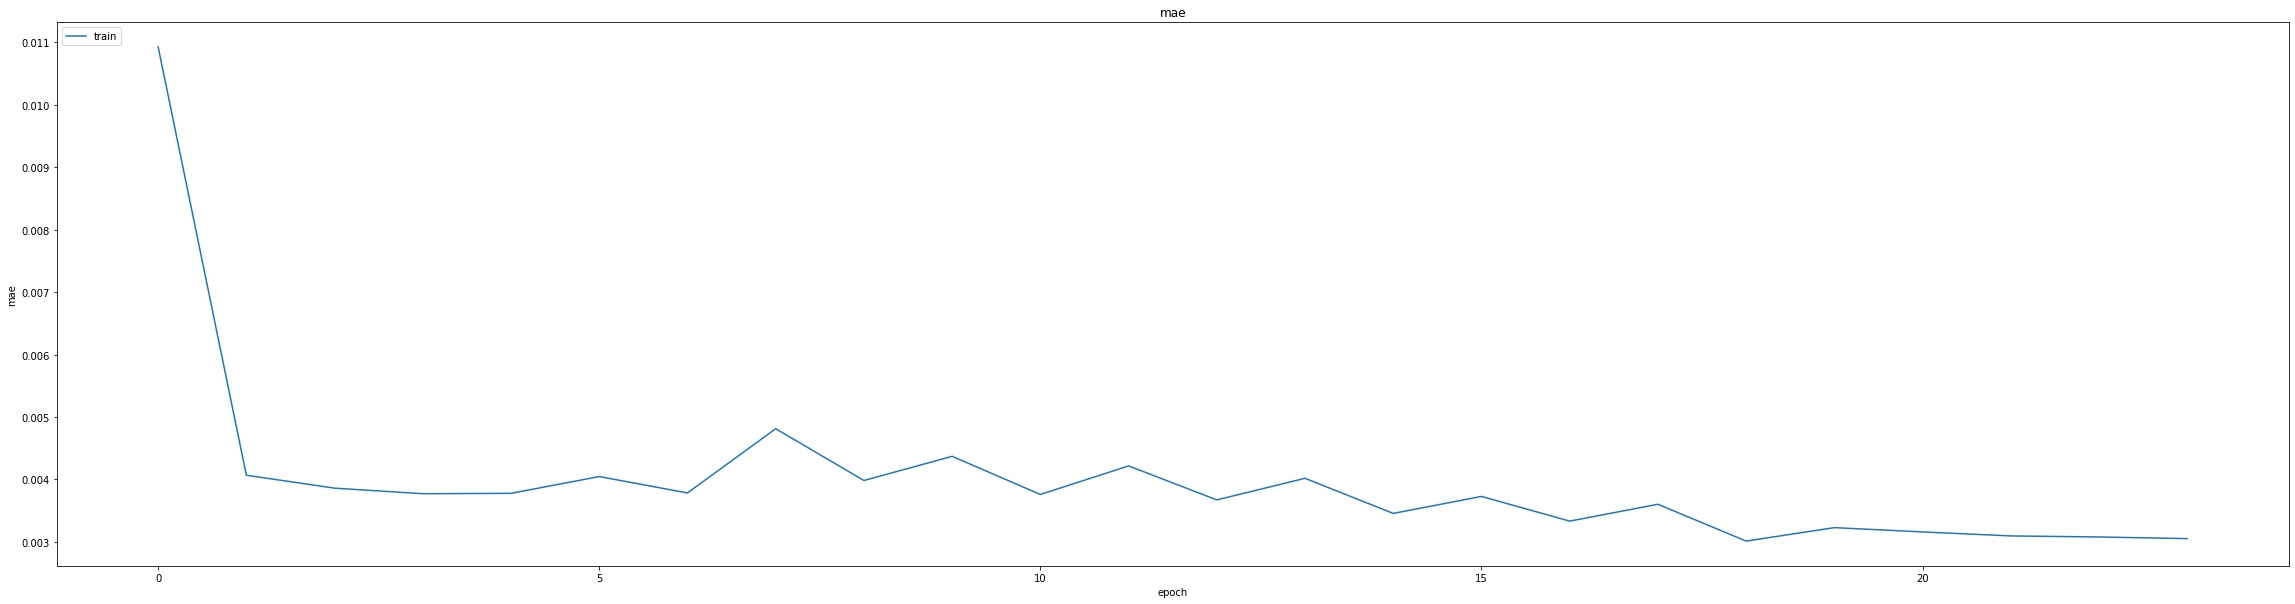

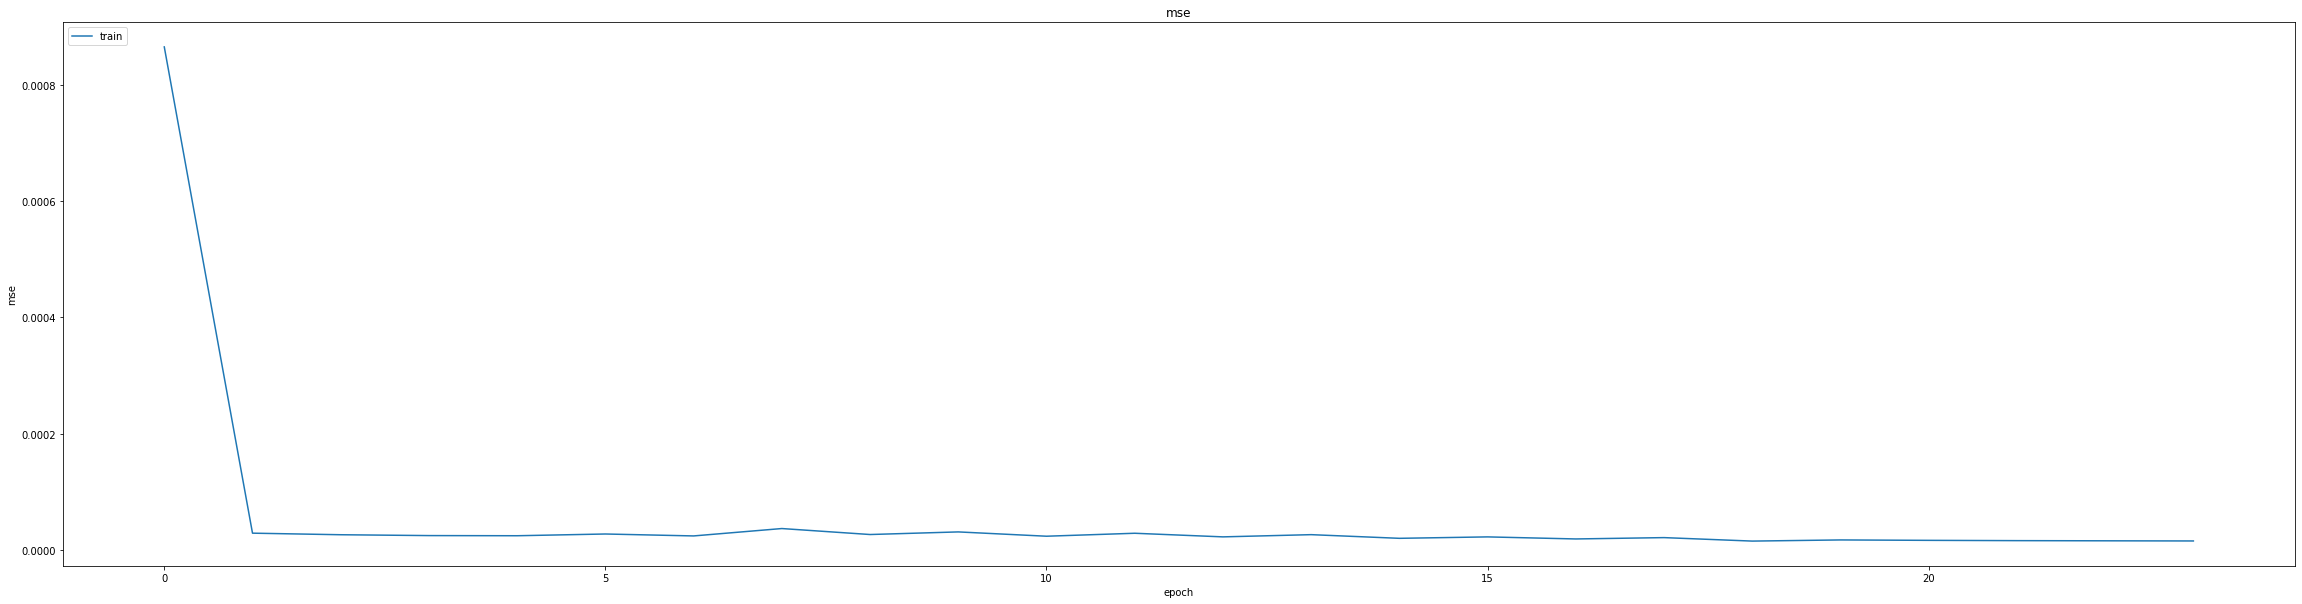

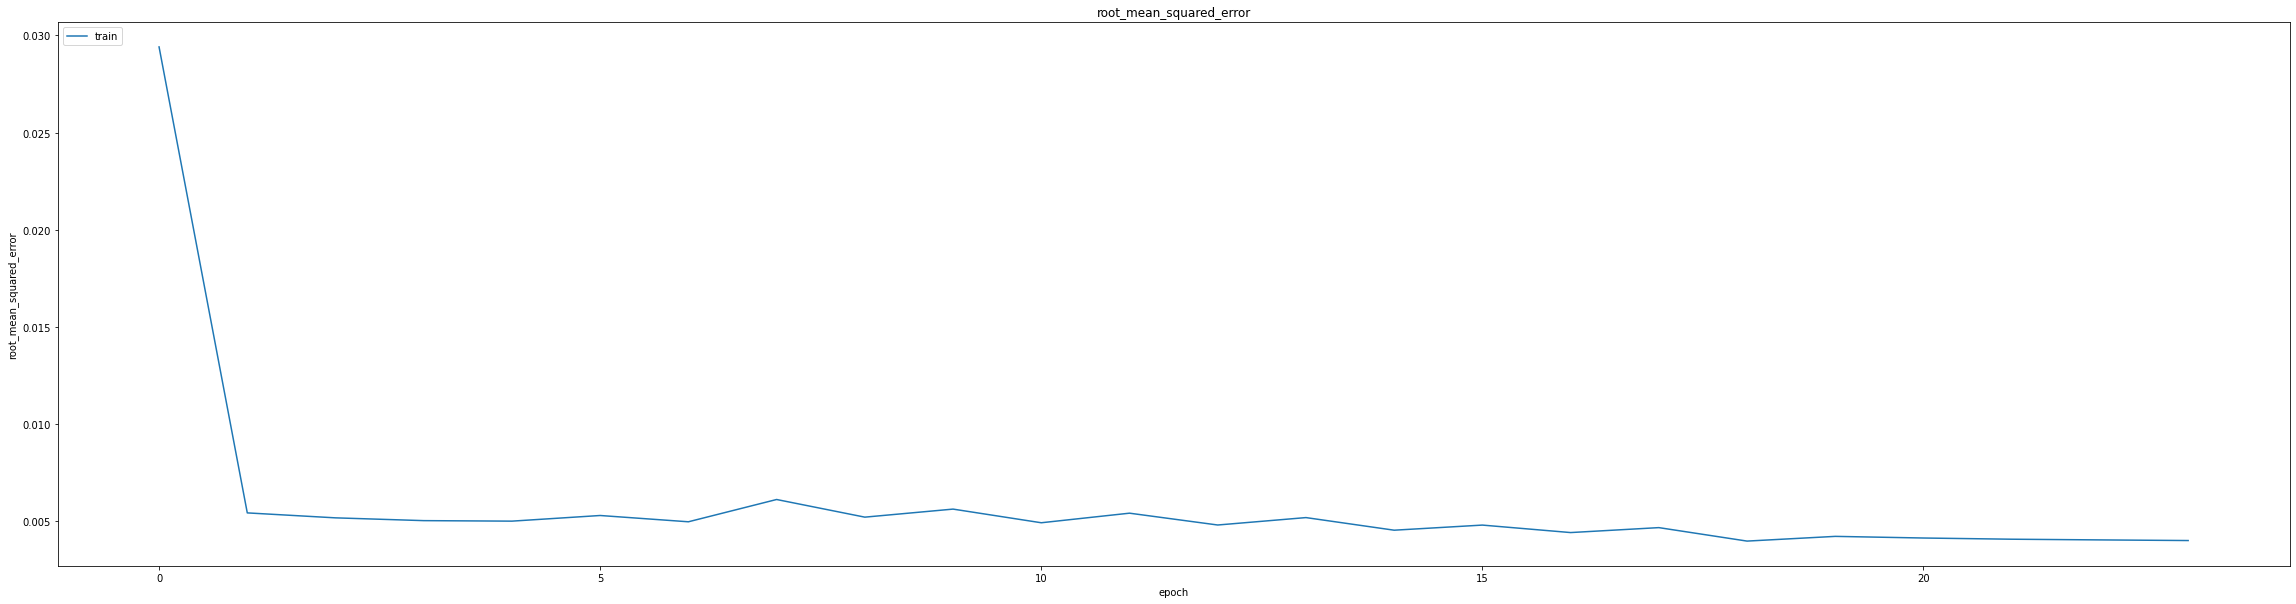

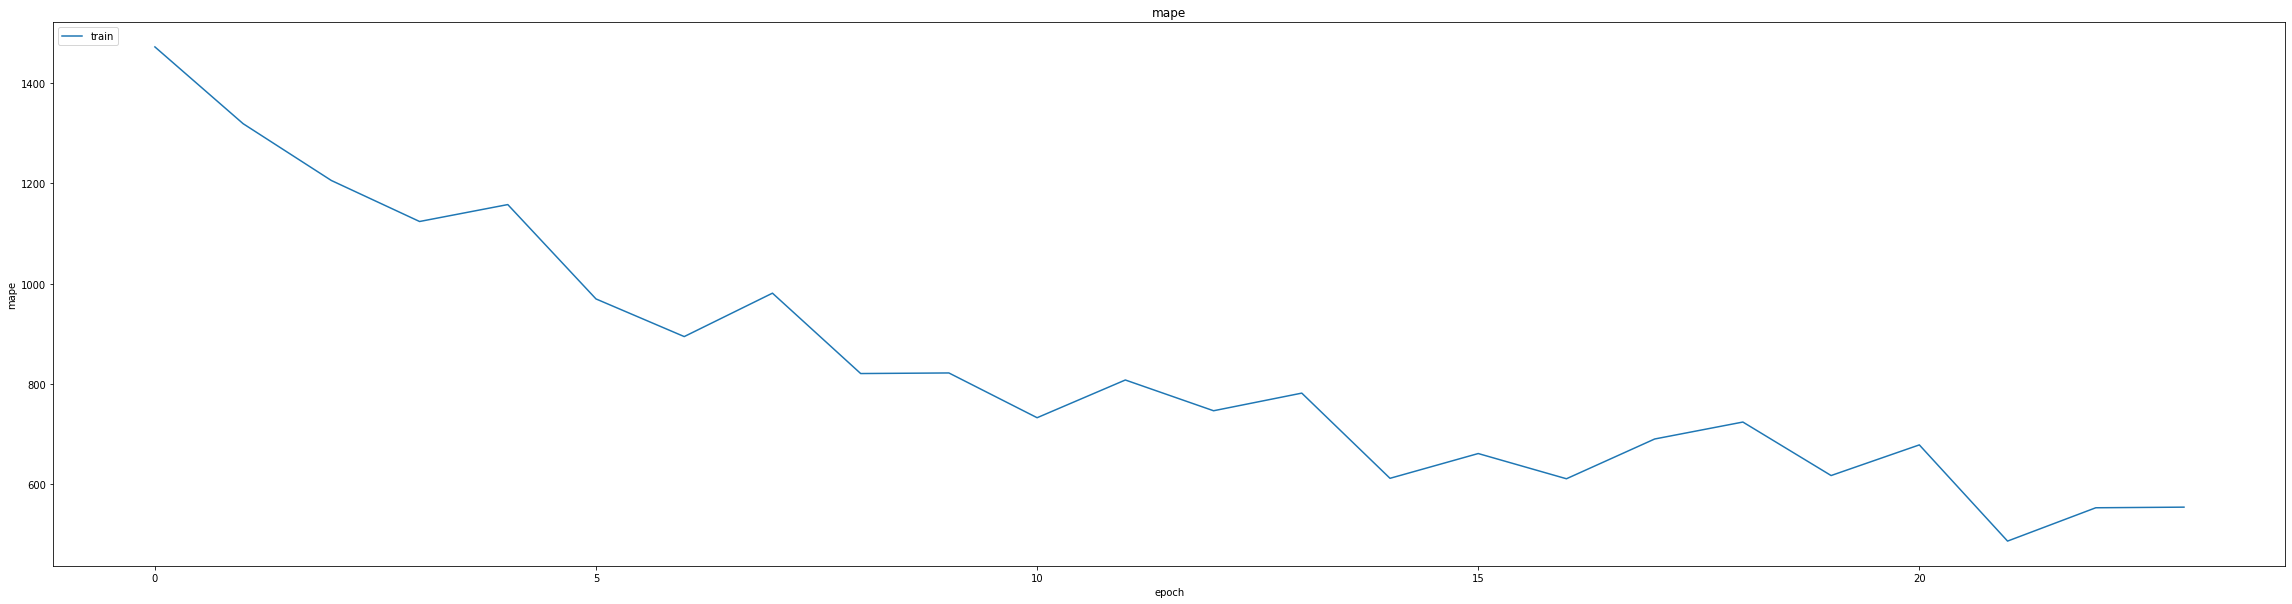

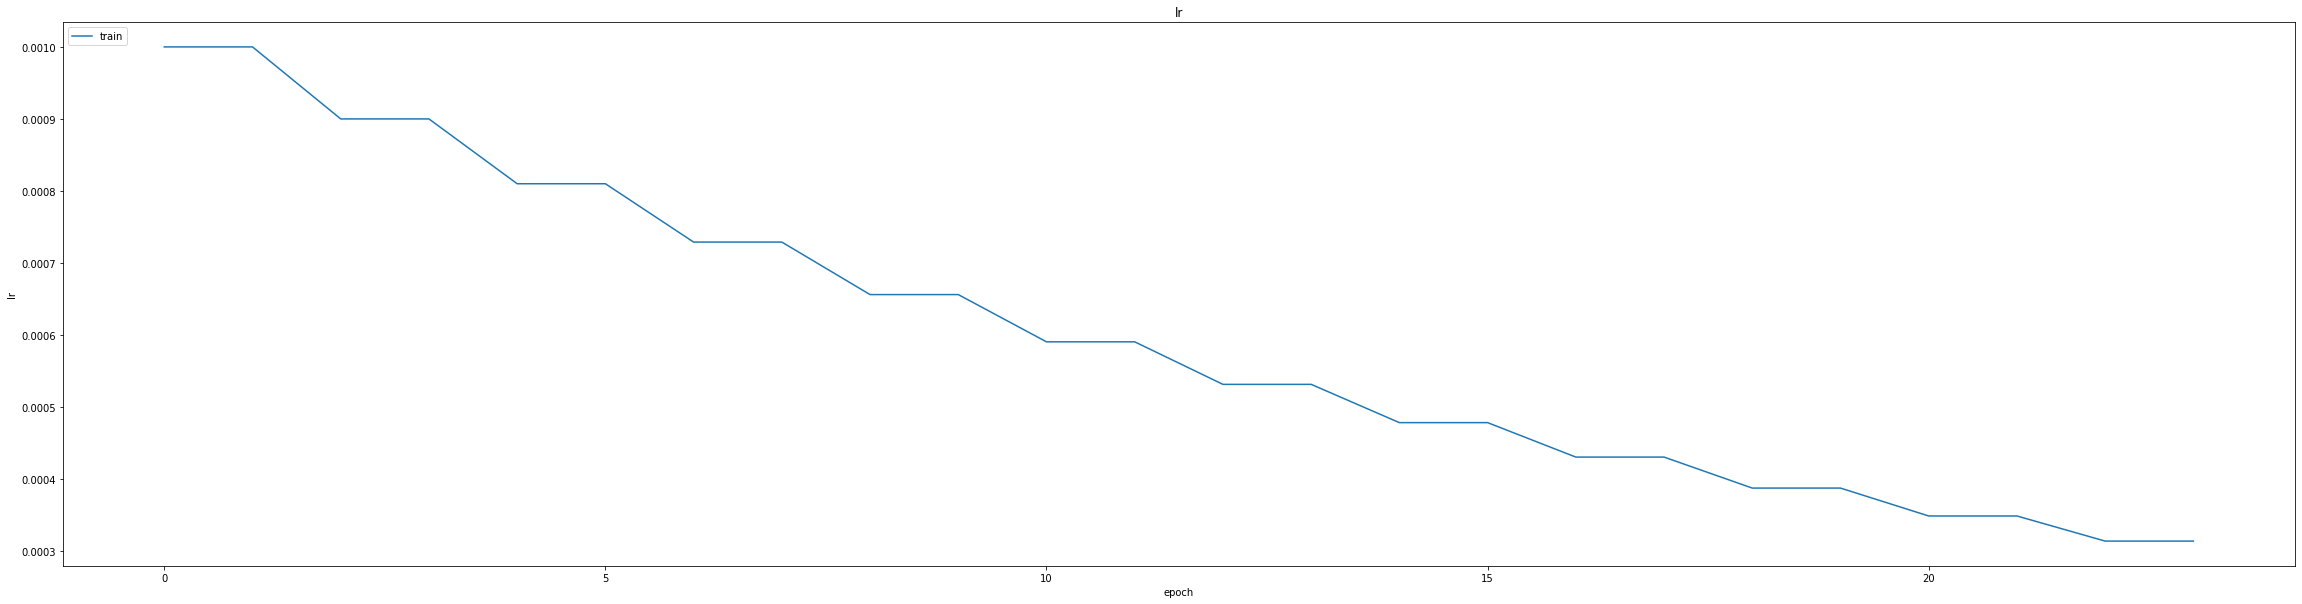

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.010402644984424114
0.013797011226415634
348/348 [==============================] - 2s 3ms/step
0.9933721490509785


348/348 [==============================] - 1s 3ms/step


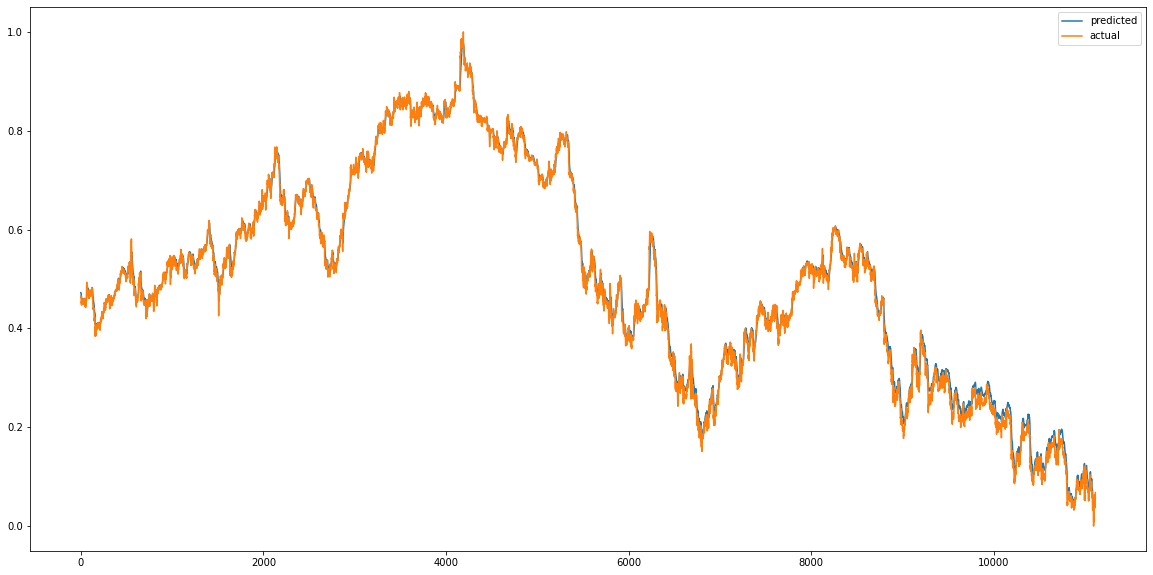

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


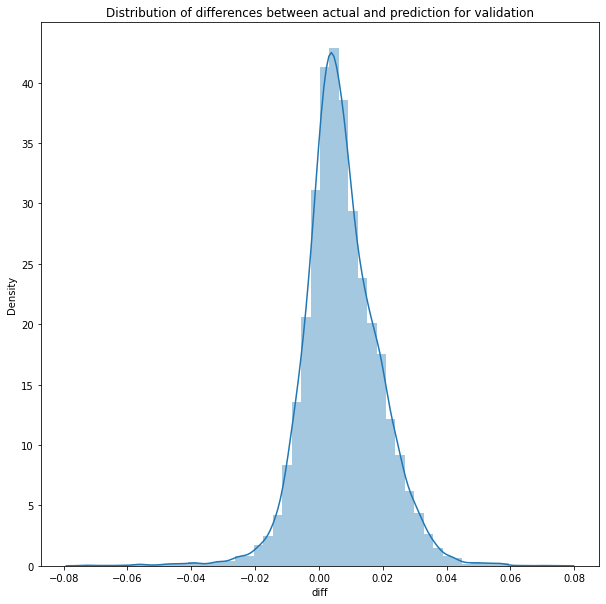

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 3ms/step


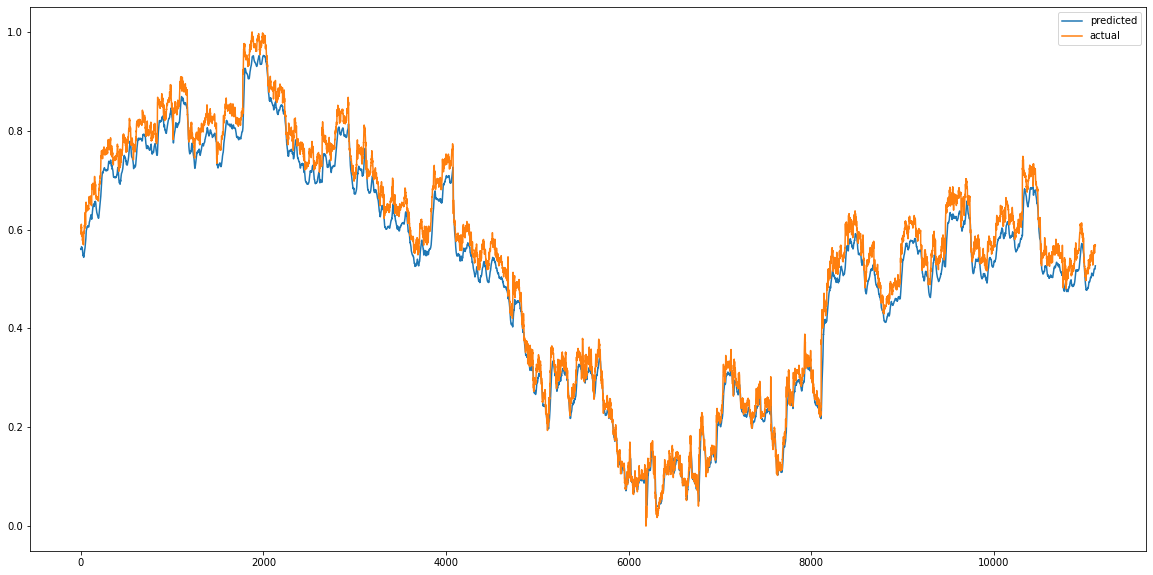

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


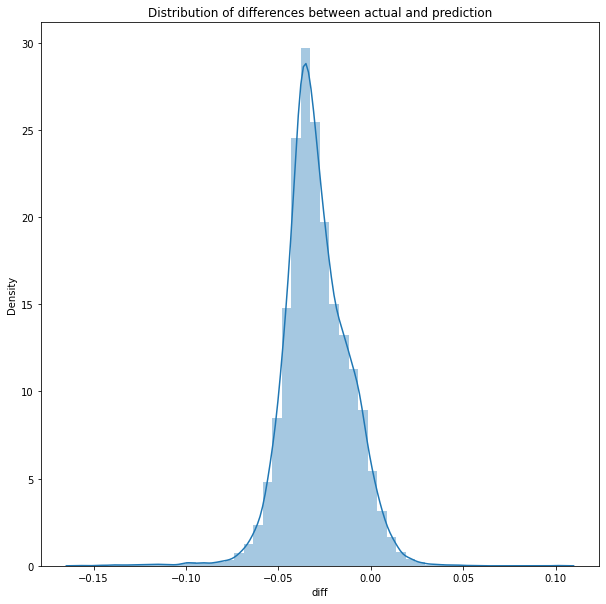

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.0011635340709396905
RMSE :  0.034110615223705516
MAE :  0.030060068003119406
348/348 [==============================] - 1s 3ms/step
R2_Score  : 0.9794979992509838


count    11115.000000
mean        -0.029238
std          0.017570
min         -0.156534
25%         -0.039592
50%         -0.031096
75%         -0.018288
max          0.101541
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [ ]:
model= thesis.BiLSTM_Model(x_train)
model.summary()

ValueError: ignored

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
405/406 [============================>.] - ETA: 0s - loss: 282.1808 - mae: 3.4867 - mse: 282.1808 - root_mean_squared_error: 16.7982 - mape: 25129.6836
Epoch 1: val_mse improved from inf to 0.35678, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 52s 103ms/step - loss: 281.5621 - mae: 3.4799 - mse: 281.5621 - root_mean_squared_error: 16.7798 - mape: 25074.7109 - val_loss: 0.3568 - val_mae: 0.5534 - val_mse: 0.3568 - val_root_mean_squared_error: 0.5973 - val_mape: 96215.3594
Epoch 2/75
405/406 [============================>.] - ETA: 0s - loss: 0.1033 - mae: 0.2572 - mse: 0.1033 - root_mean_squared_error: 0.3214 - mape: 16765.7617
Epoch 2: val_mse improved from 0.35678 to 0.13457, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 100ms/step - loss: 0.1032 - mae: 0.2570 - mse: 0.1032 - root_mean_squared_error: 0.3212 - mape: 16729.1191 - val_loss: 0.1346 - val_mae: 0.3074 - val_mse: 0.1346 - val_root_mean_squared_error: 0.3668 - val_mape: 72121.8516
Epoch 3/75
405/406 [============================>.] - ETA: 0s - loss: 0.0433 - mae: 0.1559 - mse: 0.0433 - root_mean_squared_error: 0.2082 - mape: 14647.9404
Epoch 3: val_mse improved from 0.13457 to 0.08985, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 99ms/step - loss: 0.0433 - mae: 0.1559 - mse: 0.0433 - root_mean_squared_error: 0.2081 - mape: 14615.8721 - val_loss: 0.0899 - val_mae: 0.2494 - val_mse: 0.0899 - val_root_mean_squared_error: 0.2998 - val_mape: 63831.5664
Epoch 4/75
405/406 [============================>.] - ETA: 0s - loss: 0.0358 - mae: 0.1446 - mse: 0.0358 - root_mean_squared_error: 0.1891 - mape: 13466.4404
Epoch 4: val_mse improved from 0.08985 to 0.07744, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 102ms/step - loss: 0.0358 - mae: 0.1446 - mse: 0.0358 - root_mean_squared_error: 0.1891 - mape: 13436.9766 - val_loss: 0.0774 - val_mae: 0.2318 - val_mse: 0.0774 - val_root_mean_squared_error: 0.2783 - val_mape: 60759.8320
Epoch 5/75
404/406 [============================>.] - ETA: 0s - loss: 0.0348 - mae: 0.1449 - mse: 0.0348 - root_mean_squared_error: 0.1866 - mape: 12830.9072
Epoch 5: val_mse improved from 0.07744 to 0.07377, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0348 - mae: 0.1449 - mse: 0.0348 - root_mean_squared_error: 0.1866 - mape: 12771.3223 - val_loss: 0.0738 - val_mae: 0.2263 - val_mse: 0.0738 - val_root_mean_squared_error: 0.2716 - val_mape: 59721.5039
Epoch 6/75
404/406 [============================>.] - ETA: 0s - loss: 0.0345 - mae: 0.1449 - mse: 0.0345 - root_mean_squared_error: 0.1856 - mape: 12748.2734
Epoch 6: val_mse improved from 0.07377 to 0.07255, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 100ms/step - loss: 0.0344 - mae: 0.1449 - mse: 0.0344 - root_mean_squared_error: 0.1856 - mape: 12689.1045 - val_loss: 0.0725 - val_mae: 0.2242 - val_mse: 0.0725 - val_root_mean_squared_error: 0.2693 - val_mape: 59353.8164
Epoch 7/75
404/406 [============================>.] - ETA: 0s - loss: 0.0323 - mae: 0.1395 - mse: 0.0323 - root_mean_squared_error: 0.1797 - mape: 12706.8965
Epoch 7: val_mse improved from 0.07255 to 0.06714, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 103ms/step - loss: 0.0323 - mae: 0.1394 - mse: 0.0323 - root_mean_squared_error: 0.1796 - mape: 12647.8428 - val_loss: 0.0671 - val_mae: 0.2149 - val_mse: 0.0671 - val_root_mean_squared_error: 0.2591 - val_mape: 57565.3477
Epoch 8/75
406/406 [==============================] - ETA: 0s - loss: 0.0306 - mae: 0.1362 - mse: 0.0306 - root_mean_squared_error: 0.1750 - mape: 12315.2793
Epoch 8: val_mse improved from 0.06714 to 0.06405, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 100ms/step - loss: 0.0306 - mae: 0.1362 - mse: 0.0306 - root_mean_squared_error: 0.1750 - mape: 12315.2793 - val_loss: 0.0641 - val_mae: 0.2096 - val_mse: 0.0641 - val_root_mean_squared_error: 0.2531 - val_mape: 56665.4102
Epoch 9/75
406/406 [==============================] - ETA: 0s - loss: 0.0292 - mae: 0.1326 - mse: 0.0292 - root_mean_squared_error: 0.1708 - mape: 12156.6621
Epoch 9: val_mse improved from 0.06405 to 0.06139, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 99ms/step - loss: 0.0292 - mae: 0.1326 - mse: 0.0292 - root_mean_squared_error: 0.1708 - mape: 12156.6621 - val_loss: 0.0614 - val_mae: 0.2041 - val_mse: 0.0614 - val_root_mean_squared_error: 0.2478 - val_mape: 55820.6523
Epoch 10/75
406/406 [==============================] - ETA: 0s - loss: 0.0263 - mae: 0.1260 - mse: 0.0263 - root_mean_squared_error: 0.1622 - mape: 11851.3027
Epoch 10: val_mse improved from 0.06139 to 0.05419, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 102ms/step - loss: 0.0263 - mae: 0.1260 - mse: 0.0263 - root_mean_squared_error: 0.1622 - mape: 11851.3027 - val_loss: 0.0542 - val_mae: 0.1901 - val_mse: 0.0542 - val_root_mean_squared_error: 0.2328 - val_mape: 53602.9180
Epoch 11/75
406/406 [==============================] - ETA: 0s - loss: 0.0230 - mae: 0.1171 - mse: 0.0230 - root_mean_squared_error: 0.1516 - mape: 11191.1475
Epoch 11: val_mse improved from 0.05419 to 0.04668, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0230 - mae: 0.1171 - mse: 0.0230 - root_mean_squared_error: 0.1516 - mape: 11191.1475 - val_loss: 0.0467 - val_mae: 0.1729 - val_mse: 0.0467 - val_root_mean_squared_error: 0.2160 - val_mape: 51717.4375
Epoch 12/75
406/406 [==============================] - ETA: 0s - loss: 0.0192 - mae: 0.1053 - mse: 0.0192 - root_mean_squared_error: 0.1385 - mape: 10462.9355
Epoch 12: val_mse improved from 0.04668 to 0.03885, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0192 - mae: 0.1053 - mse: 0.0192 - root_mean_squared_error: 0.1385 - mape: 10462.9355 - val_loss: 0.0389 - val_mae: 0.1509 - val_mse: 0.0389 - val_root_mean_squared_error: 0.1971 - val_mape: 49854.6133
Epoch 13/75
406/406 [==============================] - ETA: 0s - loss: 0.0144 - mae: 0.0874 - mse: 0.0144 - root_mean_squared_error: 0.1199 - mape: 10972.6777
Epoch 13: val_mse improved from 0.03885 to 0.03105, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 104ms/step - loss: 0.0144 - mae: 0.0874 - mse: 0.0144 - root_mean_squared_error: 0.1199 - mape: 10972.6777 - val_loss: 0.0310 - val_mae: 0.1244 - val_mse: 0.0310 - val_root_mean_squared_error: 0.1762 - val_mape: 47527.1836
Epoch 14/75
404/406 [============================>.] - ETA: 0s - loss: 0.0112 - mae: 0.0755 - mse: 0.0112 - root_mean_squared_error: 0.1058 - mape: 11058.3994
Epoch 14: val_mse improved from 0.03105 to 0.02478, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 99ms/step - loss: 0.0112 - mae: 0.0755 - mse: 0.0112 - root_mean_squared_error: 0.1057 - mape: 11006.9502 - val_loss: 0.0248 - val_mae: 0.1086 - val_mse: 0.0248 - val_root_mean_squared_error: 0.1574 - val_mape: 44620.0664
Epoch 15/75
405/406 [============================>.] - ETA: 0s - loss: 0.0094 - mae: 0.0698 - mse: 0.0094 - root_mean_squared_error: 0.0970 - mape: 9233.3936
Epoch 15: val_mse improved from 0.02478 to 0.01998, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0094 - mae: 0.0698 - mse: 0.0094 - root_mean_squared_error: 0.0970 - mape: 9213.1641 - val_loss: 0.0200 - val_mae: 0.0949 - val_mse: 0.0200 - val_root_mean_squared_error: 0.1413 - val_mape: 41976.8945
Epoch 16/75
405/406 [============================>.] - ETA: 0s - loss: 0.0082 - mae: 0.0658 - mse: 0.0082 - root_mean_squared_error: 0.0904 - mape: 8420.5547
Epoch 16: val_mse improved from 0.01998 to 0.01595, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0082 - mae: 0.0658 - mse: 0.0082 - root_mean_squared_error: 0.0904 - mape: 8402.1035 - val_loss: 0.0159 - val_mae: 0.0803 - val_mse: 0.0159 - val_root_mean_squared_error: 0.1263 - val_mape: 39539.0312
Epoch 17/75
406/406 [==============================] - ETA: 0s - loss: 0.0071 - mae: 0.0617 - mse: 0.0071 - root_mean_squared_error: 0.0843 - mape: 8155.7583
Epoch 17: val_mse improved from 0.01595 to 0.01378, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0071 - mae: 0.0617 - mse: 0.0071 - root_mean_squared_error: 0.0843 - mape: 8155.7583 - val_loss: 0.0138 - val_mae: 0.0806 - val_mse: 0.0138 - val_root_mean_squared_error: 0.1174 - val_mape: 37523.0781
Epoch 18/75
405/406 [============================>.] - ETA: 0s - loss: 0.0061 - mae: 0.0573 - mse: 0.0061 - root_mean_squared_error: 0.0780 - mape: 7055.8154
Epoch 18: val_mse improved from 0.01378 to 0.01099, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 100ms/step - loss: 0.0061 - mae: 0.0573 - mse: 0.0061 - root_mean_squared_error: 0.0780 - mape: 7040.3643 - val_loss: 0.0110 - val_mae: 0.0691 - val_mse: 0.0110 - val_root_mean_squared_error: 0.1048 - val_mape: 35233.1562
Epoch 19/75
404/406 [============================>.] - ETA: 0s - loss: 0.0049 - mae: 0.0515 - mse: 0.0049 - root_mean_squared_error: 0.0701 - mape: 6760.2983
Epoch 19: val_mse improved from 0.01099 to 0.00959, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 103ms/step - loss: 0.0049 - mae: 0.0516 - mse: 0.0049 - root_mean_squared_error: 0.0701 - mape: 6728.8706 - val_loss: 0.0096 - val_mae: 0.0728 - val_mse: 0.0096 - val_root_mean_squared_error: 0.0979 - val_mape: 33138.2930
Epoch 20/75
405/406 [============================>.] - ETA: 0s - loss: 0.0043 - mae: 0.0481 - mse: 0.0043 - root_mean_squared_error: 0.0654 - mape: 6971.9736
Epoch 20: val_mse improved from 0.00959 to 0.00716, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 100ms/step - loss: 0.0043 - mae: 0.0481 - mse: 0.0043 - root_mean_squared_error: 0.0654 - mape: 6956.7080 - val_loss: 0.0072 - val_mae: 0.0515 - val_mse: 0.0072 - val_root_mean_squared_error: 0.0846 - val_mape: 31736.0703
Epoch 21/75
406/406 [==============================] - ETA: 0s - loss: 0.0037 - mae: 0.0449 - mse: 0.0037 - root_mean_squared_error: 0.0610 - mape: 6742.2275
Epoch 21: val_mse improved from 0.00716 to 0.00628, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 100ms/step - loss: 0.0037 - mae: 0.0449 - mse: 0.0037 - root_mean_squared_error: 0.0610 - mape: 6742.2275 - val_loss: 0.0063 - val_mae: 0.0502 - val_mse: 0.0063 - val_root_mean_squared_error: 0.0792 - val_mape: 30430.3555
Epoch 22/75
404/406 [============================>.] - ETA: 0s - loss: 0.0033 - mae: 0.0421 - mse: 0.0033 - root_mean_squared_error: 0.0572 - mape: 6486.8398
Epoch 22: val_mse improved from 0.00628 to 0.00567, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 98ms/step - loss: 0.0033 - mae: 0.0421 - mse: 0.0033 - root_mean_squared_error: 0.0571 - mape: 6456.6567 - val_loss: 0.0057 - val_mae: 0.0486 - val_mse: 0.0057 - val_root_mean_squared_error: 0.0753 - val_mape: 29359.3008
Epoch 23/75
405/406 [============================>.] - ETA: 0s - loss: 0.0028 - mae: 0.0390 - mse: 0.0028 - root_mean_squared_error: 0.0528 - mape: 6219.5732
Epoch 23: val_mse improved from 0.00567 to 0.00468, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 102ms/step - loss: 0.0028 - mae: 0.0390 - mse: 0.0028 - root_mean_squared_error: 0.0528 - mape: 6205.9414 - val_loss: 0.0047 - val_mae: 0.0411 - val_mse: 0.0047 - val_root_mean_squared_error: 0.0684 - val_mape: 28196.7520
Epoch 24/75
406/406 [==============================] - ETA: 0s - loss: 0.0024 - mae: 0.0359 - mse: 0.0024 - root_mean_squared_error: 0.0487 - mape: 5881.6230
Epoch 24: val_mse improved from 0.00468 to 0.00404, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0024 - mae: 0.0359 - mse: 0.0024 - root_mean_squared_error: 0.0487 - mape: 5881.6230 - val_loss: 0.0040 - val_mae: 0.0401 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0636 - val_mape: 26818.7695
Epoch 25/75
406/406 [==============================] - ETA: 0s - loss: 0.0020 - mae: 0.0334 - mse: 0.0020 - root_mean_squared_error: 0.0452 - mape: 6140.3711
Epoch 25: val_mse improved from 0.00404 to 0.00346, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 100ms/step - loss: 0.0020 - mae: 0.0334 - mse: 0.0020 - root_mean_squared_error: 0.0452 - mape: 6140.3711 - val_loss: 0.0035 - val_mae: 0.0375 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0588 - val_mape: 25553.9355
Epoch 26/75
405/406 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0313 - mse: 0.0018 - root_mean_squared_error: 0.0422 - mape: 5841.6982
Epoch 26: val_mse improved from 0.00346 to 0.00305, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 50s 122ms/step - loss: 0.0018 - mae: 0.0313 - mse: 0.0018 - root_mean_squared_error: 0.0422 - mape: 5828.8955 - val_loss: 0.0031 - val_mae: 0.0379 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0552 - val_mape: 24090.7363
Epoch 27/75
406/406 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0284 - mse: 0.0015 - root_mean_squared_error: 0.0385 - mape: 4914.7256
Epoch 27: val_mse improved from 0.00305 to 0.00217, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 103ms/step - loss: 0.0015 - mae: 0.0284 - mse: 0.0015 - root_mean_squared_error: 0.0385 - mape: 4914.7256 - val_loss: 0.0022 - val_mae: 0.0257 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0466 - val_mape: 22823.8496
Epoch 28/75
405/406 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0266 - mse: 0.0013 - root_mean_squared_error: 0.0358 - mape: 4878.6040
Epoch 28: val_mse improved from 0.00217 to 0.00199, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 100ms/step - loss: 0.0013 - mae: 0.0266 - mse: 0.0013 - root_mean_squared_error: 0.0358 - mape: 4867.9077 - val_loss: 0.0020 - val_mae: 0.0283 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0446 - val_mape: 21631.2441
Epoch 29/75
406/406 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0247 - mse: 0.0011 - root_mean_squared_error: 0.0332 - mape: 5409.1880
Epoch 29: val_mse improved from 0.00199 to 0.00149, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 44s 109ms/step - loss: 0.0011 - mae: 0.0247 - mse: 0.0011 - root_mean_squared_error: 0.0332 - mape: 5409.1880 - val_loss: 0.0015 - val_mae: 0.0211 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0386 - val_mape: 20392.2402
Epoch 30/75
406/406 [==============================] - ETA: 0s - loss: 9.5102e-04 - mae: 0.0230 - mse: 9.5102e-04 - root_mean_squared_error: 0.0308 - mape: 4542.9604
Epoch 30: val_mse improved from 0.00149 to 0.00139, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 9.5102e-04 - mae: 0.0230 - mse: 9.5102e-04 - root_mean_squared_error: 0.0308 - mape: 4542.9604 - val_loss: 0.0014 - val_mae: 0.0232 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0373 - val_mape: 19372.4316
Epoch 31/75
404/406 [============================>.] - ETA: 0s - loss: 8.2510e-04 - mae: 0.0214 - mse: 8.2510e-04 - root_mean_squared_error: 0.0287 - mape: 4941.3564
Epoch 31: val_mse improved from 0.00139 to 0.00119, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 8.2465e-04 - mae: 0.0214 - mse: 8.2465e-04 - root_mean_squared_error: 0.0287 - mape: 4918.3608 - val_loss: 0.0012 - val_mae: 0.0221 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0345 - val_mape: 18423.6309
Epoch 32/75
405/406 [============================>.] - ETA: 0s - loss: 7.5126e-04 - mae: 0.0205 - mse: 7.5126e-04 - root_mean_squared_error: 0.0274 - mape: 3810.9915
Epoch 32: val_mse improved from 0.00119 to 0.00119, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 103ms/step - loss: 7.5175e-04 - mae: 0.0205 - mse: 7.5175e-04 - root_mean_squared_error: 0.0274 - mape: 3802.6401 - val_loss: 0.0012 - val_mae: 0.0239 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0344 - val_mape: 17810.0879
Epoch 33/75
406/406 [==============================] - ETA: 0s - loss: 6.6351e-04 - mae: 0.0193 - mse: 6.6351e-04 - root_mean_squared_error: 0.0258 - mape: 3559.7083
Epoch 33: val_mse improved from 0.00119 to 0.00093, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 99ms/step - loss: 6.6351e-04 - mae: 0.0193 - mse: 6.6351e-04 - root_mean_squared_error: 0.0258 - mape: 3559.7083 - val_loss: 9.3260e-04 - val_mae: 0.0191 - val_mse: 9.3260e-04 - val_root_mean_squared_error: 0.0305 - val_mape: 17134.5000
Epoch 34/75
406/406 [==============================] - ETA: 0s - loss: 5.9978e-04 - mae: 0.0184 - mse: 5.9978e-04 - root_mean_squared_error: 0.0245 - mape: 3673.6763
Epoch 34: val_mse improved from 0.00093 to 0.00080, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 100ms/step - loss: 5.9978e-04 - mae: 0.0184 - mse: 5.9978e-04 - root_mean_squared_error: 0.0245 - mape: 3673.6763 - val_loss: 7.9837e-04 - val_mae: 0.0167 - val_mse: 7.9837e-04 - val_root_mean_squared_error: 0.0283 - val_mape: 16657.2441
Epoch 35/75
406/406 [==============================] - ETA: 0s - loss: 5.2741e-04 - mae: 0.0173 - mse: 5.2741e-04 - root_mean_squared_error: 0.0230 - mape: 4007.2437
Epoch 35: val_mse did not improve from 0.00080
406/406 [==============================] - 8s 20ms/step - loss: 5.2741e-04 - mae: 0.0173 - mse: 5.2741e-04 - root_mean_squared_error: 0.0230 - mape: 4007.2437 - val_loss: 8.1926e-04 - val_mae: 0.0191 - val_mse: 8.1926e-04 - val_root_mean_squared_error: 0.0286 - val_mape: 16097.4639
Epoch 36/75
405/406 [============================>.] - ETA: 0s - loss: 4.5090e-04 - mae: 0.0161 - mse: 4.5090e-04 - root_mean_squared_error: 0.0212 - mape: 3625.6597
Epoch 36: val_mse improved from 0.00080 to 0.00067, s

406/406 [==============================] - 41s 101ms/step - loss: 4.5088e-04 - mae: 0.0161 - mse: 4.5088e-04 - root_mean_squared_error: 0.0212 - mape: 3617.7092 - val_loss: 6.7274e-04 - val_mae: 0.0160 - val_mse: 6.7274e-04 - val_root_mean_squared_error: 0.0259 - val_mape: 15531.5469
Epoch 37/75
404/406 [============================>.] - ETA: 0s - loss: 3.7838e-04 - mae: 0.0148 - mse: 3.7838e-04 - root_mean_squared_error: 0.0195 - mape: 3306.9285
Epoch 37: val_mse did not improve from 0.00067
406/406 [==============================] - 8s 20ms/step - loss: 3.7780e-04 - mae: 0.0148 - mse: 3.7780e-04 - root_mean_squared_error: 0.0194 - mape: 3291.5364 - val_loss: 7.3781e-04 - val_mae: 0.0199 - val_mse: 7.3781e-04 - val_root_mean_squared_error: 0.0272 - val_mape: 14790.7412
Epoch 38/75
406/406 [==============================] - ETA: 0s - loss: 3.4633e-04 - mae: 0.0142 - mse: 3.4633e-04 - root_mean_squared_error: 0.0186 - mape: 3423.1655
Epoch 38: val_mse improved from 0.00067 to 0.00058, s

406/406 [==============================] - 41s 101ms/step - loss: 3.4633e-04 - mae: 0.0142 - mse: 3.4633e-04 - root_mean_squared_error: 0.0186 - mape: 3423.1655 - val_loss: 5.8137e-04 - val_mae: 0.0165 - val_mse: 5.8137e-04 - val_root_mean_squared_error: 0.0241 - val_mape: 14080.2861
Epoch 39/75
405/406 [============================>.] - ETA: 0s - loss: 3.0555e-04 - mae: 0.0134 - mse: 3.0555e-04 - root_mean_squared_error: 0.0175 - mape: 3518.2825
Epoch 39: val_mse did not improve from 0.00058
406/406 [==============================] - 8s 20ms/step - loss: 3.0548e-04 - mae: 0.0134 - mse: 3.0548e-04 - root_mean_squared_error: 0.0175 - mape: 3510.5674 - val_loss: 6.3174e-04 - val_mae: 0.0194 - val_mse: 6.3174e-04 - val_root_mean_squared_error: 0.0251 - val_mape: 13428.4746
Epoch 40/75
405/406 [============================>.] - ETA: 0s - loss: 2.7682e-04 - mae: 0.0128 - mse: 2.7682e-04 - root_mean_squared_error: 0.0166 - mape: 2953.8870
Epoch 40: val_mse did not improve from 0.00058
406/40

406/406 [==============================] - 41s 100ms/step - loss: 2.2700e-04 - mae: 0.0116 - mse: 2.2700e-04 - root_mean_squared_error: 0.0151 - mape: 2843.6777 - val_loss: 4.5054e-04 - val_mae: 0.0156 - val_mse: 4.5054e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 12412.0625
Epoch 42/75
405/406 [============================>.] - ETA: 0s - loss: 2.4016e-04 - mae: 0.0120 - mse: 2.4016e-04 - root_mean_squared_error: 0.0155 - mape: 3074.1558
Epoch 42: val_mse improved from 0.00045 to 0.00038, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 44s 109ms/step - loss: 2.3994e-04 - mae: 0.0120 - mse: 2.3994e-04 - root_mean_squared_error: 0.0155 - mape: 3067.4136 - val_loss: 3.8342e-04 - val_mae: 0.0141 - val_mse: 3.8342e-04 - val_root_mean_squared_error: 0.0196 - val_mape: 11933.5459
Epoch 43/75
406/406 [==============================] - ETA: 0s - loss: 1.9869e-04 - mae: 0.0109 - mse: 1.9869e-04 - root_mean_squared_error: 0.0141 - mape: 2311.5308
Epoch 43: val_mse did not improve from 0.00038
406/406 [==============================] - 8s 20ms/step - loss: 1.9869e-04 - mae: 0.0109 - mse: 1.9869e-04 - root_mean_squared_error: 0.0141 - mape: 2311.5308 - val_loss: 4.1118e-04 - val_mae: 0.0155 - val_mse: 4.1118e-04 - val_root_mean_squared_error: 0.0203 - val_mape: 11511.8174
Epoch 44/75
405/406 [============================>.] - ETA: 0s - loss: 1.8569e-04 - mae: 0.0106 - mse: 1.8569e-04 - root_mean_squared_error: 0.0136 - mape: 2431.2446
Epoch 44: val_mse improved from 0.00038 to 0.00030, s

406/406 [==============================] - 41s 101ms/step - loss: 1.8557e-04 - mae: 0.0106 - mse: 1.8557e-04 - root_mean_squared_error: 0.0136 - mape: 2425.9143 - val_loss: 2.9986e-04 - val_mae: 0.0119 - val_mse: 2.9986e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 11169.4902
Epoch 45/75
405/406 [============================>.] - ETA: 0s - loss: 1.6550e-04 - mae: 0.0100 - mse: 1.6550e-04 - root_mean_squared_error: 0.0129 - mape: 2296.1887
Epoch 45: val_mse did not improve from 0.00030
406/406 [==============================] - 9s 21ms/step - loss: 1.6550e-04 - mae: 0.0100 - mse: 1.6550e-04 - root_mean_squared_error: 0.0129 - mape: 2291.1543 - val_loss: 4.5330e-04 - val_mae: 0.0169 - val_mse: 4.5330e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 10760.4590
Epoch 46/75
405/406 [============================>.] - ETA: 0s - loss: 1.5353e-04 - mae: 0.0097 - mse: 1.5353e-04 - root_mean_squared_error: 0.0124 - mape: 2493.9727
Epoch 46: val_mse improved from 0.00030 to 0.00027, s

406/406 [==============================] - 42s 104ms/step - loss: 1.5336e-04 - mae: 0.0097 - mse: 1.5336e-04 - root_mean_squared_error: 0.0124 - mape: 2488.5032 - val_loss: 2.7324e-04 - val_mae: 0.0118 - val_mse: 2.7324e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 10507.3496
Epoch 47/75
405/406 [============================>.] - ETA: 0s - loss: 1.5663e-04 - mae: 0.0097 - mse: 1.5663e-04 - root_mean_squared_error: 0.0125 - mape: 2612.0352
Epoch 47: val_mse did not improve from 0.00027
406/406 [==============================] - 8s 20ms/step - loss: 1.5648e-04 - mae: 0.0097 - mse: 1.5648e-04 - root_mean_squared_error: 0.0125 - mape: 2606.3062 - val_loss: 3.3815e-04 - val_mae: 0.0143 - val_mse: 3.3815e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 10242.2285
Epoch 48/75
405/406 [============================>.] - ETA: 0s - loss: 1.4434e-04 - mae: 0.0093 - mse: 1.4434e-04 - root_mean_squared_error: 0.0120 - mape: 2754.0459
Epoch 48: val_mse did not improve from 0.00027
406/40

406/406 [==============================] - 41s 101ms/step - loss: 1.5324e-04 - mae: 0.0098 - mse: 1.5324e-04 - root_mean_squared_error: 0.0124 - mape: 1987.3092 - val_loss: 2.4265e-04 - val_mae: 0.0111 - val_mse: 2.4265e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 9413.1504
Epoch 51/75
405/406 [============================>.] - ETA: 0s - loss: 1.0018e-04 - mae: 0.0077 - mse: 1.0018e-04 - root_mean_squared_error: 0.0100 - mape: 1892.9341
Epoch 51: val_mse did not improve from 0.00024
406/406 [==============================] - 8s 20ms/step - loss: 1.0010e-04 - mae: 0.0077 - mse: 1.0010e-04 - root_mean_squared_error: 0.0100 - mape: 1888.7828 - val_loss: 2.5076e-04 - val_mae: 0.0115 - val_mse: 2.5076e-04 - val_root_mean_squared_error: 0.0158 - val_mape: 8963.0918
Epoch 52/75
404/406 [============================>.] - ETA: 0s - loss: 1.2350e-04 - mae: 0.0088 - mse: 1.2350e-04 - root_mean_squared_error: 0.0111 - mape: 1868.4364
Epoch 52: val_mse did not improve from 0.00024
406/406 

406/406 [==============================] - 43s 106ms/step - loss: 9.5317e-05 - mae: 0.0076 - mse: 9.5317e-05 - root_mean_squared_error: 0.0098 - mape: 1700.0538 - val_loss: 1.7494e-04 - val_mae: 0.0093 - val_mse: 1.7494e-04 - val_root_mean_squared_error: 0.0132 - val_mape: 8195.9668
Epoch 56/75
406/406 [==============================] - ETA: 0s - loss: 9.8848e-05 - mae: 0.0076 - mse: 9.8848e-05 - root_mean_squared_error: 0.0099 - mape: 1642.5753
Epoch 56: val_mse did not improve from 0.00017
406/406 [==============================] - 9s 21ms/step - loss: 9.8848e-05 - mae: 0.0076 - mse: 9.8848e-05 - root_mean_squared_error: 0.0099 - mape: 1642.5753 - val_loss: 2.9853e-04 - val_mae: 0.0113 - val_mse: 2.9853e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 8334.3418
Epoch 57/75
404/406 [============================>.] - ETA: 0s - loss: 1.0362e-04 - mae: 0.0079 - mse: 1.0362e-04 - root_mean_squared_error: 0.0102 - mape: 1612.5718
Epoch 57: val_mse did not improve from 0.00017
406/406 

406/406 [==============================] - 41s 100ms/step - loss: 6.7310e-05 - mae: 0.0063 - mse: 6.7310e-05 - root_mean_squared_error: 0.0082 - mape: 1505.9708 - val_loss: 1.5604e-04 - val_mae: 0.0095 - val_mse: 1.5604e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 7395.9502
Epoch 64/75
406/406 [==============================] - ETA: 0s - loss: 7.0140e-05 - mae: 0.0066 - mse: 7.0140e-05 - root_mean_squared_error: 0.0084 - mape: 1562.9514
Epoch 64: val_mse did not improve from 0.00016
406/406 [==============================] - 8s 21ms/step - loss: 7.0140e-05 - mae: 0.0066 - mse: 7.0140e-05 - root_mean_squared_error: 0.0084 - mape: 1562.9514 - val_loss: 2.0229e-04 - val_mae: 0.0095 - val_mse: 2.0229e-04 - val_root_mean_squared_error: 0.0142 - val_mape: 7720.5967
Epoch 65/75
405/406 [============================>.] - ETA: 0s - loss: 6.8260e-05 - mae: 0.0065 - mse: 6.8260e-05 - root_mean_squared_error: 0.0083 - mape: 1449.8059
Epoch 65: val_mse did not improve from 0.00016
406/406 

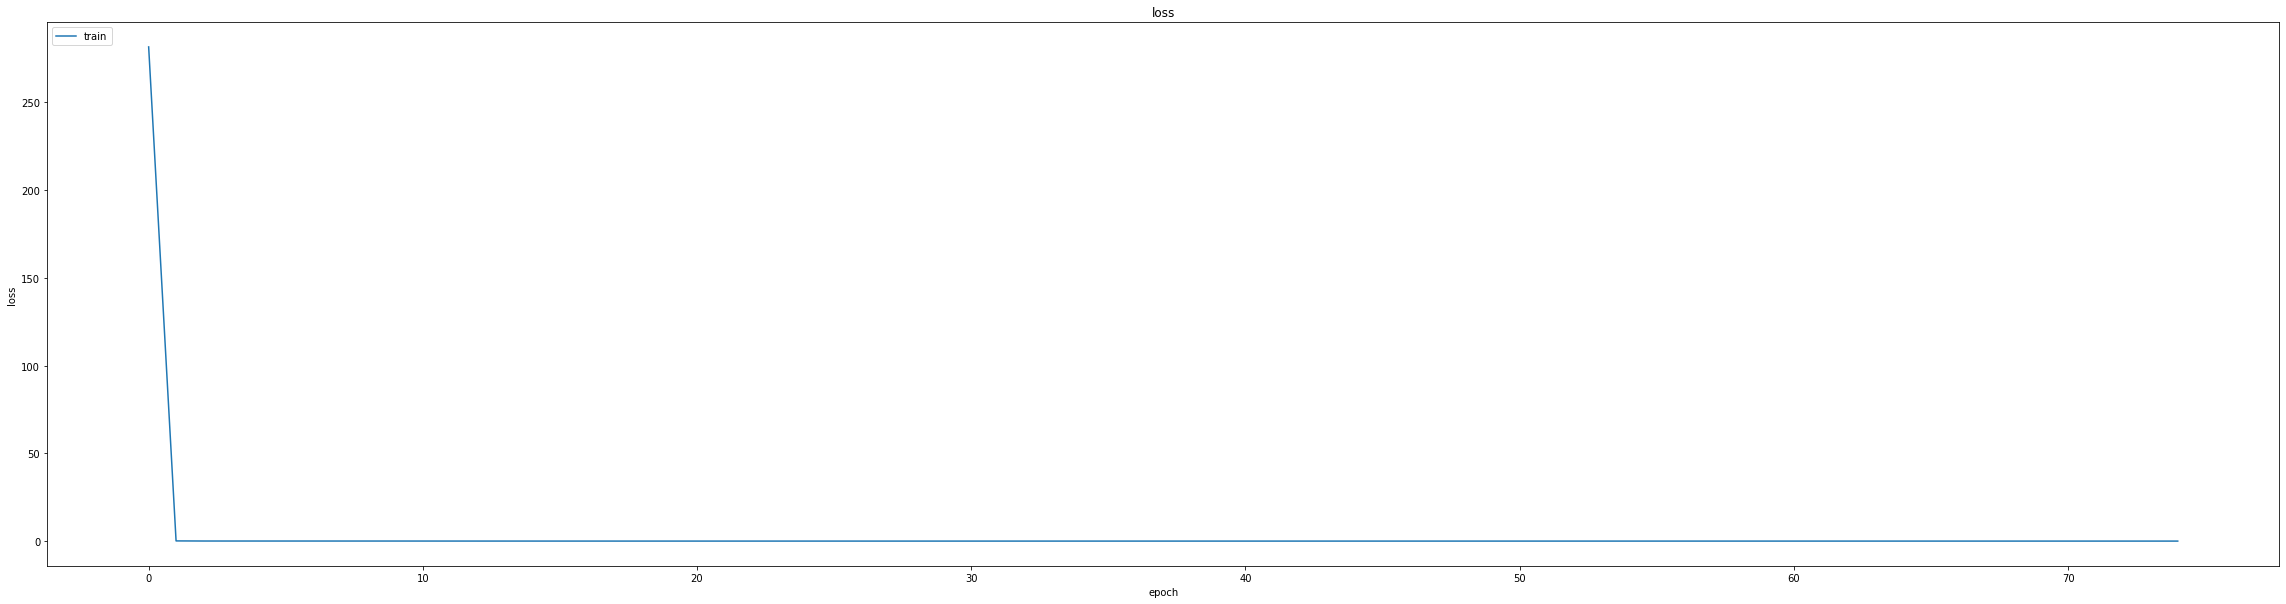

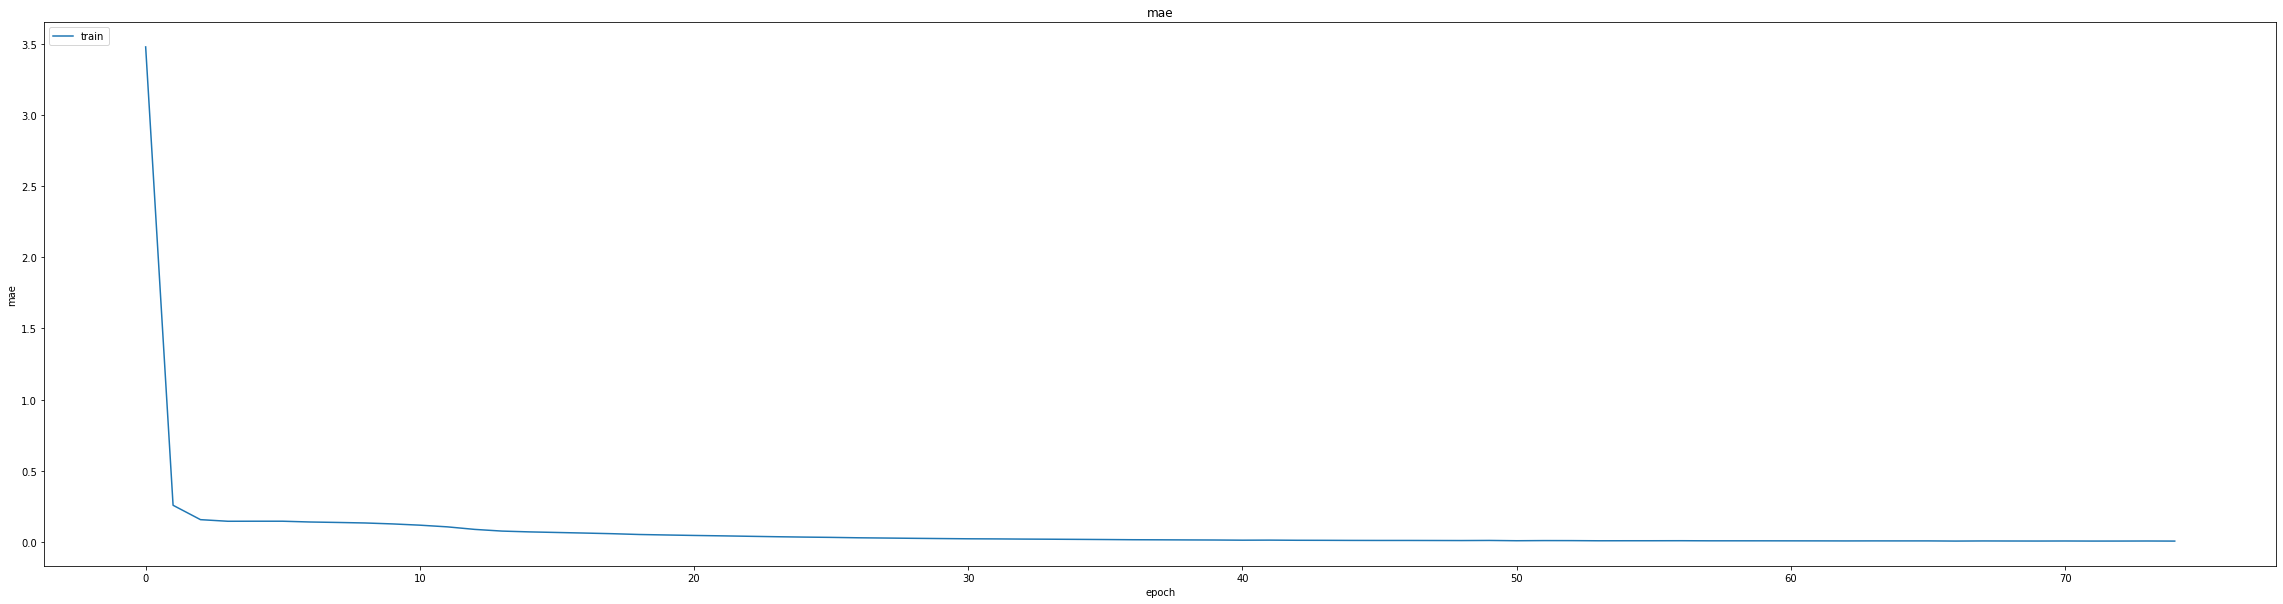

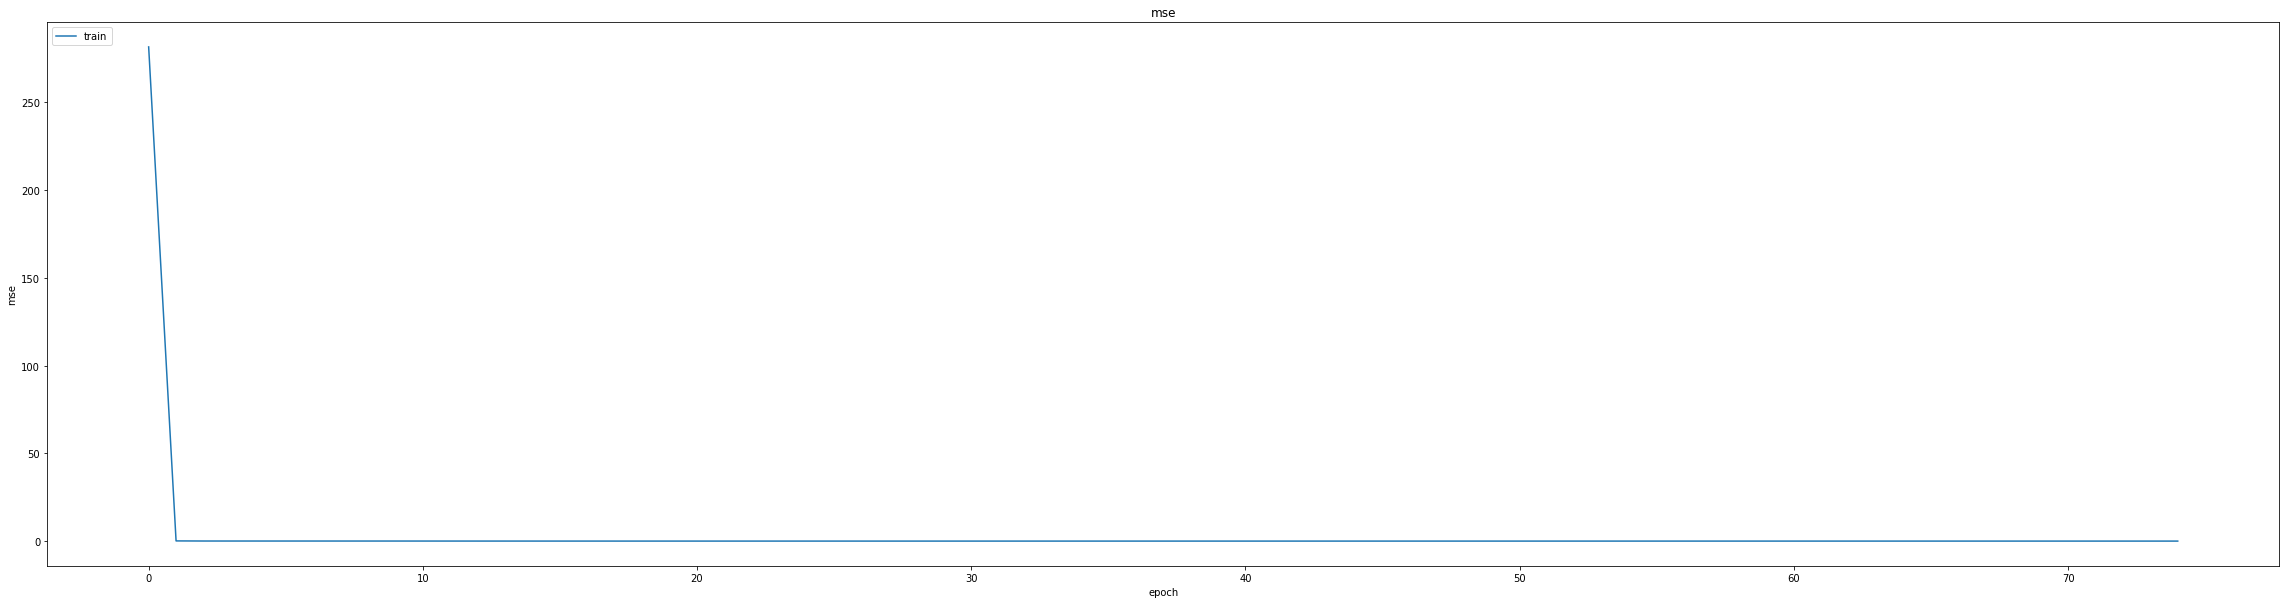

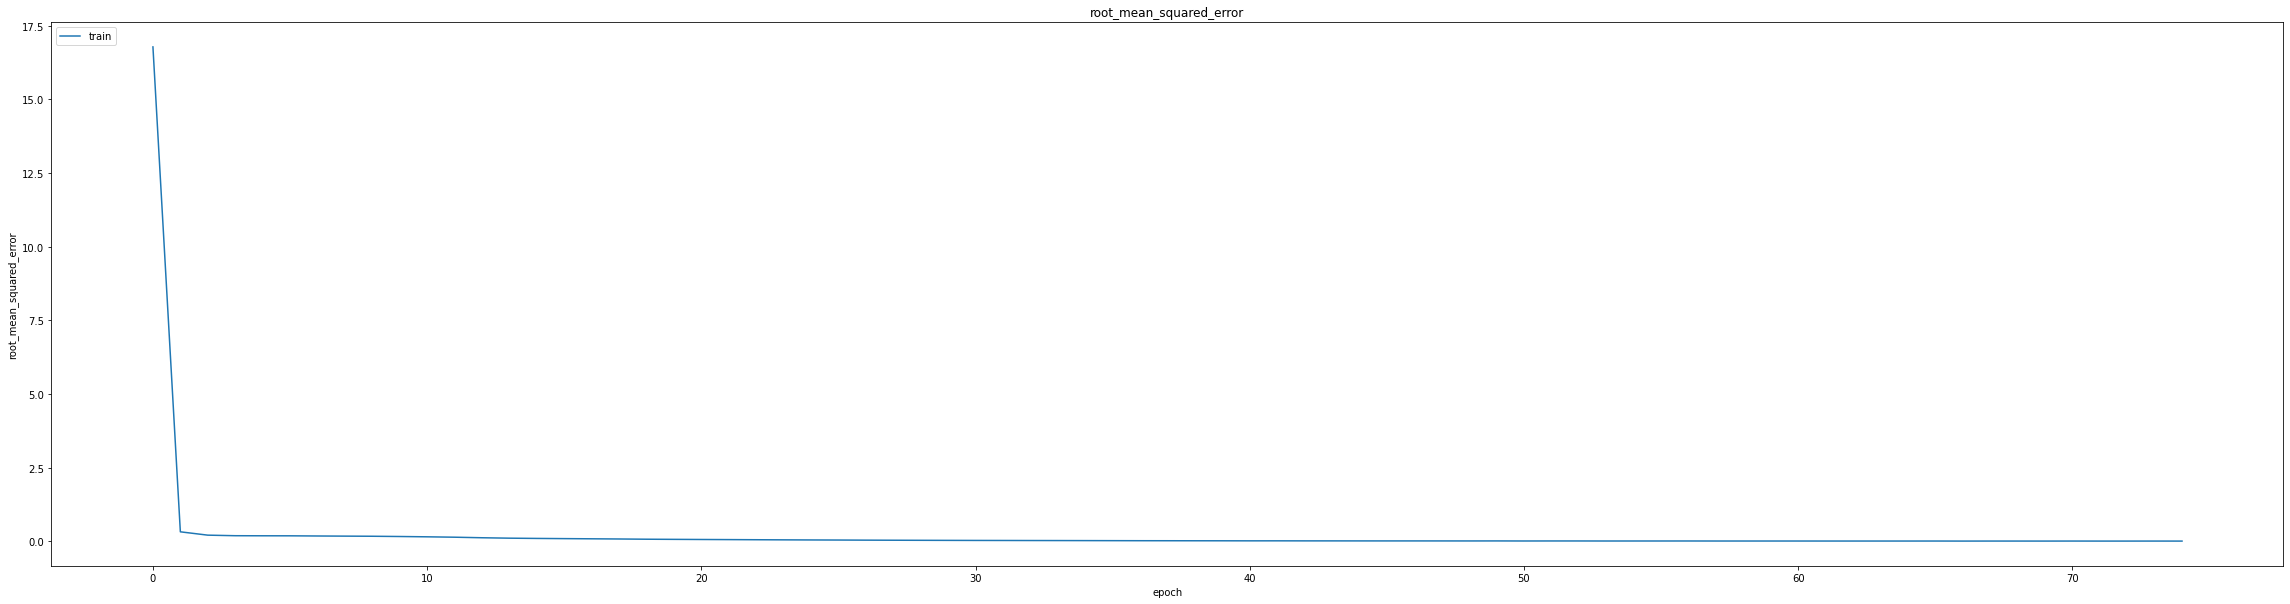

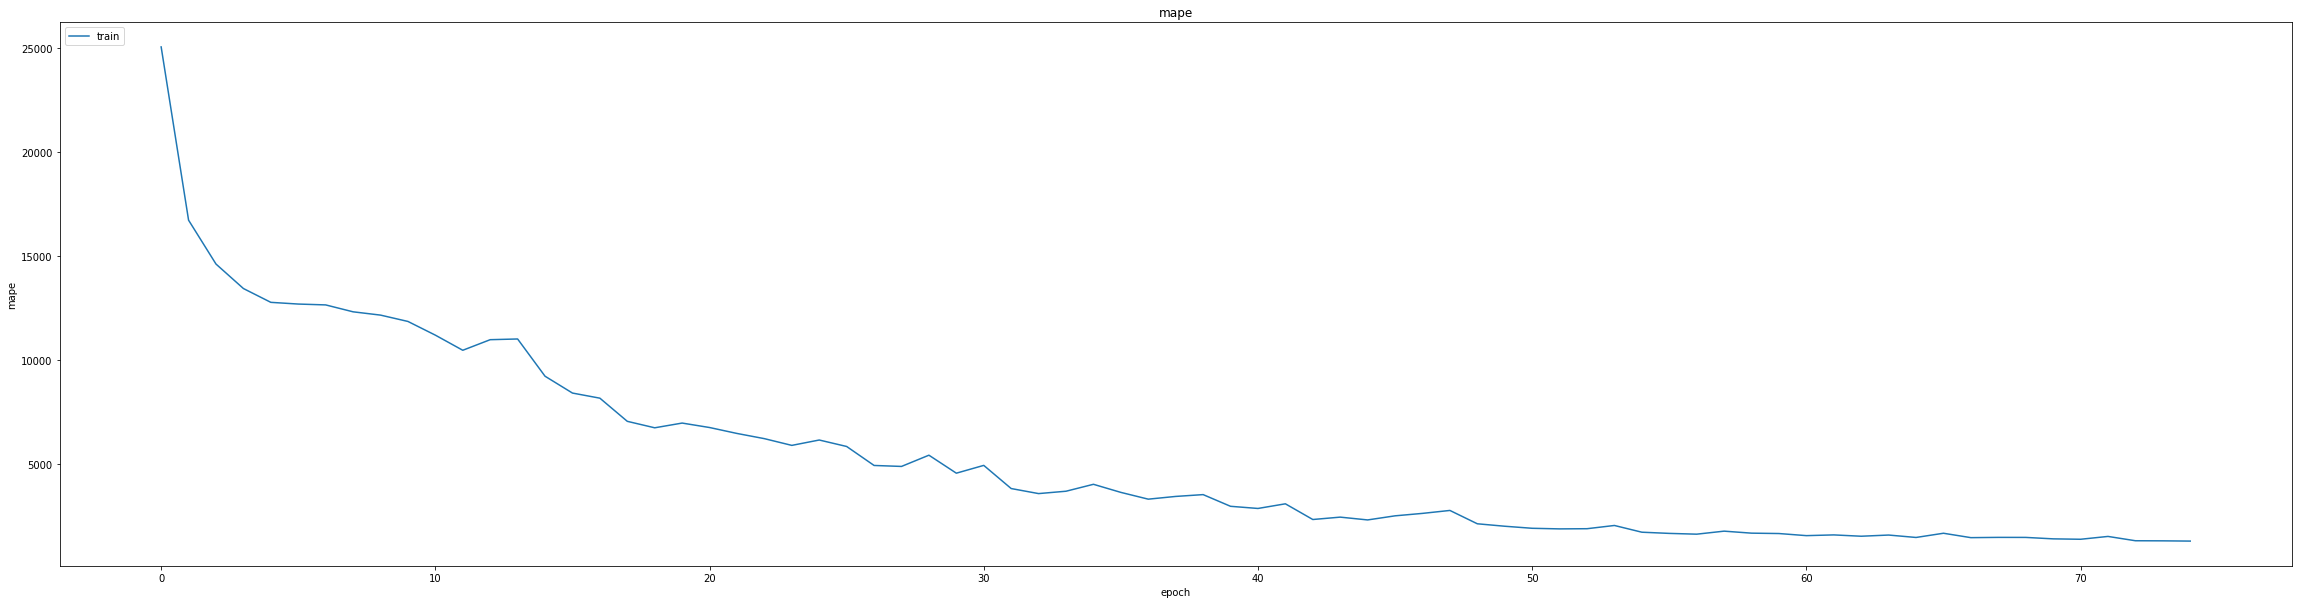

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008249625563621521
0.012491515837609768
348/348 [==============================] - 4s 7ms/step
0.9966237804787348


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
405/406 [============================>.] - ETA: 0s - loss: 7.5743e-04 - mae: 0.0110 - mse: 7.5743e-04 - root_mean_squared_error: 0.0275 - mape: 1693.4720
Epoch 1: val_mse did not improve from 0.00016
406/406 [==============================] - 18s 26ms/step - loss: 7.5582e-04 - mae: 0.0110 - mse: 7.5582e-04 - root_mean_squared_error: 0.0275 - mape: 1689.7577 - val_loss: 1.9743e-04 - val_mae: 0.0095 - val_mse: 1.9743e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 8582.5576 - lr: 0.0010
Epoch 2/25
405/406 [============================>.] - ETA: 0s - loss: 3.1338e-05 - mae: 0.0042 - mse: 3.1338e-05 - root_mean_squared_error: 0.0056 - mape: 1464.8129
Epoch 2: val_mse did not improve from 0.00016
406/406 [==============================] - 10s 24ms/step - loss: 3.1327e-05 - mae: 0.0042 - mse: 3.1327e-05 - root_mean_squared_error: 0.0056 - mape: 1461.6002 - val_loss: 1.6986e-04 - val_mae: 0.0084 - val_mse: 1.6986e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 7916.1133

406/406 [==============================] - 43s 105ms/step - loss: 2.7323e-05 - mae: 0.0041 - mse: 2.7323e-05 - root_mean_squared_error: 0.0052 - mape: 1147.5215 - val_loss: 1.4804e-04 - val_mae: 0.0080 - val_mse: 1.4804e-04 - val_root_mean_squared_error: 0.0122 - val_mape: 6603.1221 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/25
406/406 [==============================] - ETA: 0s - loss: 2.0388e-05 - mae: 0.0034 - mse: 2.0388e-05 - root_mean_squared_error: 0.0045 - mape: 954.1141
Epoch 17: val_mse did not improve from 0.00015
406/406 [==============================] - 8s 20ms/step - loss: 2.0388e-05 - mae: 0.0034 - mse: 2.0388e-05 - root_mean_squared_error: 0.0045 - mape: 954.1141 - val_loss: 1.7596e-04 - val_mae: 0.0087 - val_mse: 1.7596e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 6999.6343 - lr: 4.3047e-04
Epoch 18/25
405/406 [============================>.] - ETA: 0s - loss: 2.1995e-05 - mae: 0.0036 - mse: 2.1995e-05 - root_mean_squared_error: 0.0047 - map

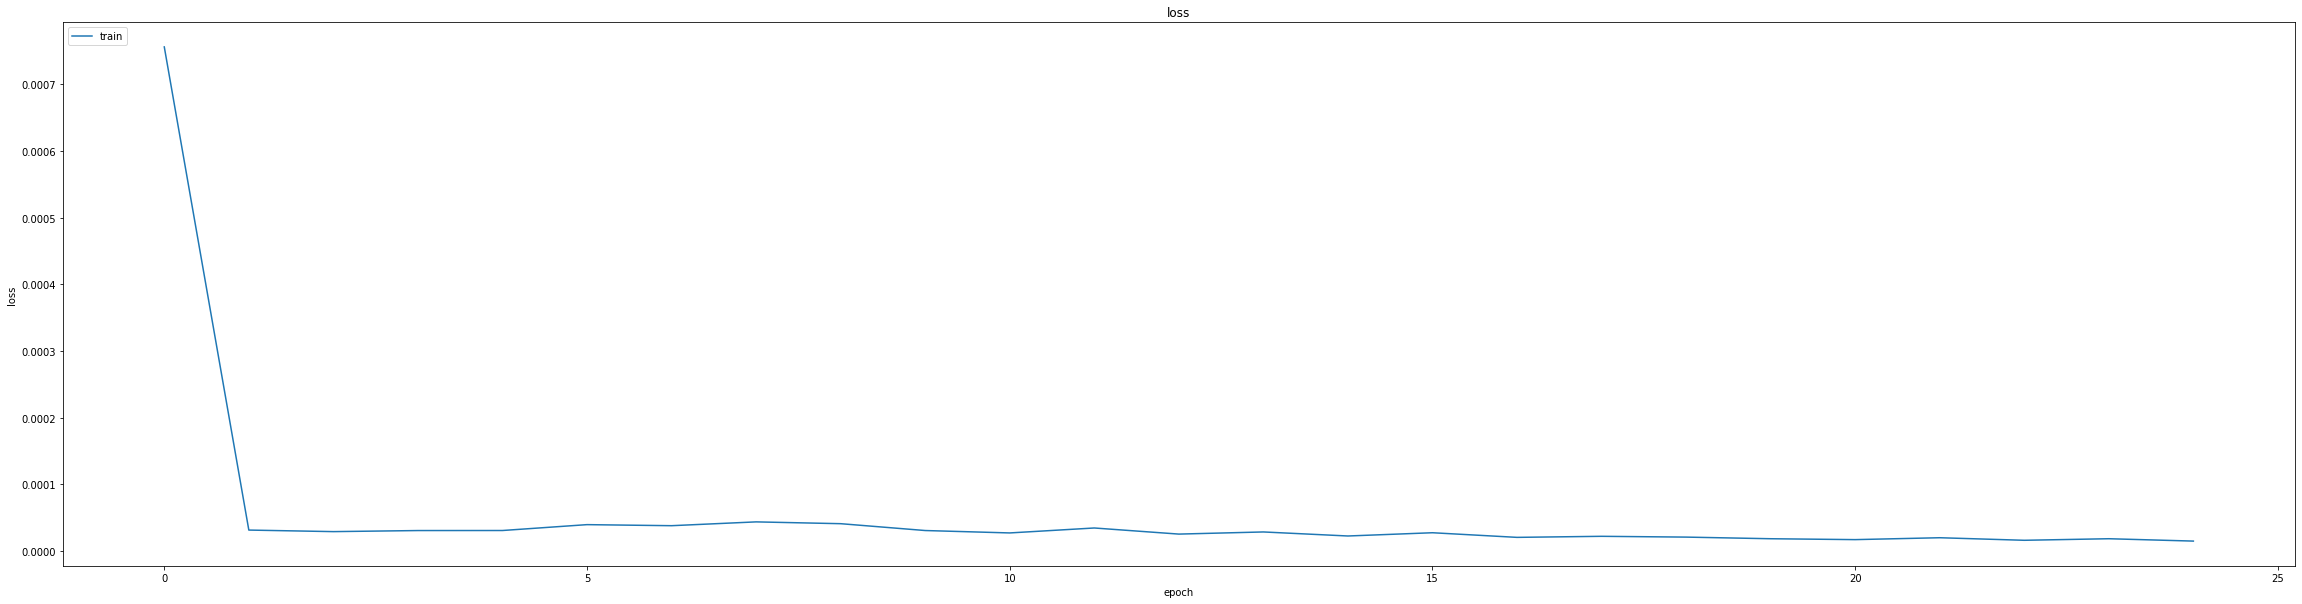

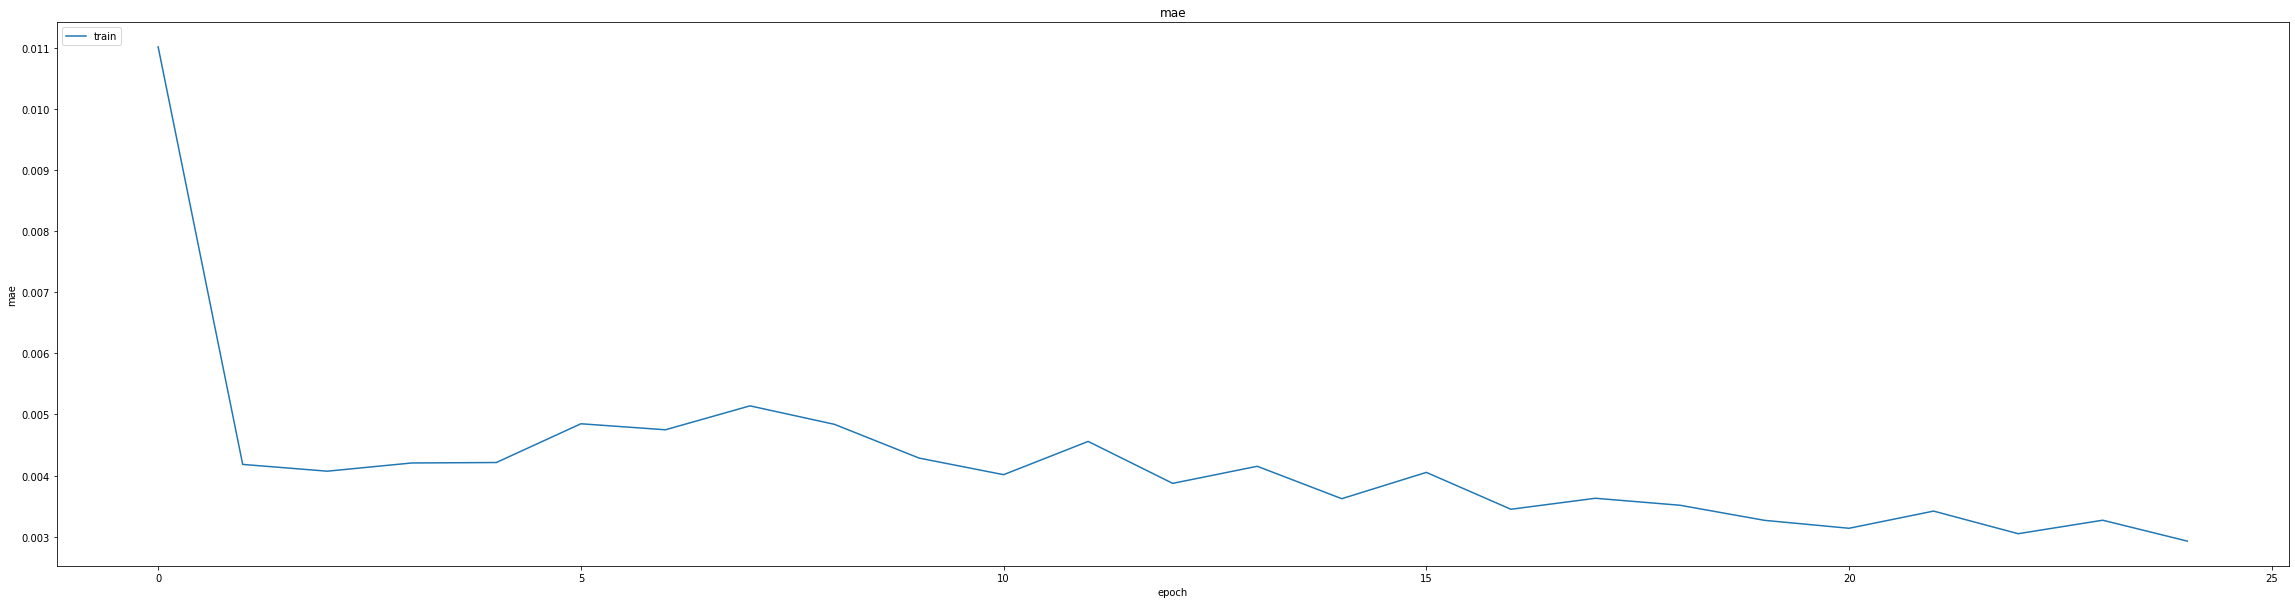

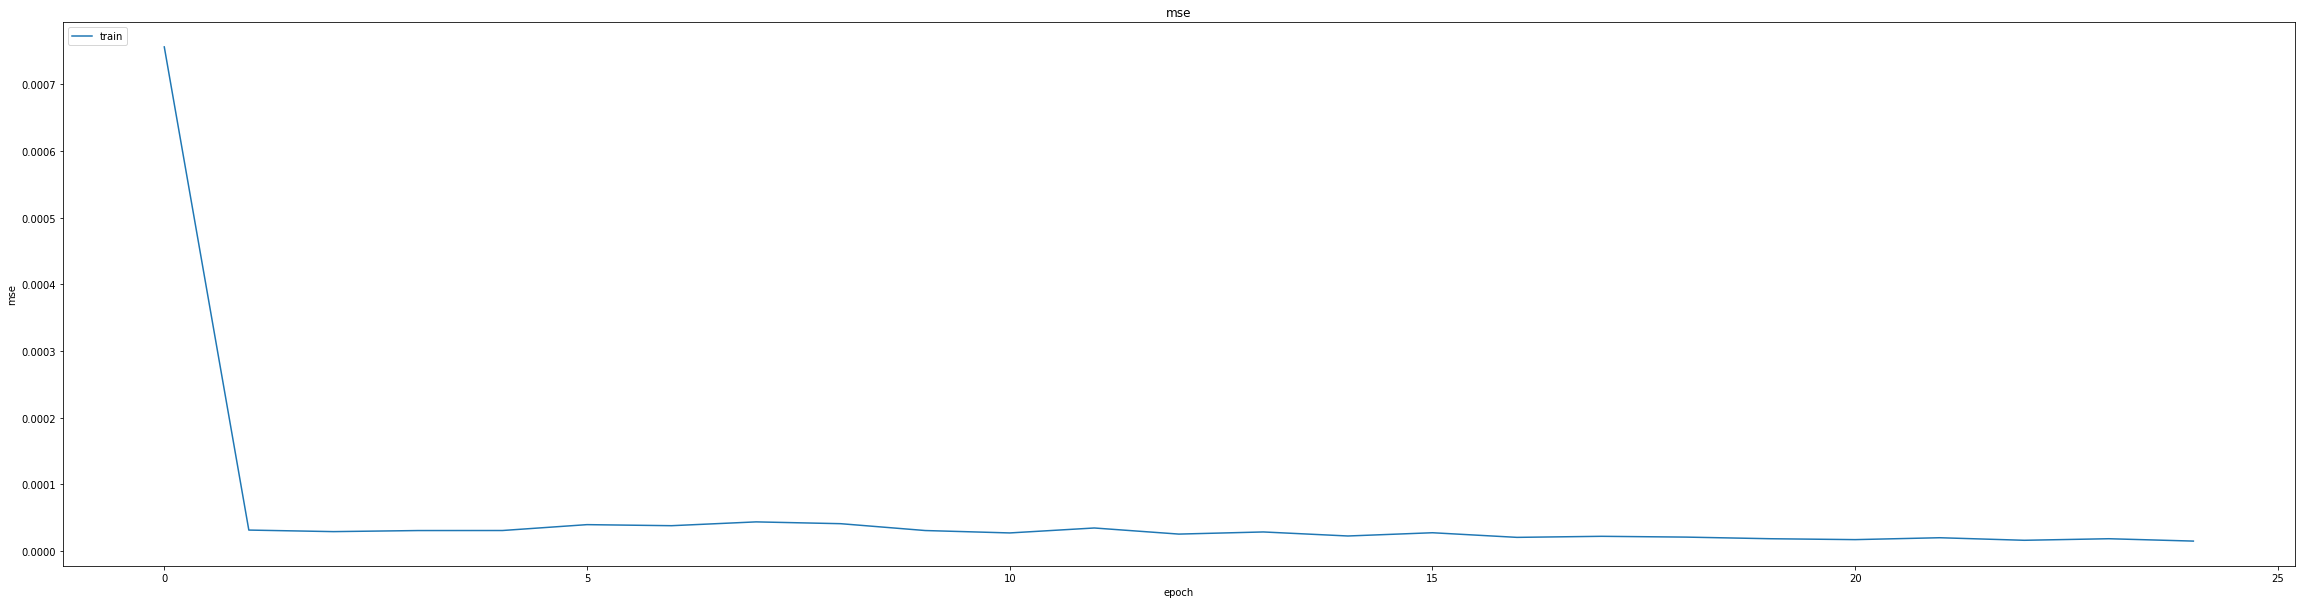

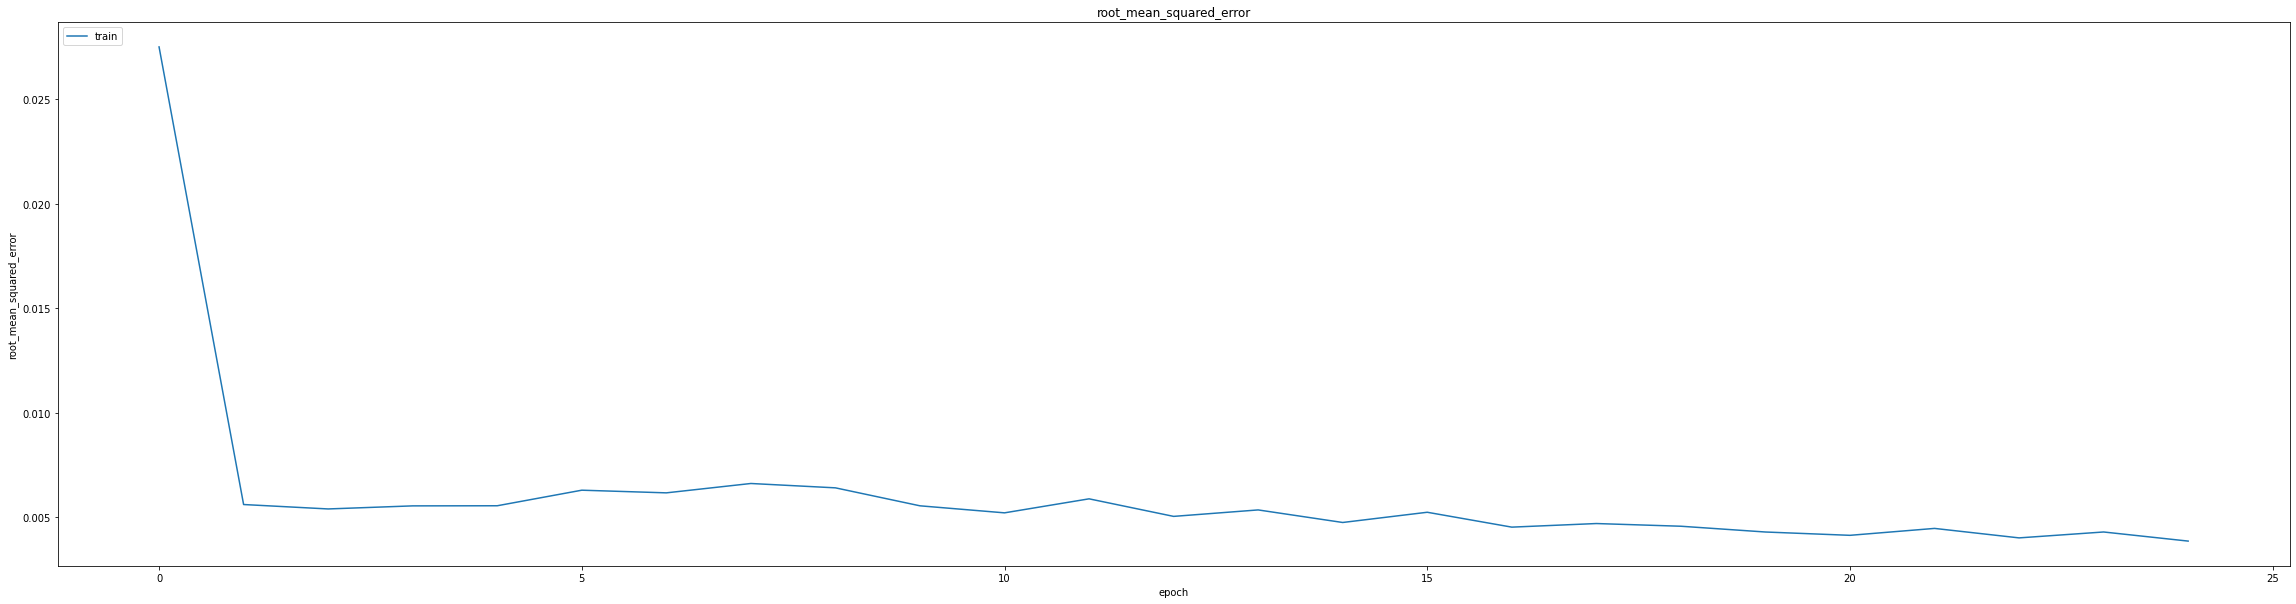

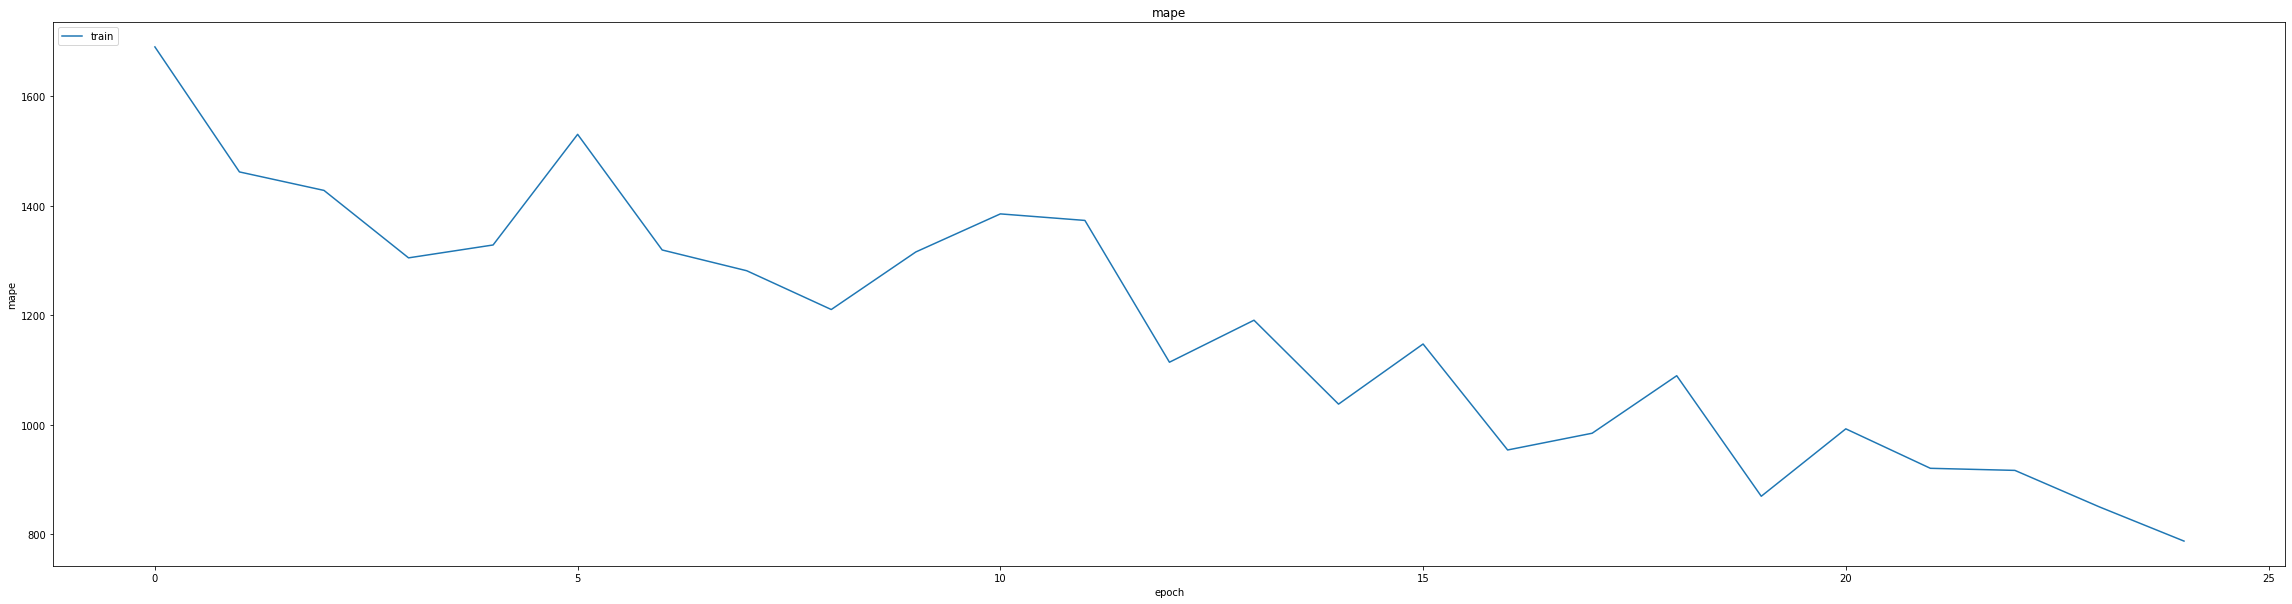

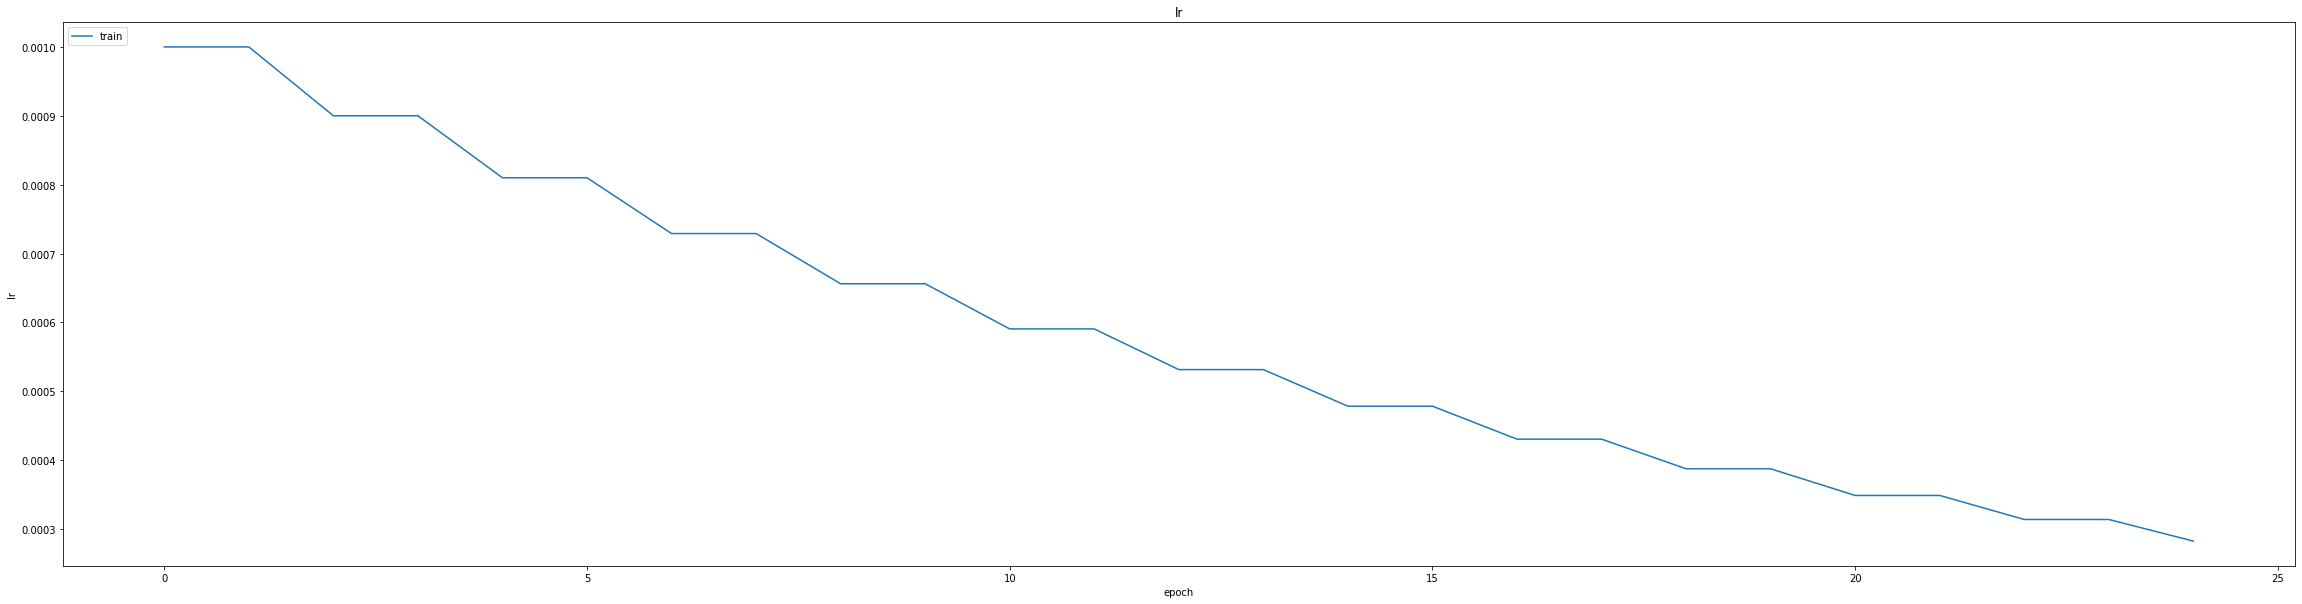

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00802811048924923
0.0121671287342906
348/348 [==============================] - 4s 7ms/step
0.9966061778254433


348/348 [==============================] - 3s 7ms/step


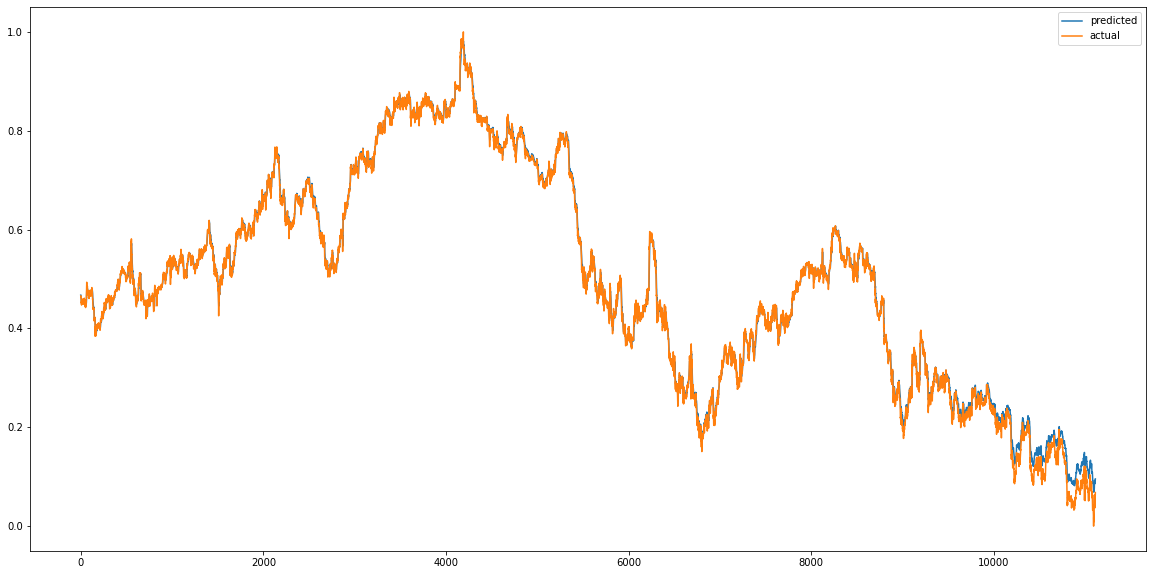

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


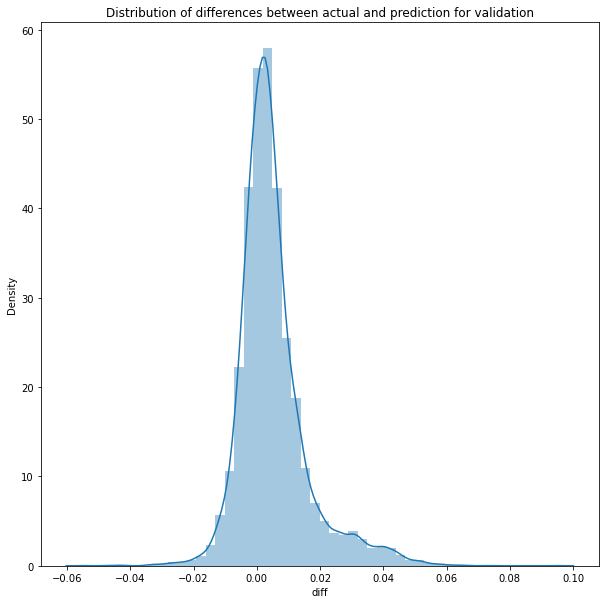

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 2s 7ms/step


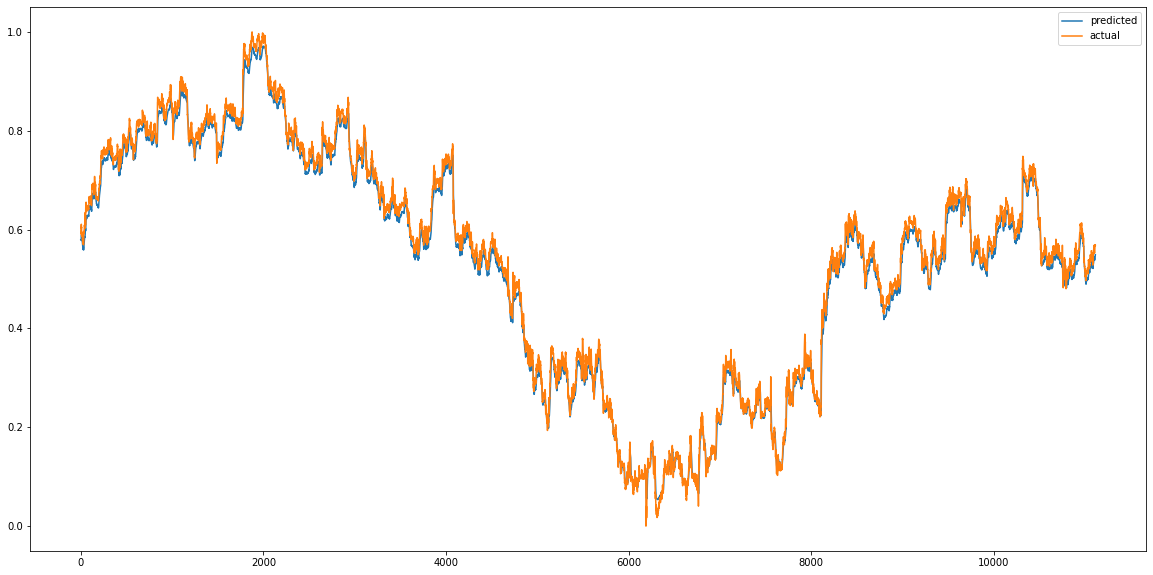

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


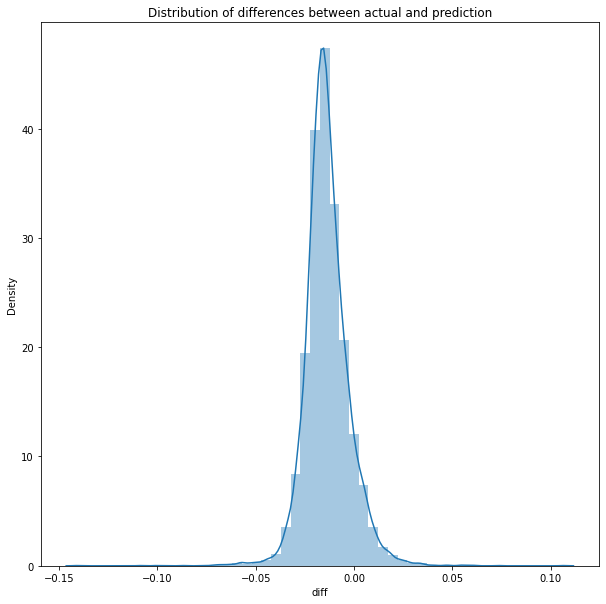

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0003144756632375538
RMSE :  0.01773346168229863
MAE :  0.015287782196198505
348/348 [==============================] - 4s 10ms/step
R2_Score  : 0.9944587954531009


count    11115.000000
mean        -0.013706
std          0.011253
min         -0.141146
25%         -0.020035
50%         -0.014688
75%         -0.008071
max          0.106317
Name: diff, dtype: float64

**LSTM_MODEL**

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 24, 256)           275456    
                                                                 
 lstm_12 (LSTM)              (None, 24, 64)            82176     
                                                                 
 dropout_6 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_13 (LSTM)              (None, 16)                5184      
                                                                 
 dense_18 (Dense)            (None, 32)                544       
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
403/406 [============================>.] - ETA: 0s - loss: 775.1063 - mae: 11.0586 - mse: 775.1063 - root_mean_squared_error: 27.8407 - mape: 106896.7578
Epoch 1: val_mse improved from inf to 4.64194, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 23s 48ms/step - loss: 769.6161 - mae: 10.9943 - mse: 769.6161 - root_mean_squared_error: 27.7420 - mape: 106137.8906 - val_loss: 4.6419 - val_mae: 2.1434 - val_mse: 4.6419 - val_root_mean_squared_error: 2.1545 - val_mape: 238370.5781
Epoch 2/75
404/406 [============================>.] - ETA: 0s - loss: 2.0341 - mae: 1.3782 - mse: 2.0341 - root_mean_squared_error: 1.4262 - mape: 32345.2578
Epoch 2: val_mse improved from 4.64194 to 1.22081, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 21s 52ms/step - loss: 2.0289 - mae: 1.3761 - mse: 2.0289 - root_mean_squared_error: 1.4244 - mape: 32195.3359 - val_loss: 1.2208 - val_mae: 1.0830 - val_mse: 1.2208 - val_root_mean_squared_error: 1.1049 - val_mape: 142630.7188
Epoch 3/75
406/406 [==============================] - ETA: 0s - loss: 0.5631 - mae: 0.7170 - mse: 0.5631 - root_mean_squared_error: 0.7504 - mape: 23805.0430
Epoch 3: val_mse improved from 1.22081 to 0.52580, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.5631 - mae: 0.7170 - mse: 0.5631 - root_mean_squared_error: 0.7504 - mape: 23805.0430 - val_loss: 0.5258 - val_mae: 0.6914 - val_mse: 0.5258 - val_root_mean_squared_error: 0.7251 - val_mape: 107265.3359
Epoch 4/75
402/406 [============================>.] - ETA: 0s - loss: 0.2226 - mae: 0.4298 - mse: 0.2226 - root_mean_squared_error: 0.4718 - mape: 25284.8379
Epoch 4: val_mse improved from 0.52580 to 0.28687, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 43ms/step - loss: 0.2219 - mae: 0.4290 - mse: 0.2219 - root_mean_squared_error: 0.4711 - mape: 25043.1816 - val_loss: 0.2869 - val_mae: 0.4890 - val_mse: 0.2869 - val_root_mean_squared_error: 0.5356 - val_mape: 88988.5625
Epoch 5/75
406/406 [==============================] - ETA: 0s - loss: 0.1067 - mae: 0.2702 - mse: 0.1067 - root_mean_squared_error: 0.3266 - mape: 17913.4766
Epoch 5: val_mse improved from 0.28687 to 0.18286, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.1067 - mae: 0.2702 - mse: 0.1067 - root_mean_squared_error: 0.3266 - mape: 17913.4766 - val_loss: 0.1829 - val_mae: 0.3696 - val_mse: 0.1829 - val_root_mean_squared_error: 0.4276 - val_mape: 78024.2578
Epoch 6/75
403/406 [============================>.] - ETA: 0s - loss: 0.0619 - mae: 0.1907 - mse: 0.0619 - root_mean_squared_error: 0.2489 - mape: 16293.3477
Epoch 6: val_mse improved from 0.18286 to 0.13141, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0619 - mae: 0.1906 - mse: 0.0619 - root_mean_squared_error: 0.2488 - mape: 16177.6504 - val_loss: 0.1314 - val_mae: 0.3040 - val_mse: 0.1314 - val_root_mean_squared_error: 0.3625 - val_mape: 70952.3047
Epoch 7/75
404/406 [============================>.] - ETA: 0s - loss: 0.0436 - mae: 0.1571 - mse: 0.0436 - root_mean_squared_error: 0.2089 - mape: 14370.6475
Epoch 7: val_mse improved from 0.13141 to 0.10421, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0436 - mae: 0.1570 - mse: 0.0436 - root_mean_squared_error: 0.2088 - mape: 14303.8643 - val_loss: 0.1042 - val_mae: 0.2685 - val_mse: 0.1042 - val_root_mean_squared_error: 0.3228 - val_mape: 66290.5000
Epoch 8/75
404/406 [============================>.] - ETA: 0s - loss: 0.0362 - mae: 0.1431 - mse: 0.0362 - root_mean_squared_error: 0.1903 - mape: 13771.1729
Epoch 8: val_mse improved from 0.10421 to 0.08940, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0362 - mae: 0.1432 - mse: 0.0362 - root_mean_squared_error: 0.1904 - mape: 13707.2002 - val_loss: 0.0894 - val_mae: 0.2486 - val_mse: 0.0894 - val_root_mean_squared_error: 0.2990 - val_mape: 63264.4219
Epoch 9/75
404/406 [============================>.] - ETA: 0s - loss: 0.0338 - mae: 0.1394 - mse: 0.0338 - root_mean_squared_error: 0.1838 - mape: 14138.0527
Epoch 9: val_mse improved from 0.08940 to 0.08131, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 41ms/step - loss: 0.0338 - mae: 0.1394 - mse: 0.0338 - root_mean_squared_error: 0.1838 - mape: 14072.3330 - val_loss: 0.0813 - val_mae: 0.2373 - val_mse: 0.0813 - val_root_mean_squared_error: 0.2851 - val_mape: 61377.7969
Epoch 10/75
402/406 [============================>.] - ETA: 0s - loss: 0.0330 - mae: 0.1392 - mse: 0.0330 - root_mean_squared_error: 0.1816 - mape: 13137.3945
Epoch 10: val_mse improved from 0.08131 to 0.07702, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0329 - mae: 0.1392 - mse: 0.0329 - root_mean_squared_error: 0.1815 - mape: 13011.7334 - val_loss: 0.0770 - val_mae: 0.2311 - val_mse: 0.0770 - val_root_mean_squared_error: 0.2775 - val_mape: 60285.1914
Epoch 11/75
403/406 [============================>.] - ETA: 0s - loss: 0.0326 - mae: 0.1396 - mse: 0.0326 - root_mean_squared_error: 0.1806 - mape: 13740.2754
Epoch 11: val_mse improved from 0.07702 to 0.07505, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0326 - mae: 0.1396 - mse: 0.0326 - root_mean_squared_error: 0.1807 - mape: 13642.6465 - val_loss: 0.0751 - val_mae: 0.2282 - val_mse: 0.0751 - val_root_mean_squared_error: 0.2740 - val_mape: 59757.5039
Epoch 12/75
401/406 [============================>.] - ETA: 0s - loss: 0.0326 - mae: 0.1397 - mse: 0.0326 - root_mean_squared_error: 0.1806 - mape: 13421.4365
Epoch 12: val_mse improved from 0.07505 to 0.07406, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 41ms/step - loss: 0.0326 - mae: 0.1397 - mse: 0.0326 - root_mean_squared_error: 0.1805 - mape: 13260.0479 - val_loss: 0.0741 - val_mae: 0.2267 - val_mse: 0.0741 - val_root_mean_squared_error: 0.2721 - val_mape: 59481.6406
Epoch 13/75
405/406 [============================>.] - ETA: 0s - loss: 0.0325 - mae: 0.1401 - mse: 0.0325 - root_mean_squared_error: 0.1804 - mape: 12500.4619
Epoch 13: val_mse improved from 0.07406 to 0.07391, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0325 - mae: 0.1401 - mse: 0.0325 - root_mean_squared_error: 0.1804 - mape: 12473.1006 - val_loss: 0.0739 - val_mae: 0.2265 - val_mse: 0.0739 - val_root_mean_squared_error: 0.2719 - val_mape: 59441.0430
Epoch 14/75
406/406 [==============================] - ETA: 0s - loss: 0.0325 - mae: 0.1399 - mse: 0.0325 - root_mean_squared_error: 0.1803 - mape: 12418.2109
Epoch 14: val_mse did not improve from 0.07391
406/406 [==============================] - 5s 12ms/step - loss: 0.0325 - mae: 0.1399 - mse: 0.0325 - root_mean_squared_error: 0.1803 - mape: 12418.2109 - val_loss: 0.0741 - val_mae: 0.2268 - val_mse: 0.0741 - val_root_mean_squared_error: 0.2723 - val_mape: 59501.6289
Epoch 15/75
403/406 [============================>.] - ETA: 0s - loss: 0.0325 - mae: 0.1399 - mse: 0.0325 - root_mean_squared_error: 0.1803 - mape: 13737.8115
Epoch 15: val_mse did not improve from 0.07391
406/406 [==============================] - 5s 12ms/

406/406 [==============================] - 16s 40ms/step - loss: 0.0320 - mae: 0.1385 - mse: 0.0320 - root_mean_squared_error: 0.1790 - mape: 12814.5244 - val_loss: 0.0738 - val_mae: 0.2261 - val_mse: 0.0738 - val_root_mean_squared_error: 0.2716 - val_mape: 59399.2695
Epoch 32/75
405/406 [============================>.] - ETA: 0s - loss: 0.0263 - mae: 0.1241 - mse: 0.0263 - root_mean_squared_error: 0.1621 - mape: 12198.3955
Epoch 32: val_mse improved from 0.07378 to 0.03604, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 42ms/step - loss: 0.0263 - mae: 0.1241 - mse: 0.0263 - root_mean_squared_error: 0.1621 - mape: 12171.6719 - val_loss: 0.0360 - val_mae: 0.1538 - val_mse: 0.0360 - val_root_mean_squared_error: 0.1898 - val_mape: 47439.2344
Epoch 33/75
405/406 [============================>.] - ETA: 0s - loss: 0.0090 - mae: 0.0693 - mse: 0.0090 - root_mean_squared_error: 0.0947 - mape: 7917.1514
Epoch 33: val_mse improved from 0.03604 to 0.01177, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0090 - mae: 0.0692 - mse: 0.0090 - root_mean_squared_error: 0.0947 - mape: 7899.8042 - val_loss: 0.0118 - val_mae: 0.0824 - val_mse: 0.0118 - val_root_mean_squared_error: 0.1085 - val_mape: 34686.8164
Epoch 34/75
402/406 [============================>.] - ETA: 0s - loss: 0.0035 - mae: 0.0436 - mse: 0.0035 - root_mean_squared_error: 0.0594 - mape: 6201.7319
Epoch 34: val_mse improved from 0.01177 to 0.00485, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 41ms/step - loss: 0.0035 - mae: 0.0436 - mse: 0.0035 - root_mean_squared_error: 0.0593 - mape: 6142.3618 - val_loss: 0.0049 - val_mae: 0.0435 - val_mse: 0.0049 - val_root_mean_squared_error: 0.0697 - val_mape: 27908.1211
Epoch 35/75
403/406 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0345 - mse: 0.0021 - root_mean_squared_error: 0.0462 - mape: 5897.0083
Epoch 35: val_mse improved from 0.00485 to 0.00358, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 38ms/step - loss: 0.0021 - mae: 0.0345 - mse: 0.0021 - root_mean_squared_error: 0.0462 - mape: 5855.0552 - val_loss: 0.0036 - val_mae: 0.0424 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0599 - val_mape: 24823.7363
Epoch 36/75
404/406 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0297 - mse: 0.0016 - root_mean_squared_error: 0.0397 - mape: 5115.5186
Epoch 36: val_mse improved from 0.00358 to 0.00270, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0016 - mae: 0.0296 - mse: 0.0016 - root_mean_squared_error: 0.0396 - mape: 5091.7129 - val_loss: 0.0027 - val_mae: 0.0342 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0520 - val_mape: 23370.6797
Epoch 37/75
405/406 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0260 - mse: 0.0012 - root_mean_squared_error: 0.0348 - mape: 4721.5879
Epoch 37: val_mse did not improve from 0.00270
406/406 [==============================] - 5s 12ms/step - loss: 0.0012 - mae: 0.0260 - mse: 0.0012 - root_mean_squared_error: 0.0348 - mape: 4711.2437 - val_loss: 0.0031 - val_mae: 0.0431 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0553 - val_mape: 22113.8340
Epoch 38/75
405/406 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0238 - mse: 0.0010 - root_mean_squared_error: 0.0319 - mape: 4646.0083
Epoch 38: val_mse improved from 0.00270 to 0.00208, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 16s 40ms/step - loss: 0.0010 - mae: 0.0238 - mse: 0.0010 - root_mean_squared_error: 0.0319 - mape: 4635.8232 - val_loss: 0.0021 - val_mae: 0.0295 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0456 - val_mape: 21196.3066
Epoch 39/75
403/406 [============================>.] - ETA: 0s - loss: 8.3347e-04 - mae: 0.0215 - mse: 8.3347e-04 - root_mean_squared_error: 0.0289 - mape: 4413.2949
Epoch 39: val_mse improved from 0.00208 to 0.00198, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 8.3129e-04 - mae: 0.0215 - mse: 8.3129e-04 - root_mean_squared_error: 0.0288 - mape: 4381.8862 - val_loss: 0.0020 - val_mae: 0.0303 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0445 - val_mape: 20392.7012
Epoch 40/75
404/406 [============================>.] - ETA: 0s - loss: 6.8792e-04 - mae: 0.0194 - mse: 6.8792e-04 - root_mean_squared_error: 0.0262 - mape: 4132.6797
Epoch 40: val_mse improved from 0.00198 to 0.00196, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 6.8727e-04 - mae: 0.0194 - mse: 6.8727e-04 - root_mean_squared_error: 0.0262 - mape: 4113.4468 - val_loss: 0.0020 - val_mae: 0.0326 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0443 - val_mape: 19456.0840
Epoch 41/75
402/406 [============================>.] - ETA: 0s - loss: 5.6066e-04 - mae: 0.0175 - mse: 5.6066e-04 - root_mean_squared_error: 0.0237 - mape: 4237.6851
Epoch 41: val_mse improved from 0.00196 to 0.00183, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 5.5973e-04 - mae: 0.0175 - mse: 5.5973e-04 - root_mean_squared_error: 0.0237 - mape: 4197.0972 - val_loss: 0.0018 - val_mae: 0.0325 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0428 - val_mape: 18672.2656
Epoch 42/75
404/406 [============================>.] - ETA: 0s - loss: 5.0276e-04 - mae: 0.0167 - mse: 5.0276e-04 - root_mean_squared_error: 0.0224 - mape: 3889.4226
Epoch 42: val_mse improved from 0.00183 to 0.00165, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 5.0285e-04 - mae: 0.0167 - mse: 5.0285e-04 - root_mean_squared_error: 0.0224 - mape: 3871.3525 - val_loss: 0.0016 - val_mae: 0.0304 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0406 - val_mape: 18004.5488
Epoch 43/75
405/406 [============================>.] - ETA: 0s - loss: 4.7561e-04 - mae: 0.0164 - mse: 4.7561e-04 - root_mean_squared_error: 0.0218 - mape: 3880.5771
Epoch 43: val_mse improved from 0.00165 to 0.00146, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 4.7577e-04 - mae: 0.0164 - mse: 4.7577e-04 - root_mean_squared_error: 0.0218 - mape: 3872.0708 - val_loss: 0.0015 - val_mae: 0.0285 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0383 - val_mape: 17291.3926
Epoch 44/75
406/406 [==============================] - ETA: 0s - loss: 3.9296e-04 - mae: 0.0148 - mse: 3.9296e-04 - root_mean_squared_error: 0.0198 - mape: 3550.6948
Epoch 44: val_mse improved from 0.00146 to 0.00126, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 3.9296e-04 - mae: 0.0148 - mse: 3.9296e-04 - root_mean_squared_error: 0.0198 - mape: 3550.6948 - val_loss: 0.0013 - val_mae: 0.0262 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0355 - val_mape: 16532.5918
Epoch 45/75
403/406 [============================>.] - ETA: 0s - loss: 3.6797e-04 - mae: 0.0145 - mse: 3.6797e-04 - root_mean_squared_error: 0.0192 - mape: 3399.1655
Epoch 45: val_mse improved from 0.00126 to 0.00123, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 3.6778e-04 - mae: 0.0144 - mse: 3.6778e-04 - root_mean_squared_error: 0.0192 - mape: 3375.0083 - val_loss: 0.0012 - val_mae: 0.0252 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0350 - val_mape: 16062.8730
Epoch 46/75
403/406 [============================>.] - ETA: 0s - loss: 3.0572e-04 - mae: 0.0131 - mse: 3.0572e-04 - root_mean_squared_error: 0.0175 - mape: 3507.4629
Epoch 46: val_mse did not improve from 0.00123
406/406 [==============================] - 5s 12ms/step - loss: 3.0509e-04 - mae: 0.0131 - mse: 3.0509e-04 - root_mean_squared_error: 0.0175 - mape: 3482.4978 - val_loss: 0.0013 - val_mae: 0.0260 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0360 - val_mape: 15552.9541
Epoch 47/75
403/406 [============================>.] - ETA: 0s - loss: 3.1196e-04 - mae: 0.0135 - mse: 3.1196e-04 - root_mean_squared_error: 0.0177 - mape: 3223.4001
Epoch 47: val_mse improved from 0.00123 to 0.00100, saving model to /c

406/406 [==============================] - 16s 40ms/step - loss: 3.1276e-04 - mae: 0.0135 - mse: 3.1276e-04 - root_mean_squared_error: 0.0177 - mape: 3200.4661 - val_loss: 9.9687e-04 - val_mae: 0.0237 - val_mse: 9.9687e-04 - val_root_mean_squared_error: 0.0316 - val_mape: 14613.0215
Epoch 48/75
403/406 [============================>.] - ETA: 0s - loss: 2.8274e-04 - mae: 0.0128 - mse: 2.8274e-04 - root_mean_squared_error: 0.0168 - mape: 3559.0369
Epoch 48: val_mse improved from 0.00100 to 0.00097, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 2.8213e-04 - mae: 0.0127 - mse: 2.8213e-04 - root_mean_squared_error: 0.0168 - mape: 3533.7073 - val_loss: 9.7403e-04 - val_mae: 0.0238 - val_mse: 9.7403e-04 - val_root_mean_squared_error: 0.0312 - val_mape: 13965.5479
Epoch 49/75
405/406 [============================>.] - ETA: 0s - loss: 2.6379e-04 - mae: 0.0124 - mse: 2.6379e-04 - root_mean_squared_error: 0.0162 - mape: 3036.6836
Epoch 49: val_mse improved from 0.00097 to 0.00089, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 2.6360e-04 - mae: 0.0124 - mse: 2.6360e-04 - root_mean_squared_error: 0.0162 - mape: 3030.0242 - val_loss: 8.8995e-04 - val_mae: 0.0219 - val_mse: 8.8995e-04 - val_root_mean_squared_error: 0.0298 - val_mape: 13553.5049
Epoch 50/75
403/406 [============================>.] - ETA: 0s - loss: 2.3085e-04 - mae: 0.0116 - mse: 2.3085e-04 - root_mean_squared_error: 0.0152 - mape: 3310.5723
Epoch 50: val_mse did not improve from 0.00089
406/406 [==============================] - 5s 12ms/step - loss: 2.3049e-04 - mae: 0.0116 - mse: 2.3049e-04 - root_mean_squared_error: 0.0152 - mape: 3287.0095 - val_loss: 0.0011 - val_mae: 0.0262 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0331 - val_mape: 13004.7646
Epoch 51/75
403/406 [============================>.] - ETA: 0s - loss: 2.4297e-04 - mae: 0.0120 - mse: 2.4297e-04 - root_mean_squared_error: 0.0156 - mape: 3198.1077
Epoch 51: val_mse did not improve from 0.00089
406/406 [======

406/406 [==============================] - 16s 39ms/step - loss: 1.6990e-04 - mae: 0.0101 - mse: 1.6990e-04 - root_mean_squared_error: 0.0130 - mape: 2210.1477 - val_loss: 7.1923e-04 - val_mae: 0.0207 - val_mse: 7.1923e-04 - val_root_mean_squared_error: 0.0268 - val_mape: 10103.0244
Epoch 58/75
402/406 [============================>.] - ETA: 0s - loss: 1.6756e-04 - mae: 0.0100 - mse: 1.6756e-04 - root_mean_squared_error: 0.0129 - mape: 2231.5447
Epoch 58: val_mse did not improve from 0.00072
406/406 [==============================] - 5s 12ms/step - loss: 1.6710e-04 - mae: 0.0100 - mse: 1.6710e-04 - root_mean_squared_error: 0.0129 - mape: 2210.1697 - val_loss: 9.4652e-04 - val_mae: 0.0242 - val_mse: 9.4652e-04 - val_root_mean_squared_error: 0.0308 - val_mape: 10664.6729
Epoch 59/75
403/406 [============================>.] - ETA: 0s - loss: 1.5701e-04 - mae: 0.0097 - mse: 1.5701e-04 - root_mean_squared_error: 0.0125 - mape: 1991.4510
Epoch 59: val_mse did not improve from 0.00072
406/406

406/406 [==============================] - 15s 37ms/step - loss: 1.4039e-04 - mae: 0.0092 - mse: 1.4039e-04 - root_mean_squared_error: 0.0118 - mape: 1919.7985 - val_loss: 5.9226e-04 - val_mae: 0.0186 - val_mse: 5.9226e-04 - val_root_mean_squared_error: 0.0243 - val_mape: 9243.4521
Epoch 61/75
406/406 [==============================] - ETA: 0s - loss: 1.6791e-04 - mae: 0.0101 - mse: 1.6791e-04 - root_mean_squared_error: 0.0130 - mape: 2158.2031
Epoch 61: val_mse did not improve from 0.00059
406/406 [==============================] - 5s 12ms/step - loss: 1.6791e-04 - mae: 0.0101 - mse: 1.6791e-04 - root_mean_squared_error: 0.0130 - mape: 2158.2031 - val_loss: 7.6754e-04 - val_mae: 0.0216 - val_mse: 7.6754e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 9645.8789
Epoch 62/75
403/406 [============================>.] - ETA: 0s - loss: 1.5663e-04 - mae: 0.0097 - mse: 1.5663e-04 - root_mean_squared_error: 0.0125 - mape: 2236.0986
Epoch 62: val_mse improved from 0.00059 to 0.00058, savi

406/406 [==============================] - 16s 39ms/step - loss: 1.5628e-04 - mae: 0.0097 - mse: 1.5628e-04 - root_mean_squared_error: 0.0125 - mape: 2220.1841 - val_loss: 5.7539e-04 - val_mae: 0.0184 - val_mse: 5.7539e-04 - val_root_mean_squared_error: 0.0240 - val_mape: 8853.0049
Epoch 63/75
402/406 [============================>.] - ETA: 0s - loss: 1.3217e-04 - mae: 0.0089 - mse: 1.3217e-04 - root_mean_squared_error: 0.0115 - mape: 1952.9280
Epoch 63: val_mse did not improve from 0.00058
406/406 [==============================] - 5s 12ms/step - loss: 1.3210e-04 - mae: 0.0089 - mse: 1.3210e-04 - root_mean_squared_error: 0.0115 - mape: 1934.2230 - val_loss: 8.6117e-04 - val_mae: 0.0220 - val_mse: 8.6117e-04 - val_root_mean_squared_error: 0.0293 - val_mape: 9625.3008
Epoch 64/75
406/406 [==============================] - ETA: 0s - loss: 1.3294e-04 - mae: 0.0089 - mse: 1.3294e-04 - root_mean_squared_error: 0.0115 - mape: 1890.5187
Epoch 64: val_mse improved from 0.00058 to 0.00056, savi

406/406 [==============================] - 16s 40ms/step - loss: 1.3294e-04 - mae: 0.0089 - mse: 1.3294e-04 - root_mean_squared_error: 0.0115 - mape: 1890.5187 - val_loss: 5.6108e-04 - val_mae: 0.0181 - val_mse: 5.6108e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 8623.2490
Epoch 65/75
406/406 [==============================] - ETA: 0s - loss: 1.3620e-04 - mae: 0.0091 - mse: 1.3620e-04 - root_mean_squared_error: 0.0117 - mape: 1784.4200
Epoch 65: val_mse improved from 0.00056 to 0.00054, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 1.3620e-04 - mae: 0.0091 - mse: 1.3620e-04 - root_mean_squared_error: 0.0117 - mape: 1784.4200 - val_loss: 5.4106e-04 - val_mae: 0.0180 - val_mse: 5.4106e-04 - val_root_mean_squared_error: 0.0233 - val_mape: 8526.3008
Epoch 66/75
406/406 [==============================] - ETA: 0s - loss: 1.2089e-04 - mae: 0.0085 - mse: 1.2089e-04 - root_mean_squared_error: 0.0110 - mape: 1772.5220
Epoch 66: val_mse did not improve from 0.00054
406/406 [==============================] - 5s 12ms/step - loss: 1.2089e-04 - mae: 0.0085 - mse: 1.2089e-04 - root_mean_squared_error: 0.0110 - mape: 1772.5220 - val_loss: 6.7005e-04 - val_mae: 0.0202 - val_mse: 6.7005e-04 - val_root_mean_squared_error: 0.0259 - val_mape: 8565.6631
Epoch 67/75
403/406 [============================>.] - ETA: 0s - loss: 1.0865e-04 - mae: 0.0081 - mse: 1.0865e-04 - root_mean_squared_error: 0.0104 - mape: 2134.1323
Epoch 67: val_mse improved from 0.00054 to 0.00050, savi

406/406 [==============================] - 17s 42ms/step - loss: 1.0866e-04 - mae: 0.0081 - mse: 1.0866e-04 - root_mean_squared_error: 0.0104 - mape: 2118.9460 - val_loss: 4.9785e-04 - val_mae: 0.0170 - val_mse: 4.9785e-04 - val_root_mean_squared_error: 0.0223 - val_mape: 8198.1006
Epoch 68/75
406/406 [==============================] - ETA: 0s - loss: 1.1661e-04 - mae: 0.0084 - mse: 1.1661e-04 - root_mean_squared_error: 0.0108 - mape: 1706.2141
Epoch 68: val_mse improved from 0.00050 to 0.00046, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 1.1661e-04 - mae: 0.0084 - mse: 1.1661e-04 - root_mean_squared_error: 0.0108 - mape: 1706.2141 - val_loss: 4.6429e-04 - val_mae: 0.0169 - val_mse: 4.6429e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 7815.3887
Epoch 69/75
405/406 [============================>.] - ETA: 0s - loss: 9.7869e-05 - mae: 0.0077 - mse: 9.7869e-05 - root_mean_squared_error: 0.0099 - mape: 1654.4429
Epoch 69: val_mse improved from 0.00046 to 0.00036, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 9.7788e-05 - mae: 0.0077 - mse: 9.7788e-05 - root_mean_squared_error: 0.0099 - mape: 1650.8148 - val_loss: 3.6413e-04 - val_mae: 0.0145 - val_mse: 3.6413e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 7857.2744
Epoch 70/75
402/406 [============================>.] - ETA: 0s - loss: 9.2497e-05 - mae: 0.0075 - mse: 9.2497e-05 - root_mean_squared_error: 0.0096 - mape: 1737.2235
Epoch 70: val_mse did not improve from 0.00036
406/406 [==============================] - 5s 12ms/step - loss: 9.2970e-05 - mae: 0.0075 - mse: 9.2970e-05 - root_mean_squared_error: 0.0096 - mape: 1720.5872 - val_loss: 4.5030e-04 - val_mae: 0.0171 - val_mse: 4.5030e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 7568.0518
Epoch 71/75
403/406 [============================>.] - ETA: 0s - loss: 8.9176e-05 - mae: 0.0074 - mse: 8.9176e-05 - root_mean_squared_error: 0.0094 - mape: 1965.5912
Epoch 71: val_mse improved from 0.00036 to 0.00029, savi

406/406 [==============================] - 16s 40ms/step - loss: 8.9980e-05 - mae: 0.0074 - mse: 8.9980e-05 - root_mean_squared_error: 0.0095 - mape: 1951.6072 - val_loss: 2.8891e-04 - val_mae: 0.0129 - val_mse: 2.8891e-04 - val_root_mean_squared_error: 0.0170 - val_mape: 7508.9087
Epoch 72/75
404/406 [============================>.] - ETA: 0s - loss: 8.3758e-05 - mae: 0.0070 - mse: 8.3758e-05 - root_mean_squared_error: 0.0092 - mape: 1607.4473
Epoch 72: val_mse improved from 0.00029 to 0.00024, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 8.3601e-05 - mae: 0.0070 - mse: 8.3601e-05 - root_mean_squared_error: 0.0091 - mape: 1599.9640 - val_loss: 2.4316e-04 - val_mae: 0.0117 - val_mse: 2.4316e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 7408.1201
Epoch 73/75
402/406 [============================>.] - ETA: 0s - loss: 7.3822e-05 - mae: 0.0067 - mse: 7.3822e-05 - root_mean_squared_error: 0.0086 - mape: 1551.5455
Epoch 73: val_mse improved from 0.00024 to 0.00024, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 7.3647e-05 - mae: 0.0067 - mse: 7.3647e-05 - root_mean_squared_error: 0.0086 - mape: 1536.6835 - val_loss: 2.4259e-04 - val_mae: 0.0117 - val_mse: 2.4259e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 7353.8228
Epoch 74/75
403/406 [============================>.] - ETA: 0s - loss: 6.6511e-05 - mae: 0.0063 - mse: 6.6511e-05 - root_mean_squared_error: 0.0082 - mape: 1541.5211
Epoch 74: val_mse improved from 0.00024 to 0.00022, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 6.6420e-05 - mae: 0.0063 - mse: 6.6420e-05 - root_mean_squared_error: 0.0081 - mape: 1530.5503 - val_loss: 2.2017e-04 - val_mae: 0.0111 - val_mse: 2.2017e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 7223.7710
Epoch 75/75
406/406 [==============================] - ETA: 0s - loss: 6.6395e-05 - mae: 0.0063 - mse: 6.6395e-05 - root_mean_squared_error: 0.0081 - mape: 1499.3965
Epoch 75: val_mse improved from 0.00022 to 0.00022, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 41ms/step - loss: 6.6395e-05 - mae: 0.0063 - mse: 6.6395e-05 - root_mean_squared_error: 0.0081 - mape: 1499.3965 - val_loss: 2.1875e-04 - val_mae: 0.0114 - val_mse: 2.1875e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 6967.9468


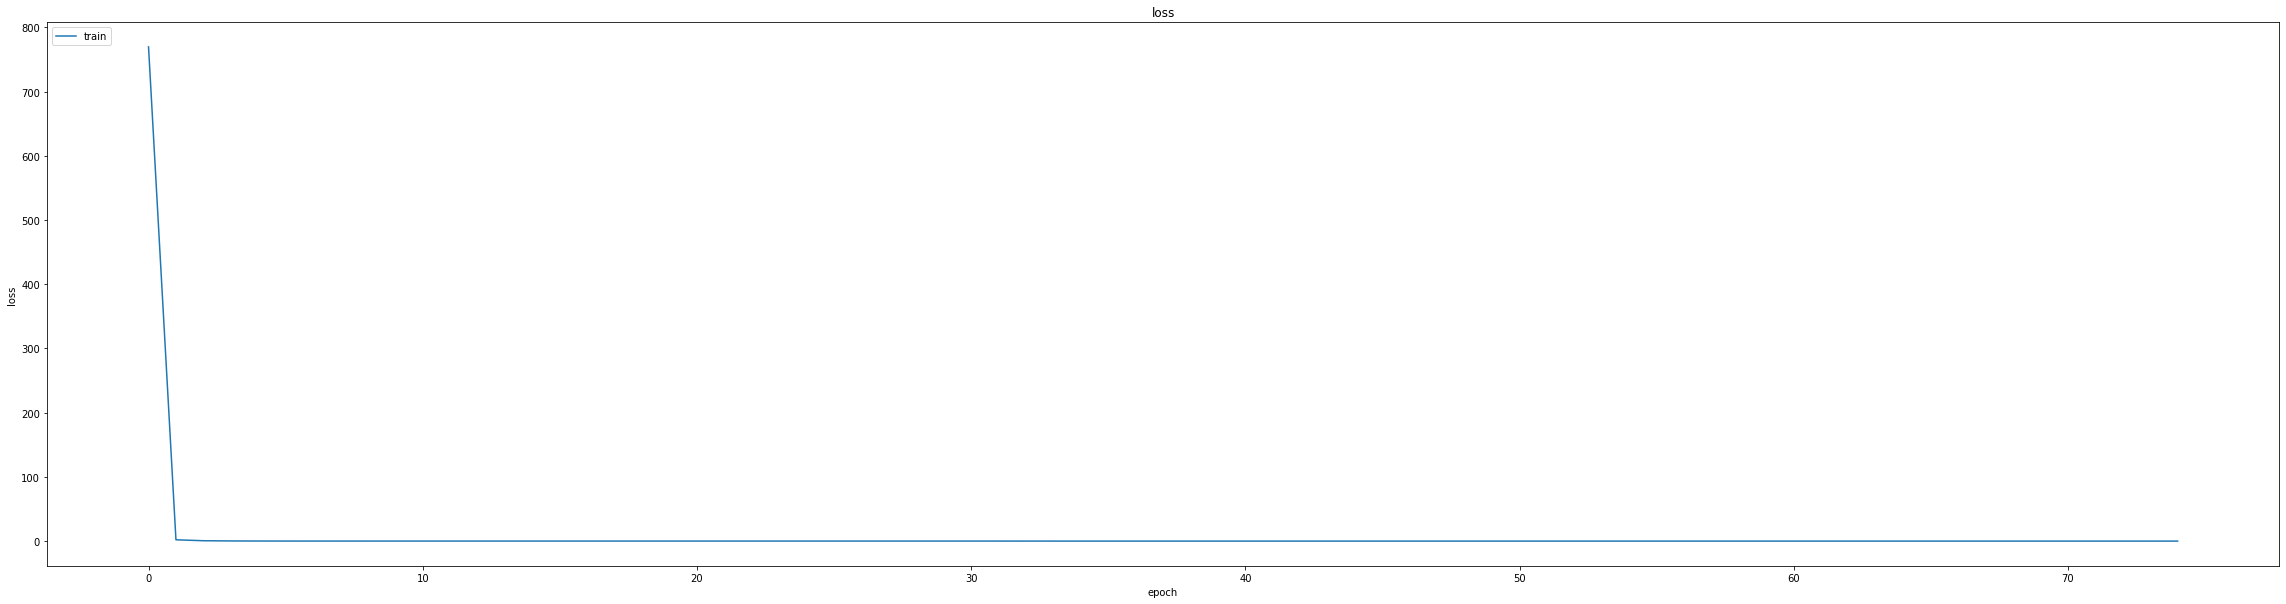

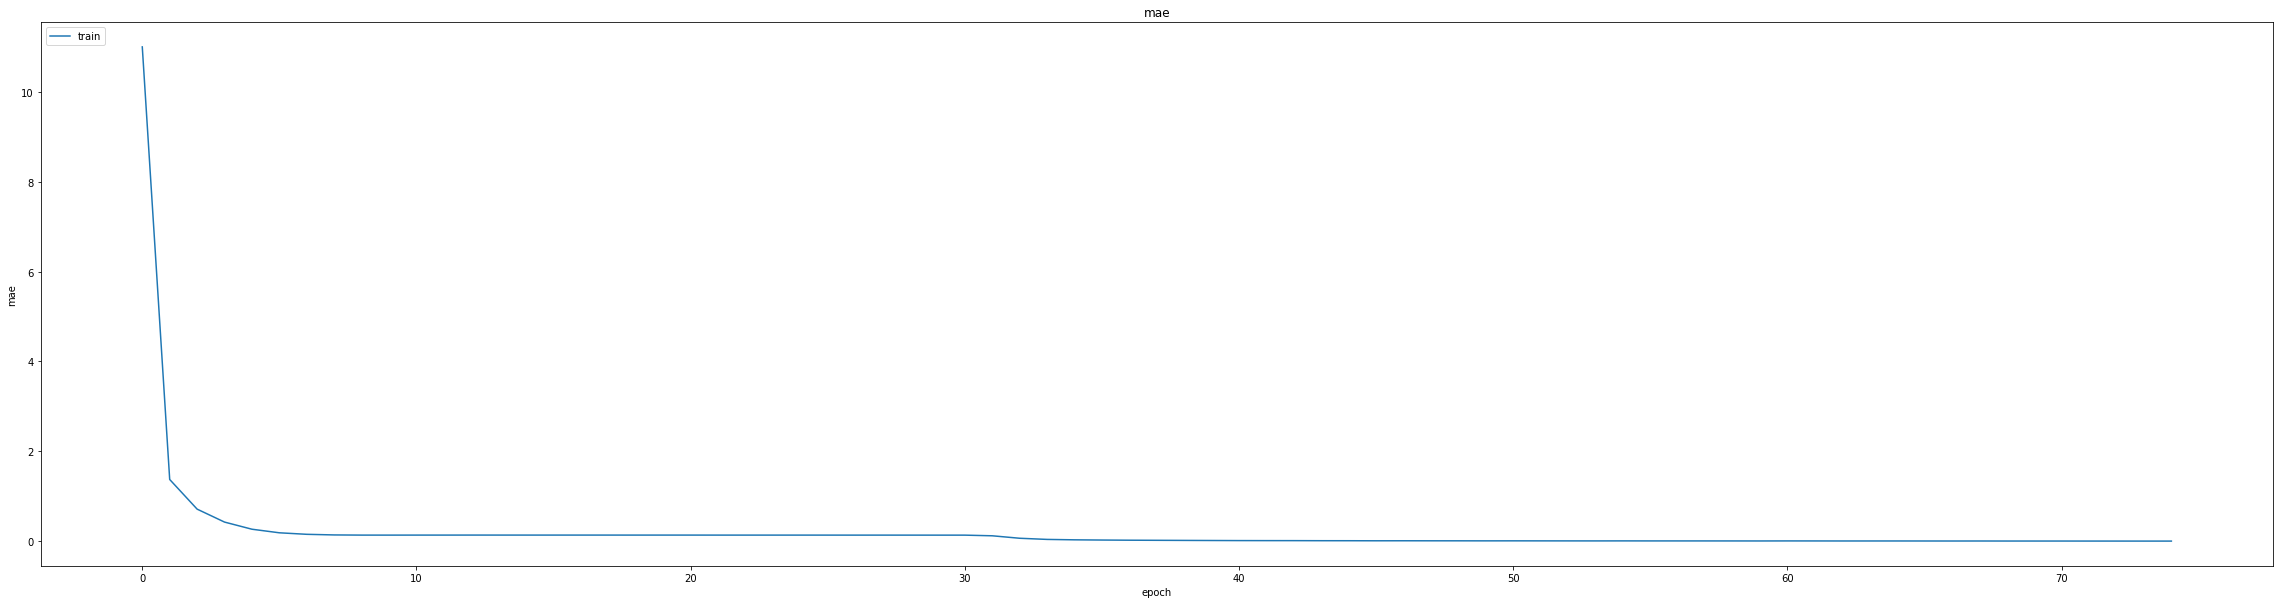

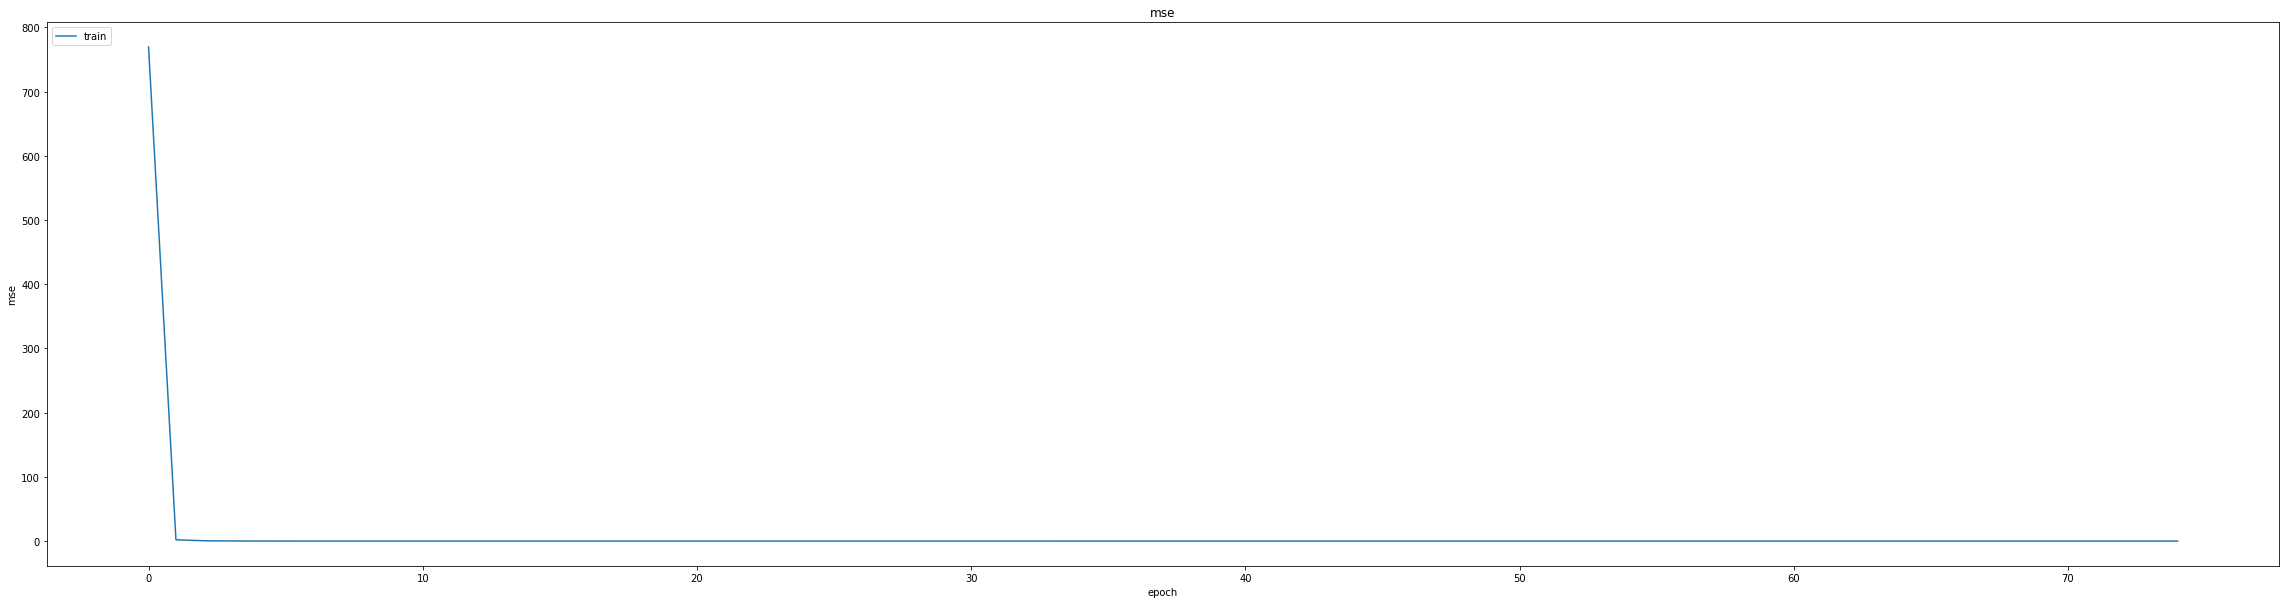

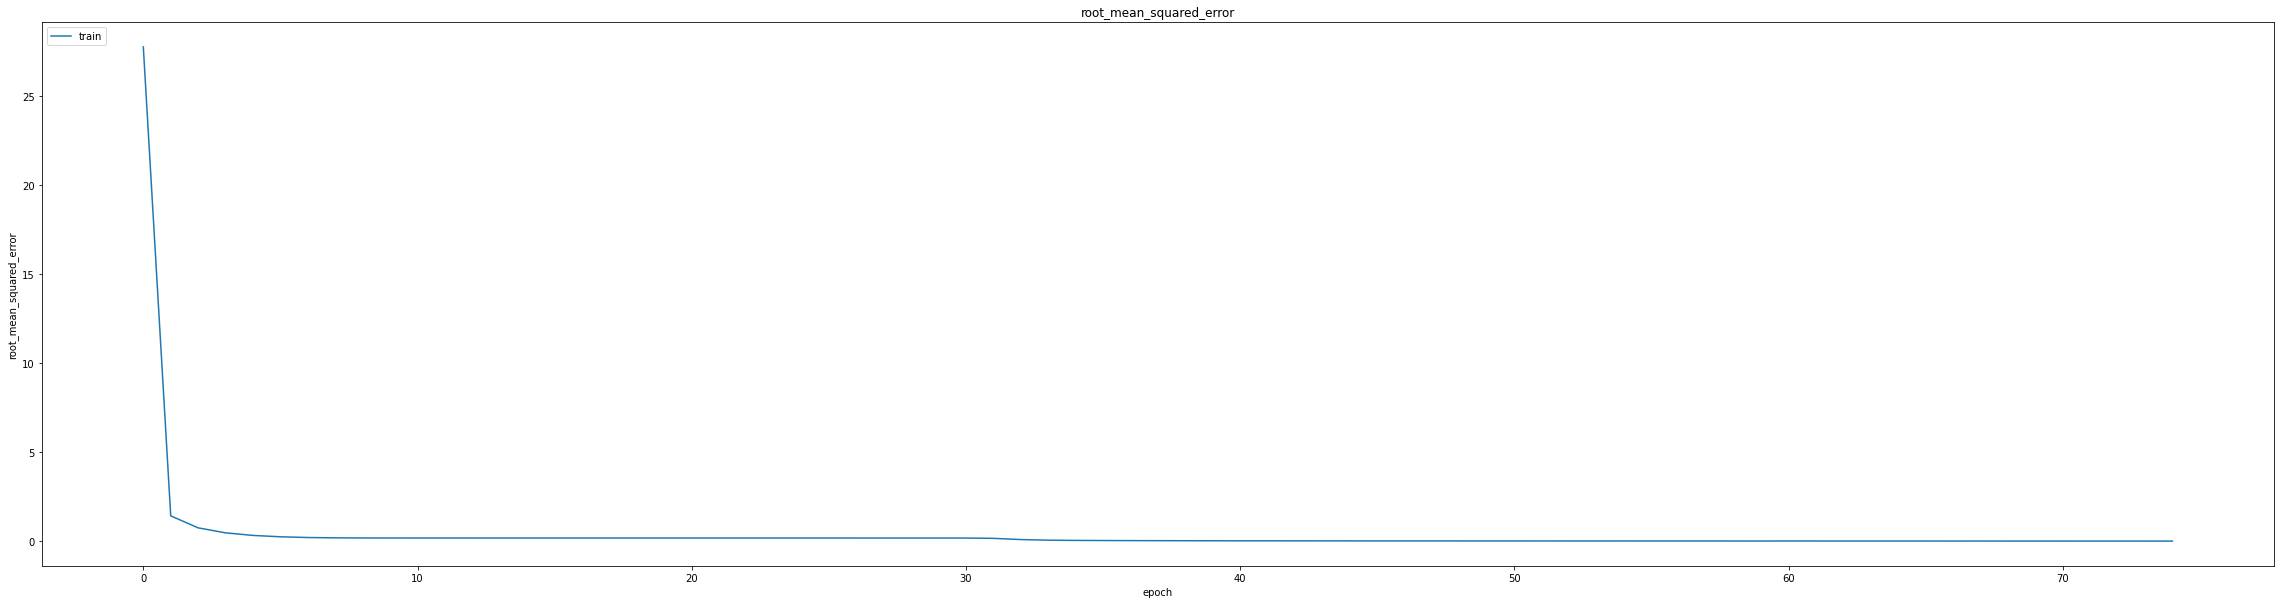

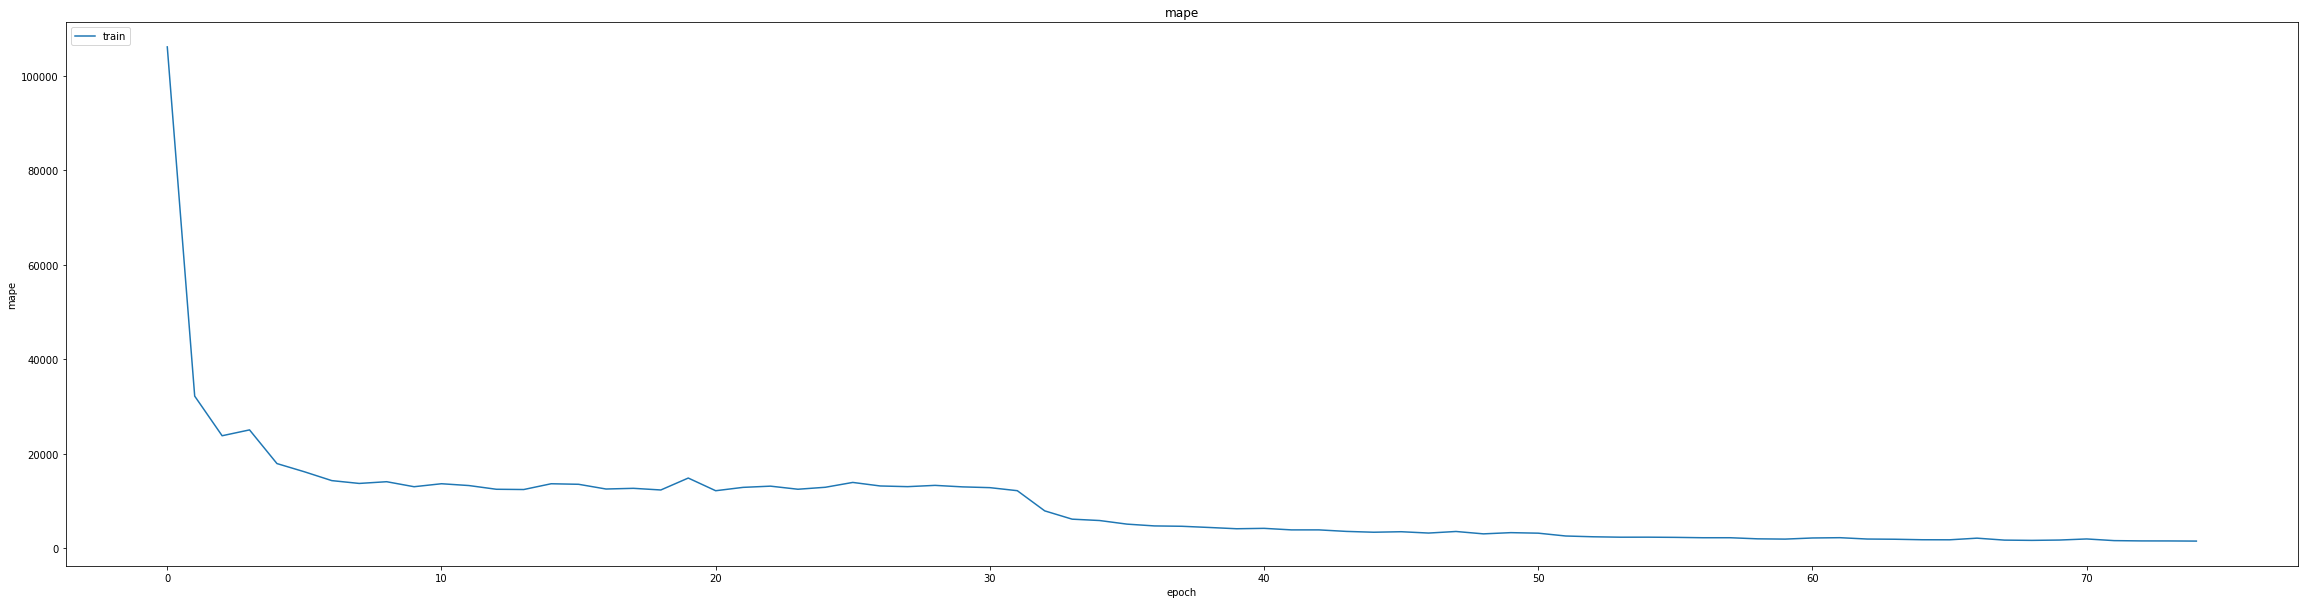

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.011054917238652706
0.014790176413953304
348/348 [==============================] - 2s 4ms/step
0.9954218438404421


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
404/406 [============================>.] - ETA: 0s - loss: 2.1187e-04 - mae: 0.0074 - mse: 2.1187e-04 - root_mean_squared_error: 0.0146 - mape: 1502.9406
Epoch 1: val_mse improved from 0.00022 to 0.00018, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 21s 42ms/step - loss: 2.1116e-04 - mae: 0.0074 - mse: 2.1116e-04 - root_mean_squared_error: 0.0145 - mape: 1495.9448 - val_loss: 1.8495e-04 - val_mae: 0.0101 - val_mse: 1.8495e-04 - val_root_mean_squared_error: 0.0136 - val_mape: 7048.5854 - lr: 0.0010
Epoch 2/25
402/406 [============================>.] - ETA: 0s - loss: 3.9391e-05 - mae: 0.0047 - mse: 3.9391e-05 - root_mean_squared_error: 0.0063 - mape: 1550.0330
Epoch 2: val_mse improved from 0.00018 to 0.00015, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 3.9285e-05 - mae: 0.0047 - mse: 3.9285e-05 - root_mean_squared_error: 0.0063 - mape: 1535.1825 - val_loss: 1.4959e-04 - val_mae: 0.0090 - val_mse: 1.4959e-04 - val_root_mean_squared_error: 0.0122 - val_mape: 6944.0771 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
404/406 [============================>.] - ETA: 0s - loss: 4.0388e-05 - mae: 0.0049 - mse: 4.0388e-05 - root_mean_squared_error: 0.0064 - mape: 1488.7043
Epoch 3: val_mse improved from 0.00015 to 0.00015, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 4.0329e-05 - mae: 0.0048 - mse: 4.0329e-05 - root_mean_squared_error: 0.0064 - mape: 1481.7729 - val_loss: 1.4662e-04 - val_mae: 0.0090 - val_mse: 1.4662e-04 - val_root_mean_squared_error: 0.0121 - val_mape: 6799.5459 - lr: 9.0000e-04
Epoch 4/25
406/406 [==============================] - ETA: 0s - loss: 4.6037e-05 - mae: 0.0052 - mse: 4.6037e-05 - root_mean_squared_error: 0.0068 - mape: 1467.7263
Epoch 4: val_mse did not improve from 0.00015
406/406 [==============================] - 5s 11ms/step - loss: 4.6037e-05 - mae: 0.0052 - mse: 4.6037e-05 - root_mean_squared_error: 0.0068 - mape: 1467.7263 - val_loss: 1.5574e-04 - val_mae: 0.0094 - val_mse: 1.5574e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 6697.6709 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
402/406 [============================>.] - ETA: 0s - loss: 4.0759e-05 - mae: 0.0049 - mse: 4.0759e-05 - root_mean_squared_error: 0.0064 - mape:

406/406 [==============================] - 16s 40ms/step - loss: 4.0676e-05 - mae: 0.0049 - mse: 4.0676e-05 - root_mean_squared_error: 0.0064 - mape: 1367.8555 - val_loss: 1.2889e-04 - val_mae: 0.0083 - val_mse: 1.2889e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 6495.7178 - lr: 8.1000e-04
Epoch 6/25
406/406 [==============================] - ETA: 0s - loss: 4.1197e-05 - mae: 0.0049 - mse: 4.1197e-05 - root_mean_squared_error: 0.0064 - mape: 1381.7764
Epoch 6: val_mse improved from 0.00013 to 0.00011, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 4.1197e-05 - mae: 0.0049 - mse: 4.1197e-05 - root_mean_squared_error: 0.0064 - mape: 1381.7764 - val_loss: 1.0771e-04 - val_mae: 0.0076 - val_mse: 1.0771e-04 - val_root_mean_squared_error: 0.0104 - val_mape: 6301.1045 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/25
403/406 [============================>.] - ETA: 0s - loss: 3.3650e-05 - mae: 0.0045 - mse: 3.3650e-05 - root_mean_squared_error: 0.0058 - mape: 1415.1508
Epoch 7: val_mse did not improve from 0.00011
406/406 [==============================] - 5s 12ms/step - loss: 3.3573e-05 - mae: 0.0045 - mse: 3.3573e-05 - root_mean_squared_error: 0.0058 - mape: 1405.0773 - val_loss: 1.1908e-04 - val_mae: 0.0083 - val_mse: 1.1908e-04 - val_root_mean_squared_error: 0.0109 - val_mape: 6249.4614 - lr: 7.2900e-04
Epoch 8/25
405/406 [============================>.] - ETA: 0s - loss: 3.8081e-05 - mae: 0.0048 - mse: 3.8081e-05 - root_mean_squared_error: 0.0062 - mape:

406/406 [==============================] - 16s 39ms/step - loss: 2.7612e-05 - mae: 0.0040 - mse: 2.7612e-05 - root_mean_squared_error: 0.0053 - mape: 1267.6255 - val_loss: 8.8553e-05 - val_mae: 0.0068 - val_mse: 8.8553e-05 - val_root_mean_squared_error: 0.0094 - val_mape: 6056.2402 - lr: 6.5610e-04
Epoch 10/25
403/406 [============================>.] - ETA: 0s - loss: 2.9987e-05 - mae: 0.0042 - mse: 2.9987e-05 - root_mean_squared_error: 0.0055 - mape: 1312.9214
Epoch 10: val_mse did not improve from 0.00009
406/406 [==============================] - 6s 14ms/step - loss: 2.9939e-05 - mae: 0.0042 - mse: 2.9939e-05 - root_mean_squared_error: 0.0055 - mape: 1303.5758 - val_loss: 1.0102e-04 - val_mae: 0.0076 - val_mse: 1.0102e-04 - val_root_mean_squared_error: 0.0101 - val_mape: 6003.3716 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
402/406 [============================>.] - ETA: 0s - loss: 2.6490e-05 - mae: 0.0039 - mse: 2.6490e-05 - root_mean_squared_error: 0.0051 - ma

406/406 [==============================] - 15s 37ms/step - loss: 2.6517e-05 - mae: 0.0039 - mse: 2.6517e-05 - root_mean_squared_error: 0.0051 - mape: 1245.6954 - val_loss: 7.9143e-05 - val_mae: 0.0064 - val_mse: 7.9143e-05 - val_root_mean_squared_error: 0.0089 - val_mape: 5988.4790 - lr: 5.9049e-04
Epoch 12/25
405/406 [============================>.] - ETA: 0s - loss: 2.6721e-05 - mae: 0.0039 - mse: 2.6721e-05 - root_mean_squared_error: 0.0052 - mape: 1240.5664
Epoch 12: val_mse did not improve from 0.00008
406/406 [==============================] - 5s 12ms/step - loss: 2.6717e-05 - mae: 0.0039 - mse: 2.6717e-05 - root_mean_squared_error: 0.0052 - mape: 1237.8458 - val_loss: 1.0134e-04 - val_mae: 0.0075 - val_mse: 1.0134e-04 - val_root_mean_squared_error: 0.0101 - val_mape: 5763.7935 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/25
404/406 [============================>.] - ETA: 0s - loss: 2.4627e-05 - mae: 0.0038 - mse: 2.4627e-05 - root_mean_squared_error: 0.0050 - ma

406/406 [==============================] - 16s 40ms/step - loss: 2.4592e-05 - mae: 0.0038 - mse: 2.4592e-05 - root_mean_squared_error: 0.0050 - mape: 1206.4568 - val_loss: 7.4823e-05 - val_mae: 0.0063 - val_mse: 7.4823e-05 - val_root_mean_squared_error: 0.0087 - val_mape: 5664.5171 - lr: 5.3144e-04
Epoch 14/25
405/406 [============================>.] - ETA: 0s - loss: 2.3812e-05 - mae: 0.0037 - mse: 2.3812e-05 - root_mean_squared_error: 0.0049 - mape: 1220.3159
Epoch 14: val_mse did not improve from 0.00007
406/406 [==============================] - 5s 12ms/step - loss: 2.3782e-05 - mae: 0.0037 - mse: 2.3782e-05 - root_mean_squared_error: 0.0049 - mape: 1217.6392 - val_loss: 9.6751e-05 - val_mae: 0.0074 - val_mse: 9.6751e-05 - val_root_mean_squared_error: 0.0098 - val_mape: 5787.4146 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
403/406 [============================>.] - ETA: 0s - loss: 2.1412e-05 - mae: 0.0035 - mse: 2.1412e-05 - root_mean_squared_error: 0.0046 - m

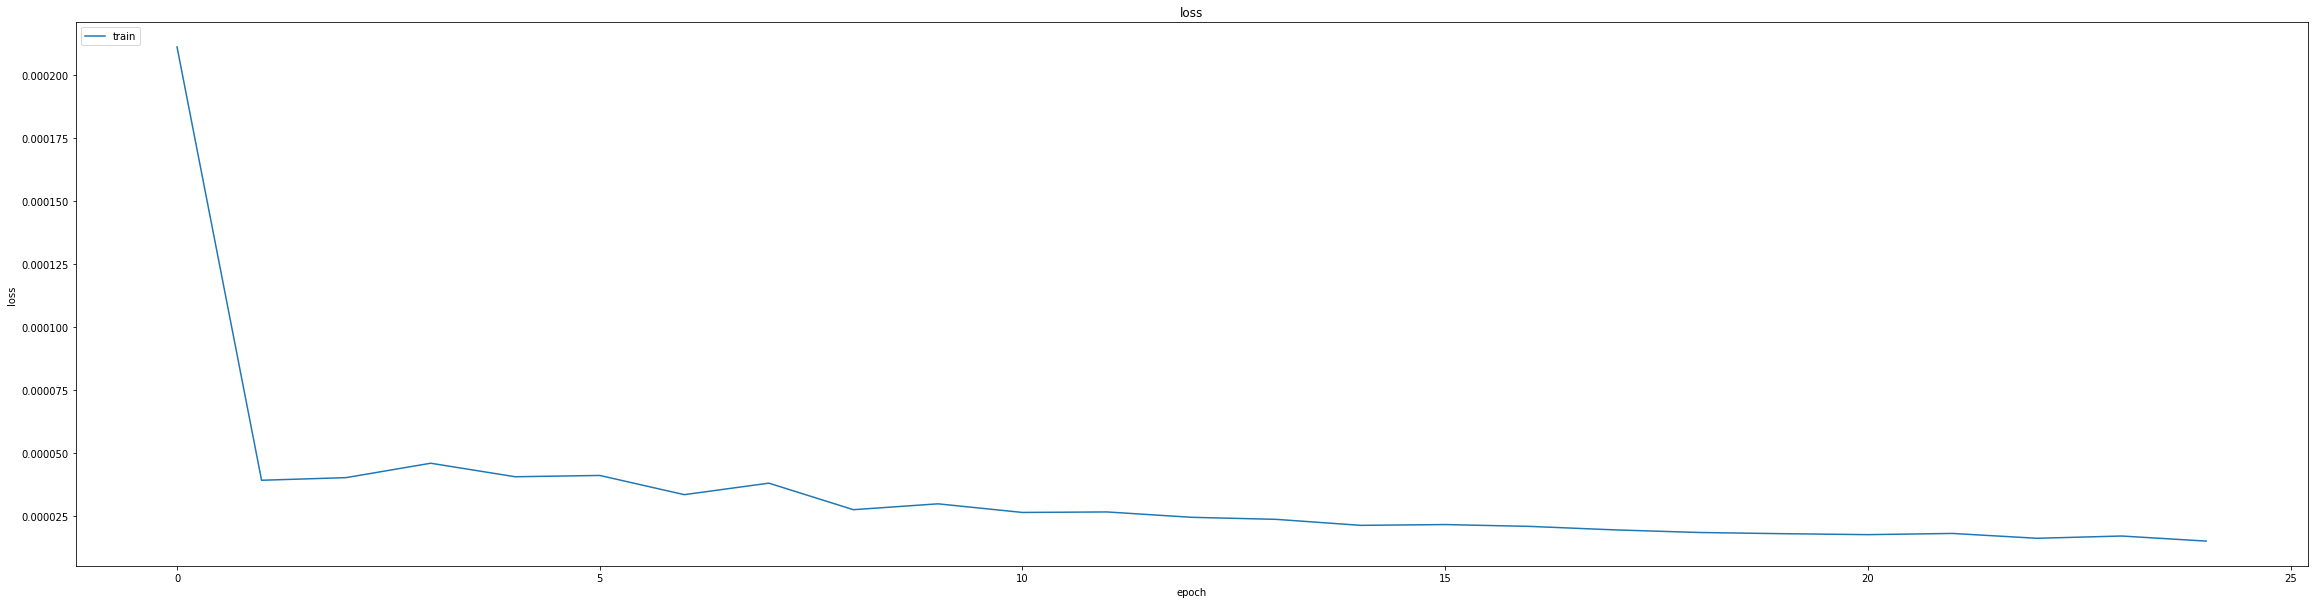

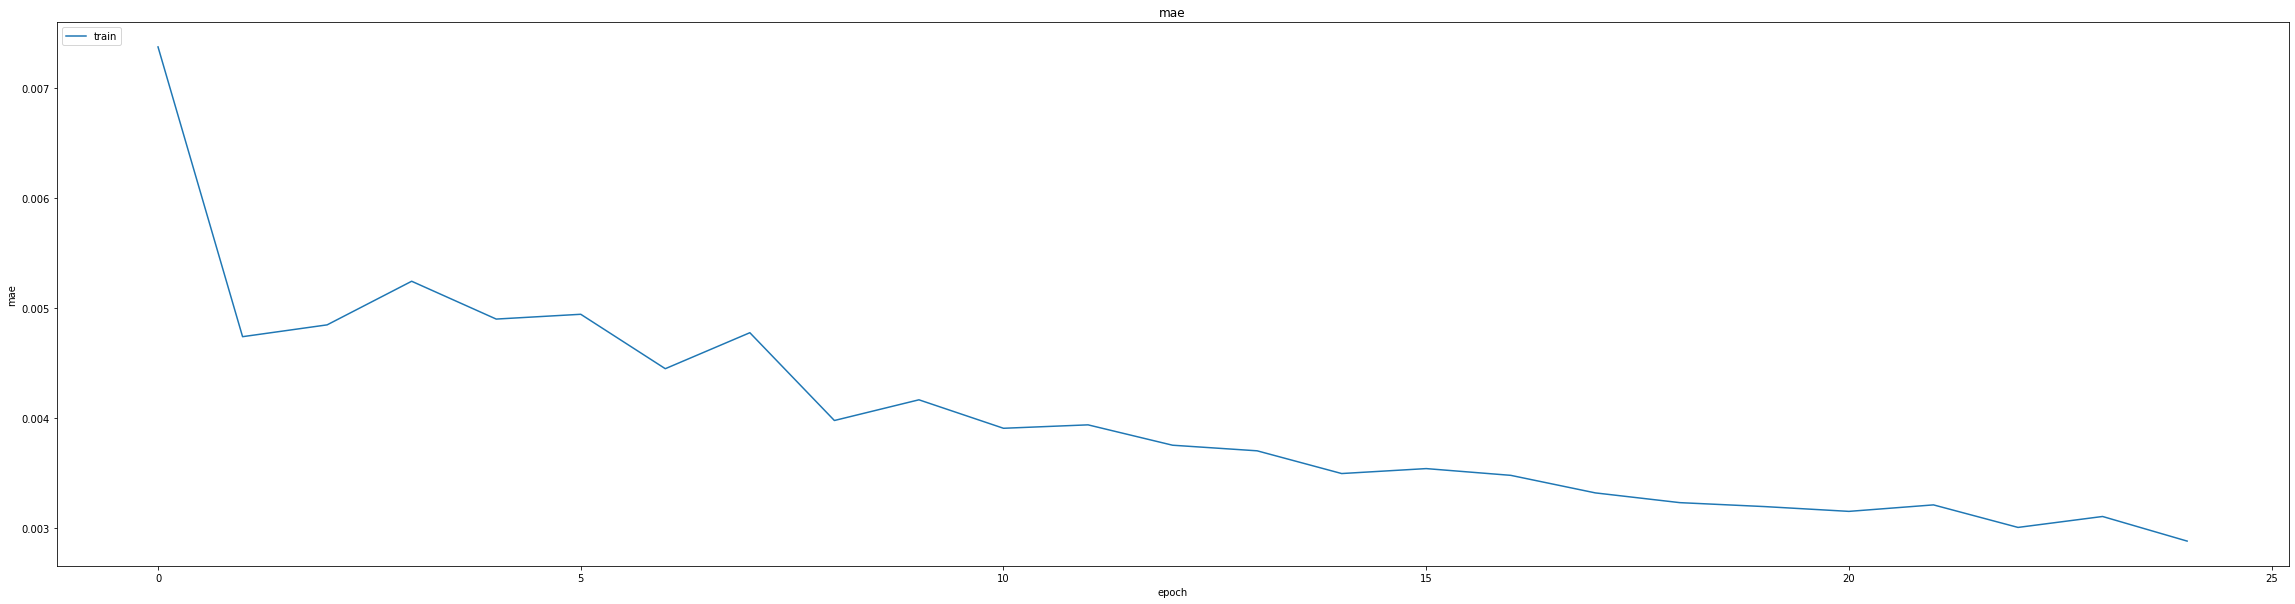

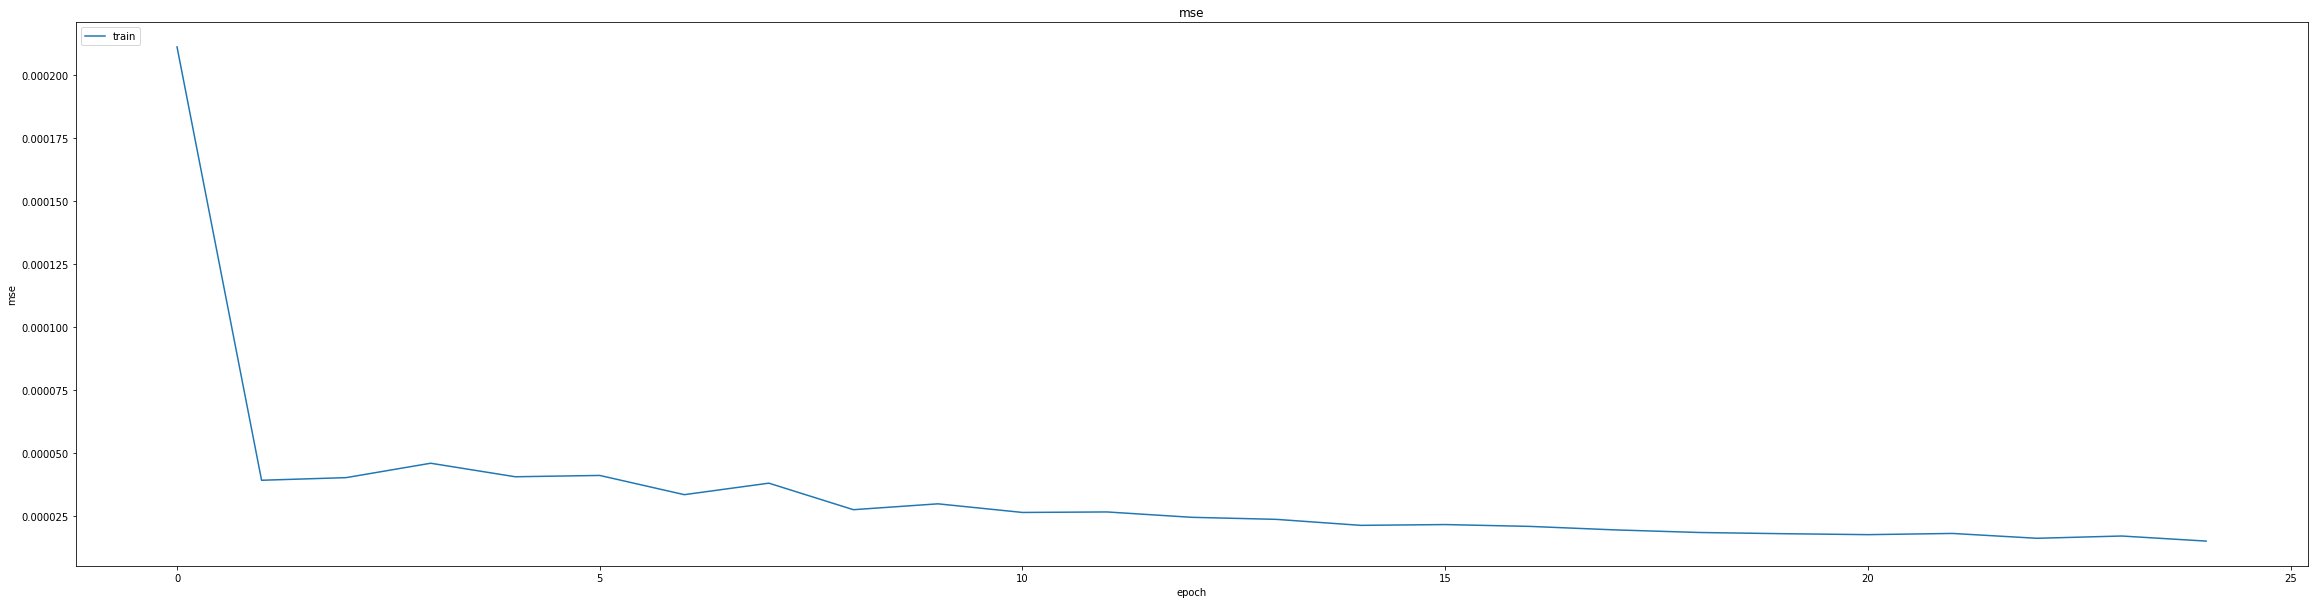

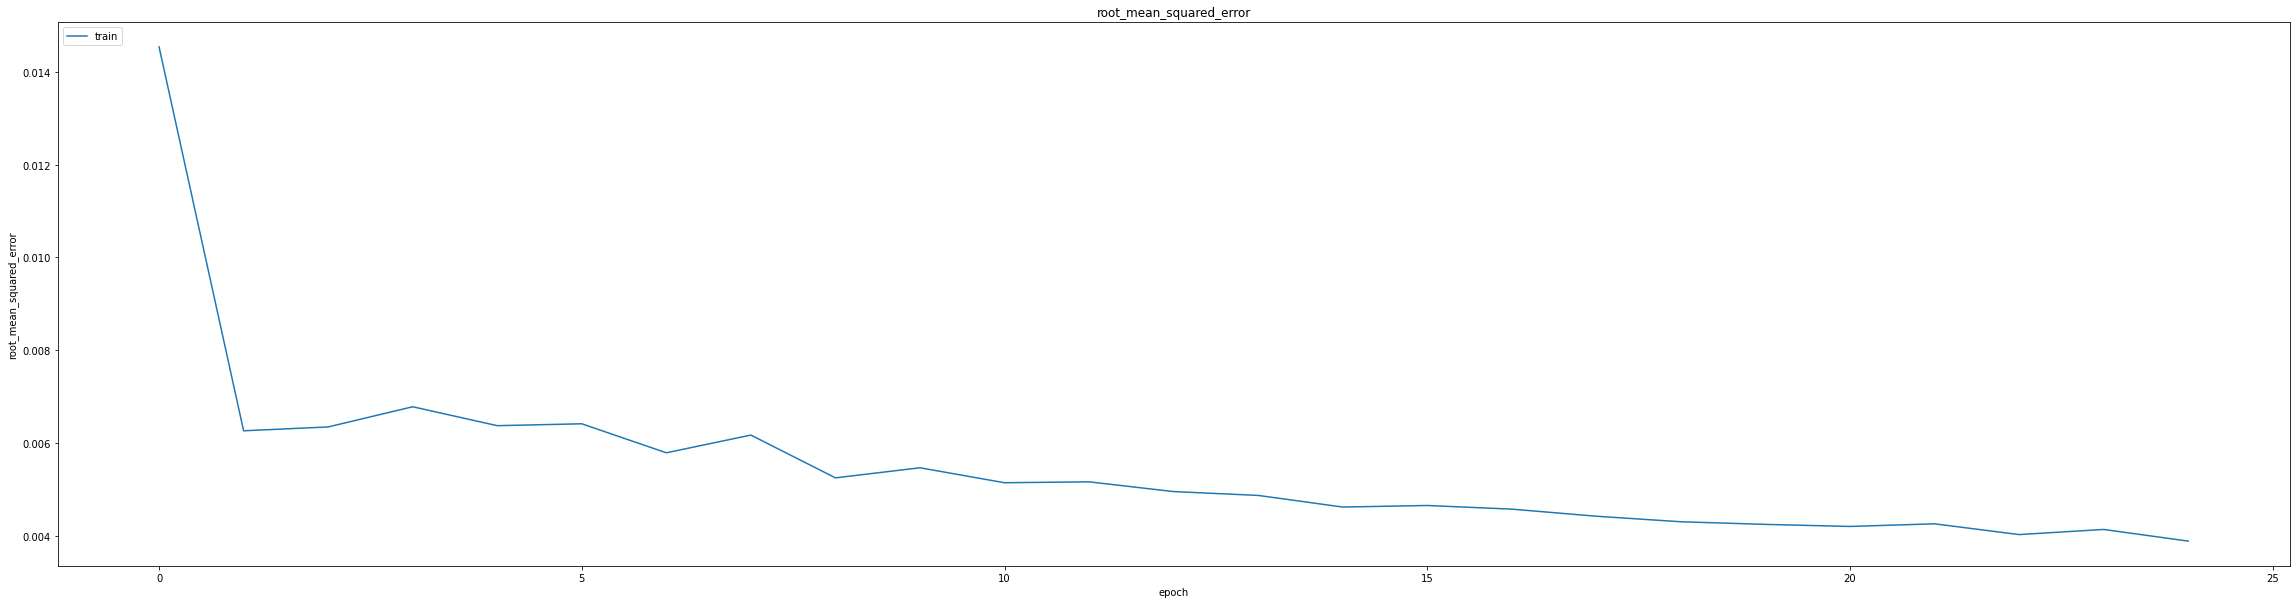

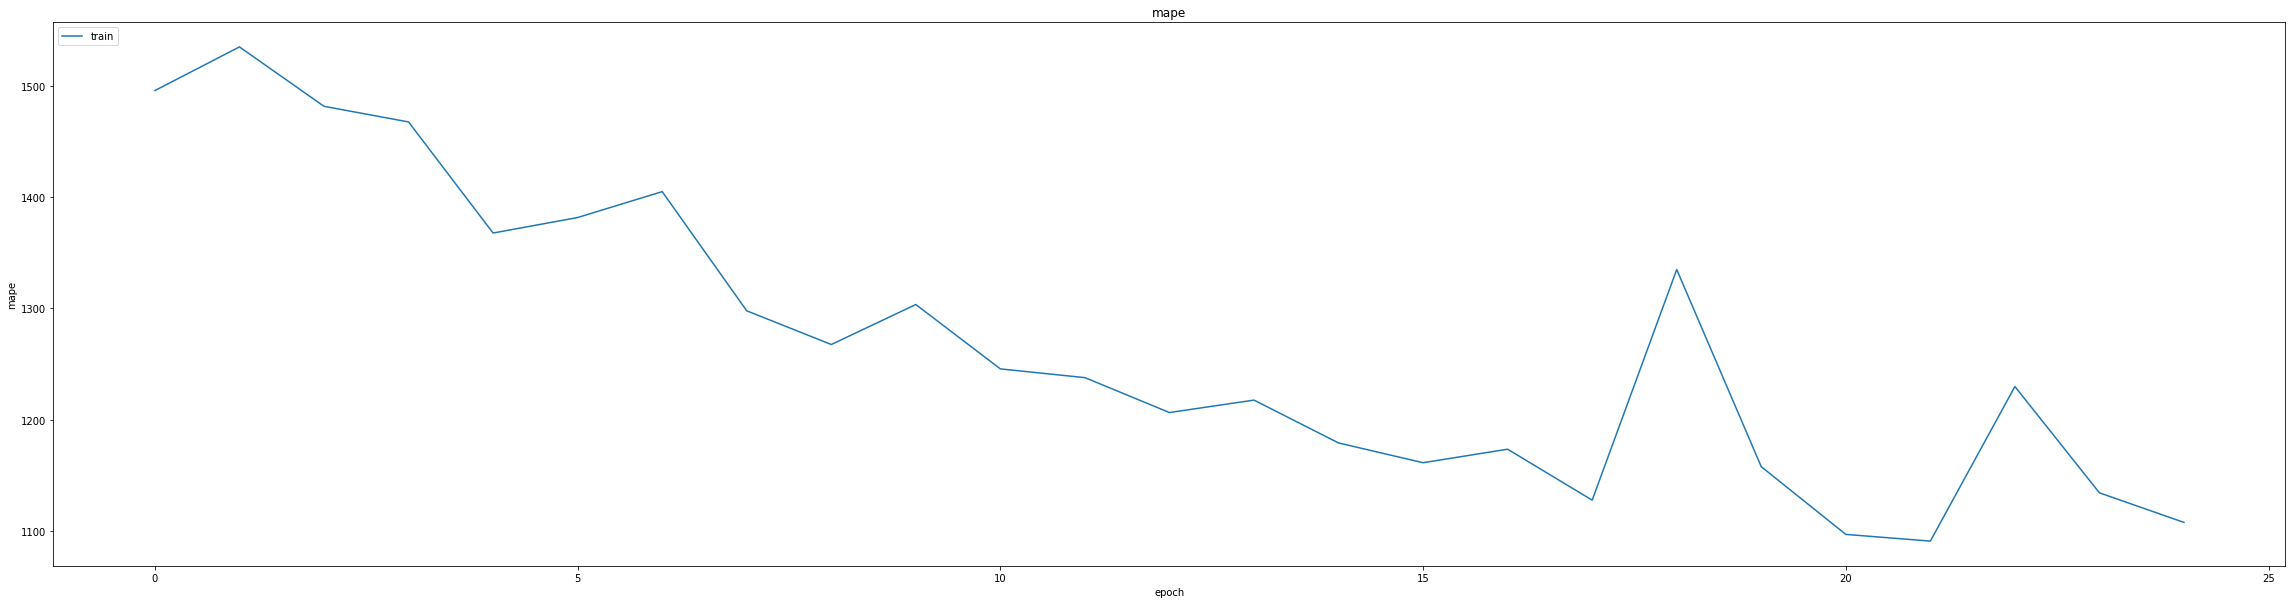

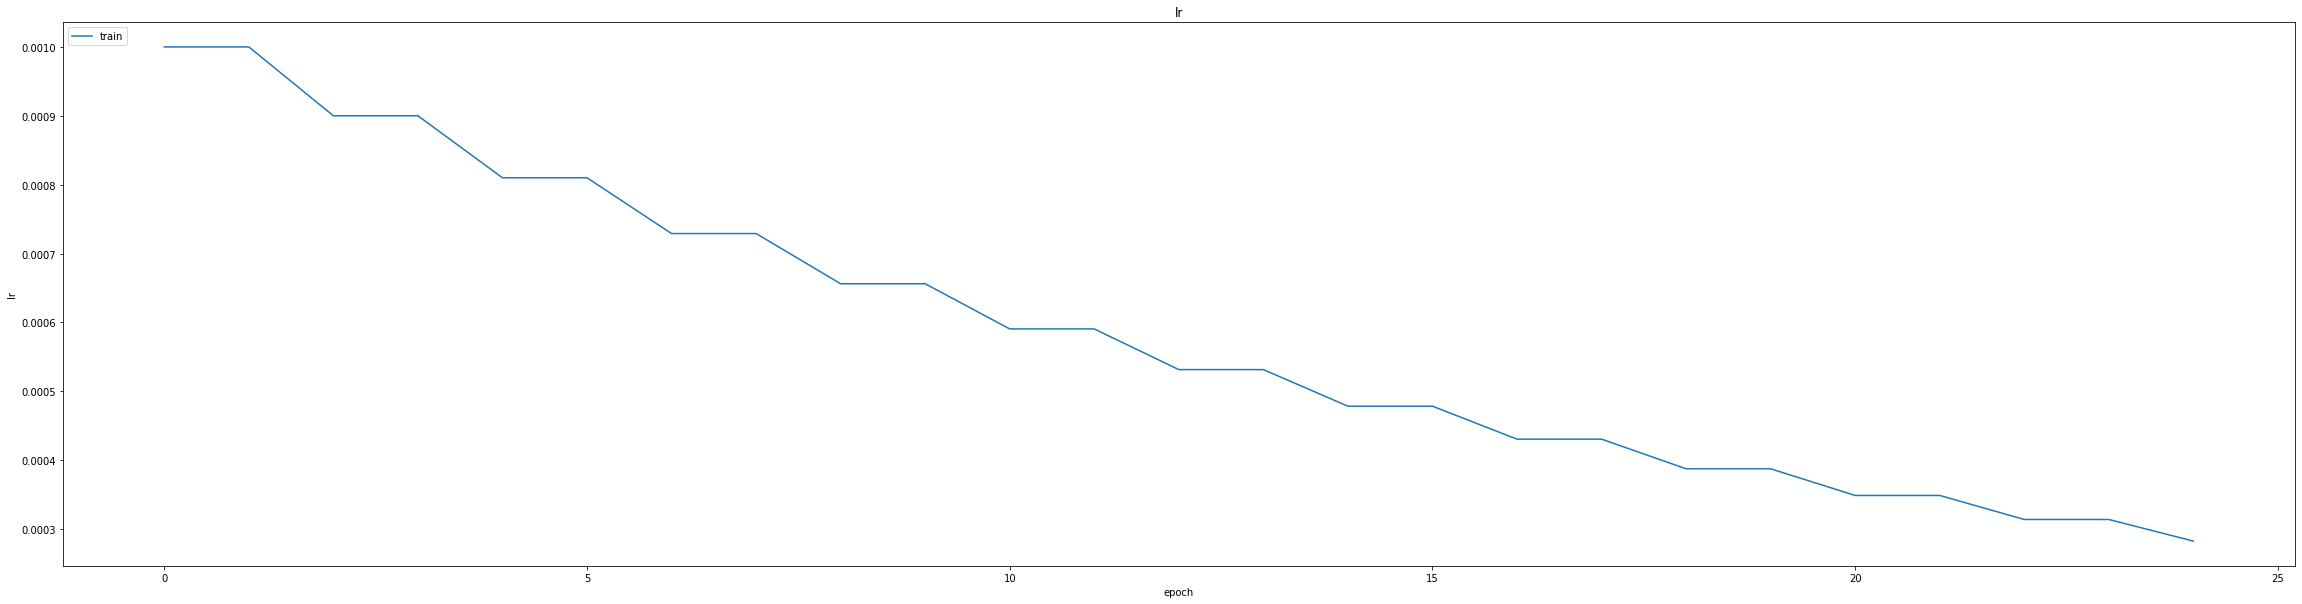

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006281382404267788
0.008650035597383976
348/348 [==============================] - 2s 4ms/step
0.9983549663892286


348/348 [==============================] - 1s 4ms/step


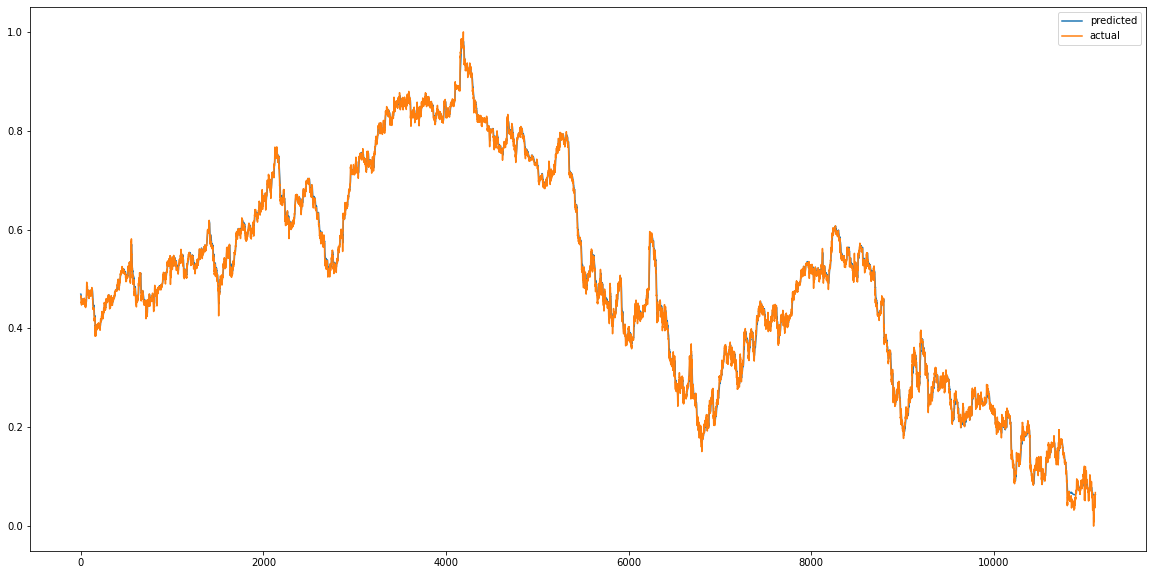

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


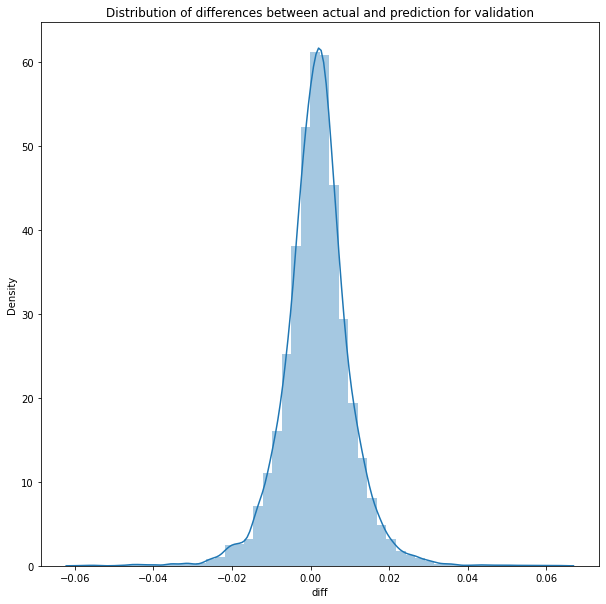

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 4ms/step


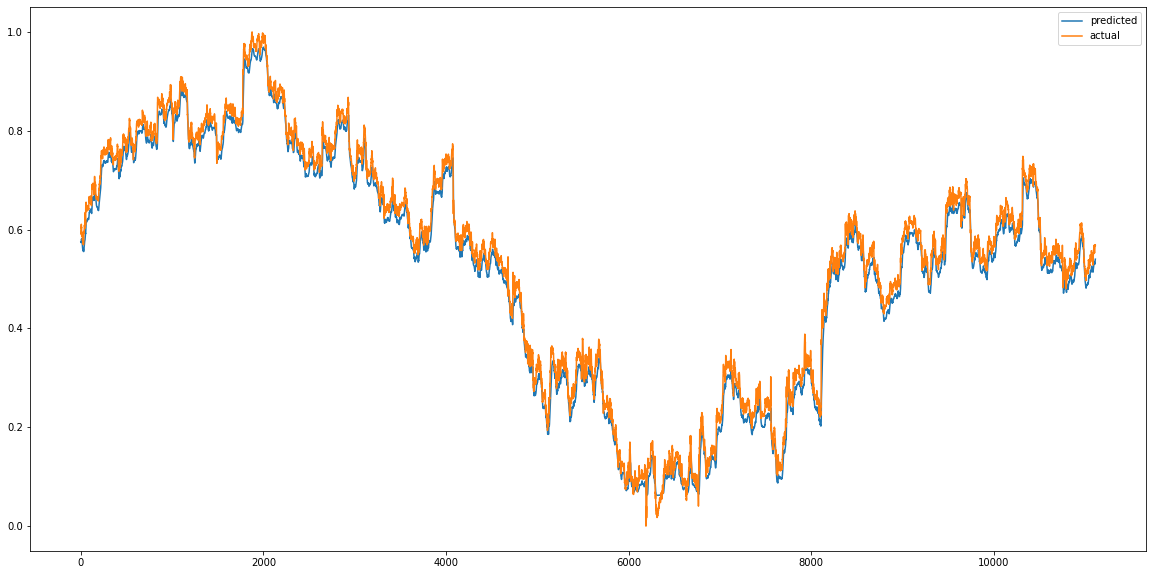

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


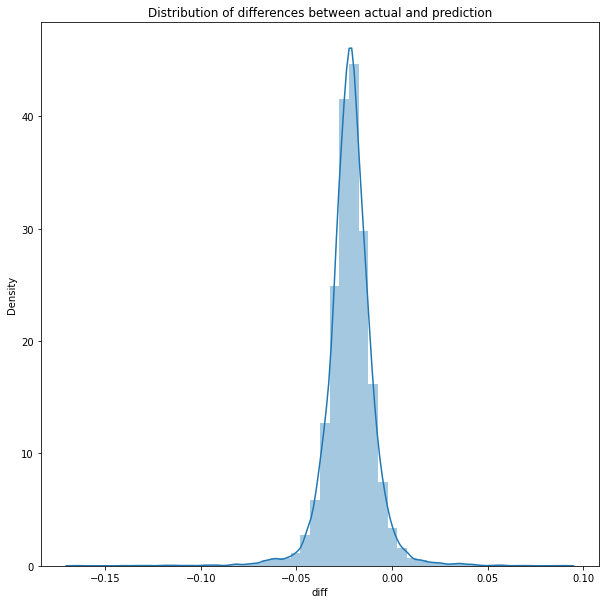

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.000632547086863156
MAE :  0.02257463216774913
RMSE  : 0.0251504887996865
348/348 [==============================] - 1s 4ms/step
R2_Score  : 0.9888542319702598


count    11115.000000
mean        -0.021908
std          0.012353
min         -0.164774
25%         -0.027730
50%         -0.021792
75%         -0.015781
max          0.089190
Name: diff, dtype: float64

**GRU_MODEL**



In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_7 (GRU)                 (None, 24, 256)           207360    
                                                                 
 gru_8 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout_8 (Dropout)         (None, 24, 64)            0         
                                                                 
 gru_9 (GRU)                 (None, 16)                3936      
                                                                 
 dense_24 (Dense)            (None, 32)                544       
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
402/406 [============================>.] - ETA: 0s - loss: 643.8105 - mae: 8.1081 - mse: 643.8105 - root_mean_squared_error: 25.3734 - mape: 45220.6055
Epoch 1: val_mse improved from inf to 0.90072, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 20s 40ms/step - loss: 637.6467 - mae: 8.0386 - mse: 637.6467 - root_mean_squared_error: 25.2517 - mape: 44788.5977 - val_loss: 0.9007 - val_mae: 0.9235 - val_mse: 0.9007 - val_root_mean_squared_error: 0.9491 - val_mape: 128344.0312
Epoch 2/75
406/406 [==============================] - ETA: 0s - loss: 0.2834 - mae: 0.4687 - mse: 0.2834 - root_mean_squared_error: 0.5324 - mape: 17617.3047
Epoch 2: val_mse improved from 0.90072 to 0.16992, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 22s 53ms/step - loss: 0.2834 - mae: 0.4687 - mse: 0.2834 - root_mean_squared_error: 0.5324 - mape: 17617.3047 - val_loss: 0.1699 - val_mae: 0.3529 - val_mse: 0.1699 - val_root_mean_squared_error: 0.4122 - val_mape: 76453.2656
Epoch 3/75
403/406 [============================>.] - ETA: 0s - loss: 0.0557 - mae: 0.1787 - mse: 0.0557 - root_mean_squared_error: 0.2360 - mape: 18476.0078
Epoch 3: val_mse improved from 0.16992 to 0.08613, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 0.0556 - mae: 0.1785 - mse: 0.0556 - root_mean_squared_error: 0.2358 - mape: 18344.7109 - val_loss: 0.0861 - val_mae: 0.2440 - val_mse: 0.0861 - val_root_mean_squared_error: 0.2935 - val_mape: 62572.6133
Epoch 4/75
403/406 [============================>.] - ETA: 0s - loss: 0.0351 - mae: 0.1415 - mse: 0.0351 - root_mean_squared_error: 0.1872 - mape: 13895.9707
Epoch 4: val_mse improved from 0.08613 to 0.06917, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 0.0351 - mae: 0.1416 - mse: 0.0351 - root_mean_squared_error: 0.1873 - mape: 13797.2383 - val_loss: 0.0692 - val_mae: 0.2191 - val_mse: 0.0692 - val_root_mean_squared_error: 0.2630 - val_mape: 58075.2070
Epoch 5/75
406/406 [==============================] - ETA: 0s - loss: 0.0332 - mae: 0.1402 - mse: 0.0332 - root_mean_squared_error: 0.1821 - mape: 13693.2305
Epoch 5: val_mse improved from 0.06917 to 0.06550, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0332 - mae: 0.1402 - mse: 0.0332 - root_mean_squared_error: 0.1821 - mape: 13693.2305 - val_loss: 0.0655 - val_mae: 0.2132 - val_mse: 0.0655 - val_root_mean_squared_error: 0.2559 - val_mape: 56895.4180
Epoch 6/75
406/406 [==============================] - ETA: 0s - loss: 0.0329 - mae: 0.1407 - mse: 0.0329 - root_mean_squared_error: 0.1814 - mape: 12105.9863
Epoch 6: val_mse improved from 0.06550 to 0.06493, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 0.0329 - mae: 0.1407 - mse: 0.0329 - root_mean_squared_error: 0.1814 - mape: 12105.9863 - val_loss: 0.0649 - val_mae: 0.2123 - val_mse: 0.0649 - val_root_mean_squared_error: 0.2548 - val_mape: 56696.9375
Epoch 7/75
401/406 [============================>.] - ETA: 0s - loss: 0.0326 - mae: 0.1402 - mse: 0.0326 - root_mean_squared_error: 0.1804 - mape: 12531.6836
Epoch 7: val_mse improved from 0.06493 to 0.06478, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0325 - mae: 0.1401 - mse: 0.0325 - root_mean_squared_error: 0.1804 - mape: 12381.3232 - val_loss: 0.0648 - val_mae: 0.2120 - val_mse: 0.0648 - val_root_mean_squared_error: 0.2545 - val_mape: 56636.4688
Epoch 8/75
405/406 [============================>.] - ETA: 0s - loss: 0.0325 - mae: 0.1399 - mse: 0.0325 - root_mean_squared_error: 0.1804 - mape: 13184.5283
Epoch 8: val_mse did not improve from 0.06478
406/406 [==============================] - 5s 13ms/step - loss: 0.0325 - mae: 0.1399 - mse: 0.0325 - root_mean_squared_error: 0.1804 - mape: 13155.6504 - val_loss: 0.0649 - val_mae: 0.2121 - val_mse: 0.0649 - val_root_mean_squared_error: 0.2547 - val_mape: 56647.4688
Epoch 9/75
406/406 [==============================] - ETA: 0s - loss: 0.0323 - mae: 0.1393 - mse: 0.0323 - root_mean_squared_error: 0.1796 - mape: 12446.9873
Epoch 9: val_mse improved from 0.06478 to 0.06413, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 14s 33ms/step - loss: 0.0323 - mae: 0.1393 - mse: 0.0323 - root_mean_squared_error: 0.1796 - mape: 12446.9873 - val_loss: 0.0641 - val_mae: 0.2109 - val_mse: 0.0641 - val_root_mean_squared_error: 0.2532 - val_mape: 56372.8438
Epoch 10/75
406/406 [==============================] - ETA: 0s - loss: 0.0321 - mae: 0.1392 - mse: 0.0321 - root_mean_squared_error: 0.1791 - mape: 12874.6543
Epoch 10: val_mse improved from 0.06413 to 0.06358, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0321 - mae: 0.1392 - mse: 0.0321 - root_mean_squared_error: 0.1791 - mape: 12874.6543 - val_loss: 0.0636 - val_mae: 0.2100 - val_mse: 0.0636 - val_root_mean_squared_error: 0.2521 - val_mape: 56162.5469
Epoch 11/75
405/406 [============================>.] - ETA: 0s - loss: 0.0317 - mae: 0.1385 - mse: 0.0317 - root_mean_squared_error: 0.1781 - mape: 12919.2051
Epoch 11: val_mse improved from 0.06358 to 0.06354, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 33ms/step - loss: 0.0317 - mae: 0.1385 - mse: 0.0317 - root_mean_squared_error: 0.1781 - mape: 12890.9287 - val_loss: 0.0635 - val_mae: 0.2099 - val_mse: 0.0635 - val_root_mean_squared_error: 0.2521 - val_mape: 56113.1602
Epoch 12/75
401/406 [============================>.] - ETA: 0s - loss: 0.0309 - mae: 0.1363 - mse: 0.0309 - root_mean_squared_error: 0.1757 - mape: 12821.6211
Epoch 12: val_mse improved from 0.06354 to 0.06100, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 0.0308 - mae: 0.1363 - mse: 0.0308 - root_mean_squared_error: 0.1756 - mape: 12667.4307 - val_loss: 0.0610 - val_mae: 0.2055 - val_mse: 0.0610 - val_root_mean_squared_error: 0.2470 - val_mape: 55139.6875
Epoch 13/75
403/406 [============================>.] - ETA: 0s - loss: 0.0291 - mae: 0.1324 - mse: 0.0291 - root_mean_squared_error: 0.1706 - mape: 12356.0322
Epoch 13: val_mse improved from 0.06100 to 0.05585, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0291 - mae: 0.1324 - mse: 0.0291 - root_mean_squared_error: 0.1705 - mape: 12268.2139 - val_loss: 0.0559 - val_mae: 0.1961 - val_mse: 0.0559 - val_root_mean_squared_error: 0.2363 - val_mape: 53356.4727
Epoch 14/75
401/406 [============================>.] - ETA: 0s - loss: 0.0254 - mae: 0.1228 - mse: 0.0254 - root_mean_squared_error: 0.1594 - mape: 12760.8184
Epoch 14: val_mse improved from 0.05585 to 0.04532, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0254 - mae: 0.1228 - mse: 0.0254 - root_mean_squared_error: 0.1594 - mape: 12607.3604 - val_loss: 0.0453 - val_mae: 0.1732 - val_mse: 0.0453 - val_root_mean_squared_error: 0.2129 - val_mape: 50207.4609
Epoch 15/75
405/406 [============================>.] - ETA: 0s - loss: 0.0190 - mae: 0.1040 - mse: 0.0190 - root_mean_squared_error: 0.1378 - mape: 10465.7617
Epoch 15: val_mse improved from 0.04532 to 0.03390, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 0.0190 - mae: 0.1040 - mse: 0.0190 - root_mean_squared_error: 0.1378 - mape: 10442.8516 - val_loss: 0.0339 - val_mae: 0.1436 - val_mse: 0.0339 - val_root_mean_squared_error: 0.1841 - val_mape: 46445.0547
Epoch 16/75
403/406 [============================>.] - ETA: 0s - loss: 0.0117 - mae: 0.0776 - mse: 0.0117 - root_mean_squared_error: 0.1083 - mape: 9016.7578
Epoch 16: val_mse improved from 0.03390 to 0.01946, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 33ms/step - loss: 0.0117 - mae: 0.0775 - mse: 0.0117 - root_mean_squared_error: 0.1082 - mape: 8952.7227 - val_loss: 0.0195 - val_mae: 0.1038 - val_mse: 0.0195 - val_root_mean_squared_error: 0.1395 - val_mape: 40050.6836
Epoch 17/75
402/406 [============================>.] - ETA: 0s - loss: 0.0060 - mae: 0.0546 - mse: 0.0060 - root_mean_squared_error: 0.0777 - mape: 8385.3203
Epoch 17: val_mse improved from 0.01946 to 0.01148, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0060 - mae: 0.0545 - mse: 0.0060 - root_mean_squared_error: 0.0777 - mape: 8305.0537 - val_loss: 0.0115 - val_mae: 0.0787 - val_mse: 0.0115 - val_root_mean_squared_error: 0.1071 - val_mape: 34332.5742
Epoch 18/75
406/406 [==============================] - ETA: 0s - loss: 0.0038 - mae: 0.0433 - mse: 0.0038 - root_mean_squared_error: 0.0615 - mape: 7540.9224
Epoch 18: val_mse improved from 0.01148 to 0.00841, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 36ms/step - loss: 0.0038 - mae: 0.0433 - mse: 0.0038 - root_mean_squared_error: 0.0615 - mape: 7540.9224 - val_loss: 0.0084 - val_mae: 0.0694 - val_mse: 0.0084 - val_root_mean_squared_error: 0.0917 - val_mape: 31101.1543
Epoch 19/75
403/406 [============================>.] - ETA: 0s - loss: 0.0028 - mae: 0.0374 - mse: 0.0028 - root_mean_squared_error: 0.0531 - mape: 7586.9180
Epoch 19: val_mse improved from 0.00841 to 0.00631, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 0.0028 - mae: 0.0374 - mse: 0.0028 - root_mean_squared_error: 0.0531 - mape: 7532.9438 - val_loss: 0.0063 - val_mae: 0.0555 - val_mse: 0.0063 - val_root_mean_squared_error: 0.0794 - val_mape: 29271.9023
Epoch 20/75
403/406 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0338 - mse: 0.0023 - root_mean_squared_error: 0.0479 - mape: 5921.0845
Epoch 20: val_mse improved from 0.00631 to 0.00510, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 0.0023 - mae: 0.0338 - mse: 0.0023 - root_mean_squared_error: 0.0479 - mape: 5878.9673 - val_loss: 0.0051 - val_mae: 0.0493 - val_mse: 0.0051 - val_root_mean_squared_error: 0.0714 - val_mape: 27596.3320
Epoch 21/75
402/406 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0311 - mse: 0.0019 - root_mean_squared_error: 0.0438 - mape: 6174.1406
Epoch 21: val_mse improved from 0.00510 to 0.00423, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 0.0019 - mae: 0.0311 - mse: 0.0019 - root_mean_squared_error: 0.0438 - mape: 6115.0317 - val_loss: 0.0042 - val_mae: 0.0435 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0651 - val_mape: 26247.0723
Epoch 22/75
405/406 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0295 - mse: 0.0017 - root_mean_squared_error: 0.0409 - mape: 5621.4067
Epoch 22: val_mse improved from 0.00423 to 0.00356, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 0.0017 - mae: 0.0295 - mse: 0.0017 - root_mean_squared_error: 0.0409 - mape: 5609.1421 - val_loss: 0.0036 - val_mae: 0.0397 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0597 - val_mape: 25007.0801
Epoch 23/75
402/406 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0274 - mse: 0.0014 - root_mean_squared_error: 0.0379 - mape: 5770.4956
Epoch 23: val_mse improved from 0.00356 to 0.00317, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 36ms/step - loss: 0.0014 - mae: 0.0274 - mse: 0.0014 - root_mean_squared_error: 0.0379 - mape: 5715.2437 - val_loss: 0.0032 - val_mae: 0.0394 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0563 - val_mape: 23676.7637
Epoch 24/75
404/406 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0258 - mse: 0.0013 - root_mean_squared_error: 0.0355 - mape: 4949.9673
Epoch 24: val_mse improved from 0.00317 to 0.00281, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 0.0013 - mae: 0.0258 - mse: 0.0013 - root_mean_squared_error: 0.0355 - mape: 4926.9336 - val_loss: 0.0028 - val_mae: 0.0373 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0530 - val_mape: 22712.8086
Epoch 25/75
402/406 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0245 - mse: 0.0011 - root_mean_squared_error: 0.0334 - mape: 4973.8228
Epoch 25: val_mse improved from 0.00281 to 0.00241, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0011 - mae: 0.0245 - mse: 0.0011 - root_mean_squared_error: 0.0334 - mape: 4926.2017 - val_loss: 0.0024 - val_mae: 0.0342 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0491 - val_mape: 21735.3945
Epoch 26/75
404/406 [============================>.] - ETA: 0s - loss: 9.9378e-04 - mae: 0.0232 - mse: 9.9378e-04 - root_mean_squared_error: 0.0315 - mape: 5723.6089
Epoch 26: val_mse improved from 0.00241 to 0.00217, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 9.9342e-04 - mae: 0.0232 - mse: 9.9342e-04 - root_mean_squared_error: 0.0315 - mape: 5696.9727 - val_loss: 0.0022 - val_mae: 0.0324 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0466 - val_mape: 21041.5820
Epoch 27/75
404/406 [============================>.] - ETA: 0s - loss: 8.8410e-04 - mae: 0.0220 - mse: 8.8410e-04 - root_mean_squared_error: 0.0297 - mape: 4479.9917
Epoch 27: val_mse improved from 0.00217 to 0.00187, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 8.8295e-04 - mae: 0.0220 - mse: 8.8295e-04 - root_mean_squared_error: 0.0297 - mape: 4459.1396 - val_loss: 0.0019 - val_mae: 0.0296 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0433 - val_mape: 20174.7383
Epoch 28/75
405/406 [============================>.] - ETA: 0s - loss: 7.7970e-04 - mae: 0.0208 - mse: 7.7970e-04 - root_mean_squared_error: 0.0279 - mape: 4747.5850
Epoch 28: val_mse improved from 0.00187 to 0.00176, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 7.7986e-04 - mae: 0.0208 - mse: 7.7986e-04 - root_mean_squared_error: 0.0279 - mape: 4737.1807 - val_loss: 0.0018 - val_mae: 0.0293 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0420 - val_mape: 19465.0781
Epoch 29/75
402/406 [============================>.] - ETA: 0s - loss: 7.0951e-04 - mae: 0.0199 - mse: 7.0951e-04 - root_mean_squared_error: 0.0266 - mape: 4226.6323
Epoch 29: val_mse improved from 0.00176 to 0.00163, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 7.0842e-04 - mae: 0.0199 - mse: 7.0842e-04 - root_mean_squared_error: 0.0266 - mape: 4186.1499 - val_loss: 0.0016 - val_mae: 0.0284 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0404 - val_mape: 18809.5664
Epoch 30/75
403/406 [============================>.] - ETA: 0s - loss: 6.4141e-04 - mae: 0.0190 - mse: 6.4141e-04 - root_mean_squared_error: 0.0253 - mape: 4142.8657
Epoch 30: val_mse improved from 0.00163 to 0.00143, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 6.4147e-04 - mae: 0.0190 - mse: 6.4147e-04 - root_mean_squared_error: 0.0253 - mape: 4113.3931 - val_loss: 0.0014 - val_mae: 0.0262 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0378 - val_mape: 18181.2168
Epoch 31/75
406/406 [==============================] - ETA: 0s - loss: 5.6645e-04 - mae: 0.0179 - mse: 5.6645e-04 - root_mean_squared_error: 0.0238 - mape: 3770.1609
Epoch 31: val_mse improved from 0.00143 to 0.00133, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 5.6645e-04 - mae: 0.0179 - mse: 5.6645e-04 - root_mean_squared_error: 0.0238 - mape: 3770.1609 - val_loss: 0.0013 - val_mae: 0.0259 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0365 - val_mape: 17434.3242
Epoch 32/75
405/406 [============================>.] - ETA: 0s - loss: 5.0857e-04 - mae: 0.0170 - mse: 5.0857e-04 - root_mean_squared_error: 0.0226 - mape: 3747.1318
Epoch 32: val_mse did not improve from 0.00133
406/406 [==============================] - 4s 11ms/step - loss: 5.0852e-04 - mae: 0.0170 - mse: 5.0852e-04 - root_mean_squared_error: 0.0226 - mape: 3738.9172 - val_loss: 0.0013 - val_mae: 0.0267 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0367 - val_mape: 16864.7051
Epoch 33/75
403/406 [============================>.] - ETA: 0s - loss: 4.5800e-04 - mae: 0.0161 - mse: 4.5800e-04 - root_mean_squared_error: 0.0214 - mape: 3900.1697
Epoch 33: val_mse improved from 0.00133 to 0.00132, saving model to /c

406/406 [==============================] - 15s 36ms/step - loss: 4.5853e-04 - mae: 0.0161 - mse: 4.5853e-04 - root_mean_squared_error: 0.0214 - mape: 3872.4668 - val_loss: 0.0013 - val_mae: 0.0274 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0364 - val_mape: 16185.6582
Epoch 34/75
402/406 [============================>.] - ETA: 0s - loss: 4.1186e-04 - mae: 0.0153 - mse: 4.1186e-04 - root_mean_squared_error: 0.0203 - mape: 3500.8462
Epoch 34: val_mse improved from 0.00132 to 0.00114, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 4.1186e-04 - mae: 0.0153 - mse: 4.1186e-04 - root_mean_squared_error: 0.0203 - mape: 3467.3220 - val_loss: 0.0011 - val_mae: 0.0249 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0338 - val_mape: 15588.0908
Epoch 35/75
404/406 [============================>.] - ETA: 0s - loss: 3.8520e-04 - mae: 0.0149 - mse: 3.8520e-04 - root_mean_squared_error: 0.0196 - mape: 3377.8220
Epoch 35: val_mse improved from 0.00114 to 0.00111, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 3.8512e-04 - mae: 0.0149 - mse: 3.8512e-04 - root_mean_squared_error: 0.0196 - mape: 3362.1025 - val_loss: 0.0011 - val_mae: 0.0254 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0333 - val_mape: 14999.6777
Epoch 36/75
403/406 [============================>.] - ETA: 0s - loss: 3.4870e-04 - mae: 0.0142 - mse: 3.4870e-04 - root_mean_squared_error: 0.0187 - mape: 3314.3135
Epoch 36: val_mse improved from 0.00111 to 0.00108, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 3.4912e-04 - mae: 0.0142 - mse: 3.4912e-04 - root_mean_squared_error: 0.0187 - mape: 3290.7310 - val_loss: 0.0011 - val_mae: 0.0236 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0328 - val_mape: 14699.0938
Epoch 37/75
402/406 [============================>.] - ETA: 0s - loss: 3.1454e-04 - mae: 0.0135 - mse: 3.1454e-04 - root_mean_squared_error: 0.0177 - mape: 3075.4128
Epoch 37: val_mse improved from 0.00108 to 0.00090, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 3.1461e-04 - mae: 0.0135 - mse: 3.1461e-04 - root_mean_squared_error: 0.0177 - mape: 3045.9580 - val_loss: 8.9671e-04 - val_mae: 0.0217 - val_mse: 8.9671e-04 - val_root_mean_squared_error: 0.0299 - val_mape: 14013.1006
Epoch 38/75
404/406 [============================>.] - ETA: 0s - loss: 2.8542e-04 - mae: 0.0129 - mse: 2.8542e-04 - root_mean_squared_error: 0.0169 - mape: 3038.1426
Epoch 38: val_mse did not improve from 0.00090
406/406 [==============================] - 5s 11ms/step - loss: 2.8535e-04 - mae: 0.0129 - mse: 2.8535e-04 - root_mean_squared_error: 0.0169 - mape: 3024.0022 - val_loss: 9.7469e-04 - val_mae: 0.0235 - val_mse: 9.7469e-04 - val_root_mean_squared_error: 0.0312 - val_mape: 13634.5156
Epoch 39/75
405/406 [============================>.] - ETA: 0s - loss: 2.8883e-04 - mae: 0.0131 - mse: 2.8883e-04 - root_mean_squared_error: 0.0170 - mape: 2908.8645
Epoch 39: val_mse did not improve from 0.00090
406/406

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/8
464/464 [==============================] - ETA: 0s - loss: 2.2739e-04 - mae: 0.0097 - mse: 2.2739e-04 - root_mean_squared_error: 0.0151 - mape: 1039.6770
Epoch 1: val_mse did not improve from 0.00027
464/464 [==============================] - 131s 273ms/step - loss: 2.2739e-04 - mae: 0.0097 - mse: 2.2739e-04 - root_mean_squared_error: 0.0151 - mape: 1039.6770 - val_loss: 2.8320e-04 - val_mae: 0.0116 - val_mse: 2.8320e-04 - val_root_mean_squared_error: 0.0168 - val_mape: 7453.4336 - lr: 0.0010
Epoch 2/8
464/464 [==============================] - ETA: 0s - loss: 1.0321e-04 - mae: 0.0077 - mse: 1.0321e-04 - root_mean_squared_error: 0.0102 - mape: 908.7222
Epoch 2: val_mse did not improve from 0.00027
464/464 [==============================] - 119s 256ms/step - loss: 1.0321e-04 - mae: 0.0077 - mse: 1.0321e-04 - root_mean_squared_error: 0.0102 - mape: 908.7222 - val_loss: 6.8326e-04 - val_mae: 0.0218 - val_mse: 6.8326e-04 - val_root_mean_squared_error: 0.0261 - val_mape: 7000.4341

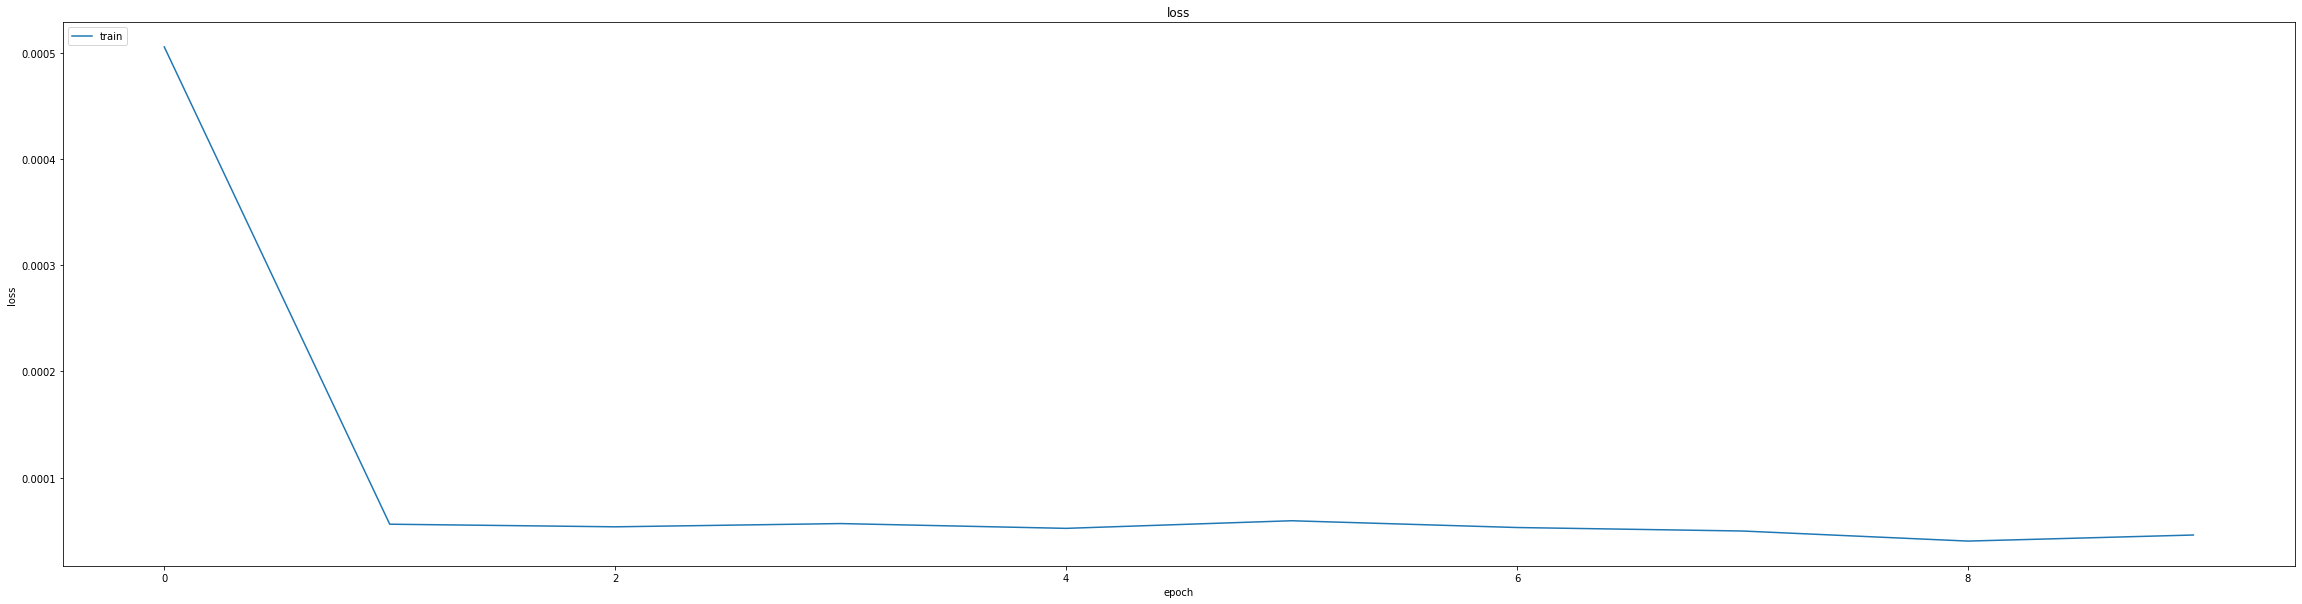

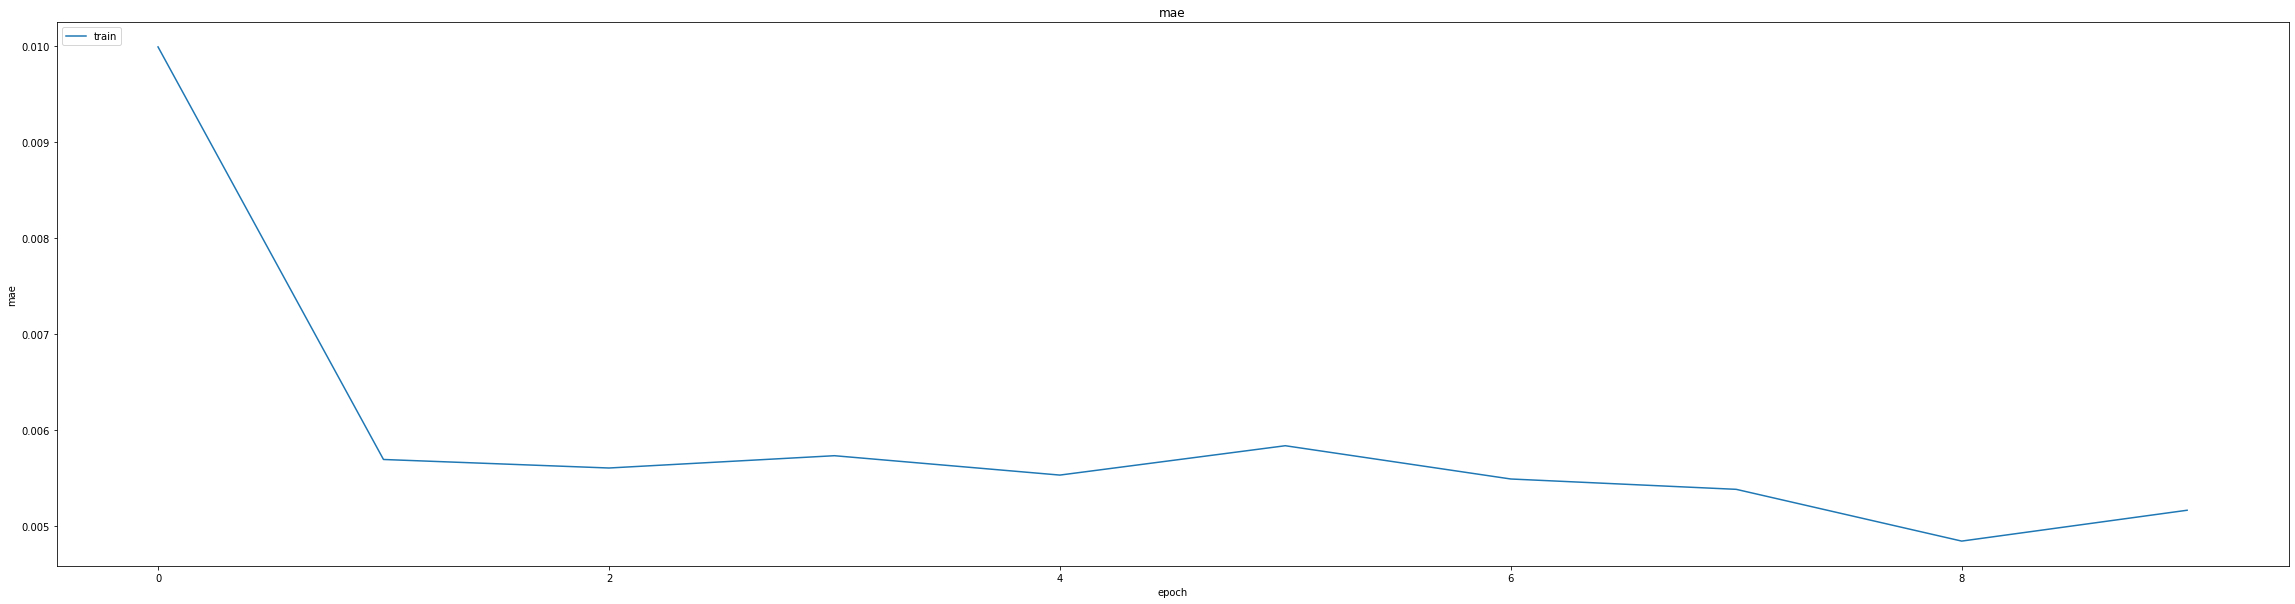

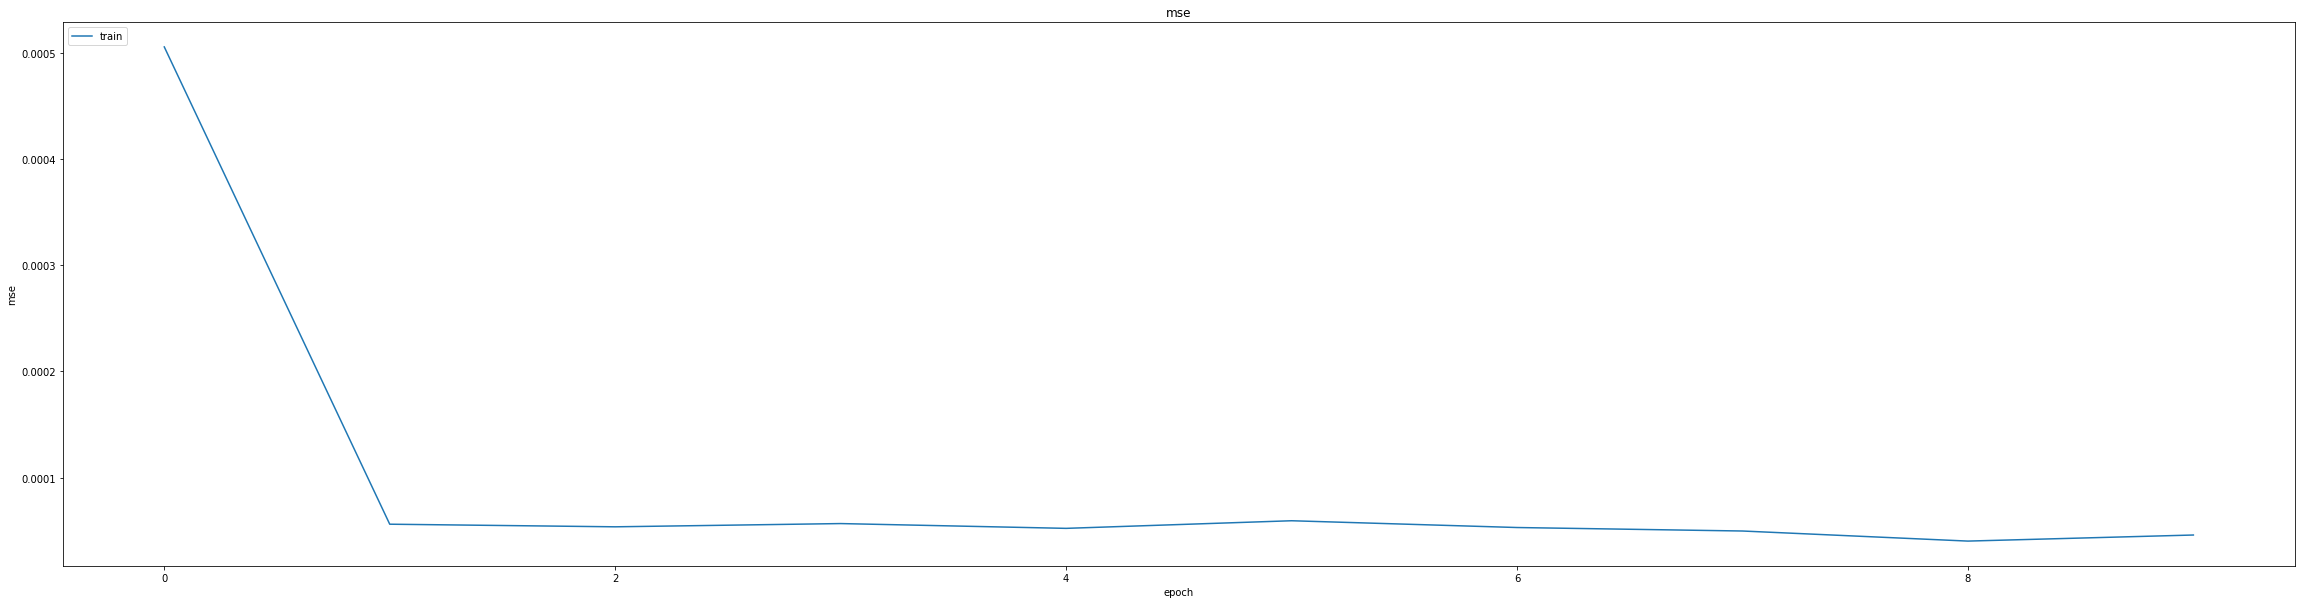

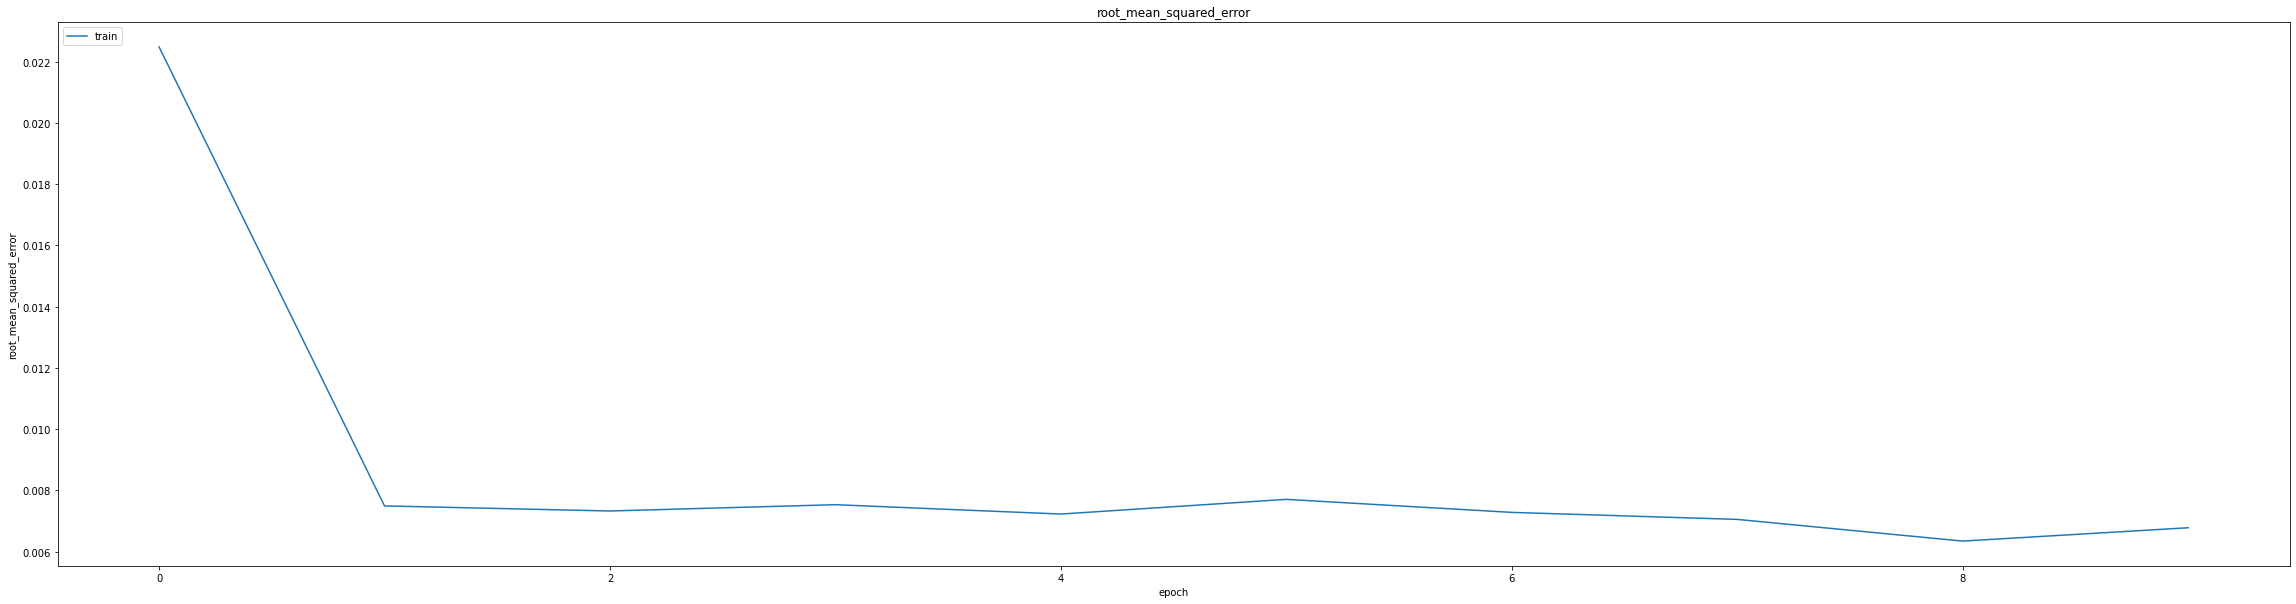

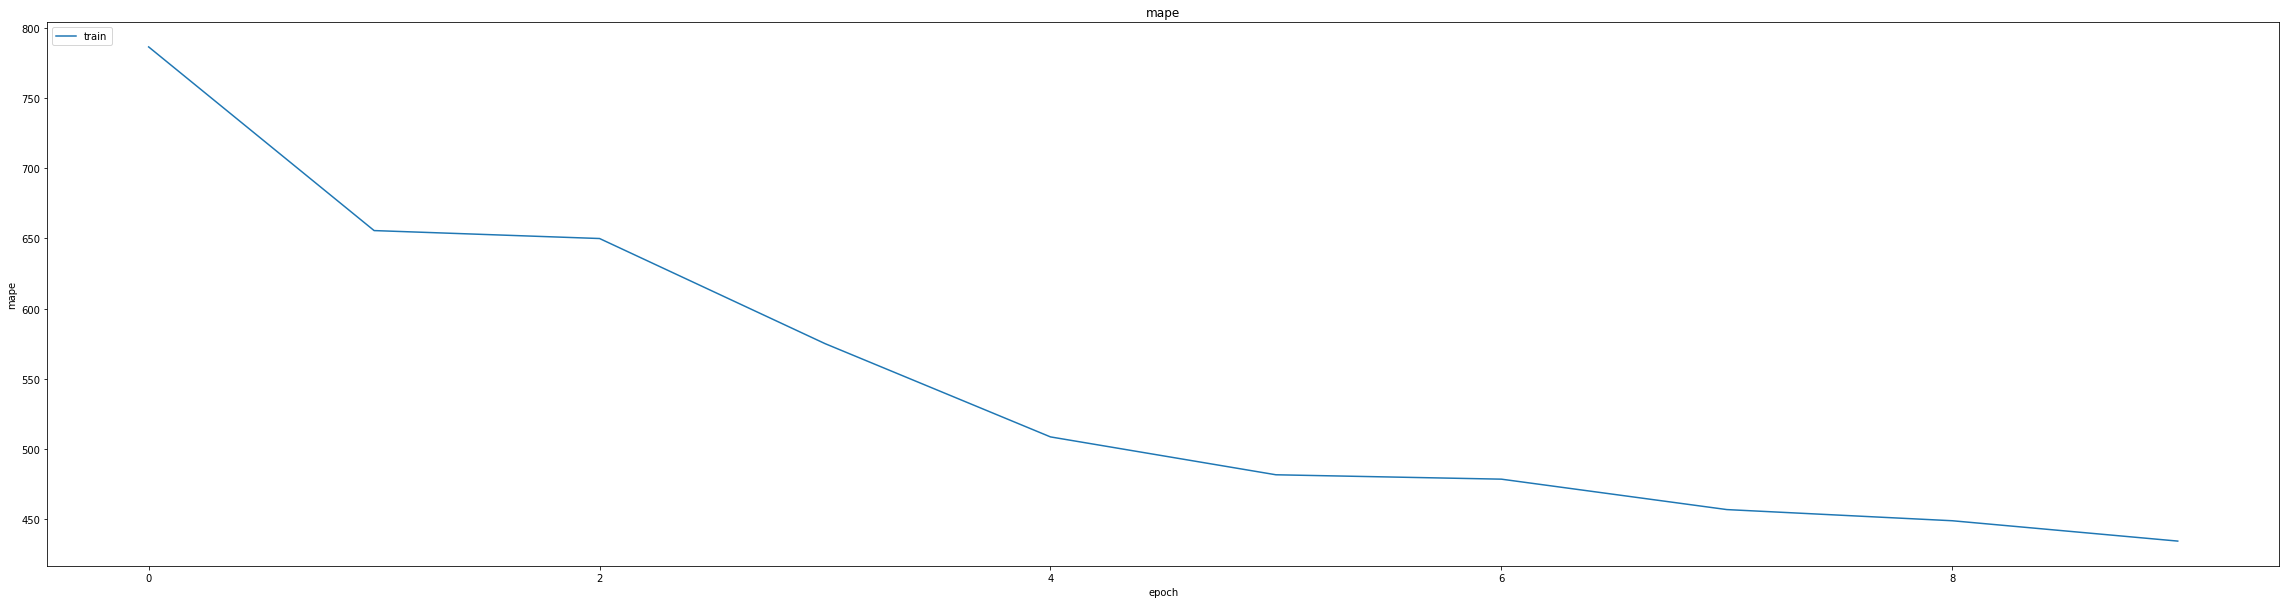

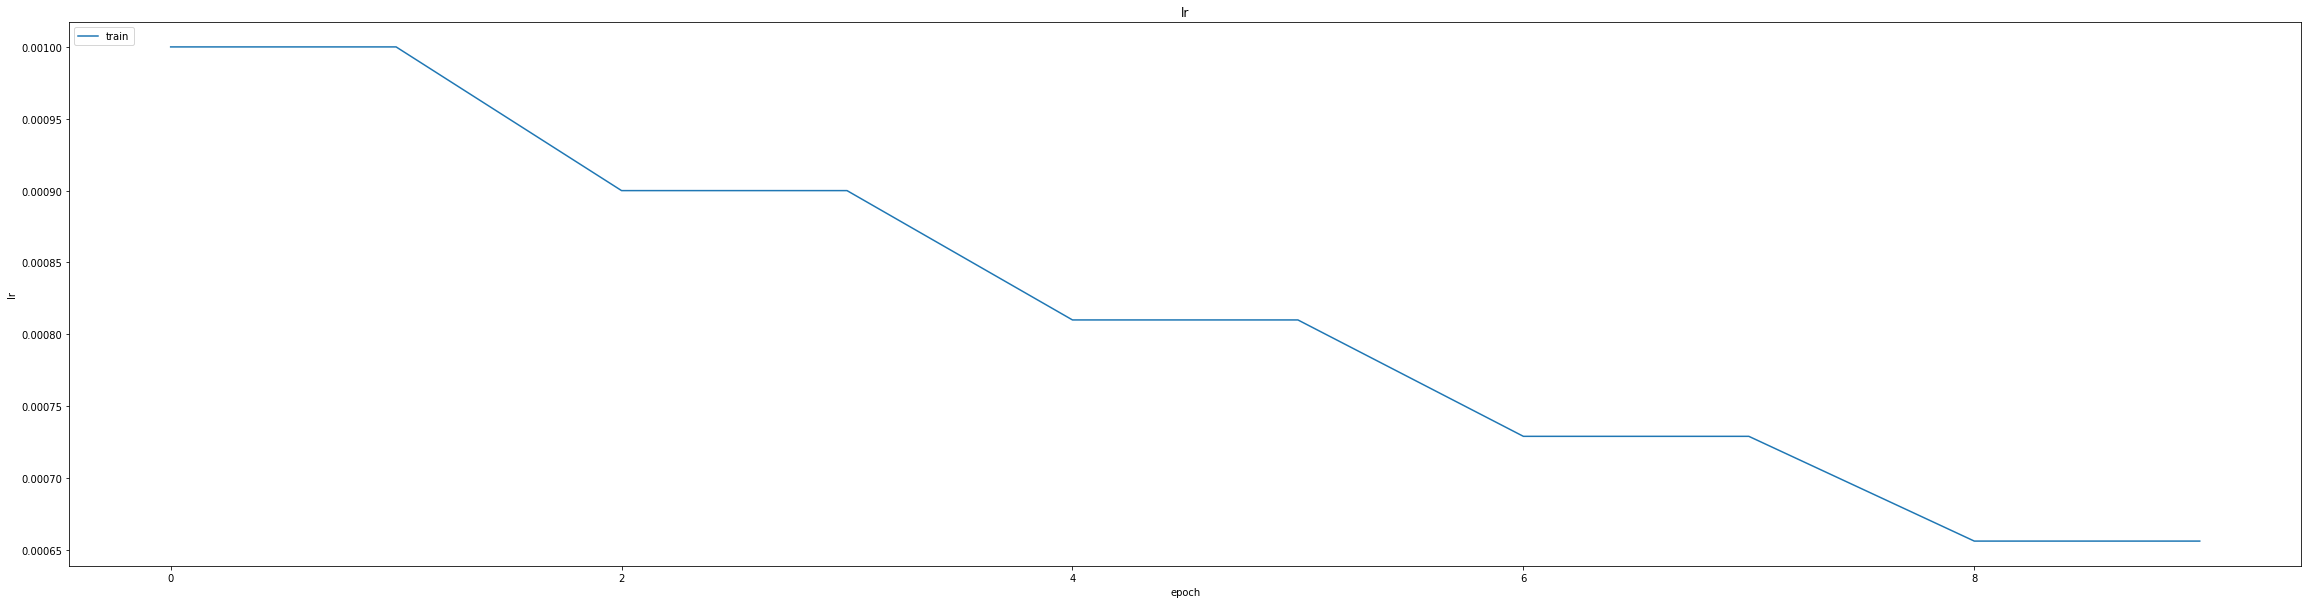

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.013674579560756683
0.013674579560756683
0.01813715137541294
234/234 [==============================] - 10s 40ms/step
0.9512313210708162


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(70-30)")

234/234 [==============================] - 8s 34ms/step


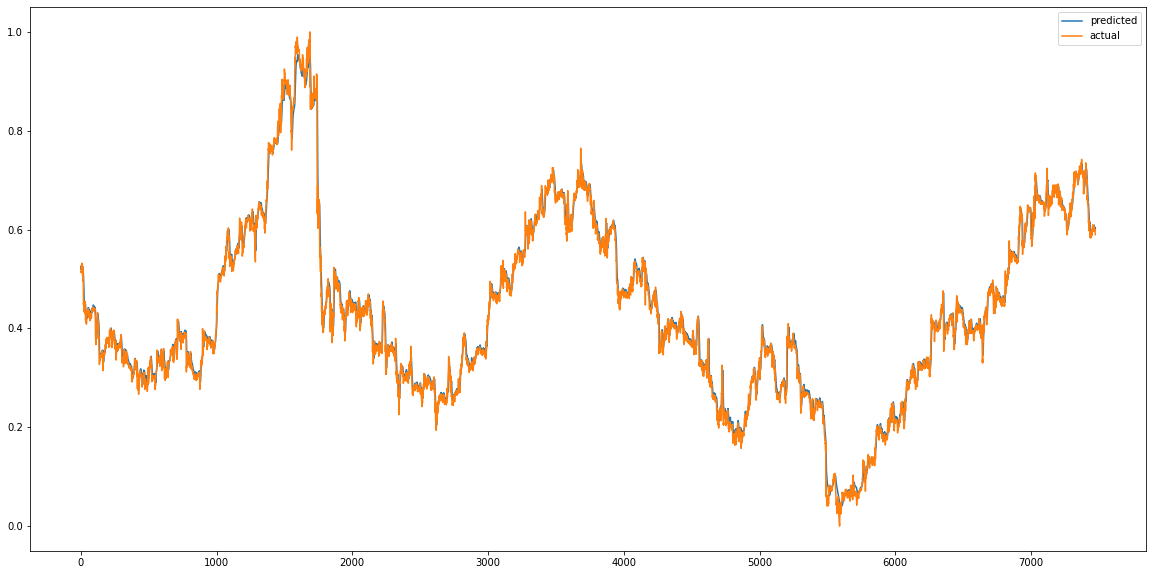

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


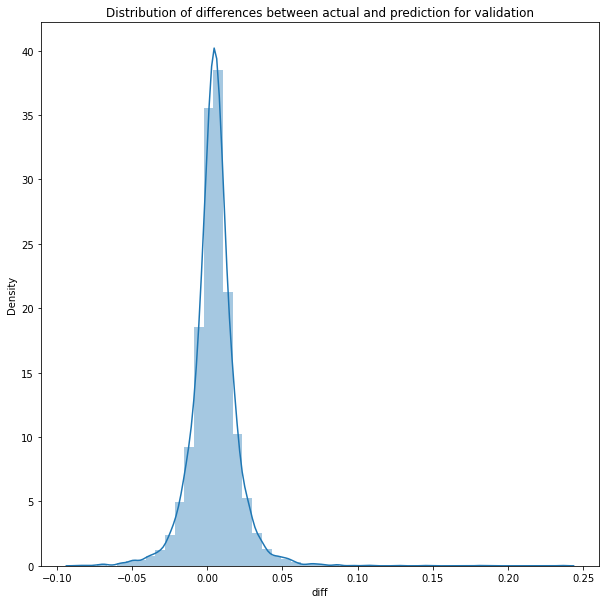

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 9s 40ms/step


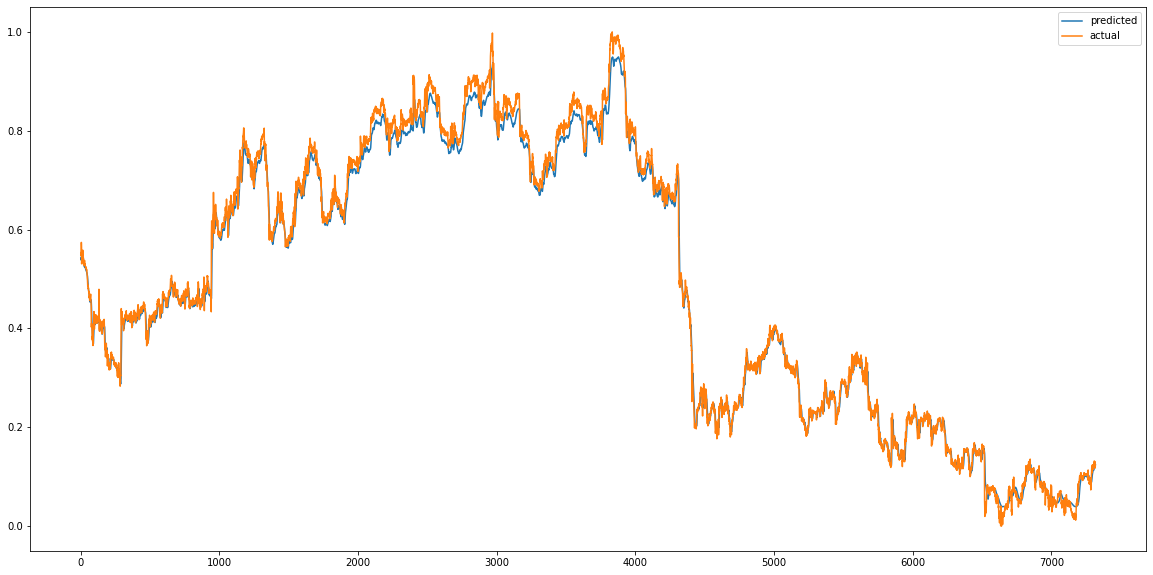

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


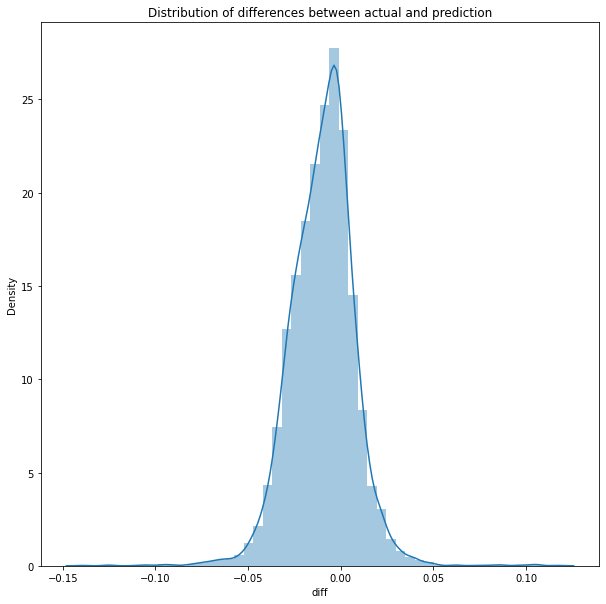

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.00039484553985587523
MAE :  0.014988142863671332
RMSE :  0.019870720667753226
229/229 [==============================] - 8s 34ms/step
R2_Score  : 0.9512313210708162


count    7319.000000
mean       -0.009815
std         0.017279
min        -0.139342
25%        -0.020599
50%        -0.008690
75%         0.000683
max         0.116921
Name: diff, dtype: float64